In [1]:
import numpy  as np
import pandas as pd
import json
import pandas

In [2]:
import nltk
import nltk.corpus
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.metrics                  import silhouette_samples, silhouette_score
from sklearn.preprocessing            import normalize
from nltk.tokenize                    import word_tokenize
import re
from unidecode                        import unidecode
from nltk.corpus import stopwords

In [3]:
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud

In [4]:
from sklearn import cluster

In [5]:
data =np.array([["Jeremias_1", "'words', 'jeremiah', 'son', 'hilkiah', ',', 'priests', 'anathoth', 'land', 'benjamin', ':', 'word', 'lord', 'came', 'days', 'josiah', 'son', 'amon', 'king', 'judah', ',', 'thirteenth', 'year', 'reign.it', 'came', 'also', 'days', 'jehoiakim', 'son', 'josiah', 'king', 'judah', ',', 'end', 'eleventh', 'year', 'zedekiah', 'son', 'josiah', 'king', 'judah', ',', 'carrying', 'away', 'jerusalem', 'captive', 'fifth', 'month.then', 'word', 'lord', 'came', ',', 'saying', ',', 'formed', 'belly', 'knew', ';', 'came', 'forth', 'womb', 'sanctified', ',', 'ordained', 'prophet', 'nations.then', 'said', ',', 'ah', ',', 'lord', 'god', '!', 'behold', ',', 'speak', ':', 'child.but', 'lord', 'said', ',', 'say', ',', 'child', ':', 'shall', 'go', 'shall', 'send', ',', 'whatever', 'command', 'shall', 'speak.be', 'afraid', 'faces', ':', 'deliver', ',', 'said', 'lord.then', 'lord', 'put', 'forth', 'hand', ',', 'touched', 'mouth', '.', 'lord', 'said', ',', 'behold', ',', 'put', 'words', 'mouth.see', ',', 'day', 'set', 'nations', 'kingdoms', ',', 'root', ',', 'pull', ',', 'destroy', ',', 'throw', ',', 'build', ',', 'plant.moreover', 'word', 'lord', 'came', ',', 'saying', ',', 'jeremiah', ',', 'see', '?', 'said', ',', 'see', 'rod', 'almond', 'tree.then', 'said', 'lord', ',', 'well', 'seen', ':', 'hasten', 'word', 'perform', 'it.and', 'word', 'lord', 'came', 'second', 'time', ',', 'saying', ',', 'see', '?', 'said', ',', 'see', 'seething', 'pot', ';', 'face', 'thereof', 'toward', 'north.then', 'lord', 'said', ',', 'north', 'evil', 'shall', 'break', 'forth', 'inhabitants', 'land.for', ',', 'see', ',', 'call', 'families', 'kingdoms', 'north', ',', 'said', 'lord', ';', 'shall', 'come', ',', 'shall', 'set', 'every', 'one', 'throne', 'entering', 'gates', 'jerusalem', ',', 'walls', 'thereof', 'round', ',', 'cities', 'judah.and', 'utter', 'judgments', 'touching', 'wickedness', ',', 'forsaken', ',', 'burned', 'incense', 'gods', ',', 'worshipped', 'works', 'hands.you', 'therefore', 'gird', 'loins', ',', 'arise', ',', 'speak', 'command', ':', 'dismayed', 'faces', ',', 'lest', 'confound', 'them.for', ',', 'behold', ',', 'made', 'day', 'defended', 'city', ',', 'iron', 'pillar', ',', 'brazen', 'walls', 'whole', 'land', ',', 'kings', 'judah', ',', 'princes', 'thereof', ',', 'priests', 'thereof', ',', 'people', 'land.and', 'shall', 'fight', ';', 'shall', 'prevail', ';', ',', 'said', 'lord', ',', 'deliver', '.'"],
               ["Jeremias_2", "'moreover', 'word', 'lord', 'came', ',', 'saying', ',', 'go', 'cry', 'ears', 'jerusalem', ',', 'saying', ',', 'thus', 'said', 'lord', ';', 'remember', ',', 'kindness', 'youth', ',', 'love', 'espousals', ',', 'went', 'wilderness', ',', 'land', 'sown.israel', 'holiness', 'lord', ',', 'first', 'fruits', 'increase', ':', 'devour', 'shall', 'offend', ';', 'evil', 'shall', 'come', ',', 'said', 'lord.hear', 'word', 'lord', ',', 'house', 'jacob', ',', 'families', 'house', 'israel', ':', 'thus', 'said', 'lord', ',', 'iniquity', 'fathers', 'found', ',', 'gone', 'far', ',', 'walked', 'vanity', ',', 'become', 'vain', '?', 'neither', 'said', ',', 'lord', 'brought', 'us', 'land', 'egypt', ',', 'led', 'us', 'wilderness', ',', 'land', 'deserts', 'pits', ',', 'land', 'drought', ',', 'shadow', 'death', ',', 'land', 'man', 'passed', ',', 'man', 'dwelled', '?', 'brought', 'plentiful', 'country', ',', 'eat', 'fruit', 'thereof', 'goodness', 'thereof', ';', 'entered', ',', 'defiled', 'land', ',', 'made', 'heritage', 'abomination.the', 'priests', 'said', ',', 'lord', '?', 'handle', 'law', 'knew', ':', 'pastors', 'also', 'transgressed', ',', 'prophets', 'prophesied', 'baal', ',', 'walked', 'things', 'profit.why', 'yet', 'plead', ',', 'said', 'lord', ',', 'children', ', 'children', 'plead.for', 'pass', 'isles', 'chittim', ',', 'see', ';', 'send', 'kedar', ',', 'consider', 'diligently', ',', 'see', 'thing.has', 'nation', 'changed', 'gods', ',', 'yet', 'gods', '?', 'people', 'changed', 'glory', 'profit.be', 'astonished', ',', 'heavens', ',', ',', 'horribly', 'afraid', ',', 'desolate', ',', 'said', 'lord.for', 'people', 'committed', 'two', 'evils', ';', 'forsaken', 'fountain', 'living', 'waters', ',', 'hewed', 'cisterns', ',', 'broken', 'cisterns', ',', 'hold', 'water.is', 'israel', 'servant', '?', 'home', 'born', 'slave', '?', 'spoiled', '?', 'young', 'lions', 'roared', ',', 'yelled', ',', 'made', 'land', 'waste', ':', 'cities', 'burned', 'without', 'inhabitant.also', 'children', 'noph', 'tahapanes', 'broken', 'crown', 'head.have', 'procured', ',', 'forsaken', 'lord', 'god', ',', 'led', 'way', '?', 'way', 'egypt', ',', 'drink', 'waters', 'sihor', '?', 'way', 'assyria', ',', 'drink', 'waters', 'river', '?', 'wickedness', 'shall', 'correct', ',', 'backslidings', 'shall', 'reprove', ':', 'know', 'therefore', 'see', 'evil', 'thing', 'bitter', ',', 'forsaken', 'lord', 'god', ',', 'fear', ',', 'said', 'lord', 'god', 'hosts.for', 'old', 'time', 'broken', 'yoke', ',', 'burst', 'bands', ';', 'said', ',', 'transgress', ';', 'every', 'high', 'hill', 'every', 'green', 'tree', 'wander', ',', 'playing', 'harlot.yet', 'planted', 'noble', 'vine', ',', 'wholly', 'right', 'seed', ':', 'turned', 'degenerate', 'plant', 'strange', 'vine', '?', 'though', 'wash', 'nitre', ',', 'take', 'much', 'soap', ',', 'yet', 'iniquity', 'marked', ',', 'said', 'lord', 'god.how', 'say', ',', 'polluted', ',', 'gone', 'baalim', '?', 'see', 'way', 'valley', ',', 'know', 'done', ':', 'swift', 'dromedary', 'traversing', 'ways', ';', 'wild', 'ass', 'used', 'wilderness', ',', 'snuffs', 'wind', 'pleasure', ';', 'occasion', 'turn', 'away', '?', 'seek', 'weary', ';', 'month', 'shall', 'find', 'her.withhold', 'foot', 'unshod', ',', 'throat', 'thirst', ':', 'said', ',', 'hope', ':', ';', 'loved', 'strangers', ',', 'go.as', 'thief', 'ashamed', 'found', ',', 'house', 'israel', 'ashamed', ';', ',', 'kings', ',', 'princes', ',', 'priests', ',', 'prophets.saying', 'stock', ',', 'father', ';', 'stone', ',', 'brought', 'forth', ':', 'turned', 'back', ',', 'face', ':', 'time', 'trouble', 'say', ',', 'arise', ',', 'save', 'us.but', 'gods', 'made', '?', 'let', 'arise', ',', 'save', 'time', 'trouble', ':', 'according', 'number', 'cities', 'gods', ',', 'judah.why', 'plead', '?', 'transgressed', ',', 'said', 'lord.in', 'vain', 'smitten', 'children', ';', 'received', 'correction', ':', 'sword', 'devoured', 'prophets', ',', 'like', 'destroying', 'lion.o', 'generation', ',', 'see', 'word', 'lord', '.', 'wilderness', 'israel', '?', 'land', 'darkness', '?', 'say', 'people', ',', 'lords', ';', 'come', '?', 'maid', 'forget', 'ornaments', ',', 'bride', 'attire', '?', 'yet', 'people', 'forgotten', 'days', 'without', 'number.why', 'trim', 'way', 'seek', 'love', '?', 'therefore', 'also', 'taught', 'wicked', 'ones', 'ways.also', 'skirts', 'found', 'blood', 'souls', 'poor', 'innocents', ':', 'found', 'secret', 'search', ',', 'these.yet', 'say', ',', 'innocent', ',', 'surely', 'anger', 'shall', 'turn', '.', 'behold', ',', 'plead', ',', 'say', ',', 'sinned.why', 'gad', 'much', 'change', 'way', '?', 'also', 'shall', 'ashamed', 'egypt', ',', 'ashamed', 'assyria.yes', ',', 'shall', 'go', 'forth', ',', 'hands', 'head', ':', 'lord', 'rejected', 'confidences', ',', 'shall', 'prosper', '.'"],
               ["Jeremias_3", "'say', ',', 'man', 'put', 'away', 'wife', ',', 'go', ',', 'become', 'another', 'man', ', ',', 'shall', 'return', '?', 'shall', 'land', 'greatly', 'polluted', '?', 'played', 'harlot', 'many', 'lovers', ';', 'yet', 'return', ',', 'said', 'lord.lift', 'eyes', 'high', 'places', ',', 'see', 'lien', '.', 'ways', 'sat', ',', 'arabian', 'wilderness', ';', 'polluted', 'land', 'prostitutions', 'wickedness.therefore', 'showers', 'withheld', ',', 'latter', 'rain', ';', 'whore', ', 'forehead', ',', 'refused', 'ashamed.will', 'time', 'cry', ',', 'father', ',', 'guide', 'youth', '?', 'reserve', 'anger', 'ever', '?', 'keep', 'end', '?', 'behold', ',', 'spoken', 'done', 'evil', 'things', 'could.the', 'lord', 'said', 'also', 'days', 'josiah', 'king', ',', 'seen', 'backsliding', 'israel', 'done', '?', 'gone', 'every', 'high', 'mountain', 'every', 'green', 'tree', ',', 'played', 'harlot.and', 'said', 'done', 'things', ',', 'turn', '.', 'returned', '.', 'treacherous', 'sister', 'judah', 'saw', 'it.and', 'saw', ',', 'causes', 'whereby', 'backsliding', 'israel', 'committed', 'adultery', 'put', 'away', ',', 'given', 'bill', 'divorce', ';', 'yet', 'treacherous', 'sister', 'judah', 'feared', ',', 'went', 'played', 'harlot', 'also.and', 'came', 'pass', 'lightness', 'prostitution', ',', 'defiled', 'land', ',', 'committed', 'adultery', 'stones', 'stocks.and', 'yet', 'treacherous', 'sister', 'judah', 'turned', 'whole', 'heart', ',', 'feignedly', ',', 'said', 'lord.and', 'lord', 'said', ',', 'backsliding', 'israel', 'justified', 'treacherous', 'judah.go', 'proclaim', 'words', 'toward', 'north', ',', 'say', ',', 'return', ',', 'backsliding', 'israel', ',', 'said', 'lord', ';', 'cause', 'anger', 'fall', ':', 'merciful', ',', 'said', 'lord', ',', 'keep', 'anger', 'ever.only', 'acknowledge', 'iniquity', ',', 'transgressed', 'lord', 'god', ',', 'scattered', 'ways', 'strangers', 'every', 'green', 'tree', ',', 'obeyed', 'voice', ',', 'said', 'lord.turn', ',', 'backsliding', 'children', ',', 'said', 'lord', ';', 'married', ':', 'take', 'one', 'city', ',', 'two', 'family', ',', 'bring', 'zion', ':', 'give', 'pastors', 'according', 'heart', ',', 'shall', 'feed', 'knowledge', 'understanding.and', 'shall', 'come', 'pass', ',', 'multiplied', 'increased', 'land', ',', 'days', ',', 'said', 'lord', ',', 'shall', 'say', ',', 'ark', 'covenant', 'lord', ':', 'neither', 'shall', 'come', 'mind', ':', 'neither', 'shall', 'remember', ';', 'neither', 'shall', 'visit', ';', 'neither', 'shall', 'done', 'more.at', 'time', 'shall', 'call', 'jerusalem', 'throne', 'lord', ';', 'nations', 'shall', 'gathered', ',', 'name', 'lord', ',', 'jerusalem', ':', 'neither', 'shall', 'walk', 'imagination', 'evil', 'heart.in', 'days', 'house', 'judah', 'shall', 'walk', 'house', 'israel', ',', 'shall', 'come', 'together', 'land', 'north', 'land', 'given', 'inheritance', 'fathers.but', 'said', ',', 'shall', 'put', 'among', 'children', ',', 'give', 'pleasant', 'land', ',', 'goodly', 'heritage', 'hosts', 'nations', '?', 'said', ',', 'shall', 'call', ',', 'father', ';', 'shall', 'turn', 'away', 'me.surely', 'wife', 'treacherously', 'departs', 'husband', ',', 'dealt', 'treacherously', ',', 'house', 'israel', ',', 'said', 'lord.a', 'voice', 'heard', 'high', 'places', ',', 'weeping', 'supplications', 'children', 'israel', ':', 'perverted', 'way', ',', 'forgotten', 'lord', 'god.return', ',', 'backsliding', 'children', ',', 'heal', 'backslidings', '.', 'behold', ',', 'come', ';', 'lord', 'god.truly', 'vain', 'salvation', 'hoped', 'hills', ',', 'multitude', 'mountains', ':', 'truly', 'lord', 'god', 'salvation', 'israel.for', 'shame', 'devoured', 'labor', 'fathers', 'youth', ';', 'flocks', 'herds', ',', 'sons', 'daughters.we', 'lie', 'shame', ',', 'confusion', 'covers', 'us', ':', 'sinned', 'lord', 'god', ',', 'fathers', ',', 'youth', 'even', 'day', ',', 'obeyed', 'voice', 'lord', 'god', '.'"],
               ["Jeremias_4", "'return', ',', 'israel', ',', 'said', 'lord', ',', 'return', ':', 'put', 'away', 'abominations', 'sight', ',', 'shall', 'remove.and', 'shall', 'swear', ',', 'lord', 'lives', ',', 'truth', ',', 'judgment', ',', 'righteousness', ';', 'nations', 'shall', 'bless', ',', 'shall', 'glory.for', 'thus', 'said', 'lord', 'men', 'judah', 'jerusalem', ',', 'break', 'fallow', 'ground', ',', 'sow', 'among', 'thorns.circumcise', 'lord', ',', 'take', 'away', 'foreskins', 'heart', ',', 'men', 'judah', 'inhabitants', 'jerusalem', ':', 'lest', 'fury', 'come', 'forth', 'like', 'fire', ',', 'burn', 'none', 'quench', ',', 'evil', 'doings.declare', 'judah', ',', 'publish', 'jerusalem', ';', 'say', ',', 'blow', 'trumpet', 'land', ':', 'cry', ',', 'gather', 'together', ',', 'say', ',', 'assemble', ',', 'let', 'us', 'go', 'defended', 'cities.set', 'standard', 'toward', 'zion', ':', 'retire', ',', 'stay', ':', 'bring', 'evil', 'north', ',', 'great', 'destruction.the', 'lion', 'come', 'thicket', ',', 'destroyer', 'gentiles', 'way', ';', 'gone', 'forth', 'place', 'make', 'land', 'desolate', ';', 'cities', 'shall', 'laid', 'waste', ',', 'without', 'inhabitant.for', 'gird', 'sackcloth', ',', 'lament', 'howl', ':', 'fierce', 'anger', 'lord', 'turned', 'back', 'us.and', 'shall', 'come', 'pass', 'day', ',', 'said', 'lord', ',', 'heart', 'king', 'shall', 'perish', ',', 'heart', 'princes', ';', 'priests', 'shall', 'astonished', ',', 'prophets', 'shall', 'wonder.then', 'said', ',', 'ah', ',', 'lord', 'god', '!', 'surely', 'greatly', 'deceived', 'people', 'jerusalem', ',', 'saying', ',', 'shall', 'peace', ';', 'whereas', 'sword', 'reaches', 'soul.at', 'time', 'shall', 'said', 'people', 'jerusalem', ',', 'dry', 'wind', 'high', 'places', 'wilderness', 'toward', 'daughter', 'people', ',', 'fan', ',', 'cleanse', ',', 'even', 'full', 'wind', 'places', 'shall', 'come', ':', 'also', 'give', 'sentence', 'them.behold', ',', 'shall', 'come', 'clouds', ',', 'chariots', 'shall', 'whirlwind', ':', 'horses', 'swifter', 'eagles', '.', 'woe', 'us', '!', 'spoiled.o', 'jerusalem', ',', 'wash', 'heart', 'wickedness', ',', 'may', 'saved', '.', 'long', 'shall', 'vain', 'thoughts', 'lodge', 'within', '?', 'voice', 'declares', 'dan', ',', 'publishes', 'affliction', 'mount', 'ephraim.make', 'mention', 'nations', ';', 'behold', ',', 'publish', 'jerusalem', ',', 'watchers', 'come', 'far', 'country', ',', 'give', 'voice', 'cities', 'judah.as', 'keepers', 'field', ',', 'round', ';', 'rebellious', ',', 'said', 'lord.your', 'way', 'doings', 'procured', 'things', ';', 'wickedness', ',', 'bitter', ',', 'reaches', 'heart.my', 'bowels', ',', 'bowels', '!', 'pained', 'heart', ';', 'heart', 'makes', 'noise', ';', 'hold', 'peace', ',', 'heard', ',', 'soul', ',', 'sound', 'trumpet', ',', 'alarm', 'war.destruction', 'destruction', 'cried', ';', 'whole', 'land', 'spoiled', ':', 'suddenly', 'tents', 'spoiled', ',', 'curtains', 'moment.how', 'long', 'shall', 'see', 'standard', ',', 'hear', 'sound', 'trumpet', '?', 'people', 'foolish', ',', 'known', ';', 'silly', 'children', ',', 'none', 'understanding', ':', 'wise', 'evil', ',', 'good', 'knowledge.i', 'beheld', 'earth', ',', ',', 'see', ',', 'without', 'form', ',', 'void', ';', 'heavens', ',', 'light.i', 'beheld', 'mountains', ',', ',', 'see', ',', 'trembled', ',', 'hills', 'moved', 'lightly.i', 'beheld', ',', ',', 'see', ',', 'man', ',', 'birds', 'heavens', 'fled.i', 'beheld', ',', ',', 'see', ',', 'fruitful', 'place', 'wilderness', ',', 'cities', 'thereof', 'broken', 'presence', 'lord', ',', 'fierce', 'anger.for', 'thus', 'lord', 'said', ',', 'whole', 'land', 'shall', 'desolate', ';', 'yet', 'make', 'full', 'end.for', 'shall', 'earth', 'mourn', ',', 'heavens', 'black', ';', 'spoken', ',', 'purposed', ',', 'repent', ',', 'neither', 'turn', 'back', 'it.the', 'whole', 'city', 'shall', 'flee', 'noise', 'horsemen', 'bowmen', ';', 'shall', 'go', 'thickets', ',', 'climb', 'rocks', ':', 'every', 'city', 'shall', 'forsaken', ',', 'man', 'dwell', 'therein.and', 'spoiled', ',', '?', 'though', 'clothe', 'crimson', ',', 'though', 'deck', 'ornaments', 'gold', ',', 'though', 'rend', 'face', 'painting', ',', 'vain', 'shall', 'make', 'fair', ';', 'lovers', 'despise', ',', 'seek', 'life.for', 'heard', 'voice', 'woman', 'travail', ',', 'anguish', 'brings', 'forth', 'first', 'child', ',', 'voice', 'daughter', 'zion', ',', 'mourns', ',', 'spreads', 'hands', ',', 'saying', ',', 'woe', '!', 'soul', 'wearied', 'murderers', '.'"],
               ["Jeremias_5", "'run', 'fro', 'streets', 'jerusalem', ',', 'see', ',', 'know', ',', 'seek', 'broad', 'places', 'thereof', ',', 'find', 'man', ',', 'executes', 'judgment', ',', 'seeks', 'truth', ';', 'pardon', 'it.and', 'though', 'say', ',', 'lord', 'lives', ';', 'surely', 'swear', 'falsely.o', 'lord', ',', 'eyes', 'truth', '?', 'stricken', ',', 'grieved', ';', 'consumed', ',', 'refused', 'receive', 'correction', ':', 'made', 'faces', 'harder', 'rock', ';', 'refused', 'return.therefore', 'said', ',', 'surely', 'poor', ';', 'foolish', ':', 'know', 'way', 'lord', ',', 'judgment', 'god.i', 'get', 'great', 'men', ',', 'speak', ';', 'known', 'way', 'lord', ',', 'judgment', 'god', ':', 'altogether', 'broken', 'yoke', ',', 'burst', 'bonds.why', 'lion', 'forest', 'shall', 'slay', ',', 'wolf', 'evenings', 'shall', 'spoil', ',', 'leopard', 'shall', 'watch', 'cities', ':', 'every', 'one', 'goes', 'shall', 'torn', 'pieces', ':', 'transgressions', 'many', ',', 'backslidings', 'increased.how', 'shall', 'pardon', '?', 'children', 'forsaken', ',', 'sworn', 'gods', ':', 'fed', 'full', ',', 'committed', 'adultery', ',', 'assembled', 'troops', harlots'houses.they, 'fed', 'horses', 'morning', ':', 'every', 'one', 'neighed', 'neighbor', ', 'wife.shall', 'visit', 'things', '?', 'said', 'lord', ':', 'shall', 'soul', 'avenged', 'nation', '?', 'go', 'walls', ',', 'destroy', ';', 'make', 'full', 'end', ':', 'take', 'away', 'battlements', ';', lord'.for, 'house', 'israel', 'house', 'judah', 'dealt', 'treacherously', ',', 'said', 'lord.they', 'belied', 'lord', ',', 'said', ',', ';', 'neither', 'shall', 'evil', 'come', 'us', ';', 'neither', 'shall', 'see', 'sword', 'famine', ':', 'prophets', 'shall', 'become', 'wind', ',', 'word', ':', 'thus', 'shall', 'done', 'them.why', 'thus', 'said', 'lord', 'god', 'hosts', ',', 'speak', 'word', ',', 'behold', ',', 'make', 'words', 'mouth', 'fire', ',', 'people', 'wood', ',', 'shall', 'devour', 'them.see', ',', 'bring', 'nation', 'far', ',', 'house', 'israel', ',', 'said', 'lord', ':', 'mighty', 'nation', ',', 'ancient', 'nation', ',', 'nation', 'whose', 'language', 'know', ',', 'neither', 'understand', 'say.their', 'quiver', 'open', 'sepulcher', ',', 'mighty', 'men.and', 'shall', 'eat', 'harvest', ',', 'bread', ',', 'sons', 'daughters', 'eat', ':', 'shall', 'eat', 'flocks', 'herds', ':', 'shall', 'eat', 'vines', 'fig', 'trees', ':', 'shall', 'impoverish', 'fenced', 'cities', ',', 'wherein', 'trusted', ',', 'sword.nevertheless', 'days', ',', 'said', 'lord', ',', 'make', 'full', 'end', 'you.and', 'shall', 'come', 'pass', ',', 'shall', 'say', ',', 'lord', 'god', 'things', 'us', '?', 'shall', 'answer', ',', 'like', 'forsaken', ',', 'served', 'strange', 'gods', 'land', ',', 'shall', 'serve', 'strangers', 'land', your'.declare, 'house', 'jacob', ',', 'publish', 'judah', ',', 'saying', ',', 'hear', ',', 'foolish', 'people', ',', 'without', 'understanding', ';', 'eyes', ',', 'see', ';', 'ears', ',', 'hear', ':', 'fear', '?', 'said', 'lord', ':', 'tremble', 'presence', ',', 'placed', 'sand', 'bound', 'sea', 'perpetual', 'decree', ',', 'pass', ':', 'though', 'waves', 'thereof', 'toss', ',', 'yet', 'prevail', ';', 'though', 'roar', ',', 'yet', 'pass', '?', 'people', 'revolting', 'rebellious', 'heart', ';', 'revolted', 'gone.neither', 'say', 'heart', ',', 'let', 'us', 'fear', 'lord', 'god', ',', 'gives', 'rain', ',', 'former', 'latter', ',', 'season', ':', 'reserves', 'us', 'appointed', 'weeks', 'harvest.iniquities', 'turned', 'away', 'things', ',', 'sins', 'withheld', 'good', 'things', 'you.for', 'among', 'people', 'found', 'wicked', 'men', ':', 'lay', 'wait', ',', 'sets', 'snares', ';', 'set', 'trap', ',', 'catch', 'men.as', 'cage', 'full', 'birds', ',', 'houses', 'full', 'deceit', ':', 'therefore', 'become', 'great', ',', 'waxen', 'rich.they', 'waxen', 'fat', ',', 'shine', ':', 'yes', ',', 'overpass', 'deeds', 'wicked', ':', 'judge', 'cause', ',', 'cause', 'fatherless', ',', 'yet', 'prosper', ';', 'right', 'needy', 'judge.shall', 'visit', 'things', '?', 'said', 'lord', ':', 'shall', 'soul', 'avenged', 'nation', '?', 'wonderful', 'horrible', 'thing', 'committed', 'land', ';', 'prophets', 'prophesy', 'falsely', ',', 'priests', 'bear', 'rule', 'means', ';', 'people', 'love', ':', 'end', 'thereof', '?'"],
               ["Jeremias_6", "'children', 'benjamin', ',', 'gather', 'flee', 'middle', 'jerusalem', ',', 'blow', 'trumpet', 'tekoa', ',', 'set', 'sign', 'fire', 'bethhaccerem', ':', 'evil', 'appears', 'north', ',', 'great', 'destruction.i', 'likened', 'daughter', 'zion', 'comely', 'delicate', 'woman.the', 'shepherds', 'flocks', 'shall', 'come', ';', 'shall', 'pitch', 'tents', 'round', ';', 'shall', 'feed', 'every', 'one', 'place.prepare', 'war', ';', 'arise', ',', 'let', 'us', 'go', 'noon', '.', 'woe', 'us', '!', 'day', 'goes', 'away', ',', 'shadows', 'evening', 'stretched', 'out.arise', ',', 'let', 'us', 'go', 'night', ',', 'let', 'us', 'destroy', 'palaces.for', 'thus', 'lord', 'hosts', 'said', ',', 'hew', 'trees', ',', 'cast', 'mount', 'jerusalem', ':', 'city', 'visited', ';', 'wholly', 'oppression', 'middle', 'her.as', 'fountain', 'casts', 'waters', ',', 'casts', 'wickedness', ':', 'violence', 'spoil', 'heard', ';', 'continually', 'grief', 'wounds.be', 'instructed', ',', 'jerusalem', ',', 'lest', 'soul', 'depart', ';', 'lest', 'make', 'desolate', ',', 'land', 'inhabited.thus', 'said', 'lord', 'hosts', ',', 'shall', 'thoroughly', 'glean', 'remnant', 'israel', 'vine', ':', 'turn', 'back', 'hand', 'grape', 'gatherer', 'baskets.to', 'shall', 'speak', ',', 'give', 'warning', ',', 'may', 'hear', '?', 'behold', ',', 'ear', 'uncircumcised', ',', 'listen', ':', 'behold', ',', 'word', 'lord', 'reproach', ';', 'delight', 'it.therefore', 'full', 'fury', 'lord', ';', 'weary', 'holding', ':', 'pour', 'children', 'abroad', ',', 'assembly', 'young', 'men', 'together', ':', 'even', 'husband', 'wife', 'shall', 'taken', ',', 'aged', 'full', 'days.and', 'houses', 'shall', 'turned', 'others', ',', 'fields', 'wives', 'together', ':', 'stretch', 'hand', 'inhabitants', 'land', ',', 'said', 'lord.for', 'least', 'even', 'greatest', 'every', 'one', 'given', 'covetousness', ';', 'prophet', 'even', 'priest', 'every', 'one', 'deals', 'falsely.they', 'healed', 'also', 'hurt', 'daughter', 'people', 'slightly', ',', 'saying', ',', 'peace', ',', 'peace', ';', 'peace.were', 'ashamed', 'committed', 'abomination', '?', ',', 'ashamed', ',', 'neither', 'could', 'blush', ':', 'therefore', 'shall', 'fall', 'among', 'fall', ':', 'time', 'visit', 'shall', 'cast', ',', 'said', 'lord.thus', 'said', 'lord', ',', 'stand', 'ways', ',', 'see', ',', 'ask', 'old', 'paths', ',', 'good', 'way', ',', 'walk', 'therein', ',', 'shall', 'find', 'rest', 'souls', '.', 'said', ',', 'walk', 'therein.also', 'set', 'watchmen', ',', 'saying', ',', 'listen', 'sound', 'trumpet', '.', 'said', ',', 'listen.therefore', 'hear', ',', 'nations', ',', 'know', ',', 'congregation', ',', 'among', 'them.hear', ',', 'earth', ':', 'behold', ',', 'bring', 'evil', 'people', ',', 'even', 'fruit', 'thoughts', ',', 'listened', 'words', ',', 'law', ',', 'rejected', 'it.to', 'purpose', 'comes', 'incense', 'sheba', ',', 'sweet', 'cane', 'far', 'country', '?', 'burnt', 'offerings', 'acceptable', ',', 'sacrifices', 'sweet', 'me.therefore', 'thus', 'said', 'lord', ',', 'behold', ',', 'lay', 'stumbling', 'blocks', 'people', ',', 'fathers', 'sons', 'together', 'shall', 'fall', ';', 'neighbor', 'friend', 'shall', 'perish.thus', 'said', 'lord', ',', 'behold', ',', 'people', 'comes', 'north', 'country', ',', 'great', 'nation', 'shall', 'raised', 'sides', 'earth.they', 'shall', 'lay', 'hold', 'bow', 'spear', ';', 'cruel', ',', 'mercy', ';', 'voice', 'roars', 'like', 'sea', ';', 'ride', 'horses', ',', 'set', 'array', 'men', 'war', ',', 'daughter', 'zionwe', 'heard', 'fame', 'thereof', ':', 'hands', 'wax', 'feeble', ':', 'anguish', 'taken', 'hold', 'us', ',', 'pain', ',', 'woman', 'travail.go', 'forth', 'field', ',', 'walk', 'way', ';', 'sword', 'enemy', 'fear', 'every', 'side.o', 'daughter', 'people', ',', 'gird', 'sackcloth', ',', 'wallow', 'ashes', ':', 'make', 'mourning', ',', 'son', ',', 'bitter', 'lamentation', ':', 'spoiler', 'shall', 'suddenly', 'come', 'us.i', 'set', 'tower', 'fortress', 'among', 'people', ',', 'may', 'know', 'try', 'way.they', 'grievous', 'rebels', ',', 'walking', 'slanders', ':', 'brass', 'iron', ';', 'corrupters.the', 'bellows', 'burned', ',', 'lead', 'consumed', 'fire', ';', 'founder', 'melts', 'vain', ':', 'wicked', 'plucked', 'away.reprobate', 'silver', 'shall', 'men', 'call', ',', 'lord', 'rejected', '.'"],
               ["Jeremias_7", "'word', 'came', 'jeremiah', 'lord', ',', 'saying', ',', 'stand', 'gate', 'lord', ', 'house', ',', 'proclaim', 'word', ',', 'say', ',', 'hear', 'word', 'lord', ',', 'judah', ',', 'enter', 'gates', 'worship', 'lord.thus', 'said', 'lord', 'hosts', ',', 'god', 'israel', ',', 'amend', 'ways', 'doings', ',', 'cause', 'dwell', 'place.trust', 'lying', 'words', ',', 'saying', ',', 'temple', 'lord', ',', 'temple', 'lord', ',', 'temple', 'lord', ',', 'these.for', 'thoroughly', 'amend', 'ways', 'doings', ';', 'thoroughly', 'execute', 'judgment', 'man', 'neighbor', ';', 'oppress', 'stranger', ',', 'fatherless', ',', 'widow', ',', 'shed', 'innocent', 'blood', 'place', ',', 'neither', 'walk', 'gods', 'hurt', ':', 'cause', 'dwell', 'place', ',', 'land', 'gave', 'fathers', ',', 'ever', 'ever.behold', ',', 'trust', 'lying', 'words', ',', 'profit.will', 'steal', ',', 'murder', ',', 'commit', 'adultery', ',', 'swear', 'falsely', ',', 'burn', 'incense', 'baal', ',', 'walk', 'gods', 'know', ';', 'come', 'stand', 'house', ',', 'called', 'name', ',', 'say', ',', 'delivered', 'abominations', '?', 'house', ',', 'called', 'name', ',', 'become', 'den', 'robbers', 'eyes', '?', 'behold', ',', 'even', 'seen', ',', 'said', 'lord.but', 'go', 'place', 'shiloh', ',', 'set', 'name', 'first', ',', 'see', 'wickedness', 'people', 'israel.and', ',', 'done', 'works', ',', 'said', 'lord', ',', 'spoke', ',', 'rising', 'early', 'speaking', ',', 'heard', ';', 'called', ',', 'answered', ';', 'therefore', 'house', ',', 'called', 'name', ',', 'wherein', 'trust', ',', 'place', 'gave', 'fathers', ',', 'done', 'shiloh.and', 'cast', 'sight', ',', 'cast', 'brothers', ',', 'even', 'whole', 'seed', 'ephraim.therefore', 'pray', 'people', ',', 'neither', 'lift', 'cry', 'prayer', ',', 'neither', 'make', 'intercession', ':', 'hear', 'you.see', 'cities', 'judah', 'streets', 'jerusalem', '?', 'children', 'gather', 'wood', ',', 'fathers', 'kindle', 'fire', ',', 'women', 'knead', 'dough', ',', 'make', 'cakes', 'queen', 'heaven', ',', 'pour', 'drink', 'offerings', 'gods', ',', 'may', 'provoke', 'anger.do', 'provoke', 'anger', '?', 'said', 'lord', ':', 'provoke', 'confusion', 'faces', '?', 'therefore', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', 'anger', 'fury', 'shall', 'poured', 'place', ',', 'man', ',', 'beast', ',', 'trees', 'field', ',', 'fruit', 'ground', ';', 'shall', 'burn', ',', 'shall', 'quenched.thus', 'said', 'lord', 'hosts', ',', 'god', 'israel', ';', 'put', 'burnt', 'offerings', 'sacrifices', ',', 'eat', 'flesh.for', 'spoke', 'fathers', ',', 'commanded', 'day', 'brought', 'land', 'egypt', ',', 'concerning', 'burnt', 'offerings', 'sacrifices', ':', 'thing', 'commanded', ',', 'saying', ',', 'obey', 'voice', ',', 'god', ',', 'shall', 'people', ':', 'walk', 'ways', 'commanded', ',', 'may', 'well', 'you.but', 'listened', ',', 'inclined', 'ear', ',', 'walked', 'counsels', 'imagination', 'evil', 'heart', ',', 'went', 'backward', ',', 'forward.since', 'day', 'fathers', 'came', 'forth', 'land', 'egypt', 'day', 'even', 'sent', 'servants', 'prophets', ',', 'daily', 'rising', 'early', 'sending', ':', 'yet', 'listened', ',', 'inclined', 'ear', ',', 'hardened', 'neck', ':', 'worse', 'fathers.therefore', 'shall', 'speak', 'words', ';', 'listen', ':', 'shall', 'also', 'call', ';', 'answer', 'you.but', 'shall', 'say', ',', 'nation', 'obeys', 'voice', 'lord', 'god', ',', 'receives', 'correction', ':', 'truth', 'perished', ',', 'cut', 'mouth.cut', 'hair', ',', 'jerusalem', ',', 'cast', 'away', ',', 'take', 'lamentation', 'high', 'places', ';', 'lord', 'rejected', 'forsaken', 'generation', 'wrath.for', 'children', 'judah', 'done', 'evil', 'sight', ',', 'said', 'lord', ':', 'set', 'abominations', 'house', 'called', 'name', ',', 'pollute', 'it.and', 'built', 'high', 'places', 'tophet', ',', 'valley', 'son', 'hinnom', ',', 'burn', 'sons', 'daughters', 'fire', ';', 'commanded', ',', 'neither', 'came', 'heart.therefore', ',', 'behold', ',', 'days', 'come', ',', 'said', 'lord', ',', 'shall', 'called', 'tophet', ',', 'valley', 'son', 'hinnom', ',', 'valley', 'slaughter', ':', 'shall', 'bury', 'tophet', ',', 'till', 'place.and', 'carcasses', 'people', 'shall', 'meat', 'fowls', 'heaven', ',', 'beasts', 'earth', ';', 'none', 'shall', 'fray', 'away.then', 'cause', 'cease', 'cities', 'judah', ',', 'streets', 'jerusalem', ',', 'voice', 'mirth', ',', 'voice', 'gladness', ',', 'voice', 'bridegroom', ',', 'voice', 'bride', ':', 'land', 'shall', 'desolate', '."],
               ["Jeremias_8", "'time', ',', 'said', 'lord', ',', 'shall', 'bring', 'bones', 'kings', 'judah', ',', 'bones', 'princes', ',', 'bones', 'priests', ',', 'bones', 'prophets', ',', 'bones', 'inhabitants', 'jerusalem', ',', 'graves', ':', 'shall', 'spread', 'sun', ',', 'moon', ',', 'host', 'heaven', ',', 'loved', ',', 'served', ',', 'walked', ',', 'sought', ',', 'worshipped', ':', 'shall', 'gathered', ',', 'buried', ';', 'shall', 'dung', 'face', 'earth.and', 'death', 'shall', 'chosen', 'rather', 'life', 'residue', 'remain', 'evil', 'family', ',', 'remain', 'places', 'driven', ',', 'said', 'lord', 'hosts.moreover', 'shall', 'say', ',', 'thus', 'said', 'lord', ';', 'shall', 'fall', ',', 'arise', '?', 'shall', 'turn', 'away', ',', 'return', '?', 'people', 'jerusalem', 'slid', 'back', 'perpetual', 'backsliding', '?', 'hold', 'fast', 'deceit', ',', 'refuse', 'return.i', 'listened', 'heard', ',', 'spoke', 'aright', ':', 'man', 'repented', 'wickedness', ',', 'saying', ',', 'done', '?', 'every', 'one', 'turned', 'course', ',', 'horse', 'rushes', 'battle.yes', ',', 'stork', 'heaven', 'knows', 'appointed', 'times', ';', 'turtle', 'crane', 'swallow', 'observe', 'time', 'coming', ';', 'people', 'know', 'judgment', 'lord.how', 'say', ',', 'wise', ',', 'law', 'lord', 'us', '?', 'see', ',', 'certainly', 'vain', 'made', ';', 'pen', 'scribes', 'vain.the', 'wise', 'men', 'ashamed', ',', 'dismayed', 'taken', ':', 'see', ',', 'rejected', 'word', 'lord', ';', 'wisdom', '?', 'therefore', 'give', 'wives', 'others', ',', 'fields', 'shall', 'inherit', ':', 'every', 'one', 'least', 'even', 'greatest', 'given', 'covetousness', ',', 'prophet', 'even', 'priest', 'every', 'one', 'deals', 'falsely.for', 'healed', 'hurt', 'daughter', 'people', 'slightly', ',', 'saying', ',', 'peace', ',', 'peace', ';', 'peace.were', 'ashamed', 'committed', 'abomination', '?', ',', 'ashamed', ',', 'neither', 'could', 'blush', ':', 'therefore', 'shall', 'fall', 'among', 'fall', ':', 'time', 'visitation', 'shall', 'cast', ',', 'said', 'lord.i', 'surely', 'consume', ',', 'said', 'lord', ':', 'shall', 'grapes', 'vine', ',', 'figs', 'fig', 'tree', ',', 'leaf', 'shall', 'fade', ';', 'things', 'given', 'shall', 'pass', 'away', 'them.why', 'sit', 'still', '?', 'assemble', ',', 'let', 'us', 'enter', 'defended', 'cities', ',', 'let', 'us', 'silent', ':', 'lord', 'god', 'put', 'us', 'silence', ',', 'given', 'us', 'water', 'gall', 'drink', ',', 'sinned', 'lord.we', 'looked', 'peace', ',', 'good', 'came', ';', 'time', 'health', ',', 'behold', 'trouble', '!', 'snorting', 'horses', 'heard', 'dan', ':', 'whole', 'land', 'trembled', 'sound', 'neighing', 'strong', 'ones', ';', 'come', ',', 'devoured', 'land', ',', ';', 'city', ',', 'dwell', 'therein.for', ',', 'behold', ',', 'send', 'serpents', ',', 'cockatrices', ',', 'among', ',', 'charmed', ',', 'shall', 'bite', ',', 'said', 'lord.when', 'would', 'comfort', 'sorrow', ',', 'heart', 'faint', 'me.behold', 'voice', 'cry', 'daughter', 'people', 'dwell', 'far', 'country', ':', 'lord', 'zion', '?', 'king', '?', 'provoked', 'anger', 'graven', 'images', ',', 'strange', 'vanities', '?', 'harvest', 'past', ',', 'summer', 'ended', ',', 'saved.for', 'hurt', 'daughter', 'people', 'hurt', ';', 'black', ';', 'astonishment', 'taken', 'hold', 'me.is', 'balm', 'gilead', ';', 'physician', '?', 'health', 'daughter', 'people', 'recovered', '?'"],
               ["Jeremias_9", "'oh', 'head', 'waters', ',', 'eyes', 'fountain', 'tears', ',', 'might', 'weep', 'day', 'night', 'slain', 'daughter', 'people', '!', 'oh', 'wilderness', 'lodging', 'place', 'wayfaring', 'men', ';', 'might', 'leave', 'people', ',', 'go', '!', 'adulterers', ',', 'assembly', 'treacherous', 'men.and', 'bend', 'tongues', 'like', 'bow', 'lies', ':', 'valiant', 'truth', 'earth', ';', 'proceed', 'evil', 'evil', ',', 'know', ',', 'said', 'lord.take', 'heed', 'every', 'one', 'neighbor', ',', 'trust', 'brother', ':', 'every', 'brother', 'utterly', 'supplant', ',', 'every', 'neighbor', 'walk', 'slanders.and', 'deceive', 'every', 'one', 'neighbor', ',', 'speak', 'truth', ':', 'taught', 'tongue', 'speak', 'lies', ',', 'weary', 'commit', 'iniquity.your', 'habitation', 'middle', 'deceit', ';', 'deceit', 'refuse', 'know', ',', 'said', 'lord.therefore', 'thus', 'said', 'lord', 'hosts', ',', 'behold', ',', 'melt', ',', 'try', ';', 'shall', 'daughter', 'people', '?', 'tongue', 'arrow', 'shot', ';', 'speaks', 'deceit', ':', 'one', 'speaks', 'peaceably', 'neighbor', 'mouth', ',', 'heart', 'lays', 'wait.shall', 'visit', 'things', '?', 'said', 'lord', ':', 'shall', 'soul', 'avenged', 'nation', '?', 'mountains', 'take', 'weeping', 'wailing', ',', 'habitations', 'wilderness', 'lamentation', ',', 'burned', ',', 'none', 'pass', ';', 'neither', 'men', 'hear', 'voice', 'cattle', ';', 'fowl', 'heavens', 'beast', 'fled', ';', 'gone.and', 'make', 'jerusalem', 'heaps', ',', 'den', 'dragons', ';', 'make', 'cities', 'judah', 'desolate', ',', 'without', 'inhabitant.who', 'wise', 'man', ',', 'may', 'understand', '?', 'mouth', 'lord', 'spoken', ',', 'may', 'declare', ',', 'land', 'perishes', 'burned', 'like', 'wilderness', ',', 'none', 'passes', '?', 'lord', 'said', ',', 'forsaken', 'law', 'set', ',', 'obeyed', 'voice', ',', 'neither', 'walked', 'therein', ';', 'walked', 'imagination', 'heart', ',', 'baalim', ',', 'fathers', 'taught', ':', 'therefore', 'thus', 'said', 'lord', 'hosts', ',', 'god', 'israel', ';', 'behold', ',', 'feed', ',', 'even', 'people', ',', 'wormwood', ',', 'give', 'water', 'gall', 'drink.i', 'scatter', 'also', 'among', 'heathen', ',', 'neither', 'fathers', 'known', ':', 'send', 'sword', ',', 'till', 'consumed', 'them.thus', 'said', 'lord', 'hosts', ',', 'consider', ',', 'call', 'mourning', 'women', ',', 'may', 'come', ';', 'send', 'cunning', 'women', ',', 'may', 'come', ':', 'let', 'make', 'haste', ',', 'take', 'wailing', 'us', ',', 'eyes', 'may', 'run', 'tears', ',', 'eyelids', 'gush', 'waters.for', 'voice', 'wailing', 'heard', 'zion', ',', 'spoiled', '!', 'greatly', 'confounded', ',', 'forsaken', 'land', ',', 'dwellings', 'cast', 'us', 'out.yet', 'hear', 'word', 'lord', ',', 'women', ',', 'let', 'ear', 'receive', 'word', 'mouth', ',', 'teach', 'daughters', 'wailing', ',', 'every', 'one', 'neighbor', 'lamentation.for', 'death', 'come', 'windows', ',', 'entered', 'palaces', ',', 'cut', 'children', 'without', ',', 'young', 'men', 'streets.speak', ',', 'thus', 'said', 'lord', ',', 'even', 'carcasses', 'men', 'shall', 'fall', 'dung', 'open', 'field', ',', 'handful', 'harvestman', ',', 'none', 'shall', 'gather', 'them.thus', 'said', 'lord', ',', 'let', 'wise', 'man', 'glory', 'wisdom', ',', 'neither', 'let', 'mighty', 'man', 'glory', 'might', ',', 'let', 'rich', 'man', 'glory', 'riches', ':', 'let', 'glories', 'glory', ',', 'understands', 'knows', ',', 'lord', 'exercise', 'loving', 'kindness', ',', 'judgment', ',', 'righteousness', ',', 'earth', ':', 'things', 'delight', ',', 'said', 'lord.behold', ',', 'days', 'come', ',', 'said', 'lord', ',', 'punish', 'circumcised', 'uncircumcised', ';', 'egypt', ',', 'judah', ',', 'edom', ',', 'children', 'ammon', ',', 'moab', ',', 'utmost', 'corners', ',', 'dwell', 'wilderness', ':', 'nations', 'uncircumcised', ',', 'house', 'israel', 'uncircumcised', 'heart', '.'"],
               ["Jeremias_10", "'hear', 'word', 'lord', 'speaks', ',', 'house', 'israel', ':', 'thus', 'said', 'lord', ',', 'learn', 'way', 'heathen', ',', 'dismayed', 'signs', 'heaven', ';', 'heathen', 'dismayed', 'them.for', 'customs', 'people', 'vain', ':', 'one', 'cuts', 'tree', 'forest', ',', 'work', 'hands', 'workman', ',', 'ax.they', 'deck', 'silver', 'gold', ';', 'fasten', 'nails', 'hammers', ',', 'move', 'not.they', 'upright', 'palm', 'tree', ',', 'speak', ':', 'must', 'needs', 'borne', ',', 'go', '.', 'afraid', ';', 'evil', ',', 'neither', 'also', 'good.for', 'much', 'none', 'like', ',', 'lord', ';', 'great', ',', 'name', 'great', 'might.who', 'would', 'fear', ',', 'king', 'nations', '?', 'appertain', ':', 'much', 'among', 'wise', 'men', 'nations', ',', 'kingdoms', ',', 'none', 'like', 'you.but', 'altogether', 'brutish', 'foolish', ':', 'stock', 'doctrine', 'vanities.silver', 'spread', 'plates', 'brought', 'tarshish', ',', 'gold', 'uphaz', ',', 'work', 'workman', ',', 'hands', 'founder', ':', 'blue', 'purple', 'clothing', ':', 'work', 'cunning', 'men.but', 'lord', 'true', 'god', ',', 'living', 'god', ',', 'everlasting', 'king', ':', 'wrath', 'earth', 'shall', 'tremble', ',', 'nations', 'shall', 'able', 'abide', 'indignation.thus', 'shall', 'say', ',', 'gods', 'made', 'heavens', 'earth', ',', 'even', 'shall', 'perish', 'earth', ',', 'heavens.he', 'made', 'earth', 'power', ',', 'established', 'world', 'wisdom', ',', 'stretched', 'heavens', 'discretion.when', 'utters', 'voice', ',', 'multitude', 'waters', 'heavens', ',', 'causes', 'vapors', 'ascend', 'ends', 'earth', ';', 'makes', 'lightning', 'rain', ',', 'brings', 'forth', 'wind', 'treasures.every', 'man', 'brutish', 'knowledge', ':', 'every', 'founder', 'confounded', 'graven', 'image', ':', 'molten', 'image', 'falsehood', ',', 'breath', 'them.they', 'vanity', ',', 'work', 'errors', ':', 'time', 'visitation', 'shall', 'perish.the', 'portion', 'jacob', 'like', ':', 'former', 'things', ';', 'israel', 'rod', 'inheritance', ':', 'lord', 'hosts', 'name.gather', 'wares', 'land', ',', 'inhabitant', 'fortress.for', 'thus', 'said', 'lord', ',', 'behold', ',', 'sling', 'inhabitants', 'land', ',', 'distress', ',', 'may', 'find', 'so.woe', 'hurt', '!', 'wound', 'grievous', ';', 'said', ',', 'truly', 'grief', ',', 'must', 'bear', 'it.my', 'tabernacle', 'spoiled', ',', 'cords', 'broken', ':', 'children', 'gone', 'forth', ',', ':', 'none', 'stretch', 'forth', 'tent', ',', 'set', 'curtains.for', 'pastors', 'become', 'brutish', ',', 'sought', 'lord', ':', 'therefore', 'shall', 'prosper', ',', 'flocks', 'shall', 'scattered.behold', ',', 'noise', 'bruit', 'come', ',', 'great', 'commotion', 'north', 'country', ',', 'make', 'cities', 'judah', 'desolate', ',', 'den', 'dragons.o', 'lord', ',', 'know', 'way', 'man', ':', 'man', 'walks', 'direct', 'steps.o', 'lord', ',', 'correct', ',', 'judgment', ';', 'anger', ',', 'lest', 'bring', 'nothing.pour', 'fury', 'heathen', 'know', ',', 'families', 'call', 'name', ':', 'eaten', 'jacob', ',', 'devoured', ',', 'consumed', ',', 'made', 'habitation', 'desolate', '.'"],
               ["Jeremias_11", "'word', 'came', 'jeremiah', 'lord', 'saying', ',', 'hear', 'words', 'covenant', ',', 'speak', 'men', 'judah', ',', 'inhabitants', 'jerusalem', ';', 'say', ',', 'thus', 'said', 'lord', 'god', 'israel', ';', 'cursed', 'man', 'obeys', 'words', 'covenant', ',', 'commanded', 'fathers', 'day', 'brought', 'forth', 'land', 'egypt', ',', 'iron', 'furnace', ',', 'saying', ',', 'obey', 'voice', ',', ',', 'according', 'command', ':', 'shall', 'people', ',', 'god', ':', 'may', 'perform', 'oath', 'sworn', 'fathers', ',', 'give', 'land', 'flowing', 'milk', 'honey', ',', 'day', '.', 'answered', ',', 'said', ',', ',', 'lord.then', 'lord', 'said', ',', 'proclaim', 'words', 'cities', 'judah', ',', 'streets', 'jerusalem', ',', 'saying', ',', 'hear', 'words', 'covenant', ',', 'them.for', 'earnestly', 'protested', 'fathers', 'day', 'brought', 'land', 'egypt', ',', 'even', 'day', ',', 'rising', 'early', 'protesting', ',', 'saying', ',', 'obey', 'voice.yet', 'obeyed', ',', 'inclined', 'ear', ',', 'walked', 'every', 'one', 'imagination', 'evil', 'heart', ':', 'therefore', 'bring', 'words', 'covenant', ',', 'commanded', ':', 'not.and', 'lord', 'said', ',', 'conspiracy', 'found', 'among', 'men', 'judah', ',', 'among', 'inhabitants', 'jerusalem.they', 'turned', 'back', 'iniquities', 'forefathers', ',', 'refused', 'hear', 'words', ';', 'went', 'gods', 'serve', ':', 'house', 'israel', 'house', 'judah', 'broken', 'covenant', 'made', 'fathers.therefore', 'thus', 'said', 'lord', ',', 'behold', ',', 'bring', 'evil', ',', 'shall', 'able', 'escape', ';', 'though', 'shall', 'cry', ',', 'listen', 'them.then', 'shall', 'cities', 'judah', 'inhabitants', 'jerusalem', 'go', ',', 'cry', 'gods', 'offer', 'incense', ':', 'shall', 'save', 'time', 'trouble.for', 'according', 'number', 'cities', 'gods', ',', 'judah', ';', 'according', 'number', 'streets', 'jerusalem', 'set', 'altars', 'shameful', 'thing', ',', 'even', 'altars', 'burn', 'incense', 'baal.therefore', 'pray', 'people', ',', 'neither', 'lift', 'cry', 'prayer', ':', 'hear', 'time', 'cry', 'trouble.what', 'beloved', 'house', ',', 'seeing', 'worked', 'lewdness', 'many', ',', 'holy', 'flesh', 'passed', '?', 'evil', ',', 'rejoice.the', 'lord', 'called', 'name', ',', 'green', 'olive', 'tree', ',', 'fair', ',', 'goodly', 'fruit', ':', 'noise', 'great', 'tumult', 'kindled', 'fire', ',', 'branches', 'broken.for', 'lord', 'hosts', ',', 'planted', ',', 'pronounced', 'evil', ',', 'evil', 'house', 'israel', 'house', 'judah', ',', 'done', 'provoke', 'anger', 'offering', 'incense', 'baal.and', 'lord', 'given', 'knowledge', ',', 'know', ':', 'showed', 'doings.but', 'like', 'lamb', 'ox', 'brought', 'slaughter', ';', 'knew', 'devised', 'devices', ',', 'saying', ',', 'let', 'us', 'destroy', 'tree', 'fruit', 'thereof', ',', 'let', 'us', 'cut', 'land', 'living', ',', 'name', 'may', 'remembered.but', ',', 'lord', 'hosts', ',', 'judge', 'righteously', ',', 'try', 'reins', 'heart', ',', 'let', 'see', 'vengeance', ':', 'revealed', 'cause.therefore', 'thus', 'said', 'lord', 'men', 'anathoth', ',', 'seek', 'life', ',', 'saying', ',', 'prophesy', 'name', 'lord', ',', 'die', 'hand', ':', 'therefore', 'thus', 'said', 'lord', 'hosts', ',', 'behold', ',', 'punish', ':', 'young', 'men', 'shall', 'die', 'sword', ';', 'sons', 'daughters', 'shall', 'die', 'famine', ':', 'shall', 'remnant', ':', 'bring', 'evil', 'men', 'anathoth', ',', 'even', 'year', 'visitation', '.'"],
               ["Jeremias_12", "'righteous', ',', 'lord', ',', 'plead', ':', 'yet', 'let', 'talk', 'judgments', ':', 'way', 'wicked', 'prosper', '?', 'happy', 'deal', 'treacherously', '?', 'planted', ',', 'yes', ',', 'taken', 'root', ':', 'grow', ',', 'yes', ',', 'bring', 'forth', 'fruit', ':', 'near', 'mouth', ',', 'far', 'reins.but', ',', 'lord', ',', 'know', ':', 'seen', ',', 'tried', 'heart', 'toward', ':', 'pull', 'like', 'sheep', 'slaughter', ',', 'prepare', 'day', 'slaughter.how', 'long', 'shall', 'land', 'mourn', ',', 'herbs', 'every', 'field', 'wither', ',', 'wickedness', 'dwell', 'therein', '?', 'beasts', 'consumed', ',', 'birds', ';', 'said', ',', 'shall', 'see', 'last', 'end.if', 'run', 'footmen', ',', 'wearied', ',', 'contend', 'horses', '?', 'land', 'peace', ',', 'wherein', 'trusted', ',', 'wearied', ',', 'swelling', 'jordan', '?', 'even', 'brothers', ',', 'house', 'father', ',', 'even', 'dealt', 'treacherously', ';', 'yes', ',', 'called', 'multitude', ':', 'believe', ',', 'though', 'speak', 'fair', 'words', 'you.i', 'forsaken', 'house', ',', 'left', 'heritage', ';', 'given', 'dearly', 'beloved', 'soul', 'hand', 'enemies.my', 'heritage', 'lion', 'forest', ';', 'cries', ':', 'therefore', 'hated', 'it.my', 'heritage', 'speckled', 'bird', ',', 'birds', 'round', ';', 'come', ',', 'assemble', 'beasts', 'field', ',', 'come', 'devour.many', 'pastors', 'destroyed', 'vineyard', ',', 'trodden', 'portion', 'foot', ',', 'made', 'pleasant', 'portion', 'desolate', 'wilderness.they', 'made', 'desolate', ',', 'desolate', 'mourns', ';', 'whole', 'land', 'made', 'desolate', ',', 'man', 'lays', 'heart.the', 'spoilers', 'come', 'high', 'places', 'wilderness', ':', 'sword', 'lord', 'shall', 'devour', 'one', 'end', 'land', 'even', 'end', 'land', ':', 'flesh', 'shall', 'peace.they', 'sown', 'wheat', ',', 'shall', 'reap', 'thorns', ':', 'put', 'pain', ',', 'shall', 'profit', ':', 'shall', 'ashamed', 'revenues', 'fierce', 'anger', 'lord.thus', 'said', 'lord', 'evil', 'neighbors', ',', 'touch', 'inheritance', 'caused', 'people', 'israel', 'inherit', ';', 'behold', ',', 'pluck', 'land', ',', 'pluck', 'house', 'judah', 'among', 'them.and', 'shall', 'come', 'pass', ',', 'plucked', 'return', ',', 'compassion', ',', 'bring', ',', 'every', 'man', 'heritage', ',', 'every', 'man', 'land.and', 'shall', 'come', 'pass', ',', 'diligently', 'learn', 'ways', 'people', ',', 'swear', 'name', ',', 'lord', 'lives', ';', 'taught', 'people', 'swear', 'baal', ';', 'shall', 'built', 'middle', 'people.but', 'obey', ',', 'utterly', 'pluck', 'destroy', 'nation', ',', 'said', 'lord', '.'"],
               ["Jeremias_13", "'thus', 'said', 'lord', ',', 'go', 'get', 'linen', 'girdle', ',', 'put', 'loins', ',', 'put', 'water.so', 'got', 'girdle', 'according', 'word', 'lord', ',', 'put', 'loins.and', 'word', 'lord', 'came', 'second', 'time', ',', 'saying', ',', 'take', 'girdle', 'got', ',', 'loins', ',', 'arise', ',', 'go', 'euphrates', ',', 'hide', 'hole', 'rock.so', 'went', ',', 'hid', 'euphrates', ',', 'lord', 'commanded', 'me.and', 'came', 'pass', 'many', 'days', ',', 'lord', 'said', ',', 'arise', ',', 'go', 'euphrates', ',', 'take', 'girdle', ',', 'commanded', 'hide', 'there.then', 'went', 'euphrates', ',', 'dig', ',', 'took', 'girdle', 'place', 'hid', ':', ',', 'behold', ',', 'girdle', 'marred', ',', 'profitable', 'nothing.then', 'word', 'lord', 'came', ',', 'saying', ',', 'thus', 'said', 'lord', ',', 'manner', 'mar', 'pride', 'judah', ',', 'great', 'pride', 'jerusalem.this', 'evil', 'people', ',', 'refuse', 'hear', 'words', ',', 'walk', 'imagination', 'heart', ',', 'walk', 'gods', ',', 'serve', ',', 'worship', ',', 'shall', 'even', 'girdle', ',', 'good', 'nothing.for', 'girdle', 'sticks', 'loins', 'man', ',', 'caused', 'stick', 'whole', 'house', 'israel', 'whole', 'house', 'judah', ',', 'said', 'lord', ';', 'might', 'people', ',', 'name', ',', 'praise', ',', 'glory', ':', 'would', 'hear.therefore', 'shall', 'speak', 'word', ';', 'thus', 'said', 'lord', 'god', 'israel', ',', 'every', 'bottle', 'shall', 'filled', 'wine', ':', 'shall', 'say', ',', 'certainly', 'know', 'every', 'bottle', 'shall', 'filled', 'wine', '?', 'shall', 'say', ',', 'thus', 'said', 'lord', ',', 'behold', ',', 'fill', 'inhabitants', 'land', ',', 'even', 'kings', 'sit', 'david', ', 'throne', ',', 'priests', ',', 'prophets', ',', 'inhabitants', 'jerusalem', ',', 'drunkenness.and', 'dash', 'one', 'another', ',', 'even', 'fathers', 'sons', 'together', ',', 'said', 'lord', ':', 'pity', ',', 'spare', ',', 'mercy', ',', 'destroy', 'them.hear', ',', 'give', 'ear', ';', 'proud', ':', 'lord', 'spoken.give', 'glory', 'lord', 'god', ',', 'cause', 'darkness', ',', 'feet', 'stumble', 'dark', 'mountains', ',', ',', 'look', 'light', ',', 'turn', 'shadow', 'death', ',', 'make', 'gross', 'darkness.but', 'hear', ',', 'soul', 'shall', 'weep', 'secret', 'places', 'pride', ';', 'eye', 'shall', 'weep', 'sore', ',', 'run', 'tears', ',', 'lord', ', 'flock', 'carried', 'away', 'captive.say', 'king', 'queen', ',', 'humble', ',', 'sit', ':', 'principalities', 'shall', 'come', ',', 'even', 'crown', 'glory.the', 'cities', 'south', 'shall', 'shut', ',', 'none', 'shall', 'open', ':', 'judah', 'shall', 'carried', 'away', 'captive', ',', 'shall', 'wholly', 'carried', 'away', 'captive.lift', 'eyes', ',', 'behold', 'come', 'north', ':', 'flock', 'given', ',', 'beautiful', 'flock', '?', 'say', 'shall', 'punish', '?', 'taught', 'captains', ',', 'chief', ':', 'shall', 'sorrows', 'take', ',', 'woman', 'travail', '?', 'say', 'heart', ',', 'come', 'things', '?', 'greatness', 'iniquity', 'skirts', 'discovered', ',', 'heels', 'made', 'bore.can', 'ethiopian', 'change', 'skin', ',', 'leopard', 'spots', '?', 'may', 'also', 'good', ',', 'accustomed', 'evil.therefore', 'scatter', 'stubble', 'passes', 'away', 'wind', 'wilderness.this', 'lot', ',', 'portion', 'measures', ',', 'said', 'lord', ';', 'forgotten', ',', 'trusted', 'falsehood.therefore', 'discover', 'skirts', 'face', ',', 'shame', 'may', 'appear.i', 'seen', 'adulteries', ',', 'neighings', ',', 'lewdness', 'prostitution', ',', 'abominations', 'hills', 'fields', '.', 'woe', ',', 'jerusalem', '!', 'made', 'clean', '?', 'shall', '?'"],
               ["Jeremias_14", "'word', 'lord', 'came', 'jeremiah', 'concerning', 'dearth.judah', 'mourns', ',', 'gates', 'thereof', 'languish', ';', 'black', 'ground', ';', 'cry', 'jerusalem', 'gone', 'up.and', 'nobles', 'sent', 'little', 'ones', 'waters', ':', 'came', 'pits', ',', 'found', 'water', ';', 'returned', 'vessels', 'empty', ';', 'ashamed', 'confounded', ',', 'covered', 'heads.because', 'ground', 'beat', ',', 'rain', 'earth', ',', 'plowmen', 'ashamed', ',', 'covered', 'heads.yes', ',', 'hind', 'also', 'calved', 'field', ',', 'forsook', ',', 'grass.and', 'wild', 'asses', 'stand', 'high', 'places', ',', 'snuffed', 'wind', 'like', 'dragons', ';', 'eyes', 'fail', ',', 'grass.o', 'lord', ',', 'though', 'iniquities', 'testify', 'us', ',', 'name', ', 'sake', ':', 'backslidings', 'many', ';', 'sinned', 'you.o', 'hope', 'israel', ',', 'savior', 'thereof', 'time', 'trouble', ',', 'stranger', 'land', ',', 'wayfaring', 'man', 'turns', 'aside', 'tarry', 'night', '?', 'man', 'astonished', ',', 'mighty', 'man', 'save', '?', 'yet', ',', 'lord', ',', 'middle', 'us', ',', 'called', 'name', ';', 'leave', 'us', 'not.thus', 'said', 'lord', 'people', ',', 'thus', 'loved', 'wander', ',', 'refrained', 'feet', ',', 'therefore', 'lord', 'accept', ';', 'remember', 'iniquity', ',', 'visit', 'sins.then', 'said', 'lord', ',', 'pray', 'people', 'good.when', 'fast', ',', 'hear', 'cry', ';', 'offer', 'burnt', 'offering', 'oblation', ',', 'accept', ':', 'consume', 'sword', ',', 'famine', ',', 'pestilence.then', 'said', ',', 'ah', ',', 'lord', 'god', '!', 'behold', ',', 'prophets', 'say', ',', 'shall', 'see', 'sword', ',', 'neither', 'shall', 'famine', ';', 'give', 'assured', 'peace', 'place.then', 'lord', 'said', ',', 'prophets', 'prophesy', 'lies', 'name', ':', 'sent', ',', 'neither', 'commanded', ',', 'neither', 'spoke', ':', 'prophesy', 'false', 'vision', 'divination', ',', 'thing', 'nothing', ',', 'deceit', 'heart.therefore', 'thus', 'said', 'lord', 'concerning', 'prophets', 'prophesy', 'name', ',', 'sent', ',', 'yet', 'say', ',', 'sword', 'famine', 'shall', 'land', ';', 'sword', 'famine', 'shall', 'prophets', 'consumed.and', 'people', 'prophesy', 'shall', 'cast', 'streets', 'jerusalem', 'famine', 'sword', ';', 'shall', 'none', 'bury', ',', ',', 'wives', ',', 'sons', ',', 'daughters', ':', 'pour', 'wickedness', 'them.therefore', 'shall', 'say', 'word', ';', 'let', 'eyes', 'run', 'tears', 'night', 'day', ',', 'let', 'cease', ':', 'virgin', 'daughter', 'people', 'broken', 'great', 'breach', ',', 'grievous', 'blow.if', 'go', 'forth', 'field', ',', 'behold', 'slain', 'sword', '!', 'enter', 'city', ',', 'behold', 'sick', 'famine', '!', 'yes', ',', 'prophet', 'priest', 'go', 'land', 'know', 'not.have', 'utterly', 'rejected', 'judah', '?', 'soul', 'loathed', 'zion', '?', 'smitten', 'us', ',', 'healing', 'us', '?', 'looked', 'peace', ',', 'good', ';', 'time', 'healing', ',', 'behold', 'trouble', '!', 'acknowledge', ',', 'lord', ',', 'wickedness', ',', 'iniquity', 'fathers', ':', 'sinned', 'you.do', 'abhor', 'us', ',', 'name', ', 'sake', ',', 'disgrace', 'throne', 'glory', ':', 'remember', ',', 'break', 'covenant', 'us.are', 'among', 'vanities', 'gentiles', 'cause', 'rain', '?', 'heavens', 'give', 'showers', '?', ',', 'lord', 'god', '?', 'therefore', 'wait', ':', 'made', 'things', '.'"],
               ["Jeremias_15", "'said', 'lord', ',', 'though', 'moses', 'samuel', 'stood', ',', 'yet', 'mind', 'could', 'toward', 'people', ':', 'cast', 'sight', ',', 'let', 'go', 'forth.and', 'shall', 'come', 'pass', ',', 'say', ',', 'shall', 'go', 'forth', '?', 'shall', 'tell', ',', 'thus', 'said', 'lord', ';', 'death', ',', 'death', ';', 'sword', ',', 'sword', ';', 'famine', ',', 'famine', ';', 'captivity', ',', 'captivity.and', 'appoint', 'four', 'kinds', ',', 'said', 'lord', ':', 'sword', 'slay', ',', 'dogs', 'tear', ',', 'fowls', 'heaven', ',', 'beasts', 'earth', ',', 'devour', 'destroy.and', 'cause', 'removed', 'kingdoms', 'earth', ',', 'manasseh', 'son', 'hezekiah', 'king', 'judah', ',', 'jerusalem.for', 'shall', 'pity', ',', 'jerusalem', '?', 'shall', 'bemoan', '?', 'shall', 'go', 'aside', 'ask', '?', 'forsaken', ',', 'said', 'lord', ',', 'gone', 'backward', ':', 'therefore', 'stretch', 'hand', ',', 'destroy', ';', 'weary', 'repenting.and', 'fan', 'fan', 'gates', 'land', ';', 'bereave', 'children', ',', 'destroy', 'people', 'since', 'return', 'ways.their', 'widows', 'increased', 'sand', 'seas', ':', 'brought', 'mother', 'young', 'men', 'spoiler', 'noonday', ':', 'caused', 'fall', 'suddenly', ',', 'terrors', 'city.she', 'borne', 'seven', 'languishes', ':', 'given', 'ghost', ';', 'sun', 'gone', 'yet', 'day', ':', 'ashamed', 'confounded', ':', 'residue', 'deliver', 'sword', 'enemies', ',', 'said', 'lord.woe', ',', 'mother', ',', 'borne', 'man', 'strife', 'man', 'contention', 'whole', 'earth', '!', 'neither', 'lent', 'usury', ',', 'men', 'lent', 'usury', ';', 'yet', 'every', 'one', 'curse', 'me.the', 'lord', 'said', ',', 'truly', 'shall', 'well', 'remnant', ';', 'truly', 'cause', 'enemy', 'entreat', 'well', 'time', 'evil', 'time', 'affliction.shall', 'iron', 'break', 'northern', 'iron', 'steel', '?', 'substance', 'treasures', 'give', 'spoil', 'without', 'price', ',', 'sins', ',', 'even', 'borders.and', 'make', 'pass', 'enemies', 'land', 'know', ':', 'fire', 'kindled', 'anger', ',', 'shall', 'burn', 'you.o', 'lord', ',', 'know', ':', 'remember', ',', 'visit', ',', 'revenge', 'persecutors', ';', 'take', 'away', 'long-suffering', ':', 'know', 'sake', 'suffered', 'rebuke.your', 'words', 'found', ',', 'eat', ';', 'word', 'joy', 'rejoicing', 'heart', ':', 'called', 'name', ',', 'lord', 'god', 'hosts.i', 'sat', 'assembly', 'mockers', ',', 'rejoiced', ';', 'sat', 'alone', 'hand', ':', 'filled', 'indignation.why', 'pain', 'perpetual', ',', 'wound', 'incurable', ',', 'refuses', 'healed', '?', 'altogether', 'liar', ',', 'waters', 'fail', '?', 'therefore', 'thus', 'said', 'lord', ',', 'return', ',', 'bring', ',', 'shall', 'stand', ':', 'take', 'forth', 'precious', 'vile', ',', 'shall', 'mouth', ':', 'let', 'return', ';', 'return', 'them.and', 'make', 'people', 'fenced', 'brazen', 'wall', ':', 'shall', 'fight', ',', 'shall', 'prevail', ':', 'save', 'deliver', ',', 'said', 'lord.and', 'deliver', 'hand', 'wicked', ',', 'redeem', 'hand', 'terrible', '.'"],
               ["Jeremias_16", "'word', 'lord', 'came', 'also', ',', 'saying', ',', 'shall', 'take', 'wife', ',', 'neither', 'shall', 'sons', 'daughters', 'place.for', 'thus', 'said', 'lord', 'concerning', 'sons', 'concerning', 'daughters', 'born', 'place', ',', 'concerning', 'mothers', 'bore', ',', 'concerning', 'fathers', 'begat', 'land', ';', 'shall', 'die', 'grievous', 'deaths', ';', 'shall', 'lamented', ';', 'neither', 'shall', 'buried', ';', 'shall', 'dung', 'face', 'earth', ':', 'shall', 'consumed', 'sword', ',', 'famine', ';', 'carcasses', 'shall', 'meat', 'fowls', 'heaven', ',', 'beasts', 'earth.for', 'thus', 'said', 'lord', ',', 'enter', 'house', 'mourning', ',', 'neither', 'go', 'lament', 'bemoan', ':', 'taken', 'away', 'peace', 'people', ',', 'said', 'lord', ',', 'even', 'loving', 'kindness', 'mercies.both', 'great', 'small', 'shall', 'die', 'land', ':', 'shall', 'buried', ',', 'neither', 'shall', 'men', 'lament', ',', 'cut', ',', 'make', 'bald', ':', 'neither', 'shall', 'men', 'tear', 'mourning', ',', 'comfort', 'dead', ';', 'neither', 'shall', 'men', 'give', 'cup', 'consolation', 'drink', 'father', 'mother.you', 'shall', 'also', 'go', 'house', 'feasting', ',', 'sit', 'eat', 'drink.for', 'thus', 'said', 'lord', 'hosts', ',', 'god', 'israel', ';', 'behold', ',', 'cause', 'cease', 'place', 'eyes', ',', 'days', ',', 'voice', 'mirth', ',', 'voice', 'gladness', ',', 'voice', 'bridegroom', ',', 'voice', 'bride.and', 'shall', 'come', 'pass', ',', 'shall', 'show', 'people', 'words', ',', 'shall', 'say', ',', 'lord', 'pronounced', 'great', 'evil', 'us', '?', 'iniquity', '?', 'sin', 'committed', 'lord', 'god', '?', 'shall', 'say', ',', 'fathers', 'forsaken', ',', 'said', 'lord', ',', 'walked', 'gods', ',', 'served', ',', 'worshipped', ',', 'forsaken', ',', 'kept', 'law', ';', 'done', 'worse', 'fathers', ';', ',', 'behold', ',', 'walk', 'every', 'one', 'imagination', 'evil', 'heart', ',', 'may', 'listen', ':', 'therefore', 'cast', 'land', 'land', 'know', ',', 'neither', 'fathers', ';', 'shall', 'serve', 'gods', 'day', 'night', ';', 'show', 'favor.therefore', ',', 'behold', ',', 'days', 'come', ',', 'said', 'lord', ',', 'shall', 'said', ',', 'lord', 'lives', ',', 'brought', 'children', 'israel', 'land', 'egypt', ';', ',', 'lord', 'lives', ',', 'brought', 'children', 'israel', 'land', 'north', ',', 'lands', 'driven', ':', 'bring', 'land', 'gave', 'fathers.behold', ',', 'send', 'many', 'fishers', ',', 'said', 'lord', ',', 'shall', 'fish', ';', 'send', 'many', 'hunters', ',', 'shall', 'hunt', 'every', 'mountain', ',', 'every', 'hill', ',', 'holes', 'rocks.for', 'eyes', 'ways', ':', 'hid', 'face', ',', 'neither', 'iniquity', 'hid', 'eyes.and', 'first', 'recompense', 'iniquity', 'sin', 'double', ';', 'defiled', 'land', ',', 'filled', 'inheritance', 'carcasses', 'detestable', 'abominable', 'things.o', 'lord', ',', 'strength', ',', 'fortress', ',', 'refuge', 'day', 'affliction', ',', 'gentiles', 'shall', 'come', 'ends', 'earth', ',', 'shall', 'say', ',', 'surely', 'fathers', 'inherited', 'lies', ',', 'vanity', ',', 'things', 'wherein', 'profit.shall', 'man', 'make', 'gods', ',', 'gods', '?', 'therefore', ',', 'behold', ',', 'cause', 'know', ',', 'cause', 'know', 'hand', 'might', ';', 'shall', 'know', 'name', 'lord', '.'"],
               ["Jeremias_17", "'sin', 'judah', 'written', 'pen', 'iron', ',', 'point', 'diamond', ':', 'graven', 'table', 'heart', ',', 'horns', 'altars', ';', 'whilst', 'children', 'remember', 'altars', 'groves', 'green', 'trees', 'high', 'hills.o', 'mountain', 'field', ',', 'give', 'substance', 'treasures', 'spoil', ',', 'high', 'places', 'sin', ',', 'throughout', 'borders.and', ',', 'even', ',', 'shall', 'discontinue', 'heritage', 'gave', ';', 'cause', 'serve', 'enemies', 'land', 'know', ':', 'kindled', 'fire', 'anger', ',', 'shall', 'burn', 'ever.thus', 'said', 'lord', ';', 'cursed', 'man', 'trusts', 'man', ',', 'makes', 'flesh', 'arm', ',', 'whose', 'heart', 'departs', 'lord.for', 'shall', 'like', 'heath', 'desert', ',', 'shall', 'see', 'good', 'comes', ';', 'shall', 'inhabit', 'parched', 'places', 'wilderness', ',', 'salt', 'land', 'inhabited.blessed', 'man', 'trusts', 'lord', ',', 'whose', 'hope', 'lord', 'is.for', 'shall', 'tree', 'planted', 'waters', ',', 'spreads', 'roots', 'river', ',', 'shall', 'see', 'heat', 'comes', ',', 'leaf', 'shall', 'green', ';', 'shall', 'careful', 'year', 'drought', ',', 'neither', 'shall', 'cease', 'yielding', 'fruit.the', 'heart', 'deceitful', 'things', ',', 'desperately', 'wicked', ':', 'know', '?', 'lord', 'search', 'heart', ',', 'try', 'reins', ',', 'even', 'give', 'every', 'man', 'according', 'ways', ',', 'according', 'fruit', 'doings.as', 'partridge', 'sits', 'eggs', ',', 'hatches', ';', 'gets', 'riches', ',', 'right', ',', 'shall', 'leave', 'middle', 'days', ',', 'end', 'shall', 'fool.a', 'glorious', 'high', 'throne', 'beginning', 'place', 'sanctuary.o', 'lord', ',', 'hope', 'israel', ',', 'forsake', 'shall', 'ashamed', ',', 'depart', 'shall', 'written', 'earth', ',', 'forsaken', 'lord', ',', 'fountain', 'living', 'waters.heal', ',', 'lord', ',', 'shall', 'healed', ';', 'save', ',', 'shall', 'saved', ':', 'praise.behold', ',', 'say', ',', 'word', 'lord', '?', 'let', 'come', 'now.as', ',', 'hastened', 'pastor', 'follow', ':', 'neither', 'desired', 'woeful', 'day', ';', 'know', ':', 'came', 'lips', 'right', 'you.be', 'terror', ':', 'hope', 'day', 'evil.let', 'confounded', 'persecute', ',', 'let', 'confounded', ':', 'let', 'dismayed', ',', 'let', 'dismayed', ':', 'bring', 'day', 'evil', ',', 'destroy', 'double', 'destruction.thus', 'said', 'lord', ';', 'go', 'stand', 'gate', 'children', 'people', ',', 'whereby', 'kings', 'judah', 'come', ',', 'go', ',', 'gates', 'jerusalem', ';', 'say', ',', 'hear', 'word', 'lord', ',', 'kings', 'judah', ',', 'judah', ',', 'inhabitants', 'jerusalem', ',', 'enter', 'gates', ':', 'thus', 'said', 'lord', ';', 'take', 'heed', ',', 'bear', 'burden', 'sabbath', 'day', ',', 'bring', 'gates', 'jerusalem', ';', 'neither', 'carry', 'forth', 'burden', 'houses', 'sabbath', 'day', ',', 'neither', 'work', ',', 'hallow', 'sabbath', 'day', ',', 'commanded', 'fathers.but', 'obeyed', ',', 'neither', 'inclined', 'ear', ',', 'made', 'neck', 'stiff', ',', 'might', 'hear', ',', 'receive', 'instruction.and', 'shall', 'come', 'pass', ',', 'diligently', 'listen', ',', 'said', 'lord', ',', 'bring', 'burden', 'gates', 'city', 'sabbath', 'day', ',', 'hallow', 'sabbath', 'day', ',', 'work', 'therein', ';', 'shall', 'enter', 'gates', 'city', 'kings', 'princes', 'sitting', 'throne', 'david', ',', 'riding', 'chariots', 'horses', ',', ',', 'princes', ',', 'men', 'judah', ',', 'inhabitants', 'jerusalem', ':', 'city', 'shall', 'remain', 'ever.and', 'shall', 'come', 'cities', 'judah', ',', 'places', 'jerusalem', ',', 'land', 'benjamin', ',', 'plain', ',', 'mountains', ',', 'south', ',', 'bringing', 'burnt', 'offerings', ',', 'sacrifices', ',', 'meat', 'offerings', ',', 'incense', ',', 'bringing', 'sacrifices', 'praise', ',', 'house', 'lord.but', 'listen', 'hallow', 'sabbath', 'day', ',', 'bear', 'burden', ',', 'even', 'entering', 'gates', 'jerusalem', 'sabbath', 'day', ';', 'kindle', 'fire', 'gates', 'thereof', ',', 'shall', 'devour', 'palaces', 'jerusalem', ',', 'shall', 'quenched', '.'"],
               ["Jeremias_18", "'word', 'came', 'jeremiah', 'lord', ',', 'saying', ',', 'arise', ',', 'go', 'potter', ', 'house', ',', 'cause', 'hear', 'words.then', 'went', 'potter', ', 'house', ',', ',', 'behold', ',', 'worked', 'work', 'wheels.and', 'vessel', 'made', 'clay', 'marred', 'hand', 'potter', ':', 'made', 'another', 'vessel', ',', 'seemed', 'good', 'potter', 'make', 'it.then', 'word', 'lord', 'came', ',', 'saying', ',', 'house', 'israel', ',', 'potter', '?', 'said', 'lord', '.', 'behold', ',', 'clay', 'potter', ', 'hand', ',', 'hand', ',', 'house', 'israel.at', 'instant', 'shall', 'speak', 'concerning', 'nation', ',', 'concerning', 'kingdom', ',', 'pluck', ',', 'pull', ',', 'destroy', ';', 'nation', ',', 'pronounced', ',', 'turn', 'evil', ',', 'repent', 'evil', 'thought', 'them.and', 'instant', 'shall', 'speak', 'concerning', 'nation', ',', 'concerning', 'kingdom', ',', 'build', 'plant', ';', 'evil', 'sight', ',', 'obey', 'voice', ',', 'repent', 'good', ',', 'said', 'would', 'benefit', 'them.now', 'therefore', 'go', ',', 'speak', 'men', 'judah', ',', 'inhabitants', 'jerusalem', ',', 'saying', ',', 'thus', 'said', 'lord', ';', 'behold', ',', 'frame', 'evil', ',', 'devise', 'device', ':', 'return', 'every', 'one', 'evil', 'way', ',', 'make', 'ways', 'doings', 'good.and', 'said', ',', 'hope', ':', 'walk', 'devices', ',', 'every', 'one', 'imagination', 'evil', 'heart.therefore', 'thus', 'said', 'lord', ';', 'ask', 'among', 'heathen', ',', 'heard', 'things', ':', 'virgin', 'israel', 'done', 'horrible', 'thing.will', 'man', 'leave', 'snow', 'lebanon', 'comes', 'rock', 'field', '?', 'shall', 'cold', 'flowing', 'waters', 'come', 'another', 'place', 'forsaken', '?', 'people', 'forgotten', ',', 'burned', 'incense', 'vanity', ',', 'caused', 'stumble', 'ways', 'ancient', 'paths', ',', 'walk', 'paths', ',', 'way', 'cast', ';', 'make', 'land', 'desolate', ',', 'perpetual', 'hissing', ';', 'every', 'one', 'passes', 'thereby', 'shall', 'astonished', ',', 'wag', 'headi', 'scatter', 'east', 'wind', 'enemy', ';', 'show', 'back', ',', 'face', ',', 'day', 'calamity.then', 'said', ',', 'come', 'let', 'us', 'devise', 'devices', 'jeremiah', ';', 'law', 'shall', 'perish', 'priest', ',', 'counsel', 'wise', ',', 'word', 'prophet', '.', 'come', ',', 'let', 'us', 'smite', 'tongue', ',', 'let', 'us', 'give', 'heed', 'words.give', 'heed', ',', 'lord', ',', 'listen', 'voice', 'contend', 'me.shall', 'evil', 'recompensed', 'good', '?', 'dig', 'pit', 'soul', '.', 'remember', 'stood', 'speak', 'good', ',', 'turn', 'away', 'wrath', 'them.therefore', 'deliver', 'children', 'famine', ',', 'pour', 'blood', 'force', 'sword', ';', 'let', 'wives', 'bereaved', 'children', ',', 'widows', ';', 'let', 'men', 'put', 'death', ';', 'let', 'young', 'men', 'slain', 'sword', 'battle.let', 'cry', 'heard', 'houses', ',', 'shall', 'bring', 'troop', 'suddenly', ':', 'dig', 'pit', 'take', ',', 'hid', 'snares', 'feet.yet', ',', 'lord', ',', 'know', 'counsel', 'slay', ':', 'forgive', 'iniquity', ',', 'neither', 'blot', 'sin', 'sight', ',', 'let', 'overthrown', ';', 'deal', 'thus', 'time', 'anger', '.'"],
               ["Jeremias_19", "'thus', 'said', 'lord', ',', 'go', 'get', 'potter', ', 'earthen', 'bottle', ',', 'take', 'ancients', 'people', ',', 'ancients', 'priests', ';', 'go', 'forth', 'valley', 'son', 'hinnom', ',', 'entry', 'east', 'gate', ',', 'proclaim', 'words', 'shall', 'tell', ',', 'say', ',', 'hear', 'word', 'lord', ',', 'kings', 'judah', ',', 'inhabitants', 'jerusalem', ';', 'thus', 'said', 'lord', 'hosts', ',', 'god', 'israel', ';', 'behold', ',', 'bring', 'evil', 'place', ',', 'whoever', 'hears', ',', 'ears', 'shall', 'tingle.because', 'forsaken', ',', 'estranged', 'place', ',', 'burned', 'incense', 'gods', ',', 'neither', 'fathers', 'known', ',', 'kings', 'judah', ',', 'filled', 'place', 'blood', 'innocents', ';', 'built', 'also', 'high', 'places', 'baal', ',', 'burn', 'sons', 'fire', 'burnt', 'offerings', 'baal', ',', 'commanded', ',', 'spoke', ',', 'neither', 'came', 'mind', ':', 'therefore', ',', 'behold', ',', 'days', 'come', ',', 'said', 'lord', ',', 'place', 'shall', 'called', 'tophet', ',', 'valley', 'son', 'hinnom', ',', 'valley', 'slaughter.and', 'make', 'void', 'counsel', 'judah', 'jerusalem', 'place', ';', 'cause', 'fall', 'sword', 'enemies', ',', 'hands', 'seek', 'lives', ':', 'carcasses', 'give', 'meat', 'fowls', 'heaven', ',', 'beasts', 'earth.and', 'make', 'city', 'desolate', ',', 'hissing', ';', 'every', 'one', 'passes', 'thereby', 'shall', 'astonished', 'hiss', 'plagues', 'thereof.and', 'cause', 'eat', 'flesh', 'sons', 'flesh', 'daughters', ',', 'shall', 'eat', 'every', 'one', 'flesh', 'friend', 'siege', 'narrow', 'place', ',', 'enemies', ',', 'seek', 'lives', ',', 'shall', 'straiten', 'them.then', 'shall', 'break', 'bottle', 'sight', 'men', 'go', ',', 'shall', 'say', ',', 'thus', 'said', 'lord', 'hosts', ';', 'even', 'break', 'people', 'city', ',', 'one', 'breaks', 'potter', ', 'vessel', ',', 'made', 'whole', ':', 'shall', 'bury', 'tophet', ',', 'till', 'place', 'bury.thus', 'place', ',', 'said', 'lord', ',', 'inhabitants', 'thereof', ',', 'even', 'make', 'city', 'tophet', ':', 'houses', 'jerusalem', ',', 'houses', 'kings', 'judah', ',', 'shall', 'defiled', 'place', 'tophet', ',', 'houses', 'whose', 'roofs', 'burned', 'incense', 'host', 'heaven', ',', 'poured', 'drink', 'offerings', 'gods.then', 'came', 'jeremiah', 'tophet', ',', 'lord', 'sent', 'prophesy', ';', 'stood', 'court', 'lord', ', 'house', ';', 'said', 'people', ',', 'thus', 'said', 'lord', 'hosts', ',', 'god', 'israel', ';', 'behold', ',', 'bring', 'city', 'towns', 'evil', 'pronounced', ',', 'hardened', 'necks', ',', 'might', 'hear', 'words', '.'"],
               ["Jeremias_20", "'pashur', 'son', 'immer', 'priest', ',', 'also', 'chief', 'governor', 'house', 'lord', ',', 'heard', 'jeremiah', 'prophesied', 'things.then', 'pashur', 'smote', 'jeremiah', 'prophet', ',', 'put', 'stocks', 'high', 'gate', 'benjamin', ',', 'house', 'lord.and', 'came', 'pass', 'morrow', ',', 'pashur', 'brought', 'forth', 'jeremiah', 'stocks', '.', 'said', 'jeremiah', ',', 'lord', 'called', 'name', 'pashur', ',', 'magormissabib.for', 'thus', 'said', 'lord', ',', 'behold', ',', 'make', 'terror', ',', 'friends', ':', 'shall', 'fall', 'sword', 'enemies', ',', 'eyes', 'shall', 'behold', ':', 'give', 'judah', 'hand', 'king', 'babylon', ',', 'shall', 'carry', 'captive', 'babylon', ',', 'shall', 'slay', 'sword.moreover', 'deliver', 'strength', 'city', ',', 'labors', 'thereof', ',', 'precious', 'things', 'thereof', ',', 'treasures', 'kings', 'judah', 'give', 'hand', 'enemies', ',', 'shall', 'spoil', ',', 'take', ',', 'carry', 'babylon.and', ',', 'pashur', ',', 'dwell', 'house', 'shall', 'go', 'captivity', ':', 'shall', 'come', 'babylon', ',', 'shall', 'die', ',', 'shall', 'buried', ',', ',', 'friends', ',', 'prophesied', 'lies.o', 'lord', ',', 'deceived', ',', 'deceived', ';', 'stronger', ',', 'prevailed', ':', 'derision', 'daily', ',', 'every', 'one', 'mocks', 'me.for', 'since', 'spoke', ',', 'cried', ',', 'cried', 'violence', 'spoil', ';', 'word', 'lord', 'made', 'reproach', ',', 'derision', ',', 'daily.then', 'said', ',', 'make', 'mention', ',', 'speak', 'name', '.', 'word', 'heart', 'burning', 'fire', 'shut', 'bones', ',', 'weary', 'forbearing', ',', 'could', 'stay.for', 'heard', 'defaming', 'many', ',', 'fear', 'every', 'side', '.', 'report', ',', 'say', ',', 'report', '.', 'familiars', 'watched', 'halting', ',', 'saying', ',', 'peradventure', 'enticed', ',', 'shall', 'prevail', ',', 'shall', 'take', 'revenge', 'him.but', 'lord', 'mighty', 'terrible', 'one', ':', 'therefore', 'persecutors', 'shall', 'stumble', ',', 'shall', 'prevail', ':', 'shall', 'greatly', 'ashamed', ';', 'shall', 'prosper', ':', 'everlasting', 'confusion', 'shall', 'never', 'forgotten.but', ',', 'lord', 'hosts', ',', 'try', 'righteous', ',', 'see', 'reins', 'heart', ',', 'let', 'see', 'vengeance', ':', 'opened', 'cause.sing', 'lord', ',', 'praise', 'lord', ':', 'delivered', 'soul', 'poor', 'hand', 'evildoers.cursed', 'day', 'wherein', 'born', ':', 'let', 'day', 'wherein', 'mother', 'bore', 'blessed.cursed', 'man', 'brought', 'tidings', 'father', ',', 'saying', ',', 'man', 'child', 'born', ';', 'making', 'glad.and', 'let', 'man', 'cities', 'lord', 'overthrew', ',', 'repented', ':', 'let', 'hear', 'cry', 'morning', ',', 'shouting', 'noontide', ';', 'slew', 'womb', ';', 'mother', 'might', 'grave', ',', 'womb', 'always', 'great', 'me.why', 'came', 'forth', 'womb', 'see', 'labor', 'sorrow', ',', 'days', 'consumed', 'shame', '?'"],
               ["Jeremias_21", "'word', 'came', 'jeremiah', 'lord', ',', 'king', 'zedekiah', 'sent', 'pashur', 'son', 'melchiah', ',', 'zephaniah', 'son', 'maaseiah', 'priest', ',', 'saying', ',', 'inquire', ',', 'pray', ',', 'lord', 'us', ';', 'nebuchadrezzar', 'king', 'babylon', 'makes', 'war', 'us', ';', 'lord', 'deal', 'us', 'according', 'wondrous', 'works', ',', 'may', 'go', 'us.then', 'said', 'jeremiah', ',', 'thus', 'shall', 'say', 'zedekiah', ':', 'thus', 'said', 'lord', 'god', 'israel', ';', 'behold', ',', 'turn', 'back', 'weapons', 'war', 'hands', ',', 'fight', 'king', 'babylon', ',', 'chaldeans', ',', 'besiege', 'without', 'walls', ',', 'assemble', 'middle', 'city.and', 'fight', 'outstretched', 'hand', 'strong', 'arm', ',', 'even', 'anger', ',', 'fury', ',', 'great', 'wrath.and', 'smite', 'inhabitants', 'city', ',', 'man', 'beast', ':', 'shall', 'die', 'great', 'pestilence.and', 'afterward', ',', 'said', 'lord', ',', 'deliver', 'zedekiah', 'king', 'judah', ',', 'servants', ',', 'people', ',', 'left', 'city', 'pestilence', ',', 'sword', ',', 'famine', ',', 'hand', 'nebuchadrezzar', 'king', 'babylon', ',', 'hand', 'enemies', ',', 'hand', 'seek', 'life', ':', 'shall', 'smite', 'edge', 'sword', ';', 'shall', 'spare', ',', 'neither', 'pity', ',', 'mercy.and', 'people', 'shall', 'say', ',', 'thus', 'said', 'lord', ';', 'behold', ',', 'set', 'way', 'life', ',', 'way', 'death.he', 'stays', 'city', 'shall', 'die', 'sword', ',', 'famine', ',', 'pestilence', ':', 'goes', ',', 'falls', 'chaldeans', 'besiege', ',', 'shall', 'live', ',', 'life', 'shall', 'prey.for', 'set', 'face', 'city', 'evil', ',', 'good', ',', 'said', 'lord', ':', 'shall', 'given', 'hand', 'king', 'babylon', ',', 'shall', 'burn', 'fire.and', 'touching', 'house', 'king', 'judah', ',', 'say', ',', 'hear', 'word', 'lord', ';', 'house', 'david', ',', 'thus', 'said', 'lord', ';', 'execute', 'judgment', 'morning', ',', 'deliver', 'spoiled', 'hand', 'oppressor', ',', 'lest', 'fury', 'go', 'like', 'fire', ',', 'burn', 'none', 'quench', ',', 'evil', 'doings.behold', ',', ',', 'inhabitant', 'valley', ',', 'rock', 'plain', ',', 'said', 'lord', ';', 'say', ',', 'shall', 'come', 'us', '?', 'shall', 'enter', 'habitations', '?', 'punish', 'according', 'fruit', 'doings', ',', 'said', 'lord', ':', 'kindle', 'fire', 'forest', 'thereof', ',', 'shall', 'devour', 'things', 'round', '.'"],
               ["Jeremias_22", "'thus', 'said', 'lord', ';', 'go', 'house', 'king', 'judah', ',', 'speak', 'word', ',', 'say', ',', 'hear', 'word', 'lord', ',', 'king', 'judah', ',', 'sit', 'throne', 'david', ',', ',', 'servants', ',', 'people', 'enter', 'gates', ':', 'thus', 'said', 'lord', ';', 'execute', 'judgment', 'righteousness', ',', 'deliver', 'spoiled', 'hand', 'oppressor', ':', 'wrong', ',', 'violence', 'stranger', ',', 'fatherless', ',', 'widow', ',', 'neither', 'shed', 'innocent', 'blood', 'place.for', 'thing', 'indeed', ',', 'shall', 'enter', 'gates', 'house', 'kings', 'sitting', 'throne', 'david', ',', 'riding', 'chariots', 'horses', ',', ',', 'servants', ',', 'people.but', 'hear', 'words', ',', 'swear', ',', 'said', 'lord', ',', 'house', 'shall', 'become', 'desolation.for', 'thus', 'said', 'lord', 'king', ', 'house', 'judah', ';', 'gilead', ',', 'head', 'lebanon', ':', 'yet', 'surely', 'make', 'wilderness', ',', 'cities', 'inhabited.and', 'prepare', 'destroyers', ',', 'every', 'one', 'weapons', ':', 'shall', 'cut', 'choice', 'cedars', ',', 'cast', 'fire.and', 'many', 'nations', 'shall', 'pass', 'city', ',', 'shall', 'say', 'every', 'man', 'neighbor', ',', 'lord', 'done', 'thus', 'great', 'city', '?', 'shall', 'answer', ',', 'forsaken', 'covenant', 'lord', 'god', ',', 'worshipped', 'gods', ',', 'served', 'them.weep', 'dead', ',', 'neither', 'bemoan', ':', 'weep', 'sore', 'goes', 'away', ':', 'shall', 'return', ',', 'see', 'native', 'country.for', 'thus', 'said', 'lord', 'touching', 'shallum', 'son', 'josiah', 'king', 'judah', ',', 'reigned', 'instead', 'josiah', 'father', ',', 'went', 'forth', 'place', ';', 'shall', 'return', 'thither', ':', 'shall', 'die', 'place', 'led', 'captive', ',', 'shall', 'see', 'land', 'more.woe', 'builds', 'house', 'unrighteousness', ',', 'chambers', 'wrong', ';', 'uses', 'neighbor', ', 'service', 'without', 'wages', ',', 'gives', 'work', ';', 'said', ',', 'build', 'wide', 'house', 'large', 'chambers', ',', 'cuts', 'windows', ';', 'paneled', 'cedar', ',', 'painted', 'vermilion.shall', 'reign', ',', 'close', 'cedar', '?', 'father', 'eat', 'drink', ',', 'judgment', 'justice', ',', 'well', '?', 'judged', 'cause', 'poor', 'needy', ';', 'well', ':', 'know', '?', 'said', 'lord.but', 'eyes', 'heart', 'covetousness', ',', 'shed', 'innocent', 'blood', ',', 'oppression', ',', 'violence', ',', 'it.therefore', 'thus', 'said', 'lord', 'concerning', 'jehoiakim', 'son', 'josiah', 'king', 'judah', ';', 'shall', 'lament', ',', 'saying', ',', 'ah', 'brother', '!', ',', 'ah', 'sister', '!', 'shall', 'lament', ',', 'saying', ',', 'ah', 'lord', '!', ',', 'ah', 'glory', '!', 'shall', 'buried', 'burial', 'ass', ',', 'drawn', 'cast', 'forth', 'beyond', 'gates', 'jerusalem.go', 'lebanon', ',', 'cry', ';', 'lift', 'voice', 'bashan', ',', 'cry', 'passages', ':', 'lovers', 'destroyed.i', 'spoke', 'prosperity', ';', 'said', ',', 'hear', '.', 'manner', 'youth', ',', 'obeyed', 'voice.the', 'wind', 'shall', 'eat', 'pastors', ',', 'lovers', 'shall', 'go', 'captivity', ':', 'surely', 'shall', 'ashamed', 'confounded', 'wickedness.o', 'inhabitant', 'lebanon', ',', 'make', 'nest', 'cedars', ',', 'gracious', 'shall', 'pangs', 'come', ',', 'pain', 'woman', 'travail', '!', 'live', ',', 'said', 'lord', ',', 'though', 'coniah', 'son', 'jehoiakim', 'king', 'judah', 'signet', 'right', 'hand', ',', 'yet', 'would', 'pluck', ';', 'give', 'hand', 'seek', 'life', ',', 'hand', 'whose', 'face', 'fear', ',', 'even', 'hand', 'nebuchadrezzar', 'king', 'babylon', ',', 'hand', 'chaldeans.and', 'cast', ',', 'mother', 'bore', ',', 'another', 'country', ',', 'born', ';', 'shall', 'die.but', 'land', 'whereunto', 'desire', 'return', ',', 'thither', 'shall', 'return.is', 'man', 'coniah', 'despised', 'broken', 'idol', '?', 'vessel', 'wherein', 'pleasure', '?', 'cast', ',', 'seed', ',', 'cast', 'land', 'know', '?', 'earth', ',', 'earth', ',', 'earth', ',', 'hear', 'word', 'lord.thus', 'said', 'lord', ',', 'write', 'man', 'childless', ',', 'man', 'shall', 'prosper', 'days', ':', 'man', 'seed', 'shall', 'prosper', ',', 'sitting', 'throne', 'david', ',', 'ruling', 'judah', '.'"],
               ["Jeremias_23", "'woe', 'pastors', 'destroy', 'scatter', 'sheep', 'pasture', '!', 'said', 'lord.therefore', 'thus', 'said', 'lord', 'god', 'israel', 'pastors', 'feed', 'people', ';', 'scattered', 'flock', ',', 'driven', 'away', ',', 'visited', ':', 'behold', ',', 'visit', 'evil', 'doings', ',', 'said', 'lord.and', 'gather', 'remnant', 'flock', 'countries', 'driven', ',', 'bring', 'folds', ';', 'shall', 'fruitful', 'increase.and', 'set', 'shepherds', 'shall', 'feed', ':', 'shall', 'fear', ',', 'dismayed', ',', 'neither', 'shall', 'lacking', ',', 'said', 'lord.behold', ',', 'days', 'come', ',', 'said', 'lord', ',', 'raise', 'david', 'righteous', 'branch', ',', 'king', 'shall', 'reign', 'prosper', ',', 'shall', 'execute', 'judgment', 'justice', 'earth.in', 'days', 'judah', 'shall', 'saved', ',', 'israel', 'shall', 'dwell', 'safely', ':', 'name', 'whereby', 'shall', 'called', ',', 'lord', 'righteousness.therefore', ',', 'behold', ',', 'days', 'come', ',', 'said', 'lord', ',', 'shall', 'say', ',', 'lord', 'lives', ',', 'brought', 'children', 'israel', 'land', 'egypt', ';', ',', 'lord', 'lives', ',', 'brought', 'led', 'seed', 'house', 'israel', 'north', 'country', ',', 'countries', 'driven', ';', 'shall', 'dwell', 'land.my', 'heart', 'within', 'broken', 'prophets', ';', 'bones', 'shake', ';', 'like', 'drunken', 'man', ',', 'like', 'man', 'wine', 'overcome', ',', 'lord', ',', 'words', 'holiness.for', 'land', 'full', 'adulterers', ';', 'swearing', 'land', 'mourns', ';', 'pleasant', 'places', 'wilderness', 'dried', ',', 'course', 'evil', ',', 'force', 'right.for', 'prophet', 'priest', 'profane', ';', 'yes', ',', 'house', 'found', 'wickedness', ',', 'said', 'lord.why', 'way', 'shall', 'slippery', 'ways', 'darkness', ':', 'shall', 'driven', ',', 'fall', 'therein', ':', 'bring', 'evil', ',', 'even', 'year', 'visitation', ',', 'said', 'lord.and', 'seen', 'folly', 'prophets', 'samaria', ';', 'prophesied', 'baal', ',', 'caused', 'people', 'israel', 'err.i', 'seen', 'also', 'prophets', 'jerusalem', 'horrible', 'thing', ':', 'commit', 'adultery', ',', 'walk', 'lies', ':', 'strengthen', 'also', 'hands', 'evildoers', ',', 'none', 'return', 'wickedness', ';', 'sodom', ',', 'inhabitants', 'thereof', 'gomorrah.therefore', 'thus', 'said', 'lord', 'hosts', 'concerning', 'prophets', ';', 'behold', ',', 'feed', 'wormwood', ',', 'make', 'drink', 'water', 'gall', ':', 'prophets', 'jerusalem', 'profaneness', 'gone', 'forth', 'land.thus', 'said', 'lord', 'hosts', ',', 'listen', 'words', 'prophets', 'prophesy', ':', 'make', 'vain', ':', 'speak', 'vision', 'heart', ',', 'mouth', 'lord.they', 'say', 'still', 'despise', ',', 'lord', 'said', ',', 'shall', 'peace', ';', 'say', 'every', 'one', 'walks', 'imagination', 'heart', ',', 'evil', 'shall', 'come', 'youfor', 'stood', 'counsel', 'lord', ',', 'perceived', 'heard', 'word', '?', 'marked', 'word', ',', 'heard', '?', 'behold', ',', 'whirlwind', 'lord', 'gone', 'forth', 'fury', ',', 'even', 'grievous', 'whirlwind', ':', 'shall', 'fall', 'grievously', 'head', 'wicked.the', 'anger', 'lord', 'shall', 'return', ',', 'executed', ',', 'till', 'performed', 'thoughts', 'heart', ':', 'latter', 'days', 'shall', 'consider', 'perfectly.i', 'sent', 'prophets', ',', 'yet', 'ran', ':', 'spoken', ',', 'yet', 'prophesied.but', 'stood', 'counsel', ',', 'caused', 'people', 'hear', 'words', ',', 'turned', 'evil', 'way', ',', 'evil', 'doings.i', 'god', 'hand', ',', 'said', 'lord', ',', 'god', 'afar', '?', 'hide', 'secret', 'places', 'shall', 'see', '?', 'said', 'lord', '.', 'fill', 'heaven', 'earth', '?', 'said', 'lord.i', 'heard', 'prophets', 'said', ',', 'prophesy', 'lies', 'name', ',', 'saying', ',', 'dreamed', ',', 'dreamed.how', 'long', 'shall', 'heart', 'prophets', 'prophesy', 'lies', '?', 'yes', ',', 'prophets', 'deceit', 'heart', ';', 'think', 'cause', 'people', 'forget', 'name', 'dreams', 'tell', 'every', 'man', 'neighbor', ',', 'fathers', 'forgotten', 'name', 'baal.the', 'prophet', 'dream', ',', 'let', 'tell', 'dream', ';', 'word', ',', 'let', 'speak', 'word', 'faithfully', '.', 'chaff', 'wheat', '?', 'said', 'lord.is', 'word', 'like', 'fire', '?', 'said', 'lord', ';', 'like', 'hammer', 'breaks', 'rock', 'pieces', '?', 'therefore', ',', 'behold', ',', 'prophets', ',', 'said', 'lord', ',', 'steal', 'words', 'every', 'one', 'neighbor.behold', ',', 'prophets', ',', 'said', 'lord', ',', 'use', 'tongues', ',', 'say', ',', 'said.behold', ',', 'prophesy', 'false', 'dreams', ',', 'said', 'lord', ',', 'tell', ',', 'cause', 'people', 'err', 'lies', ',', 'lightness', ';', 'yet', 'sent', ',', 'commanded', ':', 'therefore', 'shall', 'profit', 'people', ',', 'said', 'lord.and', 'people', ',', 'prophet', ',', 'priest', ',', 'shall', 'ask', ',', 'saying', ',', 'burden', 'lord', '?', 'shall', 'say', ',', 'burden', '?', 'even', 'forsake', ',', 'said', 'lord.and', 'prophet', ',', 'priest', ',', 'people', ',', 'shall', 'say', ',', 'burden', 'lord', ',', 'even', 'punish', 'man', 'house.thus', 'shall', 'say', 'every', 'one', 'neighbor', ',', 'every', 'one', 'brother', ',', 'lord', 'answered', '?', ',', 'lord', 'spoken', '?', 'burden', 'lord', 'shall', 'mention', ':', 'every', 'man', ', 'word', 'shall', 'burden', ';', 'perverted', 'words', 'living', 'god', ',', 'lord', 'hosts', 'god.thus', 'shall', 'say', 'prophet', ',', 'lord', 'answered', '?', ',', 'lord', 'spoken', '?', 'since', 'say', ',', 'burden', 'lord', ';', 'therefore', 'thus', 'said', 'lord', ';', 'say', 'word', ',', 'burden', 'lord', ',', 'sent', ',', 'saying', ',', 'shall', 'say', ',', 'burden', 'lord', ';', 'therefore', ',', 'behold', ',', ',', 'even', ',', 'utterly', 'forget', ',', 'forsake', ',', 'city', 'gave', 'fathers', ',', 'cast', 'presence', ':', 'bring', 'everlasting', 'reproach', ',', 'perpetual', 'shame', ',', 'shall', 'forgotten', '.'"],
               ["Jeremias_24", "'lord', 'showed', ',', ',', 'behold', ',', 'two', 'baskets', 'figs', 'set', 'temple', 'lord', ',', 'nebuchadrezzar', 'king', 'babylon', 'carried', 'away', 'captive', 'jeconiah', 'son', 'jehoiakim', 'king', 'judah', ',', 'princes', 'judah', ',', 'carpenters', 'smiths', ',', 'jerusalem', ',', 'brought', 'babylon.one', 'basket', 'good', 'figs', ',', 'even', 'like', 'figs', 'first', 'ripe', ':', 'basket', 'naughty', 'figs', ',', 'could', 'eaten', ',', 'bad.then', 'said', 'lord', ',', 'see', ',', 'jeremiah', '?', 'said', ',', 'figs', ';', 'good', 'figs', ',', 'good', ';', 'evil', ',', 'evil', ',', 'eaten', ',', 'evil.again', 'word', 'lord', 'came', ',', 'saying', ',', 'thus', 'said', 'lord', ',', 'god', 'israel', ';', 'like', 'good', 'figs', ',', 'acknowledge', 'carried', 'away', 'captive', 'judah', ',', 'sent', 'place', 'land', 'chaldeans', 'good.for', 'set', 'eyes', 'good', ',', 'bring', 'land', ':', 'build', ',', 'pull', ';', 'plant', ',', 'pluck', 'up.and', 'give', 'heart', 'know', ',', 'lord', ':', 'shall', 'people', ',', 'god', ':', 'shall', 'return', 'whole', 'heart.and', 'evil', 'figs', ',', 'eaten', ',', 'evil', ';', 'surely', 'thus', 'said', 'lord', ',', 'give', 'zedekiah', 'king', 'judah', ',', 'princes', ',', 'residue', 'jerusalem', ',', 'remain', 'land', ',', 'dwell', 'land', 'egypt', ':', 'deliver', 'removed', 'kingdoms', 'earth', 'hurt', ',', 'reproach', 'proverb', ',', 'taunt', 'curse', ',', 'places', 'shall', 'drive', 'them.and', 'send', 'sword', ',', 'famine', ',', 'pestilence', ',', 'among', ',', 'till', 'consumed', 'land', 'gave', 'fathers', '.'"],
               ["Jeremias_25", "'word', 'came', 'jeremiah', 'concerning', 'people', 'judah', 'fourth', 'year', 'jehoiakim', 'son', 'josiah', 'king', 'judah', ',', 'first', 'year', 'nebuchadrezzar', 'king', 'babylon', ';', 'jeremiah', 'prophet', 'spoke', 'people', 'judah', ',', 'inhabitants', 'jerusalem', ',', 'saying', ',', 'thirteenth', 'year', 'josiah', 'son', 'amon', 'king', 'judah', ',', 'even', 'day', ',', 'three', 'twentieth', 'year', ',', 'word', 'lord', 'come', ',', 'spoken', ',', 'rising', 'early', 'speaking', ';', 'listened.and', 'lord', 'sent', 'servants', 'prophets', ',', 'rising', 'early', 'sending', ';', 'listened', ',', 'inclined', 'ear', 'hear.they', 'said', ',', 'turn', 'every', 'one', 'evil', 'way', ',', 'evil', 'doings', ',', 'dwell', 'land', 'lord', 'given', 'fathers', 'ever', 'ever', ':', 'go', 'gods', 'serve', ',', 'worship', ',', 'provoke', 'anger', 'works', 'hands', ';', 'hurt.yet', 'listened', ',', 'said', 'lord', ';', 'might', 'provoke', 'anger', 'works', 'hands', 'hurt.therefore', 'thus', 'said', 'lord', 'hosts', ';', 'heard', 'words', ',', 'behold', ',', 'send', 'take', 'families', 'north', ',', 'said', 'lord', ',', 'nebuchadrezzar', 'king', 'babylon', ',', 'servant', ',', 'bring', 'land', ',', 'inhabitants', 'thereof', ',', 'nations', 'round', ',', 'utterly', 'destroy', ',', 'make', 'astonishment', ',', 'hissing', ',', 'perpetual', 'desolations.moreover', 'take', 'voice', 'mirth', ',', 'voice', 'gladness', ',', 'voice', 'bridegroom', ',', 'voice', 'bride', ',', 'sound', 'millstones', ',', 'light', 'candle.and', 'whole', 'land', 'shall', 'desolation', ',', 'astonishment', ';', 'nations', 'shall', 'serve', 'king', 'babylon', 'seventy', 'years.and', 'shall', 'come', 'pass', ',', 'seventy', 'years', 'accomplished', ',', 'punish', 'king', 'babylon', ',', 'nation', ',', 'said', 'lord', ',', 'iniquity', ',', 'land', 'chaldeans', ',', 'make', 'perpetual', 'desolations.and', 'bring', 'land', 'words', 'pronounced', ',', 'even', 'written', 'book', ',', 'jeremiah', 'prophesied', 'nations.for', 'many', 'nations', 'great', 'kings', 'shall', 'serve', 'also', ':', 'recompense', 'according', 'deeds', ',', 'according', 'works', 'hands.for', 'thus', 'said', 'lord', 'god', 'israel', ';', 'take', 'wine', 'cup', 'fury', 'hand', ',', 'cause', 'nations', ',', 'send', ',', 'drink', 'it.and', 'shall', 'drink', ',', 'moved', ',', 'mad', ',', 'sword', 'send', 'among', 'them.then', 'took', 'cup', 'lord', ', 'hand', ',', 'made', 'nations', 'drink', ',', 'lord', 'sent', ':', 'wit', ',', 'jerusalem', ',', 'cities', 'judah', ',', 'kings', 'thereof', ',', 'princes', 'thereof', ',', 'make', 'desolation', ',', 'astonishment', ',', 'hissing', ',', 'curse', ';', 'day', ';', 'pharaoh', 'king', 'egypt', ',', 'servants', ',', 'princes', ',', 'people', ';', 'mingled', 'people', ',', 'kings', 'land', 'uz', ',', 'kings', 'land', 'philistines', ',', 'ashkelon', ',', 'azzah', ',', 'ekron', ',', 'remnant', 'ashdod', ',', 'edom', ',', 'moab', ',', 'children', 'ammon', ',', 'kings', 'tyrus', ',', 'kings', 'zidon', ',', 'kings', 'isles', 'beyond', 'sea', ',', 'dedan', ',', 'tema', ',', 'buz', ',', 'utmost', 'corners', ',', 'kings', 'arabia', ',', 'kings', 'mingled', 'people', 'dwell', 'desert', ',', 'kings', 'zimri', ',', 'kings', 'elam', ',', 'kings', 'medes', ',', 'kings', 'north', ',', 'far', 'near', ',', 'one', 'another', ',', 'kingdoms', 'world', ',', 'face', 'earth', ':', 'king', 'sheshach', 'shall', 'drink', 'them.therefore', 'shall', 'say', ',', 'thus', 'said', 'lord', 'hosts', ',', 'god', 'israel', ';', 'drink', ',', 'drunken', ',', 'spew', ',', 'fall', ',', 'rise', ',', 'sword', 'send', 'among', 'you.and', 'shall', ',', 'refuse', 'take', 'cup', 'hand', 'drink', ',', 'shall', 'say', ',', 'thus', 'said', 'lord', 'hosts', ';', 'shall', 'certainly', 'drink.for', ',', 'see', ',', 'begin', 'bring', 'evil', 'city', 'called', 'name', ',', 'utterly', 'unpunished', '?', 'shall', 'unpunished', ':', 'call', 'sword', 'inhabitants', 'earth', ',', 'said', 'lord', 'hosts.therefore', 'prophesy', 'words', ',', 'say', ',', 'lord', 'shall', 'roar', 'high', ',', 'utter', 'voice', 'holy', 'habitation', ';', 'shall', 'mightily', 'roar', 'habitation', ';', 'shall', 'give', 'shout', ',', 'tread', 'grapes', ',', 'inhabitants', 'earth.a', 'noise', 'shall', 'come', 'even', 'ends', 'earth', ';', 'lord', 'controversy', 'nations', ',', 'plead', 'flesh', ';', 'give', 'wicked', 'sword', ',', 'said', 'lord.thus', 'said', 'lord', 'hosts', ',', 'behold', ',', 'evil', 'shall', 'go', 'forth', 'nation', 'nation', ',', 'great', 'whirlwind', 'shall', 'raised', 'coasts', 'earth.and', 'slain', 'lord', 'shall', 'day', 'one', 'end', 'earth', 'even', 'end', 'earth', ':', 'shall', 'lamented', ',', 'neither', 'gathered', ',', 'buried', ';', 'shall', 'dung', 'ground.howl', ',', 'shepherds', ',', 'cry', ';', 'wallow', 'ashes', ',', 'principal', 'flock', ':', 'days', 'slaughter', 'dispersions', 'accomplished', ';', 'shall', 'fall', 'like', 'pleasant', 'vessel.and', 'shepherds', 'shall', 'way', 'flee', ',', 'principal', 'flock', 'escape.a', 'voice', 'cry', 'shepherds', ',', 'howling', 'principal', 'flock', ',', 'shall', 'heard', ':', 'lord', 'spoiled', 'pasture.and', 'peaceable', 'habitations', 'cut', 'fierce', 'anger', 'lord.he', 'forsaken', 'covert', ',', 'lion', ':', 'land', 'desolate', 'fierceness', 'oppressor', ',', 'fierce', 'anger', '.'"],
               ["Jeremias_26", "'beginning', 'reign', 'jehoiakim', 'son', 'josiah', 'king', 'judah', 'came', 'word', 'lord', ',', 'saying', ',', 'thus', 'said', 'lord', ';', 'stand', 'court', 'lord', ', 'house', ',', 'speak', 'cities', 'judah', ',', 'come', 'worship', 'lord', ', 'house', ',', 'words', 'command', 'speak', ';', 'diminish', 'word', ':', 'listen', ',', 'turn', 'every', 'man', 'evil', 'way', ',', 'may', 'repent', 'evil', ',', 'purpose', 'evil', 'doings.and', 'shall', 'say', ',', 'thus', 'said', 'lord', ';', 'listen', ',', 'walk', 'law', ',', 'set', ',', 'listen', 'words', 'servants', 'prophets', ',', 'sent', ',', 'rising', 'early', ',', 'sending', ',', 'listened', ';', 'make', 'house', 'like', 'shiloh', ',', 'make', 'city', 'curse', 'nations', 'earth.so', 'priests', 'prophets', 'people', 'heard', 'jeremiah', 'speaking', 'words', 'house', 'lord.now', 'came', 'pass', ',', 'jeremiah', 'made', 'end', 'speaking', 'lord', 'commanded', 'speak', 'people', ',', 'priests', 'prophets', 'people', 'took', ',', 'saying', ',', 'shall', 'surely', 'die.why', 'prophesied', 'name', 'lord', ',', 'saying', ',', 'house', 'shall', 'like', 'shiloh', ',', 'city', 'shall', 'desolate', 'without', 'inhabitant', '?', 'people', 'gathered', 'jeremiah', 'house', 'lord.when', 'princes', 'judah', 'heard', 'things', ',', 'came', 'king', ', 'house', 'house', 'lord', ',', 'sat', 'entry', 'new', 'gate', 'lord', ', 'house.then', 'spoke', 'priests', 'prophets', 'princes', 'people', ',', 'saying', ',', 'man', 'worthy', 'die', ';', 'prophesied', 'city', ',', 'heard', 'ears.then', 'spoke', 'jeremiah', 'princes', 'people', ',', 'saying', ',', 'lord', 'sent', 'prophesy', 'house', 'city', 'words', 'heard.therefore', 'amend', 'ways', 'doings', ',', 'obey', 'voice', 'lord', 'god', ';', 'lord', 'repent', 'evil', 'pronounced', 'you.as', ',', 'behold', ',', 'hand', ':', 'seems', 'good', 'meet', 'you.but', 'know', 'certain', ',', 'put', 'death', ',', 'shall', 'surely', 'bring', 'innocent', 'blood', ',', 'city', ',', 'inhabitants', 'thereof', ':', 'truth', 'lord', 'sent', 'speak', 'words', 'ears.then', 'said', 'princes', 'people', 'priests', 'prophets', ';', 'man', 'worthy', 'die', ':', 'spoken', 'us', 'name', 'lord', 'god.then', 'rose', 'certain', 'elders', 'land', ',', 'spoke', 'assembly', 'people', ',', 'saying', ',', 'micah', 'morasthite', 'prophesied', 'days', 'hezekiah', 'king', 'judah', ',', 'spoke', 'people', 'judah', ',', 'saying', ',', 'thus', 'said', 'lord', 'hosts', ';', 'zion', 'shall', 'plowed', 'like', 'field', ',', 'jerusalem', 'shall', 'become', 'heaps', ',', 'mountain', 'house', 'high', 'places', 'forest.did', 'hezekiah', 'king', 'judah', 'judah', 'put', 'death', '?', 'fear', 'lord', ',', 'sought', 'lord', ',', 'lord', 'repented', 'evil', 'pronounced', '?', 'thus', 'might', 'procure', 'great', 'evil', 'souls.and', 'also', 'man', 'prophesied', 'name', 'lord', ',', 'urijah', 'son', 'shemaiah', 'kirjathjearim', ',', 'prophesied', 'city', 'land', 'according', 'words', 'jeremiah.and', 'jehoiakim', 'king', ',', 'mighty', 'men', ',', 'princes', ',', 'heard', 'words', ',', 'king', 'sought', 'put', 'death', ':', 'urijah', 'heard', ',', 'afraid', ',', 'fled', ',', 'went', 'egypt', ';', 'jehoiakim', 'king', 'sent', 'men', 'egypt', ',', 'namely', ',', 'elnathan', 'son', 'achbor', ',', 'certain', 'men', 'egypt.and', 'fetched', 'forth', 'urijah', 'egypt', ',', 'brought', 'jehoiakim', 'king', ';', 'slew', 'sword', ',', 'cast', 'dead', 'body', 'graves', 'common', 'people.nevertheless', 'hand', 'ahikam', 'son', 'shaphan', 'jeremiah', ',', 'give', 'hand', 'people', 'put', 'death', '.'"],
               ["Jeremias_27", "'beginning', 'reign', 'jehoiakim', 'son', 'josiah', 'king', 'judah', 'came', 'word', 'jeremiah', 'lord', ',', 'saying', ',', 'thus', 'said', 'lord', ';', 'make', 'bonds', 'yokes', ',', 'put', 'neck', ',', 'send', 'king', 'edom', ',', 'king', 'moab', ',', 'king', 'ammonites', ',', 'king', 'tyrus', ',', 'king', 'zidon', ',', 'hand', 'messengers', 'come', 'jerusalem', 'zedekiah', 'king', 'judah', ';', 'command', 'say', 'masters', ',', 'thus', 'said', 'lord', 'hosts', ',', 'god', 'israel', ';', 'thus', 'shall', 'say', 'masters', ';', 'made', 'earth', ',', 'man', 'beast', 'ground', ',', 'great', 'power', 'outstretched', 'arm', ',', 'given', 'seemed', 'meet', 'me.and', 'given', 'lands', 'hand', 'nebuchadnezzar', 'king', 'babylon', ',', 'servant', ';', 'beasts', 'field', 'given', 'also', 'serve', 'him.and', 'nations', 'shall', 'serve', ',', 'son', ',', 'son', ', 'son', ',', 'time', 'land', 'come', ':', 'many', 'nations', 'great', 'kings', 'shall', 'serve', 'him.and', 'shall', 'come', 'pass', ',', 'nation', 'kingdom', 'serve', 'nebuchadnezzar', 'king', 'babylon', ',', 'put', 'neck', 'yoke', 'king', 'babylon', ',', 'nation', 'punish', ',', 'said', 'lord', ',', 'sword', ',', 'famine', ',', 'pestilence', ',', 'consumed', 'hand.therefore', 'listen', 'prophets', ',', 'diviners', ',', 'dreamers', ',', 'enchanters', ',', 'sorcerers', ',', 'speak', ',', 'saying', ',', 'shall', 'serve', 'king', 'babylon', ':', 'prophesy', 'lie', ',', 'remove', 'far', 'land', ';', 'drive', ',', 'perish.but', 'nations', 'bring', 'neck', 'yoke', 'king', 'babylon', ',', 'serve', ',', 'let', 'remain', 'still', 'land', ',', 'said', 'lord', ';', 'shall', 'till', ',', 'dwell', 'therein.i', 'spoke', 'also', 'zedekiah', 'king', 'judah', 'according', 'words', ',', 'saying', ',', 'bring', 'necks', 'yoke', 'king', 'babylon', ',', 'serve', 'people', ',', 'live.why', 'die', ',', 'people', ',', 'sword', ',', 'famine', ',', 'pestilence', ',', 'lord', 'spoken', 'nation', 'serve', 'king', 'babylon', '?', 'therefore', 'listen', 'words', 'prophets', 'speak', ',', 'saying', ',', 'shall', 'serve', 'king', 'babylon', ':', 'prophesy', 'lie', 'you.for', 'sent', ',', 'said', 'lord', ',', 'yet', 'prophesy', 'lie', 'name', ';', 'might', 'drive', ',', 'might', 'perish', ',', ',', 'prophets', 'prophesy', 'you.also', 'spoke', 'priests', 'people', ',', 'saying', ',', 'thus', 'said', 'lord', ';', 'listen', 'words', 'prophets', 'prophesy', ',', 'saying', ',', 'behold', ',', 'vessels', 'lord', ', 'house', 'shall', 'shortly', 'brought', 'babylon', ':', 'prophesy', 'lie', 'you.listen', ';', 'serve', 'king', 'babylon', ',', 'live', ':', 'city', 'laid', 'waste', '?', 'prophets', ',', 'word', 'lord', ',', 'let', 'make', 'intercession', 'lord', 'hosts', ',', 'vessels', 'left', 'house', 'lord', ',', 'house', 'king', 'judah', ',', 'jerusalem', ',', 'go', 'babylon.for', 'thus', 'said', 'lord', 'hosts', 'concerning', 'pillars', ',', 'concerning', 'sea', ',', 'concerning', 'bases', ',', 'concerning', 'residue', 'vessels', 'remain', 'city.which', 'nebuchadnezzar', 'king', 'babylon', 'took', ',', 'carried', 'away', 'captive', 'jeconiah', 'son', 'jehoiakim', 'king', 'judah', 'jerusalem', 'babylon', ',', 'nobles', 'judah', 'jerusalem', ';', 'yes', ',', 'thus', 'said', 'lord', 'hosts', ',', 'god', 'israel', ',', 'concerning', 'vessels', 'remain', 'house', 'lord', ',', 'house', 'king', 'judah', 'jerusalem', ';', 'shall', 'carried', 'babylon', ',', 'shall', 'day', 'visit', ',', 'said', 'lord', ';', 'bring', ',', 'restore', 'place', '.'"],
               ["Jeremias_28", "'came', 'pass', 'year', ',', 'beginning', 'reign', 'zedekiah', 'king', 'judah', ',', 'fourth', 'year', ',', 'fifth', 'month', ',', 'hananiah', 'son', 'azur', 'prophet', ',', 'gibeon', ',', 'spoke', 'house', 'lord', ',', 'presence', 'priests', 'people', ',', 'saying', ',', 'thus', 'speaks', 'lord', 'hosts', ',', 'god', 'israel', ',', 'saying', ',', 'broken', 'yoke', 'king', 'babylon.within', 'two', 'full', 'years', 'bring', 'place', 'vessels', 'lord', ', 'house', ',', 'nebuchadnezzar', 'king', 'babylon', 'took', 'away', 'place', ',', 'carried', 'babylon', ':', 'bring', 'place', 'jeconiah', 'son', 'jehoiakim', 'king', 'judah', ',', 'captives', 'judah', ',', 'went', 'babylon', ',', 'said', 'lord', ':', 'break', 'yoke', 'king', 'babylon.then', 'prophet', 'jeremiah', 'said', 'prophet', 'hananiah', 'presence', 'priests', ',', 'presence', 'people', 'stood', 'house', 'lord', ',', 'even', 'prophet', 'jeremiah', 'said', ',', 'amen', ':', 'lord', ':', 'lord', 'perform', 'words', 'prophesied', ',', 'bring', 'vessels', 'lord', ', 'house', ',', 'carried', 'away', 'captive', ',', 'babylon', 'place.nevertheless', 'hear', 'word', 'speak', 'ears', ',', 'ears', 'people', ';', 'prophets', 'old', 'prophesied', 'many', 'countries', ',', 'great', 'kingdoms', ',', 'war', ',', 'evil', ',', 'pestilence.the', 'prophet', 'prophesies', 'peace', ',', 'word', 'prophet', 'shall', 'come', 'pass', ',', 'shall', 'prophet', 'known', ',', 'lord', 'truly', 'sent', 'him.then', 'hananiah', 'prophet', 'took', 'yoke', 'prophet', 'jeremiah', ', 'neck', ',', 'broke', 'it.and', 'hananiah', 'spoke', 'presence', 'people', ',', 'saying', ',', 'thus', 'said', 'lord', ';', 'even', 'break', 'yoke', 'nebuchadnezzar', 'king', 'babylon', 'neck', 'nations', 'within', 'space', 'two', 'full', 'years', '.', 'prophet', 'jeremiah', 'went', 'way.then', 'word', 'lord', 'came', 'jeremiah', 'prophet', ',', 'hananiah', 'prophet', 'broken', 'yoke', 'neck', 'prophet', 'jeremiah', ',', 'saying', ',', 'go', 'tell', 'hananiah', ',', 'saying', ',', 'thus', 'said', 'lord', ';', 'broken', 'yokes', 'wood', ';', 'shall', 'make', 'yokes', 'iron.for', 'thus', 'said', 'lord', 'hosts', ',', 'god', 'israel', ';', 'put', 'yoke', 'iron', 'neck', 'nations', ',', 'may', 'serve', 'nebuchadnezzar', 'king', 'babylon', ';', 'shall', 'serve', ':', 'given', 'beasts', 'field', 'also.then', 'said', 'prophet', 'jeremiah', 'hananiah', 'prophet', ',', 'hear', ',', 'hananiah', ';', 'lord', 'sent', ';', 'make', 'people', 'trust', 'lie.therefore', 'thus', 'said', 'lord', ';', 'behold', ',', 'cast', 'face', 'earth', ':', 'year', 'shall', 'die', ',', 'taught', 'rebellion', 'lord.so', 'hananiah', 'prophet', 'died', 'year', 'seventh', 'month', '.'"],
               ["Jeremias_29", "'words', 'letter', 'jeremiah', 'prophet', 'sent', 'jerusalem', 'residue', 'elders', 'carried', 'away', 'captives', ',', 'priests', ',', 'prophets', ',', 'people', 'nebuchadnezzar', 'carried', 'away', 'captive', 'jerusalem', 'babylon', ';', '(', 'jeconiah', 'king', ',', 'queen', ',', 'eunuchs', ',', 'princes', 'judah', 'jerusalem', ',', 'carpenters', ',', 'smiths', ',', 'departed', 'jerusalem', ';', ')', 'hand', 'elasah', 'son', 'shaphan', ',', 'gemariah', 'son', 'hilkiah', ',', '(', 'zedekiah', 'king', 'judah', 'sent', 'babylon', 'nebuchadnezzar', 'king', 'babylon', ')', 'saying', ',', 'thus', 'said', 'lord', 'hosts', ',', 'god', 'israel', ',', 'carried', 'away', 'captives', ',', 'caused', 'carried', 'away', 'jerusalem', 'babylon', ';', 'build', 'houses', ',', 'dwell', ';', 'plant', 'gardens', ',', 'eat', 'fruit', ';', 'take', 'wives', ',', 'beget', 'sons', 'daughters', ';', 'take', 'wives', 'sons', ',', 'give', 'daughters', 'husbands', ',', 'may', 'bear', 'sons', 'daughters', ';', 'may', 'increased', ',', 'diminished.and', 'seek', 'peace', 'city', 'caused', 'carried', 'away', 'captives', ',', 'pray', 'lord', ':', 'peace', 'thereof', 'shall', 'peacefor', 'thus', 'said', 'lord', 'hosts', ',', 'god', 'israel', ';', 'let', 'prophets', 'diviners', ',', 'middle', ',', 'deceive', ',', 'neither', 'listen', 'dreams', 'cause', 'dreamed.for', 'prophesy', 'falsely', 'name', ':', 'sent', ',', 'said', 'lord.for', 'thus', 'said', 'lord', ',', 'seventy', 'years', 'accomplished', 'babylon', 'visit', ',', 'perform', 'good', 'word', 'toward', ',', 'causing', 'return', 'place.for', 'know', 'thoughts', 'think', 'toward', ',', 'said', 'lord', ',', 'thoughts', 'peace', ',', 'evil', ',', 'give', 'expected', 'end.then', 'shall', 'call', ',', 'shall', 'go', 'pray', ',', 'listen', 'you.you', 'shall', 'seek', ',', 'find', ',', 'shall', 'search', 'heart.and', 'found', ',', 'said', 'lord', ':', 'turn', 'away', 'captivity', ',', 'gather', 'nations', ',', 'places', 'driven', ',', 'said', 'lord', ';', 'bring', 'place', 'caused', 'carried', 'away', 'captive.because', 'said', ',', 'lord', 'raised', 'us', 'prophets', 'babylon', ';', 'know', 'thus', 'said', 'lord', 'king', 'sits', 'throne', 'david', ',', 'people', 'dwells', 'city', ',', 'brothers', 'gone', 'forth', 'captivity', ';', 'thus', 'said', 'lord', 'hosts', ';', 'behold', ',', 'send', 'sword', ',', 'famine', ',', 'pestilence', ',', 'make', 'like', 'vile', 'figs', ',', 'eaten', ',', 'evil.i', 'persecute', 'sword', ',', 'famine', ',', 'pestilence', ',', 'deliver', 'removed', 'kingdoms', 'earth', ',', 'curse', ',', 'astonishment', ',', 'hissing', ',', 'reproach', ',', 'among', 'nations', 'driven', ':', 'listened', 'words', ',', 'said', 'lord', ',', 'sent', 'servants', 'prophets', ',', 'rising', 'early', 'sending', ';', 'would', 'hear', ',', 'said', 'lord.hear', 'therefore', 'word', 'lord', ',', 'captivity', ',', 'sent', 'jerusalem', 'babylon', ':', 'thus', 'said', 'lord', 'hosts', ',', 'god', 'israel', ',', 'ahab', 'son', 'kolaiah', ',', 'zedekiah', 'son', 'maaseiah', ',', 'prophesy', 'lie', 'name', ';', 'behold', ',', 'deliver', 'hand', 'nebuchadrezzar', 'king', 'babylon', ';', 'shall', 'slay', 'eyes', ';', 'shall', 'taken', 'curse', 'captivity', 'judah', 'babylon', ',', 'saying', ',', 'lord', 'make', 'like', 'zedekiah', 'like', 'ahab', ',', 'king', 'babylon', 'roasted', 'fire', ';', 'committed', 'villainy', 'israel', ',', 'committed', 'adultery', neighbors'wives, ',', 'spoken', 'lying', 'words', 'name', ',', 'commanded', ';', 'even', 'know', ',', 'witness', ',', 'said', 'lord.thus', 'shall', 'also', 'speak', 'shemaiah', 'nehelamite', ',', 'saying', ',', 'thus', 'speaks', 'lord', 'hosts', ',', 'god', 'israel', ',', 'saying', ',', 'sent', 'letters', 'name', 'people', 'jerusalem', ',', 'zephaniah', 'son', 'maaseiah', 'priest', ',', 'priests', ',', 'saying', ',', 'lord', 'made', 'priest', 'stead', 'jehoiada', 'priest', ',', 'officers', 'house', 'lord', ',', 'every', 'man', 'mad', ',', 'makes', 'prophet', ',', 'put', 'prison', ',', 'stocks.now', 'therefore', 'reproved', 'jeremiah', 'anathoth', ',', 'makes', 'prophet', '?', 'therefore', 'sent', 'us', 'babylon', ',', 'saying', ',', 'captivity', 'long', ':', 'build', 'houses', ',', 'dwell', ';', 'plant', 'gardens', ',', 'eat', 'fruit', 'them.and', 'zephaniah', 'priest', 'read', 'letter', 'ears', 'jeremiah', 'prophet.then', 'came', 'word', 'lord', 'jeremiah', ',', 'saying', ',', 'send', 'captivity', ',', 'saying', ',', 'thus', 'said', 'lord', 'concerning', 'shemaiah', 'nehelamite', ';', 'shemaiah', 'prophesied', ',', 'sent', ',', 'caused', 'trust', 'lie', ':', 'therefore', 'thus', 'said', 'lord', ';', 'behold', ',', 'punish', 'shemaiah', 'nehelamite', ',', 'seed', ':', 'shall', 'man', 'dwell', 'among', 'people', ';', 'neither', 'shall', 'behold', 'good', 'people', ',', 'said', 'lord', ';', 'taught', 'rebellion', 'lord', '.'"],
               ["Jeremias_30", "'word', 'came', 'jeremiah', 'lord', ',', 'saying', ',', 'thus', 'speaks', 'lord', 'god', 'israel', ',', 'saying', ',', 'write', 'words', 'spoken', 'book.for', ',', 'see', ',', 'days', 'come', ',', 'said', 'lord', ',', 'bring', 'captivity', 'people', 'israel', 'judah', ',', 'said', 'lord', ':', 'cause', 'return', 'land', 'gave', 'fathers', ',', 'shall', 'possess', 'it.and', 'words', 'lord', 'spoke', 'concerning', 'israel', 'concerning', 'judah.for', 'thus', 'said', 'lord', ';', 'heard', 'voice', 'trembling', ',', 'fear', ',', 'peace.ask', ',', 'see', 'whether', 'man', 'travail', 'child', '?', 'see', 'every', 'man', 'hands', 'loins', ',', 'woman', 'travail', ',', 'faces', 'turned', 'paleness', '?', 'alas', '!', 'day', 'great', ',', 'none', 'like', ':', 'even', 'time', 'jacob', ', 'trouble', ',', 'shall', 'saved', 'it.for', 'shall', 'come', 'pass', 'day', ',', 'said', 'lord', 'hosts', ',', 'break', 'yoke', 'neck', ',', 'burst', 'bonds', ',', 'strangers', 'shall', 'serve', ':', 'shall', 'serve', 'lord', 'god', ',', 'david', 'king', ',', 'raise', 'them.therefore', 'fear', ',', 'servant', 'jacob', ',', 'said', 'lord', ';', 'neither', 'dismayed', ',', 'israel', ':', ',', 'see', ',', 'save', 'afar', ',', 'seed', 'land', 'captivity', ';', 'jacob', 'shall', 'return', ',', 'shall', 'rest', ',', 'quiet', ',', 'none', 'shall', 'make', 'afraid.for', ',', 'said', 'lord', ',', 'save', ':', 'though', 'make', 'full', 'end', 'nations', 'scattered', ',', 'yet', 'make', 'full', 'end', ':', 'correct', 'measure', ',', 'leave', 'altogether', 'unpunished.for', 'thus', 'said', 'lord', ',', 'bruise', 'incurable', ',', 'wound', 'grievous.there', 'none', 'plead', 'cause', ',', 'may', 'bound', ':', 'healing', 'medicines.all', 'lovers', 'forgotten', ';', 'seek', ';', 'wounded', 'wound', 'enemy', ',', 'chastisement', 'cruel', 'one', ',', 'multitude', 'iniquity', ';', 'sins', 'increased.why', 'cry', 'affliction', '?', 'sorrow', 'incurable', 'multitude', 'iniquity', ':', 'sins', 'increased', ',', 'done', 'things', 'you.therefore', 'devour', 'shall', 'devoured', ';', 'adversaries', ',', 'every', 'one', ',', 'shall', 'go', 'captivity', ';', 'spoil', 'shall', 'spoil', ',', 'prey', 'give', 'prey.for', 'restore', 'health', ',', 'heal', 'wounds', ',', 'said', 'lord', ';', 'called', 'outcast', ',', 'saying', ',', 'zion', ',', 'man', 'seeks', 'after.said', 'lord', ';', 'behold', ',', 'bring', 'captivity', 'jacob', ', 'tents', ',', 'mercy', 'dwelling', 'places', ';', 'city', 'shall', 'built', 'heap', ',', 'palace', 'shall', 'remain', 'manner', 'thereof.and', 'shall', 'proceed', 'thanksgiving', 'voice', 'make', 'merry', ':', 'multiply', ',', 'shall', ';', 'also', 'glorify', ',', 'shall', 'small.their', 'children', 'also', 'shall', 'aforetime', ',', 'congregation', 'shall', 'established', ',', 'punish', 'oppress', 'them.and', 'nobles', 'shall', ',', 'governor', 'shall', 'proceed', 'middle', ';', 'cause', 'draw', 'near', ',', 'shall', 'approach', ':', 'engaged', 'heart', 'approach', '?', 'said', 'lord.and', 'shall', 'people', ',', 'god.behold', ',', 'whirlwind', 'lord', 'goes', 'forth', 'fury', ',', 'continuing', 'whirlwind', ':', 'shall', 'fall', 'pain', 'head', 'wicked.the', 'fierce', 'anger', 'lord', 'shall', 'return', ',', 'done', ',', 'performed', 'intents', 'heart', ':', 'latter', 'days', 'shall', 'consider', '.'"],
               ["Jeremias_31", "'word', 'came', 'jeremiah', 'lord', ',', 'saying', ',', 'thus', 'speaks', 'lord', 'god', 'israel', ',', 'saying', ',', 'write', 'words', 'spoken', 'book.for', ',', 'see', ',', 'days', 'come', ',', 'said', 'lord', ',', 'bring', 'captivity', 'people', 'israel', 'judah', ',', 'said', 'lord', ':', 'cause', 'return', 'land', 'gave', 'fathers', ',', 'shall', 'possess', 'it.and', 'words', 'lord', 'spoke', 'concerning', 'israel', 'concerning', 'judah.for', 'thus', 'said', 'lord', ';', 'heard', 'voice', 'trembling', ',', 'fear', ',', 'peace.ask', ',', 'see', 'whether', 'man', 'travail', 'child', '?', 'see', 'every', 'man', 'hands', 'loins', ',', 'woman', 'travail', ',', 'faces', 'turned', 'paleness', '?', 'alas', '!', 'day', 'great', ',', 'none', 'like', ':', 'even', 'time', 'jacob', ', 'trouble', ',', 'shall', 'saved', 'it.it', 'shall', 'come', 'pass', 'day', ',', 'said', 'lord', 'hosts', ',', 'break', 'yoke', 'neck', ',', 'burst', 'bonds', ',', 'strangers', 'shall', 'serve', ':', 'shall', 'serve', 'lord', 'god', ',', 'david', 'king', ',', 'raise', 'them.therefore', 'fear', ',', 'servant', 'jacob', ',', 'said', 'lord', ';', 'neither', 'dismayed', ',', 'israel', ':', ',', 'see', ',', 'save', 'afar', ',', 'seed', 'land', 'captivity', ';', 'jacob', 'shall', 'return', ',', 'shall', 'rest', ',', 'quiet', ',', 'none', 'shall', 'make', 'afraid.for', ',', 'said', 'lord', ',', 'save', ':', 'though', 'make', 'full', 'end', 'nations', 'scattered', ',', 'yet', 'make', 'full', 'end', ':', 'correct', 'measure', ',', 'leave', 'altogether', 'unpunished.for', 'thus', 'said', 'lord', ',', 'bruise', 'incurable', ',', 'wound', 'grievous.there', 'none', 'plead', 'cause', ',', 'may', 'bound', ':', 'healing', 'medicines.all', 'lovers', 'forgotten', ';', 'seek', ';', 'wounded', 'wound', 'enemy', ',', 'chastisement', 'cruel', 'one', ',', 'multitude', 'iniquity', ';', 'sins', 'increased.why', 'cry', 'affliction', '?', 'sorrow', 'incurable', 'multitude', 'iniquity', ':', 'sins', 'increased', ',', 'done', 'things', 'you.therefore', 'devour', 'shall', 'devoured', ';', 'adversaries', ',', 'every', 'one', ',', 'shall', 'go', 'captivity', ';', 'spoil', 'shall', 'spoil', ',', 'prey', 'give', 'prey.for', 'restore', 'health', ',', 'heal', 'wounds', ',', 'said', 'lord', ';', 'called', 'outcast', ',', 'saying', ',', 'zion', ',', 'man', 'seeks', 'after.thus', 'said', 'lord', ';', 'behold', ',', 'bring', 'captivity', 'jacob', ', 'tents', ',', 'mercy', 'dwelling', 'places', ';', 'city', 'shall', 'built', 'heap', ',', 'palace', 'shall', 'remain', 'manner', 'thereof.and', 'shall', 'proceed', 'thanksgiving', 'voice', 'make', 'merry', ':', 'multiply', ',', 'shall', ';', 'also', 'glorify', ',', 'shall', 'small.their', 'children', 'also', 'shall', 'aforetime', ',', 'congregation', 'shall', 'established', ',', 'punish', 'oppress', 'them.and', 'nobles', 'shall', ',', 'governor', 'shall', 'proceed', 'middle', ';', 'cause', 'draw', 'near', ',', 'shall', 'approach', ':', 'engaged', 'heart', 'approach', '?', 'said', 'lord.and', 'shall', 'people', ',', 'god.behold', ',', 'whirlwind', 'lord', 'goes', 'forth', 'fury', ',', 'continuing', 'whirlwind', ':', 'shall', 'fall', 'pain', 'head', 'wicked.the', 'fierce', 'anger', 'lord', 'shall', 'return', ',', 'done', ',', 'performed', 'intents', 'heart', ':', 'latter', 'days', 'shall', 'consider', '.'"],
               ["Jeremias_32", "'time', ',', 'said', 'lord', ',', 'god', 'families', 'israel', ',', 'shall', 'people.thus', 'said', 'lord', ',', 'people', 'left', 'sword', 'found', 'grace', 'wilderness', ';', 'even', 'israel', ',', 'went', 'cause', 'rest.the', 'lord', 'appeared', 'old', ',', 'saying', ',', 'yes', ',', 'loved', 'everlasting', 'love', ':', 'therefore', 'loving', 'kindness', 'drawn', 'you.again', 'build', ',', 'shall', 'built', ',', 'virgin', 'israel', ':', 'shall', 'adorned', 'tabrets', ',', 'shall', 'go', 'forth', 'dances', 'make', 'merry.you', 'shall', 'yet', 'plant', 'vines', 'mountains', 'samaria', ':', 'planters', 'shall', 'plant', ',', 'shall', 'eat', 'common', 'things.for', 'shall', 'day', ',', 'watchmen', 'mount', 'ephraim', 'shall', 'cry', ',', 'arise', ',', 'let', 'us', 'go', 'zion', 'lord', 'god.for', 'thus', 'said', 'lord', ';', 'sing', 'gladness', 'jacob', ',', 'shout', 'among', 'chief', 'nations', ':', 'publish', ',', 'praise', ',', 'say', ',', 'lord', ',', 'save', 'people', ',', 'remnant', 'israel.behold', ',', 'bring', 'north', 'country', ',', 'gather', 'coasts', 'earth', ',', 'blind', 'lame', ',', 'woman', 'child', 'travails', 'child', 'together', ':', 'great', 'company', 'shall', 'return', 'thither.they', 'shall', 'come', 'weeping', ',', 'supplications', 'lead', ':', 'cause', 'walk', 'rivers', 'waters', 'straight', 'way', ',', 'wherein', 'shall', 'stumble', ':', 'father', 'israel', ',', 'ephraim', 'firstborn.hear', 'word', 'lord', ',', 'nations', ',', 'declare', 'isles', 'afar', ',', 'say', ',', 'scattered', 'israel', 'gather', ',', 'keep', ',', 'shepherd', 'flock.for', 'lord', 'redeemed', 'jacob', ',', 'ransomed', 'hand', 'stronger', 'he.therefore', 'shall', 'come', 'sing', 'height', 'zion', ',', 'shall', 'flow', 'together', 'goodness', 'lord', ',', 'wheat', ',', 'wine', ',', 'oil', ',', 'young', 'flock', 'herd', ':', 'soul', 'shall', 'watered', 'garden', ';', 'shall', 'sorrow', 'all.then', 'shall', 'virgin', 'rejoice', 'dance', ',', 'young', 'men', 'old', 'together', ':', 'turn', 'mourning', 'joy', ',', 'comfort', ',', 'make', 'rejoice', 'sorrow.and', 'satiate', 'soul', 'priests', 'fatness', ',', 'people', 'shall', 'satisfied', 'goodness', ',', 'said', 'lord.thus', 'said', 'lord', ';', 'voice', 'heard', 'ramah', ',', 'lamentation', ',', 'bitter', 'weeping', ';', 'rahel', 'weeping', 'children', 'refused', 'comforted', 'children', ',', 'not.thus', 'said', 'lord', ';', 'refrain', 'voice', 'weeping', ',', 'eyes', 'tears', ':', 'work', 'shall', 'rewarded', ',', 'said', 'lord', ';', 'shall', 'come', 'land', 'enemy.and', 'hope', 'end', ',', 'said', 'lord', ',', 'children', 'shall', 'come', 'border.i', 'surely', 'heard', 'ephraim', 'bemoaning', 'thus', ';', 'chastised', ',', 'chastised', ',', 'bullock', 'unaccustomed', 'yoke', ':', 'turn', ',', 'shall', 'turned', ';', 'lord', 'god.surely', 'turned', ',', 'repented', ';', 'instructed', ',', 'smote', 'thigh', ':', 'ashamed', ',', 'yes', ',', 'even', 'confounded', ',', 'bear', 'reproach', 'youth.is', 'ephraim', 'dear', 'son', '?', 'pleasant', 'child', '?', 'since', 'spoke', ',', 'earnestly', 'remember', 'still', ':', 'therefore', 'bowels', 'troubled', ';', 'surely', 'mercy', ',', 'said', 'lord.set', 'markers', ',', 'make', 'high', 'heaps', ':', 'set', 'heart', 'toward', 'highway', ',', 'even', 'way', 'went', ':', 'turn', ',', 'virgin', 'israel', ',', 'turn', 'cities.how', 'long', 'go', ',', 'backsliding', 'daughter', '?', 'lord', 'created', 'new', 'thing', 'earth', ',', 'woman', 'shall', 'compass', 'man.thus', 'said', 'lord', 'hosts', ',', 'god', 'israel', ';', 'yet', 'shall', 'use', 'speech', 'land', 'judah', 'cities', 'thereof', ',', 'shall', 'bring', 'captivity', ';', 'lord', 'bless', ',', 'habitation', 'justice', ',', 'mountain', 'holiness.and', 'shall', 'dwell', 'judah', ',', 'cities', 'thereof', 'together', ',', 'farmers', ',', 'go', 'forth', 'flocks.for', 'satiated', 'weary', 'soul', ',', 'replenished', 'every', 'sorrowful', 'soul.on', 'awaked', ',', 'beheld', ';', 'sleep', 'sweet', 'me.behold', ',', 'days', 'come', ',', 'said', 'lord', ',', 'sow', 'house', 'israel', 'house', 'judah', 'seed', 'man', ',', 'seed', 'beast.and', 'shall', 'come', 'pass', ',', 'like', 'watched', ',', 'pluck', ',', 'break', ',', 'throw', ',', 'destroy', ',', 'afflict', ';', 'watch', ',', 'build', ',', 'plant', ',', 'said', 'lord.in', 'days', 'shall', 'say', ',', 'fathers', 'eaten', 'sour', 'grape', ',', 'children', ', 'teeth', 'set', 'edge.but', 'every', 'one', 'shall', 'die', 'iniquity', ':', 'every', 'man', 'eats', 'sour', 'grape', ',', 'teeth', 'shall', 'set', 'edge.behold', ',', 'days', 'come', ',', 'said', 'lord', ',', 'make', 'new', 'covenant', 'house', 'israel', ',', 'house', 'judah', ':', 'according', 'covenant', 'made', 'fathers', 'day', 'took', 'hand', 'bring', 'land', 'egypt', ';', 'covenant', 'broke', ',', 'although', 'husband', ',', 'said', 'lord', ':', 'shall', 'covenant', 'make', 'house', 'israel', ';', 'days', ',', 'said', 'lord', ',', 'put', 'law', 'inward', 'parts', ',', 'write', 'hearts', ';', 'god', ',', 'shall', 'people.and', 'shall', 'teach', 'every', 'man', 'neighbor', ',', 'every', 'man', 'brother', ',', 'saying', ',', 'know', 'lord', ':', 'shall', 'know', ',', 'least', 'greatest', ',', 'said', 'lord', ':', 'forgive', 'iniquity', ',', 'remember', 'sin', 'more.thus', 'said', 'lord', ',', 'gives', 'sun', 'light', 'day', ',', 'ordinances', 'moon', 'stars', 'light', 'night', ',', 'divides', 'sea', 'waves', 'thereof', 'roar', ';', 'lord', 'hosts', 'name', ':', 'ordinances', 'depart', ',', 'said', 'lord', ',', 'seed', 'israel', 'also', 'shall', 'cease', 'nation', 'everthus', 'said', 'lord', ';', 'heaven', 'measured', ',', 'foundations', 'earth', 'searched', 'beneath', ',', 'also', 'cast', 'seed', 'israel', 'done', ',', 'said', 'lord.behold', ',', 'days', 'come', ',', 'said', 'lord', ',', 'city', 'shall', 'built', 'lord', 'tower', 'hananeel', 'gate', 'corner.and', 'measuring', 'line', 'shall', 'yet', 'go', 'forth', 'hill', 'gareb', ',', 'shall', 'compass', 'goath.and', 'whole', 'valley', 'dead', 'bodies', ',', 'ashes', ',', 'fields', 'brook', 'kidron', ',', 'corner', 'horse', 'gate', 'toward', 'east', ',', 'shall', 'holy', 'lord', ';', 'shall', 'plucked', ',', 'thrown', 'ever', '.'"],
               ["Jeremias_33", "'word', 'came', 'jeremiah', 'lord', 'tenth', 'year', 'zedekiah', 'king', 'judah', ',', 'eighteenth', 'year', 'nebuchadrezzar.for', 'king', 'babylon', ', 'army', 'besieged', 'jerusalem', ':', 'jeremiah', 'prophet', 'shut', 'court', 'prison', ',', 'king', 'judah', ', 'house.for', 'zedekiah', 'king', 'judah', 'shut', ',', 'saying', ',', 'prophesy', ',', 'say', ',', 'thus', 'said', 'lord', ',', 'behold', ',', 'give', 'city', 'hand', 'king', 'babylon', ',', 'shall', 'take', ';', 'zedekiah', 'king', 'judah', 'shall', 'escape', 'hand', 'chaldeans', ',', 'shall', 'surely', 'delivered', 'hand', 'king', 'babylon', ',', 'shall', 'speak', 'mouth', 'mouth', ',', 'eyes', 'shall', 'behold', 'eyes', ';', 'shall', 'lead', 'zedekiah', 'babylon', ',', 'shall', 'visit', ',', 'said', 'lord', ':', 'though', 'fight', 'chaldeans', ',', 'shall', 'prosper.and', 'jeremiah', 'said', ',', 'word', 'lord', 'came', ',', 'saying', ',', 'behold', ',', 'hanameel', 'son', 'shallum', 'uncle', 'shall', 'come', 'saying', ',', 'buy', 'field', 'anathoth', ':', 'right', 'redemption', 'buy', 'it.so', 'hanameel', 'uncle', ', 'son', 'came', 'court', 'prison', 'according', 'word', 'lord', ',', 'said', ',', 'buy', 'field', ',', 'pray', ',', 'anathoth', ',', 'country', 'benjamin', ':', 'right', 'inheritance', ',', 'redemption', ';', 'buy', '.', 'knew', 'word', 'lord.and', 'bought', 'field', 'hanameel', 'uncle', ', 'son', ',', 'anathoth', ',', 'weighed', 'money', ',', 'even', 'seventeen', 'shekels', 'silver.and', 'subscribed', 'evidence', ',', 'sealed', ',', 'took', 'witnesses', ',', 'weighed', 'money', 'balances.so', 'took', 'evidence', 'purchase', ',', 'sealed', 'according', 'law', 'custom', ',', 'open', ':', 'gave', 'evidence', 'purchase', 'baruch', 'son', 'neriah', ',', 'son', 'maaseiah', ',', 'sight', 'hanameel', 'uncle', ', 'son', ',', 'presence', 'witnesses', 'subscribed', 'book', 'purchase', ',', 'jews', 'sat', 'court', 'prison.and', 'charged', 'baruch', ',', 'saying', ',', 'thus', 'said', 'lord', 'hosts', ',', 'god', 'israel', ';', 'take', 'evidences', ',', 'evidence', 'purchase', ',', 'sealed', ',', 'evidence', 'open', ';', 'put', 'earthen', 'vessel', ',', 'may', 'continue', 'many', 'days.for', 'thus', 'said', 'lord', 'hosts', ',', 'god', 'israel', ';', 'houses', 'fields', 'vineyards', 'shall', 'possessed', 'land.now', 'delivered', 'evidence', 'purchase', 'baruch', 'son', 'neriah', ',', 'prayed', 'lord', ',', 'saying', ',', 'ah', 'lord', 'god', '!', 'behold', ',', 'made', 'heaven', 'earth', 'great', 'power', 'stretched', 'arm', ',', 'nothing', 'hard', ':', 'show', 'loving', 'kindness', 'thousands', ',', 'recompense', 'iniquity', 'fathers', 'bosom', 'children', ':', 'great', ',', 'mighty', 'god', ',', 'lord', 'hosts', ',', 'name', ',', 'great', 'counsel', ',', 'mighty', 'work', ':', 'eyes', 'open', 'ways', 'sons', 'men', ':', 'give', 'every', 'one', 'according', 'ways', ',', 'according', 'fruit', 'doings', ':', 'set', 'signs', 'wonders', 'land', 'egypt', ',', 'even', 'day', ',', 'israel', ',', 'among', 'men', ';', 'made', 'name', ',', 'day', ';', 'brought', 'forth', 'people', 'israel', 'land', 'egypt', 'signs', ',', 'wonders', ',', 'strong', 'hand', ',', 'stretched', 'arm', ',', 'great', 'terror', ';', 'given', 'land', ',', 'swear', 'fathers', 'give', ',', 'land', 'flowing', 'milk', 'honey', ';', 'came', ',', 'possessed', ';', 'obeyed', 'voice', ',', 'neither', 'walked', 'law', ';', 'done', 'nothing', 'commanded', ':', 'therefore', 'caused', 'evil', 'come', ':', 'behold', 'mounts', ',', 'come', 'city', 'take', ';', 'city', 'given', 'hand', 'chaldeans', ',', 'fight', ',', 'sword', ',', 'famine', ',', 'pestilence', ':', 'spoken', 'come', 'pass', ';', ',', 'behold', ',', 'see', 'it.and', 'said', ',', 'lord', 'god', ',', 'buy', 'field', 'money', ',', 'take', 'witnesses', ';', 'city', 'given', 'hand', 'chaldeans.then', 'came', 'word', 'lord', 'jeremiah', ',', 'saying', ',', 'behold', ',', 'lord', ',', 'god', 'flesh', ':', 'thing', 'hard', '?', 'therefore', 'thus', 'said', 'lord', ';', 'behold', ',', 'give', 'city', 'hand', 'chaldeans', ',', 'hand', 'nebuchadrezzar', 'king', 'babylon', ',', 'shall', 'take', ':', 'chaldeans', ',', 'fight', 'city', ',', 'shall', 'come', 'set', 'fire', 'city', ',', 'burn', 'houses', ',', 'whose', 'roofs', 'offered', 'incense', 'baal', ',', 'poured', 'drink', 'offerings', 'gods', ',', 'provoke', 'anger.for', 'children', 'israel', 'children', 'judah', 'done', 'evil', 'youth', ':', 'children', 'israel', 'provoked', 'anger', 'work', 'hands', ',', 'said', 'lord.this', 'city', 'provocation', 'anger', 'fury', 'day', 'built', 'even', 'day', ';', 'remove', 'face', ',', 'evil', 'children', 'israel', 'children', 'judah', ',', 'done', 'provoke', 'anger', ',', ',', 'kings', ',', 'princes', ',', 'priests', ',', 'prophets', ',', 'men', 'judah', ',', 'inhabitants', 'jerusalem.and', 'turned', 'back', ',', 'face', ':', 'though', 'taught', ',', 'rising', 'early', 'teaching', ',', 'yet', 'listened', 'receive', 'instruction.but', 'set', 'abominations', 'house', ',', 'called', 'name', ',', 'defile', 'it.and', 'built', 'high', 'places', 'baal', ',', 'valley', 'son', 'hinnom', ',', 'cause', 'sons', 'daughters', 'pass', 'fire', 'molech', ';', 'commanded', ',', 'neither', 'came', 'mind', ',', 'abomination', ',', 'cause', 'judah', 'sin.and', 'therefore', 'thus', 'said', 'lord', ',', 'god', 'israel', ',', 'concerning', 'city', ',', 'whereof', 'say', ',', 'shall', 'delivered', 'hand', 'king', 'babylon', 'sword', ',', 'famine', ',', 'pestilence', ';', 'behold', ',', 'gather', 'countries', ',', 'driven', 'anger', ',', 'fury', ',', 'great', 'wrath', ';', 'bring', 'place', ',', 'cause', 'dwell', 'safely', ':', 'shall', 'people', ',', 'god', ':', 'give', 'one', 'heart', ',', 'one', 'way', ',', 'may', 'fear', 'ever', ',', 'good', ',', 'children', ':', 'make', 'everlasting', 'covenant', ',', 'turn', 'away', ',', 'good', ';', 'put', 'fear', 'hearts', ',', 'shall', 'depart', 'me.yes', ',', 'rejoice', 'good', ',', 'plant', 'land', 'assuredly', 'whole', 'heart', 'whole', 'soul.for', 'thus', 'said', 'lord', ';', 'like', 'brought', 'great', 'evil', 'people', ',', 'bring', 'good', 'promised', 'them.and', 'fields', 'shall', 'bought', 'land', ',', 'whereof', 'say', ',', 'desolate', 'without', 'man', 'beast', ';', 'given', 'hand', 'chaldeans.men', 'shall', 'buy', 'fields', 'money', ',', 'subscribe', 'evidences', ',', 'seal', ',', 'take', 'witnesses', 'land', 'benjamin', ',', 'places', 'jerusalem', ',', 'cities', 'judah', ',', 'cities', 'mountains', ',', 'cities', 'valley', ',', 'cities', 'south', ':', 'cause', 'captivity', 'return', ',', 'said', 'lord', '.'"],
               ["Jeremias_34", "'word', 'came', 'jeremiah', 'lord', ',', 'nebuchadnezzar', 'king', 'babylon', ',', 'army', ',', 'kingdoms', 'earth', 'dominion', ',', 'people', ',', 'fought', 'jerusalem', ',', 'cities', 'thereof', ',', 'saying', ',', 'thus', 'said', 'lord', ',', 'god', 'israel', ';', 'go', 'speak', 'zedekiah', 'king', 'judah', ',', 'tell', ',', 'thus', 'said', 'lord', ';', 'behold', ',', 'give', 'city', 'hand', 'king', 'babylon', ',', 'shall', 'burn', 'fire', ':', 'shall', 'escape', 'hand', ',', 'shall', 'surely', 'taken', ',', 'delivered', 'hand', ';', 'eyes', 'shall', 'behold', 'eyes', 'king', 'babylon', ',', 'shall', 'speak', 'mouth', 'mouth', ',', 'shall', 'go', 'babylon.yet', 'hear', 'word', 'lord', ',', 'zedekiah', 'king', 'judah', ';', 'thus', 'said', 'lord', ',', 'shall', 'die', 'sword', ':', 'shall', 'die', 'peace', ':', 'burnings', 'fathers', ',', 'former', 'kings', ',', 'shall', 'burn', 'odors', ';', 'lament', ',', 'saying', ',', 'ah', 'lord', '!', 'pronounced', 'word', ',', 'said', 'lord.then', 'jeremiah', 'prophet', 'spoke', 'words', 'zedekiah', 'king', 'judah', 'jerusalem', ',', 'king', 'babylon', ', 'army', 'fought', 'jerusalem', ',', 'cities', 'judah', 'left', ',', 'lachish', ',', 'azekah', ':', 'defended', 'cities', 'remained', 'cities', 'judah.this', 'word', 'came', 'jeremiah', 'lord', ',', 'king', 'zedekiah', 'made', 'covenant', 'people', 'jerusalem', ',', 'proclaim', 'liberty', ';', 'every', 'man', 'let', 'manservant', ',', 'every', 'man', 'maidservant', ',', 'hebrew', 'hebrewess', ',', 'go', 'free', ';', 'none', 'serve', ',', 'wit', ',', 'jew', 'brother.now', 'princes', ',', 'people', ',', 'entered', 'covenant', ',', 'heard', 'every', 'one', 'let', 'manservant', ',', 'every', 'one', 'maidservant', ',', 'go', 'free', ',', 'none', 'serve', ',', 'obeyed', ',', 'let', 'go.but', 'afterward', 'turned', ',', 'caused', 'servants', 'handmaids', ',', 'let', 'go', 'free', ',', 'return', ',', 'brought', 'subjection', 'servants', 'handmaids.therefore', 'word', 'lord', 'came', 'jeremiah', 'lord', ',', 'saying', ',', 'thus', 'said', 'lord', ',', 'god', 'israel', ';', 'made', 'covenant', 'fathers', 'day', 'brought', 'forth', 'land', 'egypt', ',', 'house', 'slaves', ',', 'saying', ',', 'end', 'seven', 'years', 'let', 'go', 'every', 'man', 'brother', 'hebrew', ',', 'sold', ';', 'served', 'six', 'years', ',', 'shall', 'let', 'go', 'free', ':', 'fathers', 'listened', ',', 'neither', 'inclined', 'earand', 'turned', ',', 'done', 'right', 'sight', ',', 'proclaiming', 'liberty', 'every', 'man', 'neighbor', ';', 'made', 'covenant', 'house', 'called', 'name', ':', 'turned', 'polluted', 'name', ',', 'caused', 'every', 'man', 'servant', ',', 'every', 'man', 'handmaid', ',', 'set', 'liberty', 'pleasure', ',', 'return', ',', 'brought', 'subjection', ',', 'servants', 'handmaids.therefore', 'thus', 'said', 'lord', ';', 'listened', ',', 'proclaiming', 'liberty', ',', 'every', 'one', 'brother', ',', 'every', 'man', 'neighbor', ':', 'behold', ',', 'proclaim', 'liberty', ',', 'said', 'lord', ',', 'sword', ',', 'pestilence', ',', 'famine', ';', 'make', 'removed', 'kingdoms', 'earth.and', 'give', 'men', 'transgressed', 'covenant', ',', 'performed', 'words', 'covenant', 'made', ',', 'cut', 'calf', 'two', ',', 'passed', 'parts', 'thereof', ',', 'princes', 'judah', ',', 'princes', 'jerusalem', ',', 'eunuchs', ',', 'priests', ',', 'people', 'land', ',', 'passed', 'parts', 'calf', ';', 'even', 'give', 'hand', 'enemies', ',', 'hand', 'seek', 'life', ':', 'dead', 'bodies', 'shall', 'meat', 'fowls', 'heaven', ',', 'beasts', 'earth.and', 'zedekiah', 'king', 'judah', 'princes', 'give', 'hand', 'enemies', ',', 'hand', 'seek', 'life', ',', 'hand', 'king', 'babylon', ', 'army', ',', 'gone', 'you.behold', ',', 'command', ',', 'said', 'lord', ',', 'cause', 'return', 'city', ';', 'shall', 'fight', ',', 'take', ',', 'burn', 'fire', ':', 'make', 'cities', 'judah', 'desolation', 'without', 'inhabitant', '.'"],
               ["Jeremias_35", "'word', 'came', 'jeremiah', 'lord', 'days', 'jehoiakim', 'son', 'josiah', 'king', 'judah', ',', 'saying', ',', 'go', 'house', 'rechabites', ',', 'speak', ',', 'bring', 'house', 'lord', ',', 'one', 'chambers', ',', 'give', 'wine', 'drink.then', 'took', 'jaazaniah', 'son', 'jeremiah', ',', 'son', 'habaziniah', ',', 'brothers', ',', 'sons', ',', 'whole', 'house', 'rechabites', ';', 'brought', 'house', 'lord', ',', 'chamber', 'sons', 'hanan', ',', 'son', 'igdaliah', ',', 'man', 'god', ',', 'chamber', 'princes', ',', 'chamber', 'maaseiah', 'son', 'shallum', ',', 'keeper', 'door', ':', 'set', 'sons', 'house', 'rechabites', 'pots', 'full', 'wine', ',', 'cups', ',', 'said', ',', 'drink', 'wine.but', 'said', ',', 'drink', 'wine', ':', 'jonadab', 'son', 'rechab', 'father', 'commanded', 'us', ',', 'saying', ',', 'shall', 'drink', 'wine', ',', 'neither', ',', 'sons', 'ever', ':', 'neither', 'shall', 'build', 'house', ',', 'sow', 'seed', ',', 'plant', 'vineyard', ',', ':', 'days', 'shall', 'dwell', 'tents', ';', 'may', 'live', 'many', 'days', 'land', 'strangers.thus', 'obeyed', 'voice', 'jonadab', 'son', 'rechab', 'father', 'charged', 'us', ',', 'drink', 'wine', 'days', ',', ',', 'wives', ',', 'sons', ',', 'daughters', ';', 'build', 'houses', 'us', 'dwell', ':', 'neither', 'vineyard', ',', 'field', ',', 'seed', ':', 'dwelled', 'tents', ',', 'obeyed', ',', 'done', 'according', 'jonadab', 'father', 'commanded', 'us.but', 'came', 'pass', ',', 'nebuchadrezzar', 'king', 'babylon', 'came', 'land', ',', 'said', ',', 'come', ',', 'let', 'us', 'go', 'jerusalem', 'fear', 'army', 'chaldeans', ',', 'fear', 'army', 'syrians', ':', 'dwell', 'jerusalem.then', 'came', 'word', 'lord', 'jeremiah', ',', 'saying', ',', 'thus', 'said', 'lord', 'hosts', ',', 'god', 'israel', ';', 'go', 'tell', 'men', 'judah', 'inhabitants', 'jerusalem', ',', 'receive', 'instruction', 'listen', 'words', '?', 'said', 'lord.the', 'words', 'jonadab', 'son', 'rechab', ',', 'commanded', 'sons', 'drink', 'wine', ',', 'performed', ';', 'day', 'drink', 'none', ',', 'obey', 'father', ', 'commandment', ':', 'notwithstanding', 'spoken', ',', 'rising', 'early', 'speaking', ';', 'listened', 'me.i', 'sent', 'also', 'servants', 'prophets', ',', 'rising', 'early', 'sending', ',', 'saying', ',', 'return', 'every', 'man', 'evil', 'way', ',', 'amend', 'doings', ',', 'go', 'gods', 'serve', ',', 'shall', 'dwell', 'land', 'given', 'fathers', ':', 'inclined', 'ear', ',', 'listened', 'me.because', 'sons', 'jonadab', 'son', 'rechab', 'performed', 'commandment', 'father', ',', 'commanded', ';', 'people', 'listened', ':', 'therefore', 'thus', 'said', 'lord', 'god', 'hosts', ',', 'god', 'israel', ';', 'behold', ',', 'bring', 'judah', 'inhabitants', 'jerusalem', 'evil', 'pronounced', ':', 'spoken', ',', 'heard', ';', 'called', ',', 'answered.and', 'jeremiah', 'said', 'house', 'rechabites', ',', 'thus', 'said', 'lord', 'hosts', ',', 'god', 'israel', ';', 'obeyed', 'commandment', 'jonadab', 'father', ',', 'kept', 'precepts', ',', 'done', 'according', 'commanded', ':', 'therefore', 'thus', 'said', 'lord', 'hosts', ',', 'god', 'israel', ';', 'jonadab', 'son', 'rechab', 'shall', 'want', 'man', 'stand', 'ever', '.'"],
               ["Jeremias_36", "'came', 'pass', 'fourth', 'year', 'jehoiakim', 'son', 'josiah', 'king', 'judah', ',', 'word', 'came', 'jeremiah', 'lord', ',', 'saying', ',', 'take', 'roll', 'book', ',', 'write', 'therein', 'words', 'spoken', 'israel', ',', 'judah', ',', 'nations', ',', 'day', 'spoke', ',', 'days', 'josiah', ',', 'even', 'day.it', 'may', 'house', 'judah', 'hear', 'evil', 'purpose', ';', 'may', 'return', 'every', 'man', 'evil', 'way', ';', 'may', 'forgive', 'iniquity', 'sin.then', 'jeremiah', 'called', 'baruch', 'son', 'neriah', ':', 'baruch', 'wrote', 'mouth', 'jeremiah', 'words', 'lord', ',', 'spoken', ',', 'roll', 'book.and', 'jeremiah', 'commanded', 'baruch', ',', 'saying', ',', 'shut', ';', 'go', 'house', 'lord', ':', 'therefore', 'go', ',', 'read', 'roll', ',', 'written', 'mouth', ',', 'words', 'lord', 'ears', 'people', 'lord', ', 'house', 'fasting', 'day', ':', 'also', 'shall', 'read', 'ears', 'judah', 'come', 'cities.it', 'may', 'present', 'supplication', 'lord', ',', 'return', 'every', 'one', 'evil', 'way', ':', 'great', 'anger', 'fury', 'lord', 'pronounced', 'people.and', 'baruch', 'son', 'neriah', 'according', 'jeremiah', 'prophet', 'commanded', ',', 'reading', 'book', 'words', 'lord', 'lord', ', 'house.and', 'came', 'pass', 'fifth', 'year', 'jehoiakim', 'son', 'josiah', 'king', 'judah', ',', 'ninth', 'month', ',', 'proclaimed', 'fast', 'lord', 'people', 'jerusalem', ',', 'people', 'came', 'cities', 'judah', 'jerusalem.then', 'read', 'baruch', 'book', 'words', 'jeremiah', 'house', 'lord', ',', 'chamber', 'gemariah', 'son', 'shaphan', 'scribe', ',', 'higher', 'court', ',', 'entry', 'new', 'gate', 'lord', ', 'house', ',', 'ears', 'people.when', 'michaiah', 'son', 'gemariah', ',', 'son', 'shaphan', ',', 'heard', 'book', 'words', 'lord', ',', 'went', 'king', ', 'house', ',', 'scribe', ', 'chamber', ':', ',', 'see', ',', 'princes', 'sat', ',', 'even', 'elishama', 'scribe', ',', 'delaiah', 'son', 'shemaiah', ',', 'elnathan', 'son', 'achbor', ',', 'gemariah', 'son', 'shaphan', ',', 'zedekiah', 'son', 'hananiah', ',', 'princes.then', 'michaiah', 'declared', 'words', 'heard', ',', 'baruch', 'read', 'book', 'ears', 'people.therefore', 'princes', 'sent', 'jehudi', 'son', 'nethaniah', ',', 'son', 'shelemiah', ',', 'son', 'cushi', ',', 'baruch', ',', 'saying', ',', 'take', 'hand', 'roll', 'wherein', 'read', 'ears', 'people', ',', 'come', '.', 'baruch', 'son', 'neriah', 'took', 'roll', 'hand', ',', 'came', 'them.and', 'said', ',', 'sit', ',', 'read', 'ears', '.', 'baruch', 'read', 'ears.now', 'came', 'pass', ',', 'heard', 'words', ',', 'afraid', 'one', ',', 'said', 'baruch', ',', 'surely', 'tell', 'king', 'words.and', 'asked', 'baruch', ',', 'saying', ',', 'tell', 'us', ',', 'write', 'words', 'mouth', '?', 'baruch', 'answered', ',', 'pronounced', 'words', 'mouth', ',', 'wrote', 'ink', 'book.then', 'said', 'princes', 'baruch', ',', 'go', ',', 'hide', ',', 'jeremiah', ';', 'let', 'man', 'know', 'be.and', 'went', 'king', 'court', ',', 'laid', 'roll', 'chamber', 'elishama', 'scribe', ',', 'told', 'words', 'ears', 'king.so', 'king', 'sent', 'jehudi', 'fetch', 'roll', ':', 'took', 'elishama', 'scribe', ', 'chamber', '.', 'jehudi', 'read', 'ears', 'king', ',', 'ears', 'princes', 'stood', 'beside', 'king.now', 'king', 'sat', 'winter', 'house', 'ninth', 'month', ':', 'fire', 'hearth', 'burning', 'him.and', 'came', 'pass', ',', 'jehudi', 'read', 'three', 'four', 'leaves', ',', 'cut', 'penknife', ',', 'cast', 'fire', 'hearth', ',', 'roll', 'consumed', 'fire', 'hearth.yet', 'afraid', ',', 'rent', 'garments', ',', 'neither', 'king', ',', 'servants', 'heard', 'words.nevertheless', 'elnathan', 'delaiah', 'gemariah', 'made', 'intercession', 'king', 'would', 'burn', 'roll', ':', 'would', 'hear', 'them.but', 'king', 'commanded', 'jerahmeel', 'son', 'hammelech', ',', 'seraiah', 'son', 'azriel', ',', 'shelemiah', 'son', 'abdeel', ',', 'take', 'baruch', 'scribe', 'jeremiah', 'prophet', ':', 'lord', 'hid', 'them.then', 'word', 'lord', 'came', 'jeremiah', ',', 'king', 'burned', 'roll', ',', 'words', 'baruch', 'wrote', 'mouth', 'jeremiah', ',', 'saying', ',', 'take', 'another', 'roll', ',', 'write', 'former', 'words', 'first', 'roll', ',', 'jehoiakim', 'king', 'judah', 'burned.and', 'shall', 'say', 'jehoiakim', 'king', 'judah', ',', 'thus', 'said', 'lord', ';', 'burned', 'roll', ',', 'saying', ',', 'written', 'therein', ',', 'saying', ',', 'king', 'babylon', 'shall', 'certainly', 'come', 'destroy', 'land', ',', 'shall', 'cause', 'cease', 'man', 'beast', '?', 'therefore', 'thus', 'said', 'lord', 'jehoiakim', 'king', 'judah', ';', 'shall', 'none', 'sit', 'throne', 'david', ':', 'dead', 'body', 'shall', 'cast', 'day', 'heat', ',', 'night', 'frostand', 'punish', 'seed', 'servants', 'iniquity', ';', 'bring', ',', 'inhabitants', 'jerusalem', ',', 'men', 'judah', ',', 'evil', 'pronounced', ';', 'listened', 'not.then', 'took', 'jeremiah', 'another', 'roll', ',', 'gave', 'baruch', 'scribe', ',', 'son', 'neriah', ';', 'wrote', 'therein', 'mouth', 'jeremiah', 'words', 'book', 'jehoiakim', 'king', 'judah', 'burned', 'fire', ':', 'added', 'besides', 'many', 'like', 'words', '.'"],
               ["Jeremais_37", "'king', 'zedekiah', 'son', 'josiah', 'reigned', 'instead', 'coniah', 'son', 'jehoiakim', ',', 'nebuchadrezzar', 'king', 'babylon', 'made', 'king', 'land', 'judah.but', 'neither', ',', 'servants', ',', 'people', 'land', ',', 'listen', 'words', 'lord', ',', 'spoke', 'prophet', 'jeremiah.and', 'zedekiah', 'king', 'sent', 'jehucal', 'son', 'shelemiah', 'zephaniah', 'son', 'maaseiah', 'priest', 'prophet', 'jeremiah', ',', 'saying', ',', 'pray', 'lord', 'god', 'us.now', 'jeremiah', 'came', 'went', 'among', 'people', ':', 'put', 'prison.then', 'pharaoh', ', 'army', 'come', 'forth', 'egypt', ':', 'chaldeans', 'besieged', 'jerusalem', 'heard', 'tidings', ',', 'departed', 'jerusalem.then', 'came', 'word', 'lord', 'prophet', 'jeremiah', 'saying', ',', 'thus', 'said', 'lord', ',', 'god', 'israel', ';', 'thus', 'shall', 'say', 'king', 'judah', ',', 'sent', 'inquire', ';', 'behold', ',', 'pharaoh', ', 'army', ',', 'come', 'forth', 'help', ',', 'shall', 'return', 'egypt', 'land.and', 'chaldeans', 'shall', 'come', ',', 'fight', 'city', ',', 'take', ',', 'burn', 'fire.thus', 'said', 'lord', ';', 'deceive', ',', 'saying', ',', 'chaldeans', 'shall', 'surely', 'depart', 'us', ':', 'shall', 'depart.for', 'though', 'smitten', 'whole', 'army', 'chaldeans', 'fight', ',', 'remained', 'wounded', 'men', 'among', ',', 'yet', 'rise', 'every', 'man', 'tent', ',', 'burn', 'city', 'fire.and', 'came', 'pass', ',', 'army', 'chaldeans', 'broken', 'jerusalem', 'fear', 'pharaoh', ', 'army', ',', 'jeremiah', 'went', 'forth', 'jerusalem', 'go', 'land', 'benjamin', ',', 'separate', 'middle', 'people.and', 'gate', 'benjamin', ',', 'captain', 'ward', ',', 'whose', 'name', 'irijah', ',', 'son', 'shelemiah', ',', 'son', 'hananiah', ';', 'took', 'jeremiah', 'prophet', ',', 'saying', ',', 'fall', 'away', 'chaldeans.then', 'said', 'jeremiah', ',', 'false', ';', 'fall', 'away', 'chaldeans', '.', 'listened', ':', 'irijah', 'took', 'jeremiah', ',', 'brought', 'princes.why', 'princes', 'wroth', 'jeremiah', ',', 'smote', ',', 'put', 'prison', 'house', 'jonathan', 'scribe', ':', 'made', 'prison.when', 'jeremiah', 'entered', 'dungeon', ',', 'cabins', ',', 'jeremiah', 'remained', 'many', 'days', ';', 'zedekiah', 'king', 'sent', ',', 'took', ':', 'king', 'asked', 'secretly', 'house', ',', 'said', ',', 'word', 'lord', '?', 'jeremiah', 'said', ',', ':', ',', 'said', ',', 'shall', 'delivered', 'hand', 'king', 'babylon.moreover', 'jeremiah', 'said', 'king', 'zedekiah', ',', 'offended', ',', 'servants', ',', 'people', ',', 'put', 'prison', '?', 'prophets', 'prophesied', ',', 'saying', ',', 'king', 'babylon', 'shall', 'come', ',', 'land', '?', 'therefore', 'hear', ',', 'pray', ',', 'lord', 'king', ':', 'let', 'supplication', ',', 'pray', ',', 'accepted', ';', 'cause', 'return', 'house', 'jonathan', 'scribe', ',', 'lest', 'die', 'there.then', 'zedekiah', 'king', 'commanded', 'commit', 'jeremiah', 'court', 'prison', ',', 'give', 'daily', 'piece', 'bread', bakers'street, ',', 'bread', 'city', 'spent', '.', 'thus', 'jeremiah', 'remained', 'court', 'prison', '.'"],
               ["Jeremias_38", "'shephatiah', 'son', 'mattan', ',', 'gedaliah', 'son', 'pashur', ',', 'jucal', 'son', 'shelemiah', ',', 'pashur', 'son', 'malchiah', ',', 'heard', 'words', 'jeremiah', 'spoken', 'people', ',', 'saying', ',', 'thus', 'said', 'lord', ',', 'remains', 'city', 'shall', 'die', 'sword', ',', 'famine', ',', 'pestilence', ':', 'goes', 'forth', 'chaldeans', 'shall', 'live', ';', 'shall', 'life', 'prey', ',', 'shall', 'live.thus', 'said', 'lord', ',', 'city', 'shall', 'surely', 'given', 'hand', 'king', 'babylon', ', 'army', ',', 'shall', 'take', 'it.therefore', 'princes', 'said', 'king', ',', 'beseech', ',', 'let', 'man', 'put', 'death', ':', 'thus', 'weakens', 'hands', 'men', 'war', 'remain', 'city', ',', 'hands', 'people', ',', 'speaking', 'words', ':', 'man', 'seeks', 'welfare', 'people', ',', 'hurt.then', 'zedekiah', 'king', 'said', ',', 'behold', ',', 'hand', ':', 'king', 'thing', 'you.then', 'took', 'jeremiah', ',', 'cast', 'dungeon', 'malchiah', 'son', 'hammelech', ',', 'court', 'prison', ':', 'let', 'jeremiah', 'cords', '.', 'dungeon', 'water', ',', 'mire', ':', 'jeremiah', 'sunk', 'mire.now', 'ebedmelech', 'ethiopian', ',', 'one', 'eunuchs', 'king', ', 'house', ',', 'heard', 'put', 'jeremiah', 'dungeon', ';', 'king', 'sitting', 'gate', 'benjamin', ';', 'ebedmelech', 'went', 'forth', 'king', ', 'house', ',', 'spoke', 'king', 'saying', ',', 'lord', 'king', ',', 'men', 'done', 'evil', 'done', 'jeremiah', 'prophet', ',', 'cast', 'dungeon', ';', 'like', 'die', 'hunger', 'place', ':', 'bread', 'city.then', 'king', 'commanded', 'ebedmelech', 'ethiopian', ',', 'saying', ',', 'take', 'hence', 'thirty', 'men', ',', 'take', 'jeremiah', 'prophet', 'dungeon', ',', 'die.so', 'ebedmelech', 'took', 'men', ',', 'went', 'house', 'king', 'treasury', ',', 'took', 'old', 'cast', 'clouts', 'old', 'rotten', 'rags', ',', 'let', 'cords', 'dungeon', 'jeremiah.and', 'ebedmelech', 'ethiopian', 'said', 'jeremiah', ',', 'put', 'old', 'cast', 'clouts', 'rotten', 'rags', 'armholes', 'cords', '.', 'jeremiah', 'so.so', 'drew', 'jeremiah', 'cords', ',', 'took', 'dungeon', ':', 'jeremiah', 'remained', 'court', 'prison.then', 'zedekiah', 'king', 'sent', ',', 'took', 'jeremiah', 'prophet', 'third', 'entry', 'house', 'lord', ':', 'king', 'said', 'jeremiah', ',', 'ask', 'thing', ';', 'hide', 'nothing', 'me.then', 'jeremiah', 'said', 'zedekiah', ',', 'declare', ',', 'surely', 'put', 'death', '?', 'give', 'counsel', ',', 'listen', '?', 'zedekiah', 'king', 'swore', 'secretly', 'jeremiah', ',', 'saying', ',', 'lord', 'lives', ',', 'made', 'us', 'soul', ',', 'put', 'death', ',', 'neither', 'give', 'hand', 'men', 'seek', 'life.then', 'said', 'jeremiah', 'zedekiah', ',', 'thus', 'said', 'lord', ',', 'god', 'hosts', ',', 'god', 'israel', ';', 'assuredly', 'go', 'forth', 'king', 'babylon', ', 'princes', ',', 'soul', 'shall', 'live', ',', 'city', 'shall', 'burned', 'fire', ';', 'shall', 'live', ',', 'house', ':', 'go', 'forth', 'king', 'babylon', ', 'princes', ',', 'shall', 'city', 'given', 'hand', 'chaldeans', ',', 'shall', 'burn', 'fire', ',', 'shall', 'escape', 'hand.and', 'zedekiah', 'king', 'said', 'jeremiah', ',', 'afraid', 'jews', 'fallen', 'chaldeans', ',', 'lest', 'deliver', 'hand', ',', 'mock', 'me.but', 'jeremiah', 'said', ',', 'shall', 'deliver', '.', 'obey', ',', 'beseech', ',', 'voice', 'lord', ',', 'speak', ':', 'shall', 'well', ',', 'soul', 'shall', 'live.but', 'refuse', 'go', 'forth', ',', 'word', 'lord', 'showed', ':', ',', 'behold', ',', 'women', 'left', 'king', 'judah', ', 'house', 'shall', 'brought', 'forth', 'king', 'babylon', ', 'princes', ',', 'women', 'shall', 'say', ',', 'friends', 'set', ',', 'prevailed', ':', 'feet', 'sunk', 'mire', ',', 'turned', 'away', 'back.so', 'shall', 'bring', 'wives', 'children', 'chaldeans', ':', 'shall', 'escape', 'hand', ',', 'shall', 'taken', 'hand', 'king', 'babylon', ':', 'shall', 'cause', 'city', 'burned', 'fire.then', 'said', 'zedekiah', 'jeremiah', ',', 'let', 'man', 'know', 'words', ',', 'shall', 'die.but', 'princes', 'hear', 'talked', ',', 'come', ',', 'say', ',', 'declare', 'us', 'said', 'king', ',', 'hide', 'us', ',', 'put', 'death', ';', 'also', 'king', 'said', ':', 'shall', 'say', ',', 'presented', 'supplication', 'king', ',', 'would', 'cause', 'return', 'jonathan', ', 'house', ',', 'die', 'there.then', 'came', 'princes', 'jeremiah', ',', 'asked', ':', 'told', 'according', 'words', 'king', 'commanded', '.', 'left', 'speaking', ';', 'matter', 'perceived.so', 'jeremiah', 'stayed', 'court', 'prison', 'day', 'jerusalem', 'taken', ':', 'jerusalem', 'taken', '.'"],
               ["Jeremias_39", "'ninth', 'year', 'zedekiah', 'king', 'judah', ',', 'tenth', 'month', ',', 'came', 'nebuchadrezzar', 'king', 'babylon', 'army', 'jerusalem', ',', 'besieged', 'it.and', 'eleventh', 'year', 'zedekiah', ',', 'fourth', 'month', ',', 'ninth', 'day', 'month', ',', 'city', 'broken', 'up.and', 'princes', 'king', 'babylon', 'came', ',', 'sat', 'middle', 'gate', ',', 'even', 'nergalsharezer', ',', 'samgarnebo', ',', 'sarsechim', ',', 'rabsaris', ',', 'nergalsharezer', ',', 'rabmag', ',', 'residue', 'princes', 'king', 'babylon.and', 'came', 'pass', ',', 'zedekiah', 'king', 'judah', 'saw', ',', 'men', 'war', ',', 'fled', ',', 'went', 'forth', 'city', 'night', ',', 'way', 'king', ', 'garden', ',', 'gate', 'two', 'walls', ':', 'went', 'way', 'plain.but', chaldeans'army, 'pursued', ',', 'overtook', 'zedekiah', 'plains', 'jericho', ':', 'taken', ',', 'brought', 'nebuchadnezzar', 'king', 'babylon', 'riblah', 'land', 'hamath', ',', 'gave', 'judgment', 'him.then', 'king', 'babylon', 'slew', 'sons', 'zedekiah', 'riblah', 'eyes', ':', 'also', 'king', 'babylon', 'slew', 'nobles', 'judah.moreover', 'put', 'zedekiah', ', 'eyes', ',', 'bound', 'chains', ',', 'carry', 'babylon.and', 'chaldeans', 'burned', 'king', ', 'house', ',', 'houses', 'people', ',', 'fire', ',', 'broke', 'walls', 'jerusalem.then', 'nebuzaradan', 'captain', 'guard', 'carried', 'away', 'captive', 'babylon', 'remnant', 'people', 'remained', 'city', ',', 'fell', 'away', ',', 'fell', ',', 'rest', 'people', 'remained.but', 'nebuzaradan', 'captain', 'guard', 'left', 'poor', 'people', ',', 'nothing', ',', 'land', 'judah', ',', 'gave', 'vineyards', 'fields', 'time.now', 'nebuchadrezzar', 'king', 'babylon', 'gave', 'charge', 'concerning', 'jeremiah', 'nebuzaradan', 'captain', 'guard', ',', 'saying', ',', 'take', ',', 'look', 'well', ',', 'harm', ';', 'even', 'shall', 'say', 'you.so', 'nebuzaradan', 'captain', 'guard', 'sent', ',', 'nebushasban', ',', 'rabsaris', ',', 'nergalsharezer', ',', 'rabmag', ',', 'king', 'babylon', ', 'princes', ';', 'even', 'sent', ',', 'took', 'jeremiah', 'court', 'prison', ',', 'committed', 'gedaliah', 'son', 'ahikam', 'son', 'shaphan', ',', 'carry', 'home', ':', 'dwelled', 'among', 'people.now', 'word', 'lord', 'came', 'jeremiah', ',', 'shut', 'court', 'prison', ',', 'saying', ',', 'go', 'speak', 'ebedmelech', 'ethiopian', ',', 'saying', ',', 'thus', 'said', 'lord', 'hosts', ',', 'god', 'israel', ';', 'behold', ',', 'bring', 'words', 'city', 'evil', ',', 'good', ';', 'shall', 'accomplished', 'day', 'you.but', 'deliver', 'day', ',', 'said', 'lord', ':', 'shall', 'given', 'hand', 'men', 'afraid.for', 'surely', 'deliver', ',', 'shall', 'fall', 'sword', ',', 'life', 'shall', 'prey', ':', 'put', 'trust', ',', 'said', 'lord', '.'"],
               ["Jeremias_40", "'word', 'came', 'jeremiah', 'lord', ',', 'nebuzaradan', 'captain', 'guard', 'let', 'go', 'ramah', ',', 'taken', 'bound', 'chains', 'among', 'carried', 'away', 'captive', 'jerusalem', 'judah', ',', 'carried', 'away', 'captive', 'babylon.and', 'captain', 'guard', 'took', 'jeremiah', ',', 'said', ',', 'lord', 'god', 'pronounced', 'evil', 'place.now', 'lord', 'brought', ',', 'done', 'according', 'said', ':', 'sinned', 'lord', ',', 'obeyed', 'voice', ',', 'therefore', 'thing', 'come', 'you.and', ',', 'behold', ',', 'loose', 'day', 'chains', 'hand', '.', 'seem', 'good', 'come', 'babylon', ',', 'come', ';', 'look', 'well', ':', 'seem', 'ill', 'come', 'babylon', ',', 'forbear', ':', 'behold', ',', 'land', ':', 'seems', 'good', 'convenient', 'go', ',', 'thither', 'go.now', 'yet', 'gone', 'back', ',', 'said', ',', 'go', 'back', 'also', 'gedaliah', 'son', 'ahikam', 'son', 'shaphan', ',', 'king', 'babylon', 'made', 'governor', 'cities', 'judah', ',', 'dwell', 'among', 'people', ':', 'go', 'wherever', 'seems', 'convenient', 'go', '.', 'captain', 'guard', 'gave', 'victuals', 'reward', ',', 'let', 'go.then', 'went', 'jeremiah', 'gedaliah', 'son', 'ahikam', 'mizpah', ';', 'dwelled', 'among', 'people', 'left', 'land.now', 'captains', 'forces', 'fields', ',', 'even', 'men', ',', 'heard', 'king', 'babylon', 'made', 'gedaliah', 'son', 'ahikam', 'governor', 'land', ',', 'committed', 'men', ',', 'women', ',', 'children', ',', 'poor', 'land', ',', 'carried', 'away', 'captive', 'babylon', ';', 'came', 'gedaliah', 'mizpah', ',', 'even', 'ishmael', 'son', 'nethaniah', ',', 'johanan', 'jonathan', 'sons', 'kareah', ',', 'seraiah', 'son', 'tanhumeth', ',', 'sons', 'ephai', 'netophathite', ',', 'jezaniah', 'son', 'maachathite', ',', 'men.and', 'gedaliah', 'son', 'ahikam', 'son', 'shaphan', 'swore', 'men', ',', 'saying', ',', 'fear', 'serve', 'chaldeans', ':', 'dwell', 'land', ',', 'serve', 'king', 'babylon', ',', 'shall', 'well', 'you.as', ',', 'behold', ',', 'dwell', 'mizpah', ',', 'serve', 'chaldeans', ',', 'come', 'us', ':', ',', 'gather', 'wine', ',', 'summer', 'fruits', ',', 'oil', ',', 'put', 'vessels', ',', 'dwell', 'cities', 'taken.likewise', 'jews', 'moab', ',', 'among', 'ammonites', ',', 'edom', ',', 'countries', ',', 'heard', 'king', 'babylon', 'left', 'remnant', 'judah', ',', 'set', 'gedaliah', 'son', 'ahikam', 'son', 'shaphan', ';', 'even', 'jews', 'returned', 'places', 'driven', ',', 'came', 'land', 'judah', ',', 'gedaliah', ',', 'mizpah', ',', 'gathered', 'wine', 'summer', 'fruits', 'much.moreover', 'johanan', 'son', 'kareah', ',', 'captains', 'forces', 'fields', ',', 'came', 'gedaliah', 'mizpah', ',', 'said', ',', 'certainly', 'know', 'baalis', 'king', 'ammonites', 'sent', 'ishmael', 'son', 'nethaniah', 'slay', '?', 'gedaliah', 'son', 'ahikam', 'believed', 'not.then', 'johanan', 'son', 'kareah', 'spoke', 'gedaliah', 'mizpah', 'secretly', 'saying', ',', 'let', 'go', ',', 'pray', ',', 'slay', 'ishmael', 'son', 'nethaniah', ',', 'man', 'shall', 'know', ':', 'slay', ',', 'jews', 'gathered', 'scattered', ',', 'remnant', 'judah', 'perish', '?', 'gedaliah', 'son', 'ahikam', 'said', 'johanan', 'son', 'kareah', ',', 'shall', 'thing', ':', 'speak', 'falsely', 'ishmael', '.'"],
               ["Jeremias_41", "'came', 'pass', 'seventh', 'month', ',', 'ishmael', 'son', 'nethaniah', 'son', 'elishama', ',', 'seed', 'royal', ',', 'princes', 'king', ',', 'even', 'ten', 'men', ',', 'came', 'gedaliah', 'son', 'ahikam', 'mizpah', ';', 'eat', 'bread', 'together', 'mizpah.then', 'arose', 'ishmael', 'son', 'nethaniah', ',', 'ten', 'men', ',', 'smote', 'gedaliah', 'son', 'ahikam', 'son', 'shaphan', 'sword', ',', 'slew', ',', 'king', 'babylon', 'made', 'governor', 'land.ishmael', 'also', 'slew', 'jews', ',', 'even', 'gedaliah', ',', 'mizpah', ',', 'chaldeans', 'found', ',', 'men', 'war.and', 'came', 'pass', 'second', 'day', 'slain', 'gedaliah', ',', 'man', 'knew', ',', 'came', 'certain', 'shechem', ',', 'shiloh', ',', 'samaria', ',', 'even', 'fourscore', 'men', ',', 'beards', 'shaven', ',', 'clothes', 'rent', ',', 'cut', ',', 'offerings', 'incense', 'hand', ',', 'bring', 'house', 'lord.and', 'ishmael', 'son', 'nethaniah', 'went', 'forth', 'mizpah', 'meet', ',', 'weeping', 'along', 'went', ':', 'came', 'pass', ',', 'met', ',', 'said', ',', 'come', 'gedaliah', 'son', 'ahikam.and', ',', 'came', 'middle', 'city', ',', 'ishmael', 'son', 'nethaniah', 'slew', ',', 'cast', 'middle', 'pit', ',', ',', 'men', 'him.but', 'ten', 'men', 'found', 'among', 'said', 'ishmael', ',', 'slay', 'us', ':', 'treasures', 'field', ',', 'wheat', ',', 'barley', ',', 'oil', ',', 'honey', '.', 'declined', ',', 'slew', 'among', 'brothers.now', 'pit', 'wherein', 'ishmael', 'cast', 'dead', 'bodies', 'men', ',', 'slain', 'gedaliah', ',', 'asa', 'king', 'made', 'fear', 'baasha', 'king', 'israel', ':', 'ishmael', 'son', 'nethaniah', 'filled', 'slain.then', 'ishmael', 'carried', 'away', 'captive', 'residue', 'people', 'mizpah', ',', 'even', 'king', ', 'daughters', ',', 'people', 'remained', 'mizpah', ',', 'nebuzaradan', 'captain', 'guard', 'committed', 'gedaliah', 'son', 'ahikam', ':', 'ishmael', 'son', 'nethaniah', 'carried', 'away', 'captive', ',', 'departed', 'go', 'ammonites.but', 'johanan', 'son', 'kareah', ',', 'captains', 'forces', ',', 'heard', 'evil', 'ishmael', 'son', 'nethaniah', 'done', ',', 'took', 'men', ',', 'went', 'fight', 'ishmael', 'son', 'nethaniah', ',', 'found', 'great', 'waters', 'gibeon.now', 'came', 'pass', ',', 'people', 'ishmael', 'saw', 'johanan', 'son', 'kareah', ',', 'captains', 'forces', ',', 'glad.so', 'people', 'ishmael', 'carried', 'away', 'captive', 'mizpah', 'cast', 'returned', ',', 'went', 'johanan', 'son', 'kareah.but', 'ishmael', 'son', 'nethaniah', 'escaped', 'johanan', 'eight', 'men', ',', 'went', 'ammonites.then', 'took', 'johanan', 'son', 'kareah', ',', 'captains', 'forces', ',', 'remnant', 'people', 'recovered', 'ishmael', 'son', 'nethaniah', ',', 'mizpah', ',', 'slain', 'gedaliah', 'son', 'ahikam', ',', 'even', 'mighty', 'men', 'war', ',', 'women', ',', 'children', ',', 'eunuchs', ',', 'brought', 'gibeon', ':', 'departed', ',', 'dwelled', 'habitation', 'chimham', ',', 'bethlehem', ',', 'go', 'enter', 'egypt', ',', 'chaldeans', ':', 'afraid', ',', 'ishmael', 'son', 'nethaniah', 'slain', 'gedaliah', 'son', 'ahikam', ',', 'king', 'babylon', 'made', 'governor', 'land', '.'"],
               ["Jeremais_42", "'captains', 'forces', ',', 'johanan', 'son', 'kareah', ',', 'jezaniah', 'son', 'hoshaiah', ',', 'people', 'least', 'even', 'greatest', ',', 'came', 'near', ',', 'said', 'jeremiah', 'prophet', ',', 'let', ',', 'beseech', ',', 'supplication', 'accepted', ',', 'pray', 'us', 'lord', 'god', ',', 'even', 'remnant', ';', '(', 'left', 'many', ',', 'eyes', 'behold', 'us', ':', ')', 'lord', 'god', 'may', 'show', 'us', 'way', 'wherein', 'may', 'walk', ',', 'thing', 'may', 'do.then', 'jeremiah', 'prophet', 'said', ',', 'heard', ';', 'behold', ',', 'pray', 'lord', 'god', 'according', 'words', ';', 'shall', 'come', 'pass', ',', 'whatever', 'thing', 'lord', 'shall', 'answer', ',', 'declare', ';', 'keep', 'nothing', 'back', 'you.then', 'said', 'jeremiah', ',', 'lord', 'true', 'faithful', 'witness', 'us', ',', 'even', 'according', 'things', 'lord', 'god', 'shall', 'send', 'us.whether', 'good', ',', 'whether', 'evil', ',', 'obey', 'voice', 'lord', 'god', ',', 'send', ';', 'may', 'well', 'us', ',', 'obey', 'voice', 'lord', 'god.it', 'came', 'pass', 'ten', 'days', ',', 'word', 'lord', 'came', 'jeremiah.then', 'called', 'johanan', 'son', 'kareah', ',', 'captains', 'forces', ',', 'people', 'least', 'even', 'greatest', ',', 'said', ',', 'thus', 'said', 'lord', ',', 'god', 'israel', ',', 'sent', 'present', 'supplication', ';', 'still', 'abide', 'land', ',', 'build', ',', 'pull', ',', 'plant', ',', 'pluck', ':', 'repent', 'evil', 'done', 'you.be', 'afraid', 'king', 'babylon', ',', 'afraid', ';', 'afraid', ',', 'said', 'lord', ':', 'save', ',', 'deliver', 'hand.and', 'show', 'mercies', ',', 'may', 'mercy', ',', 'cause', 'return', 'land.but', 'say', ',', 'dwell', 'land', ',', 'neither', 'obey', 'voice', 'lord', 'god', ',', 'saying', ',', ';', 'go', 'land', 'egypt', ',', 'shall', 'see', 'war', ',', 'hear', 'sound', 'trumpet', ',', 'hunger', 'bread', ';', 'dwell', ':', 'therefore', 'hear', 'word', 'lord', ',', 'remnant', 'judah', ';', 'thus', 'said', 'lord', 'hosts', ',', 'god', 'israel', ';', 'wholly', 'set', 'faces', 'enter', 'egypt', ',', 'go', 'sojourn', ';', 'shall', 'come', 'pass', ',', 'sword', ',', 'feared', ',', 'shall', 'overtake', 'land', 'egypt', ',', 'famine', ',', 'whereof', 'afraid', ',', 'shall', 'follow', 'close', 'egypt', ';', 'shall', 'die.so', 'shall', 'men', 'set', 'faces', 'go', 'egypt', 'sojourn', ';', 'shall', 'die', 'sword', ',', 'famine', ',', 'pestilence', ':', 'none', 'shall', 'remain', 'escape', 'evil', 'bring', 'them.for', 'thus', 'said', 'lord', 'hosts', ',', 'god', 'israel', ';', 'anger', 'fury', 'poured', 'forth', 'inhabitants', 'jerusalem', ';', 'shall', 'fury', 'poured', 'forth', ',', 'shall', 'enter', 'egypt', ':', 'shall', 'execration', ',', 'astonishment', ',', 'curse', ',', 'reproach', ';', 'shall', 'see', 'place', 'more.the', 'lord', 'said', 'concerning', ',', 'remnant', 'judah', ';', 'go', 'egypt', ':', 'know', 'certainly', 'admonished', 'day.for', 'dissembled', 'hearts', ',', 'sent', 'lord', 'god', ',', 'saying', ',', 'pray', 'us', 'lord', 'god', ';', 'according', 'lord', 'god', 'shall', 'say', ',', 'declare', 'us', ',', 'it.and', 'day', 'declared', ';', 'obeyed', 'voice', 'lord', 'god', ',', 'thing', 'sent', 'you.now', 'therefore', 'know', 'certainly', 'shall', 'die', 'sword', ',', 'famine', ',', 'pestilence', ',', 'place', 'desire', 'go', 'sojourn', '.'"],
               ["Jeremias_43", "'came', 'pass', ',', 'jeremiah', 'made', 'end', 'speaking', 'people', 'words', 'lord', 'god', ',', 'lord', 'god', 'sent', ',', 'even', 'words', ',', 'spoke', 'azariah', 'son', 'hoshaiah', ',', 'johanan', 'son', 'kareah', ',', 'proud', 'men', ',', 'saying', 'jeremiah', ',', 'speak', 'falsely', ':', 'lord', 'god', 'sent', 'say', ',', 'go', 'egypt', 'sojourn', ':', 'baruch', 'son', 'neriah', 'sets', 'us', ',', 'deliver', 'us', 'hand', 'chaldeans', ',', 'might', 'put', 'us', 'death', ',', 'carry', 'us', 'away', 'captives', 'babylon.so', 'johanan', 'son', 'kareah', ',', 'captains', 'forces', ',', 'people', ',', 'obeyed', 'voice', 'lord', ',', 'dwell', 'land', 'judah.but', 'johanan', 'son', 'kareah', ',', 'captains', 'forces', ',', 'took', 'remnant', 'judah', ',', 'returned', 'nations', ',', 'driven', ',', 'dwell', 'land', 'judah', ';', 'even', 'men', ',', 'women', ',', 'children', ',', 'king', ', 'daughters', ',', 'every', 'person', 'nebuzaradan', 'captain', 'guard', 'left', 'gedaliah', 'son', 'ahikam', 'son', 'shaphan', ',', 'jeremiah', 'prophet', ',', 'baruch', 'son', 'neriah.so', 'came', 'land', 'egypt', ':', 'obeyed', 'voice', 'lord', ':', 'thus', 'came', 'even', 'tahpanhes.then', 'came', 'word', 'lord', 'jeremiah', 'tahpanhes', ',', 'saying', ',', 'take', 'great', 'stones', 'hand', ',', 'hide', 'clay', 'brick', 'kiln', ',', 'entry', 'pharaoh', ', 'house', 'tahpanhes', ',', 'sight', 'men', 'judah', ';', 'say', ',', 'thus', 'said', 'lord', 'hosts', ',', 'god', 'israel', ';', 'behold', ',', 'send', 'take', 'nebuchadrezzar', 'king', 'babylon', ',', 'servant', ',', 'set', 'throne', 'stones', 'hid', ';', 'shall', 'spread', 'royal', 'pavilion', 'them.and', 'comes', ',', 'shall', 'smite', 'land', 'egypt', ',', 'deliver', 'death', 'death', ';', 'captivity', 'captivity', ';', 'sword', 'sword.and', 'kindle', 'fire', 'houses', 'gods', 'egypt', ';', 'shall', 'burn', ',', 'carry', 'away', 'captives', ':', 'shall', 'array', 'land', 'egypt', ',', 'shepherd', 'puts', 'garment', ';', 'shall', 'go', 'forth', 'peace.he', 'shall', 'break', 'also', 'images', 'bethshemesh', ',', 'land', 'egypt', ';', 'houses', 'gods', 'egyptians', 'shall', 'burn', 'fire', '.'"],
               ["Jeremias_44", "'word', 'came', 'jeremiah', 'concerning', 'jews', 'dwell', 'land', 'egypt', ',', 'dwell', 'migdol', ',', 'tahpanhes', ',', 'noph', ',', 'country', 'pathros', ',', 'saying', ',', 'thus', 'said', 'lord', 'hosts', ',', 'god', 'israel', ';', 'seen', 'evil', 'brought', 'jerusalem', ',', 'cities', 'judah', ';', ',', 'behold', ',', 'day', 'desolation', ',', 'man', 'dwells', 'therein', ',', 'wickedness', 'committed', 'provoke', 'anger', ',', 'went', 'burn', 'incense', ',', 'serve', 'gods', ',', 'knew', ',', 'neither', ',', ',', 'fathers.however', ',', 'sent', 'servants', 'prophets', ',', 'rising', 'early', 'sending', ',', 'saying', ',', 'oh', ',', 'abominable', 'thing', 'hate.but', 'listened', ',', 'inclined', 'ear', 'turn', 'wickedness', ',', 'burn', 'incense', 'gods.why', 'fury', 'anger', 'poured', 'forth', ',', 'kindled', 'cities', 'judah', 'streets', 'jerusalem', ';', 'wasted', 'desolate', ',', 'day.therefore', 'thus', 'said', 'lord', ',', 'god', 'hosts', ',', 'god', 'israel', ';', 'commit', 'great', 'evil', 'souls', ',', 'cut', 'man', 'woman', ',', 'child', 'suckling', ',', 'judah', ',', 'leave', 'none', 'remain', ';', 'provoke', 'wrath', 'works', 'hands', ',', 'burning', 'incense', 'gods', 'land', 'egypt', ',', 'gone', 'dwell', ',', 'might', 'cut', ',', 'might', 'curse', 'reproach', 'among', 'nations', 'earth', '?', 'forgotten', 'wickedness', 'fathers', ',', 'wickedness', 'kings', 'judah', ',', 'wickedness', 'wives', ',', 'wickedness', ',', 'wickedness', 'wives', ',', 'committed', 'land', 'judah', ',', 'streets', 'jerusalem', '?', 'humbled', 'even', 'day', ',', 'neither', 'feared', ',', 'walked', 'law', ',', 'statutes', ',', 'set', 'fathers.therefore', 'thus', 'said', 'lord', 'hosts', ',', 'god', 'israel', ';', 'behold', ',', 'set', 'face', 'evil', ',', 'cut', 'judah.and', 'take', 'remnant', 'judah', ',', 'set', 'faces', 'go', 'land', 'egypt', 'sojourn', ',', 'shall', 'consumed', ',', 'fall', 'land', 'egypt', ';', 'shall', 'even', 'consumed', 'sword', 'famine', ':', 'shall', 'die', ',', 'least', 'even', 'greatest', ',', 'sword', 'famine', ':', 'shall', 'execration', ',', 'astonishment', ',', 'curse', ',', 'reproach.for', 'punish', 'dwell', 'land', 'egypt', ',', 'punished', 'jerusalem', ',', 'sword', ',', 'famine', ',', 'pestilence', ':', 'none', 'remnant', 'judah', ',', 'gone', 'land', 'egypt', 'sojourn', ',', 'shall', 'escape', 'remain', ',', 'return', 'land', 'judah', ',', 'desire', 'return', 'dwell', ':', 'none', 'shall', 'return', 'shall', 'escape.then', 'men', 'knew', 'wives', 'burned', 'incense', 'gods', ',', 'women', 'stood', ',', 'great', 'multitude', ',', 'even', 'people', 'dwelled', 'land', 'egypt', ',', 'pathros', ',', 'answered', 'jeremiah', ',', 'saying', ',', 'word', 'spoken', 'us', 'name', 'lord', ',', 'listen', 'you.but', 'certainly', 'whatever', 'thing', 'goes', 'forth', 'mouth', ',', 'burn', 'incense', 'queen', 'heaven', ',', 'pour', 'drink', 'offerings', ',', 'done', ',', ',', 'fathers', ',', 'kings', ',', 'princes', ',', 'cities', 'judah', ',', 'streets', 'jerusalem', ':', 'plenty', 'victuals', ',', 'well', ',', 'saw', 'evil.but', 'since', 'left', 'burn', 'incense', 'queen', 'heaven', ',', 'pour', 'drink', 'offerings', ',', 'wanted', 'things', ',', 'consumed', 'sword', 'famine.and', 'burned', 'incense', 'queen', 'heaven', ',', 'poured', 'drink', 'offerings', ',', 'make', 'cakes', 'worship', ',', 'pour', 'drink', 'offerings', ',', 'without', 'men', '?', 'jeremiah', 'said', 'people', ',', 'men', ',', 'women', ',', 'people', 'given', 'answer', ',', 'saying', ',', 'incense', 'burned', 'cities', 'judah', ',', 'streets', 'jerusalem', ',', ',', 'fathers', ',', 'kings', ',', 'princes', ',', 'people', 'land', ',', 'lord', 'remember', ',', 'came', 'mind', '?', 'lord', 'could', 'longer', 'bear', ',', 'evil', 'doings', ',', 'abominations', 'committed', ';', 'therefore', 'land', 'desolation', ',', 'astonishment', ',', 'curse', ',', 'without', 'inhabitant', ',', 'day.because', 'burned', 'incense', ',', 'sinned', 'lord', ',', 'obeyed', 'voice', 'lord', ',', 'walked', 'law', ',', 'statutes', ',', 'testimonies', ';', 'therefore', 'evil', 'happened', ',', 'day.moreover', 'jeremiah', 'said', 'people', ',', 'women', ',', 'hear', 'word', 'lord', ',', 'judah', 'land', 'egypt', ':', 'thus', 'said', 'lord', 'hosts', ',', 'god', 'israel', ',', 'saying', ';', 'wives', 'spoken', 'mouths', ',', 'fulfilled', 'hand', ',', 'saying', ',', 'surely', 'perform', 'vows', 'vowed', ',', 'burn', 'incense', 'queen', 'heaven', ',', 'pour', 'drink', 'offerings', ':', 'surely', 'accomplish', 'vows', ',', 'surely', 'perform', 'vows.therefore', 'hear', 'word', 'lord', ',', 'judah', 'dwell', 'land', 'egypt', ';', 'behold', ',', 'sworn', 'great', 'name', ',', 'said', 'lord', ',', 'name', 'shall', 'named', 'mouth', 'man', 'judah', 'land', 'egypt', ',', 'saying', ',', 'lord', 'god', 'lives.behold', ',', 'watch', 'evil', ',', 'good', ':', 'men', 'judah', 'land', 'egypt', 'shall', 'consumed', 'sword', 'famine', ',', 'end', 'them.yet', 'small', 'number', 'escape', 'sword', 'shall', 'return', 'land', 'egypt', 'land', 'judah', ',', 'remnant', 'judah', ',', 'gone', 'land', 'egypt', 'sojourn', ',', 'shall', 'know', 'whose', 'words', 'shall', 'stand', ',', 'mine', ',', their'.and, 'shall', 'sign', ',', 'said', 'lord', ',', 'punish', 'place', ',', 'may', 'know', 'words', 'shall', 'surely', 'stand', 'evil', ':', 'thus', 'said', 'lord', ';', 'behold', ',', 'give', 'pharaohhophra', 'king', 'egypt', 'hand', 'enemies', ',', 'hand', 'seek', 'life', ';', 'gave', 'zedekiah', 'king', 'judah', 'hand', 'nebuchadrezzar', 'king', 'babylon', ',', 'enemy', ',', 'sought', 'life', '.'"],
               ["Jeremias_45", "'word', 'jeremiah', 'prophet', 'spoke', 'baruch', 'son', 'neriah', ',', 'written', 'words', 'book', 'mouth', 'jeremiah', ',', 'fourth', 'year', 'jehoiakim', 'son', 'josiah', 'king', 'judah', ',', 'saying', ',', 'thus', 'said', 'lord', ',', 'god', 'israel', ',', ',', 'baruch', ':', 'say', ',', 'woe', '!', 'lord', 'added', 'grief', 'sorrow', ';', 'fainted', 'sighing', ',', 'find', 'rest.thus', 'shall', 'say', ',', 'lord', 'said', 'thus', ';', 'behold', ',', 'built', 'break', ',', 'planted', 'pluck', ',', 'even', 'whole', 'land.and', 'seek', 'great', 'things', '?', 'seek', ':', ',', 'behold', ',', 'bring', 'evil', 'flesh', ',', 'said', 'lord', ':', 'life', 'give', 'prey', 'places', 'go', '.'"],
               ["Jeremias_46", "'word', 'lord', 'came', 'jeremiah', 'prophet', 'gentiles', ';', 'egypt', ',', 'army', 'pharaohnecho', 'king', 'egypt', ',', 'river', 'euphrates', 'carchemish', ',', 'nebuchadrezzar', 'king', 'babylon', 'smote', 'fourth', 'year', 'jehoiakim', 'son', 'josiah', 'king', 'judah.order', 'buckler', 'shield', ',', 'draw', 'near', 'battle.harness', 'horses', ';', 'get', ',', 'horsemen', ',', 'stand', 'forth', 'helmets', ';', 'furbish', 'spears', ',', 'put', 'brigandines.why', 'seen', 'dismayed', 'turned', 'away', 'back', '?', 'mighty', 'ones', 'beaten', ',', 'fled', 'apace', ',', 'look', 'back', ':', 'fear', 'round', ',', 'said', 'lord.let', 'swift', 'flee', 'away', ',', 'mighty', 'man', 'escape', ';', 'shall', 'stumble', ',', 'fall', 'toward', 'north', 'river', 'euphrates.who', 'comes', 'flood', ',', 'whose', 'waters', 'moved', 'rivers', '?', 'egypt', 'rises', 'like', 'flood', ',', 'waters', 'moved', 'like', 'rivers', ';', 'said', ',', 'go', ',', 'cover', 'earth', ';', 'destroy', 'city', 'inhabitants', 'thereof.up', ',', 'horses', ';', 'rage', ',', 'chariots', ';', 'let', 'mighty', 'men', 'come', 'forth', ';', 'ethiopians', 'libyans', ',', 'handle', 'shield', ';', 'lydians', ',', 'handle', 'bend', 'bow.for', 'day', 'lord', 'god', 'hosts', ',', 'day', 'vengeance', ',', 'may', 'avenge', 'adversaries', ':', 'sword', 'shall', 'devour', ',', 'shall', 'satiate', 'made', 'drunk', 'blood', ':', 'lord', 'god', 'hosts', 'sacrifice', 'north', 'country', 'river', 'euphrates.go', 'gilead', ',', 'take', 'balm', ',', 'virgin', ',', 'daughter', 'egypt', ':', 'vain', 'shall', 'use', 'many', 'medicines', ';', 'shall', 'cured.the', 'nations', 'heard', 'shame', ',', 'cry', 'filled', 'land', ':', 'mighty', 'man', 'stumbled', 'mighty', ',', 'fallen', 'together.the', 'word', 'lord', 'spoke', 'jeremiah', 'prophet', ',', 'nebuchadrezzar', 'king', 'babylon', 'come', 'smite', 'land', 'egypt.declare', 'egypt', ',', 'publish', 'migdol', ',', 'publish', 'noph', 'tahpanhes', ':', 'say', ',', 'stand', 'fast', ',', 'prepare', ';', 'sword', 'shall', 'devour', 'round', 'you.why', 'valiant', 'men', 'swept', 'away', '?', 'stood', ',', 'lord', 'drive', 'them.he', 'made', 'many', 'fall', ',', 'yes', ',', 'one', 'fell', 'another', ':', 'said', ',', 'arise', ',', 'let', 'us', 'go', 'people', ',', 'land', 'nativity', ',', 'oppressing', 'sword.they', 'cry', ',', 'pharaoh', 'king', 'egypt', 'noise', ';', 'passed', 'time', 'appointed.as', 'live', ',', 'said', 'king', ',', 'whose', 'name', 'lord', 'hosts', ',', 'surely', 'tabor', 'among', 'mountains', ',', 'carmel', 'sea', ',', 'shall', 'come.o', 'daughter', 'dwelling', 'egypt', ',', 'furnish', 'go', 'captivity', ':', 'noph', 'shall', 'waste', 'desolate', 'without', 'inhabitant.egypt', 'like', 'fair', 'heifer', ',', 'destruction', 'comes', ';', 'comes', 'north.also', 'hired', 'men', 'middle', 'like', 'fatted', 'bullocks', ';', 'also', 'turned', 'back', ',', 'fled', 'away', 'together', ':', 'stand', ',', 'day', 'calamity', 'come', ',', 'time', 'visitation.the', 'voice', 'thereof', 'shall', 'go', 'like', 'serpent', ';', 'shall', 'march', 'army', ',', 'come', 'axes', ',', 'hewers', 'wood.they', 'shall', 'cut', 'forest', ',', 'said', 'lord', ',', 'though', 'searched', ';', 'grasshoppers', ',', 'innumerable.the', 'daughter', 'egypt', 'shall', 'confounded', ';', 'shall', 'delivered', 'hand', 'people', 'north.the', 'lord', 'hosts', ',', 'god', 'israel', ',', 'said', ';', 'behold', ',', 'punish', 'multitude', ',', 'pharaoh', ',', 'egypt', ',', 'gods', ',', 'kings', ';', 'even', 'pharaoh', ',', 'trust', ':', 'deliver', 'hand', 'seek', 'lives', ',', 'hand', 'nebuchadrezzar', 'king', 'babylon', ',', 'hand', 'servants', ':', 'afterward', 'shall', 'inhabited', ',', 'days', 'old', ',', 'said', 'lord.but', 'fear', ',', 'servant', 'jacob', ',', 'dismayed', ',', 'israel', ':', ',', 'behold', ',', 'save', 'afar', ',', 'seed', 'land', 'captivity', ';', 'jacob', 'shall', 'return', ',', 'rest', 'ease', ',', 'none', 'shall', 'make', 'afraid.fear', ',', 'jacob', 'servant', ',', 'said', 'lord', ':', ';', 'make', 'full', 'end', 'nations', 'driven', ':', 'make', 'full', 'end', ',', 'correct', 'measure', ';', 'yet', 'leave', 'wholly', 'unpunished', '.'"],
               ["Jeremias_47", "'word', 'lord', 'came', 'jeremiah', 'prophet', 'philistines', ',', 'pharaoh', 'smote', 'gaza.thus', 'said', 'lord', ';', 'behold', ',', 'waters', 'rise', 'north', ',', 'shall', 'overflowing', 'flood', ',', 'shall', 'overflow', 'land', ',', 'therein', ';', 'city', ',', 'dwell', 'therein', ':', 'men', 'shall', 'cry', ',', 'inhabitants', 'land', 'shall', 'howl.at', 'noise', 'stamping', 'hoofs', 'strong', 'horses', ',', 'rushing', 'chariots', ',', 'rumbling', 'wheels', ',', 'fathers', 'shall', 'look', 'back', 'children', 'feebleness', 'hands', ';', 'day', 'comes', 'spoil', 'philistines', ',', 'cut', 'tyrus', 'zidon', 'every', 'helper', 'remains', ':', 'lord', 'spoil', 'philistines', ',', 'remnant', 'country', 'caphtor.baldness', 'come', 'gaza', ';', 'ashkelon', 'cut', 'remnant', 'valley', ':', 'long', 'cut', '?', 'sword', 'lord', ',', 'long', 'ere', 'quiet', '?', 'put', 'scabbard', ',', 'rest', ',', 'still.how', 'quiet', ',', 'seeing', 'lord', 'given', 'charge', 'ashkelon', ',', 'sea', 'shore', '?', 'appointed', '.'"],
               ["Jeremias_48", "'moab', 'thus', 'said', 'lord', 'hosts', ',', 'god', 'israel', ';', 'woe', 'nebo', '!', 'spoiled', ':', 'kiriathaim', 'confounded', 'taken', ':', 'misgab', 'confounded', 'dismayed.there', 'shall', 'praise', 'moab', ':', 'heshbon', 'devised', 'evil', ';', 'come', ',', 'let', 'us', 'cut', 'nation', '.', 'also', 'shall', 'cut', ',', 'madmen', ';', 'sword', 'shall', 'pursue', 'you.a', 'voice', 'crying', 'shall', 'horonaim', ',', 'spoiling', 'great', 'destruction.moab', 'destroyed', ';', 'little', 'ones', 'caused', 'cry', 'heard.for', 'going', 'luhith', 'continual', 'weeping', 'shall', 'go', ';', 'going', 'horonaim', 'enemies', 'heard', 'cry', 'destruction.flee', ',', 'save', 'lives', ',', 'like', 'heath', 'wilderness.for', 'trusted', 'works', 'treasures', ',', 'shall', 'also', 'taken', ':', 'chemosh', 'shall', 'go', 'forth', 'captivity', 'priests', 'princes', 'togetherand', 'spoiler', 'shall', 'come', 'every', 'city', ',', 'city', 'shall', 'escape', ':', 'valley', 'also', 'shall', 'perish', ',', 'plain', 'shall', 'destroyed', ',', 'lord', 'spoken.give', 'wings', 'moab', ',', 'may', 'flee', 'get', 'away', ':', 'cities', 'thereof', 'shall', 'desolate', ',', 'without', 'dwell', 'therein.cursed', 'work', 'lord', 'deceitfully', ',', 'cursed', 'keeps', 'back', 'sword', 'blood.moab', 'ease', 'youth', ',', 'settled', 'lees', ',', 'emptied', 'vessel', 'vessel', ',', 'neither', 'gone', 'captivity', ':', 'therefore', 'taste', 'remained', ',', 'scent', 'changed.therefore', ',', 'behold', ',', 'days', 'come', ',', 'said', 'lord', ',', 'send', 'wanderers', ',', 'shall', 'cause', 'wander', ',', 'shall', 'empty', 'vessels', ',', 'break', 'bottles.and', 'moab', 'shall', 'ashamed', 'chemosh', ',', 'house', 'israel', 'ashamed', 'bethel', 'confidence.how', 'say', ',', 'mighty', 'strong', 'men', 'war', '?', 'moab', 'spoiled', ',', 'gone', 'cities', ',', 'chosen', 'young', 'men', 'gone', 'slaughter', ',', 'said', 'king', ',', 'whose', 'name', 'lord', 'hosts.the', 'calamity', 'moab', 'near', 'come', ',', 'affliction', 'hastens', 'fast.all', ',', 'bemoan', ';', 'know', 'name', ',', 'say', ',', 'strong', 'staff', 'broken', ',', 'beautiful', 'rod', '!', 'daughter', 'inhabit', 'dibon', ',', 'come', 'glory', ',', 'sit', 'thirst', ';', 'spoiler', 'moab', 'shall', 'come', ',', 'shall', 'destroy', 'strong', 'holds.o', 'inhabitant', 'aroer', ',', 'stand', 'way', ',', 'espy', ';', 'ask', 'flees', ',', 'escapes', ',', 'say', ',', 'done', '?', 'moab', 'confounded', ';', 'broken', ':', 'howl', 'cry', ';', 'tell', 'arnon', ',', 'moab', 'spoiled', ',', 'judgment', 'come', 'plain', 'country', ';', 'holon', ',', 'jahazah', ',', 'mephaath', ',', 'dibon', ',', 'nebo', ',', 'bethdiblathaim', ',', 'kiriathaim', ',', 'bethgamul', ',', 'bethmeon', ',', 'kerioth', ',', 'bozrah', ',', 'cities', 'land', 'moab', ',', 'far', 'near.the', 'horn', 'moab', 'cut', ',', 'arm', 'broken', ',', 'said', 'lord.make', 'drunken', ':', 'magnified', 'lord', ':', 'moab', 'also', 'shall', 'wallow', 'vomit', ',', 'also', 'shall', 'derision.for', 'israel', 'derision', '?', 'found', 'among', 'thieves', '?', 'since', 'spoke', ',', 'skipped', 'joy.o', 'dwell', 'moab', ',', 'leave', 'cities', ',', 'dwell', 'rock', ',', 'like', 'dove', 'makes', 'nest', 'sides', 'hole', ', 'mouth.we', 'heard', 'pride', 'moab', ',', '(', 'exceeding', 'proud', ')', 'loftiness', ',', 'arrogance', ',', 'pride', ',', 'haughtiness', 'heart.i', 'know', 'wrath', ',', 'said', 'lord', ';', 'shall', ';', 'lies', 'shall', 'effect', 'it.therefore', 'howl', 'moab', ',', 'cry', 'moab', ';', 'heart', 'shall', 'mourn', 'men', 'kirheres.o', 'vine', 'sibmah', ',', 'weep', 'weeping', 'jazer', ':', 'plants', 'gone', 'sea', ',', 'reach', 'even', 'sea', 'jazer', ':', 'spoiler', 'fallen', 'summer', 'fruits', 'vintage.joy', 'gladness', 'taken', 'plentiful', 'field', ',', 'land', 'moab', ',', 'caused', 'wine', 'fail', 'winepresses', ':', 'none', 'shall', 'tread', 'shouting', ';', 'shouting', 'shall', 'shouting.from', 'cry', 'heshbon', 'even', 'elealeh', ',', 'even', 'jahaz', ',', 'uttered', 'voice', ',', 'zoar', 'even', 'horonaim', ',', 'heifer', 'three', 'years', 'old', ':', 'waters', 'also', 'nimrim', 'shall', 'desolate.moreover', 'cause', 'cease', 'moab', ',', 'said', 'lord', ',', 'offers', 'high', 'places', ',', 'burns', 'incense', 'gods.therefore', 'heart', 'shall', 'sound', 'moab', 'like', 'pipes', ',', 'heart', 'shall', 'sound', 'like', 'pipes', 'men', 'kirheres', ':', 'riches', 'gotten', 'perished.for', 'every', 'head', 'shall', 'bald', ',', 'every', 'beard', 'clipped', ':', 'hands', 'shall', 'cuttings', ',', 'loins', 'sackcloth.there', 'shall', 'lamentation', 'generally', 'housetops', 'moab', ',', 'streets', 'thereof', ':', 'broken', 'moab', 'like', 'vessel', 'wherein', 'pleasure', ',', 'said', 'lord.they', 'shall', 'howl', ',', 'saying', ',', 'broken', '!', 'moab', 'turned', 'back', 'shame', '!', 'shall', 'moab', 'derision', 'dismaying', 'him.for', 'thus', 'said', 'lord', ';', 'behold', ',', 'shall', 'fly', 'eagle', ',', 'shall', 'spread', 'wings', 'moab.kerioth', 'taken', ',', 'strong', 'holds', 'surprised', ',', 'mighty', 'men', ', 'hearts', 'moab', 'day', 'shall', 'heart', 'woman', 'pangs.and', 'moab', 'shall', 'destroyed', 'people', ',', 'magnified', 'lord.fear', ',', 'pit', ',', 'snare', ',', 'shall', ',', 'inhabitant', 'moab', ',', 'said', 'lord.he', 'flees', 'fear', 'shall', 'fall', 'pit', ';', 'gets', 'pit', 'shall', 'taken', 'snare', ':', 'bring', ',', 'even', 'moab', ',', 'year', 'visitation', ',', 'said', 'lord.they', 'fled', 'stood', 'shadow', 'heshbon', 'force', ':', 'fire', 'shall', 'come', 'forth', 'heshbon', ',', 'flame', 'middle', 'sihon', ',', 'shall', 'devour', 'corner', 'moab', ',', 'crown', 'head', 'tumultuous', 'ones.woe', ',', 'moab', '!', 'people', 'chemosh', 'perishes', ':', 'sons', 'taken', 'captives', ',', 'daughters', 'captives.yet', 'bring', 'captivity', 'moab', 'latter', 'days', ',', 'said', 'lord', '.', 'thus', 'far', 'judgment', 'moab', '.'"],
               ["Jeremias_49", "'concerning', 'ammonites', ',', 'thus', 'said', 'lord', ';', 'israel', 'sons', '?', 'heir', '?', 'king', 'inherit', 'gad', ',', 'people', 'dwell', 'cities', '?', 'therefore', ',', 'behold', ',', 'days', 'come', ',', 'said', 'lord', ',', 'cause', 'alarm', 'war', 'heard', 'rabbah', 'ammonites', ';', 'shall', 'desolate', 'heap', ',', 'daughters', 'shall', 'burned', 'fire', ':', 'shall', 'israel', 'heir', 'heirs', ',', 'said', 'lord.howl', ',', 'heshbon', ',', 'ai', 'spoiled', ':', 'cry', ',', 'daughters', 'rabbah', ',', 'gird', 'sackcloth', ';', 'lament', ',', 'run', 'fro', 'hedges', ';', 'king', 'shall', 'go', 'captivity', ',', 'priests', 'princes', 'together.why', 'glory', 'valleys', ',', 'flowing', 'valley', ',', 'backsliding', 'daughter', '?', 'trusted', 'treasures', ',', 'saying', ',', 'shall', 'come', '?', 'behold', ',', 'bring', 'fear', ',', 'said', 'lord', 'god', 'hosts', ',', ';', 'shall', 'driven', 'every', 'man', 'right', 'forth', ';', 'none', 'shall', 'gather', 'wanders.and', 'afterward', 'bring', 'captivity', 'children', 'ammon', ',', 'said', 'lord.concerning', 'edom', ',', 'thus', 'said', 'lord', 'hosts', ';', 'wisdom', 'teman', '?', 'counsel', 'perished', 'prudent', '?', 'wisdom', 'vanished', '?', 'flee', ',', 'turn', 'back', ',', 'dwell', 'deep', ',', 'inhabitants', 'dedan', ';', 'bring', 'calamity', 'esau', ',', 'time', 'visit', 'him.if', 'grape', 'gatherers', 'come', ',', 'would', 'leave', 'gleaning', 'grapes', '?', 'thieves', 'night', ',', 'destroy', 'till', 'enough.but', 'made', 'esau', 'bore', ',', 'uncovered', 'secret', 'places', ',', 'shall', 'able', 'hide', ':', 'seed', 'spoiled', ',', 'brothers', ',', 'neighbors', ',', 'not.leave', 'fatherless', 'children', ',', 'preserve', 'alive', ';', 'let', 'widows', 'trust', 'me.for', 'thus', 'said', 'lord', ';', 'behold', ',', 'whose', 'judgment', 'drink', 'cup', 'assuredly', 'drunken', ';', 'shall', 'altogether', 'go', 'unpunished', '?', 'shall', 'go', 'unpunished', ',', 'shall', 'surely', 'drink', 'it.for', 'sworn', ',', 'said', 'lord', ',', 'bozrah', 'shall', 'become', 'desolation', ',', 'reproach', ',', 'waste', ',', 'curse', ';', 'cities', 'thereof', 'shall', 'perpetual', 'wastes.i', 'heard', 'rumor', 'lord', ',', 'ambassador', 'sent', 'heathen', ',', 'saying', ',', 'gather', 'together', ',', 'come', ',', 'rise', 'battle.for', ',', 'see', ',', 'make', 'small', 'among', 'heathen', ',', 'despised', 'among', 'men.your', 'terribleness', 'deceived', ',', 'pride', 'heart', ',', 'dwell', 'clefts', 'rock', ',', 'hold', 'height', 'hill', ':', 'though', 'make', 'nest', 'high', 'eagle', ',', 'bring', ',', 'said', 'lord.also', 'edom', 'shall', 'desolation', ':', 'every', 'one', 'goes', 'shall', 'astonished', ',', 'shall', 'hiss', 'plagues', 'thereof.as', 'overthrow', 'sodom', 'gomorrah', 'neighbor', 'cities', 'thereof', ',', 'said', 'lord', ',', 'man', 'shall', 'abide', ',', 'neither', 'shall', 'son', 'man', 'dwell', 'it.behold', ',', 'shall', 'come', 'like', 'lion', 'swelling', 'jordan', 'habitation', 'strong', ':', 'suddenly', 'make', 'run', 'away', ':', 'chosen', 'man', ',', 'may', 'appoint', '?', 'like', '?', 'appoint', 'time', '?', 'shepherd', 'stand', '?', 'therefore', 'hear', 'counsel', 'lord', ',', 'taken', 'edom', ';', 'purposes', ',', 'purposed', 'inhabitants', 'teman', ':', 'surely', 'least', 'flock', 'shall', 'draw', ':', 'surely', 'shall', 'make', 'habitations', 'desolate', 'them.earth', 'moved', 'noise', 'fall', ',', 'cry', 'noise', 'thereof', 'heard', 'red', 'sea.behold', ',', 'shall', 'come', 'fly', 'eagle', ',', 'spread', 'wings', 'bozrah', ':', 'day', 'shall', 'heart', 'mighty', 'men', 'edom', 'heart', 'woman', 'pangs.concerning', 'damascus', '.', 'hamath', 'confounded', ',', 'arpad', ':', 'heard', 'evil', 'tidings', ':', 'fainthearted', ';', 'sorrow', 'sea', ';', 'quiet.damascus', 'waxed', 'feeble', ',', 'turns', 'flee', ',', 'fear', 'seized', ':', 'anguish', 'sorrows', 'taken', ',', 'woman', 'travail.how', 'city', 'praise', 'left', ',', 'city', 'joy', '!', 'therefore', 'young', 'men', 'shall', 'fall', 'streets', ',', 'men', 'war', 'shall', 'cut', 'day', ',', 'said', 'lord', 'hosts.and', 'kindle', 'fire', 'wall', 'damascus', ',', 'shall', 'consume', 'palaces', 'benhadad.concerning', 'kedar', ',', 'concerning', 'kingdoms', 'hazor', ',', 'nebuchadrezzar', 'king', 'babylon', 'shall', 'smite', ',', 'thus', 'said', 'lord', ';', 'arise', ',', 'go', 'kedar', ',', 'spoil', 'men', 'east.their', 'tents', 'flocks', 'shall', 'take', 'away', ':', 'shall', 'take', 'curtains', ',', 'vessels', ',', 'camels', ';', 'shall', 'cry', ',', 'fear', 'every', 'side.flee', ',', 'get', 'far', ',', 'dwell', 'deep', ',', 'inhabitants', 'hazor', ',', 'said', 'lord', ';', 'nebuchadrezzar', 'king', 'babylon', 'taken', 'counsel', ',', 'conceived', 'purpose', 'you.arise', ',', 'get', 'wealthy', 'nation', ',', 'dwells', 'without', 'care', ',', 'said', 'lord', ',', 'neither', 'gates', 'bars', ',', 'dwell', 'alone.and', 'camels', 'shall', 'booty', ',', 'multitude', 'cattle', 'spoil', ':', 'scatter', 'winds', 'utmost', 'corners', ';', 'bring', 'calamity', 'sides', 'thereof', ',', 'said', 'lord.and', 'hazor', 'shall', 'dwelling', 'dragons', ',', 'desolation', 'ever', ':', 'shall', 'man', 'abide', ',', 'son', 'man', 'dwell', 'it.the', 'word', 'lord', 'came', 'jeremiah', 'prophet', 'elam', 'beginning', 'reign', 'zedekiah', 'king', 'judah', ',', 'saying', ',', 'thus', 'said', 'lord', 'hosts', ';', 'behold', ',', 'break', 'bow', 'elam', ',', 'chief', 'might.on', 'elam', 'bring', 'four', 'winds', 'four', 'quarters', 'heaven', ',', 'scatter', 'toward', 'winds', ';', 'shall', 'nation', 'outcasts', 'elam', 'shall', 'come.for', 'cause', 'elam', 'dismayed', 'enemies', ',', 'seek', 'life', ':', 'bring', 'evil', ',', 'even', 'fierce', 'anger', ',', 'said', 'lord', ';', 'send', 'sword', ',', 'till', 'consumed', ':', 'set', 'throne', 'elam', ',', 'destroy', 'king', 'princes', ',', 'said', 'lord.but', 'shall', 'come', 'pass', 'latter', 'days', ',', 'bring', 'captivity', 'elam', ',', 'said', 'lord', '.'"],
               ["Jeremias_50", "'word', 'lord', 'spoke', 'babylon', 'land', 'chaldeans', 'jeremiah', 'prophet.declare', 'among', 'nations', ',', 'publish', ',', 'set', 'standard', ';', 'publish', ',', 'conceal', ':', 'say', ',', 'babylon', 'taken', ',', 'bel', 'confounded', ',', 'merodach', 'broken', 'pieces', ';', 'idols', 'confounded', ',', 'images', 'broken', 'pieces.for', 'north', 'comes', 'nation', ',', 'shall', 'make', 'land', 'desolate', ',', 'none', 'shall', 'dwell', 'therein', ':', 'shall', 'remove', ',', 'shall', 'depart', ',', 'man', 'beast.in', 'days', ',', 'time', ',', 'said', 'lord', ',', 'children', 'israel', 'shall', 'come', ',', 'children', 'judah', 'together', ',', 'going', 'weeping', ':', 'shall', 'go', ',', 'seek', 'lord', 'god.they', 'shall', 'ask', 'way', 'zion', 'faces', 'thitherward', ',', 'saying', ',', 'come', ',', 'let', 'us', 'join', 'lord', 'perpetual', 'covenant', 'shall', 'forgotten.my', 'people', 'lost', 'sheep', ':', 'shepherds', 'caused', 'go', 'astray', ',', 'turned', 'away', 'mountains', ':', 'gone', 'mountain', 'hill', ',', 'forgotten', 'resting', 'place.all', 'found', 'devoured', ':', 'adversaries', 'said', ',', 'offend', ',', 'sinned', 'lord', ',', 'habitation', 'justice', ',', 'even', 'lord', ',', 'hope', 'fathers.out', 'middle', 'babylon', ',', 'go', 'forth', 'land', 'chaldeans', ',', 'goats', 'flocks.for', ',', 'see', ',', 'raise', 'cause', 'come', 'babylon', 'assembly', 'great', 'nations', 'north', 'country', ':', 'shall', 'set', 'array', ';', 'shall', 'taken', ':', 'arrows', 'shall', 'mighty', 'expert', 'man', ';', 'none', 'shall', 'return', 'vain.and', 'chaldea', 'shall', 'spoil', ':', 'spoil', 'shall', 'satisfied', ',', 'said', 'lord.because', 'glad', ',', 'rejoiced', ',', 'destroyers', 'heritage', ',', 'grown', 'fat', 'heifer', 'grass', ',', 'bellow', 'bulls', ';', 'mother', 'shall', 'sore', 'confounded', ';', 'bore', 'shall', 'ashamed', ':', 'behold', ',', 'last', 'nations', 'shall', 'wilderness', ',', 'dry', 'land', ',', 'desert.because', 'wrath', 'lord', 'shall', 'inhabited', ',', 'shall', 'wholly', 'desolate', ':', 'every', 'one', 'goes', 'babylon', 'shall', 'astonished', ',', 'hiss', 'plagues.put', 'array', 'babylon', 'round', ':', 'bend', 'bow', ',', 'shoot', ',', 'spare', 'arrows', ':', 'sinned', 'lord.shout', 'round', ':', 'given', 'hand', ':', 'foundations', 'fallen', ',', 'walls', 'thrown', ':', 'vengeance', 'lord', ':', 'take', 'vengeance', ';', 'done', ',', 'her.cut', 'sower', 'babylon', ',', 'handles', 'sickle', 'time', 'harvest', ':', 'fear', 'oppressing', 'sword', 'shall', 'turn', 'every', 'one', 'people', ',', 'shall', 'flee', 'every', 'one', 'land.israel', 'scattered', 'sheep', ';', 'lions', 'driven', 'away', ':', 'first', 'king', 'assyria', 'devoured', ';', 'last', 'nebuchadrezzar', 'king', 'babylon', 'broken', 'bones.therefore', 'thus', 'said', 'lord', 'hosts', ',', 'god', 'israel', ';', 'behold', ',', 'punish', 'king', 'babylon', 'land', ',', 'punished', 'king', 'assyria.and', 'bring', 'israel', 'habitation', ',', 'shall', 'feed', 'carmel', 'bashan', ',', 'soul', 'shall', 'satisfied', 'mount', 'ephraim', 'gilead.in', 'days', ',', 'time', ',', 'said', 'lord', ',', 'iniquity', 'israel', 'shall', 'sought', ',', 'shall', 'none', ';', 'sins', 'judah', ',', 'shall', 'found', ':', 'pardon', 'reserve.go', 'land', 'merathaim', ',', 'even', ',', 'inhabitants', 'pekod', ':', 'waste', 'utterly', 'destroy', ',', 'said', 'lord', ',', 'according', 'commanded', 'you.a', 'sound', 'battle', 'land', ',', 'great', 'destruction.how', 'hammer', 'whole', 'earth', 'cut', 'asunder', 'broken', '!', 'babylon', 'become', 'desolation', 'among', 'nations', '!', 'laid', 'snare', ',', 'also', 'taken', ',', 'babylon', ',', 'aware', ':', 'found', ',', 'also', 'caught', ',', 'striven', 'lord.the', 'lord', 'opened', 'armory', ',', 'brought', 'forth', 'weapons', 'indignation', ':', 'work', 'lord', 'god', 'hosts', 'land', 'chaldeans.come', 'utmost', 'border', ',', 'open', 'storehouses', ':', 'cast', 'heaps', ',', 'destroy', 'utterly', ':', 'let', 'nothing', 'left.slay', 'bullocks', ';', 'let', 'go', 'slaughter', ':', 'woe', '!', 'day', 'come', ',', 'time', 'visitation.the', 'voice', 'flee', 'escape', 'land', 'babylon', ',', 'declare', 'zion', 'vengeance', 'lord', 'god', ',', 'vengeance', 'temple.call', 'together', 'archers', 'babylon', ':', 'bend', 'bow', ',', 'camp', 'round', ';', 'let', 'none', 'thereof', 'escape', ':', 'recompense', 'according', 'work', ';', 'according', 'done', ',', ':', 'proud', 'lord', ',', 'holy', 'one', 'israel.therefore', 'shall', 'young', 'men', 'fall', 'streets', ',', 'men', 'war', 'shall', 'cut', 'day', ',', 'said', 'lord.behold', ',', ',', 'proud', ',', 'said', 'lord', 'god', 'hosts', ':', 'day', 'come', ',', 'time', 'visit', 'you.and', 'proud', 'shall', 'stumble', 'fall', ',', 'none', 'shall', 'raise', ':', 'kindle', 'fire', 'cities', ',', 'shall', 'devour', 'round', 'him.thus', 'said', 'lord', 'hosts', ';', 'children', 'israel', 'children', 'judah', 'oppressed', 'together', ':', 'took', 'captives', 'held', 'fast', ';', 'refused', 'let', 'go.their', 'redeemer', 'strong', ';', 'lord', 'hosts', 'name', ':', 'shall', 'thoroughly', 'plead', 'cause', ',', 'may', 'give', 'rest', 'land', ',', 'disquiet', 'inhabitants', 'babylon.a', 'sword', 'chaldeans', ',', 'said', 'lord', ',', 'inhabitants', 'babylon', ',', 'princes', ',', 'wise', 'men.a', 'sword', 'liars', ';', 'shall', 'dote', ':', 'sword', 'mighty', 'men', ';', 'shall', 'dismayed.a', 'sword', 'horses', ',', 'chariots', ',', 'mingled', 'people', 'middle', ';', 'shall', 'become', 'women', ':', 'sword', 'treasures', ';', 'shall', 'robbed.a', 'drought', 'waters', ';', 'shall', 'dried', ':', 'land', 'graven', 'images', ',', 'mad', 'idols.therefore', 'wild', 'beasts', 'desert', 'wild', 'beasts', 'islands', 'shall', 'dwell', ',', 'owls', 'shall', 'dwell', 'therein', ':', 'shall', 'inhabited', 'ever', ';', 'neither', 'shall', 'dwelled', 'generation', 'generation.as', 'god', 'overthrew', 'sodom', 'gomorrah', 'neighbor', 'cities', 'thereof', ',', 'said', 'lord', ';', 'shall', 'man', 'abide', ',', 'neither', 'shall', 'son', 'man', 'dwell', 'therein.behold', ',', 'people', 'shall', 'come', 'north', ',', 'great', 'nation', ',', 'many', 'kings', 'shall', 'raised', 'coasts', 'earth.they', 'shall', 'hold', 'bow', 'lance', ':', 'cruel', ',', 'show', 'mercy', ':', 'voice', 'shall', 'roar', 'like', 'sea', ',', 'shall', 'ride', 'horses', ',', 'every', 'one', 'put', 'array', ',', 'like', 'man', 'battle', ',', ',', 'daughter', 'babylon.the', 'king', 'babylon', 'heard', 'report', ',', 'hands', 'waxed', 'feeble', ':', 'anguish', 'took', 'hold', ',', 'pangs', 'woman', 'travail.behold', ',', 'shall', 'come', 'like', 'lion', 'swelling', 'jordan', 'habitation', 'strong', ':', 'make', 'suddenly', 'run', 'away', ':', 'chosen', 'man', ',', 'may', 'appoint', '?', 'like', '?', 'appoint', 'time', '?', 'shepherd', 'stand', '?', 'therefore', 'hear', 'counsel', 'lord', ',', 'taken', 'babylon', ';', 'purposes', ',', 'purposed', 'land', 'chaldeans', ':', 'surely', 'least', 'flock', 'shall', 'draw', ':', 'surely', 'shall', 'make', 'habitation', 'desolate', 'them.at', 'noise', 'taking', 'babylon', 'earth', 'moved', ',', 'cry', 'heard', 'among', 'nations', '.'"],
               ["Jeremias_51", "'thus', 'said', 'lord', ';', 'behold', ',', 'raise', 'babylon', ',', 'dwell', 'middle', 'rise', ',', 'destroying', 'wind', ';', 'send', 'babylon', 'fanners', ',', 'shall', 'fan', ',', 'shall', 'empty', 'land', ':', 'day', 'trouble', 'shall', 'round', 'about.against', 'bends', 'let', 'archer', 'bend', 'bow', ',', 'lifts', 'brigandine', ':', 'spare', 'young', 'men', ';', 'destroy', 'utterly', 'host.thus', 'slain', 'shall', 'fall', 'land', 'chaldeans', ',', 'thrust', 'streets.for', 'israel', 'forsaken', ',', 'judah', 'god', ',', 'lord', 'hosts', ';', 'though', 'land', 'filled', 'sin', 'holy', 'one', 'israel.flee', 'middle', 'babylon', ',', 'deliver', 'every', 'man', 'soul', ':', 'cut', 'iniquity', ';', 'time', 'lord', ', 'vengeance', ';', 'render', 'recompense.babylon', 'golden', 'cup', 'lord', ', 'hand', ',', 'made', 'earth', 'drunken', ':', 'nations', 'drunken', 'wine', ';', 'therefore', 'nations', 'mad.babylon', 'suddenly', 'fallen', 'destroyed', ':', 'howl', ';', 'take', 'balm', 'pain', ',', 'may', 'healed.we', 'would', 'healed', 'babylon', ',', 'healed', ':', 'forsake', ',', 'let', 'us', 'go', 'every', 'one', 'country', ':', 'judgment', 'reaches', 'heaven', ',', 'lifted', 'even', 'skies.the', 'lord', 'brought', 'forth', 'righteousness', ':', 'come', ',', 'let', 'us', 'declare', 'zion', 'work', 'lord', 'god.make', 'bright', 'arrows', ';', 'gather', 'shields', ':', 'lord', 'raised', 'spirit', 'kings', 'medes', ':', 'device', 'babylon', ',', 'destroy', ';', 'vengeance', 'lord', ',', 'vengeance', 'temple.set', 'standard', 'walls', 'babylon', ',', 'make', 'watch', 'strong', ',', 'set', 'watchmen', ',', 'prepare', 'ambushes', ':', 'lord', 'devised', 'done', 'spoke', 'inhabitants', 'babylon.you', 'dwell', 'many', 'waters', ',', 'abundant', 'treasures', ',', 'end', 'come', ',', 'measure', 'covetousness.the', 'lord', 'hosts', 'sworn', ',', 'saying', ',', 'surely', 'fill', 'men', ',', 'caterpillars', ';', 'shall', 'lift', 'shout', 'you.he', 'made', 'earth', 'power', ',', 'established', 'world', 'wisdom', ',', 'stretched', 'heaven', 'understanding.when', 'utters', 'voice', ',', 'multitude', 'waters', 'heavens', ';', 'causes', 'vapors', 'ascend', 'ends', 'earth', ':', 'makes', 'lightning', 'rain', ',', 'brings', 'forth', 'wind', 'treasures.every', 'man', 'brutish', 'knowledge', ';', 'every', 'founder', 'confounded', 'graven', 'image', ':', 'molten', 'image', 'falsehood', ',', 'breath', 'them.they', 'vanity', ',', 'work', 'errors', ':', 'time', 'visitation', 'shall', 'perish.the', 'portion', 'jacob', 'like', ';', 'former', 'things', ':', 'israel', 'rod', 'inheritance', ':', 'lord', 'hosts', 'name.you', 'battle', 'ax', 'weapons', 'war', ':', 'break', 'pieces', 'nations', ',', 'destroy', 'kingdoms', ';', 'break', 'pieces', 'horse', 'rider', ';', 'break', 'pieces', 'chariot', 'rider', ';', 'also', 'break', 'pieces', 'man', 'woman', ';', 'break', 'pieces', 'old', 'young', ';', 'break', 'pieces', 'young', 'man', 'maid', ';', 'also', 'break', 'pieces', 'shepherd', 'flock', ';', 'break', 'pieces', 'farmer', 'yoke', 'oxen', ';', 'break', 'pieces', 'captains', 'rulers.and', 'render', 'babylon', 'inhabitants', 'chaldea', 'evil', 'done', 'zion', 'sight', ',', 'said', 'lord.behold', ',', ',', 'destroying', 'mountain', ',', 'said', 'lord', ',', 'destroy', 'earth', ':', 'stretch', 'hand', ',', 'roll', 'rocks', ',', 'make', 'burnt', 'mountain.and', 'shall', 'take', 'stone', 'corner', ',', 'stone', 'foundations', ';', 'shall', 'desolate', 'ever', ',', 'said', 'lord.set', 'standard', 'land', ',', 'blow', 'trumpet', 'among', 'nations', ',', 'prepare', 'nations', ',', 'call', 'together', 'kingdoms', 'ararat', ',', 'minni', ',', 'ashchenaz', ';', 'appoint', 'captain', ';', 'cause', 'horses', 'come', 'rough', 'caterpillars.prepare', 'nations', 'kings', 'medes', ',', 'captains', 'thereof', ',', 'rulers', 'thereof', ',', 'land', 'dominion.the', 'land', 'shall', 'tremble', 'sorrow', ':', 'every', 'purpose', 'lord', 'shall', 'performed', 'babylon', ',', 'make', 'land', 'babylon', 'desolation', 'without', 'inhabitant.the', 'mighty', 'men', 'babylon', 'declined', 'fight', ',', 'remained', 'holds', ':', 'might', 'failed', ';', 'became', 'women', ':', 'burned', 'dwelling', 'places', ';', 'bars', 'broken.one', 'post', 'shall', 'run', 'meet', 'another', ',', 'one', 'messenger', 'meet', 'another', ',', 'show', 'king', 'babylon', 'city', 'taken', 'one', 'end', ',', 'passages', 'stopped', ',', 'reeds', 'burned', 'fire', ',', 'men', 'war', 'affrighted.for', 'thus', 'said', 'lord', 'hosts', ',', 'god', 'israel', ';', 'daughter', 'babylon', 'like', 'threshing', 'floor', ',', 'time', 'thresh', ':', 'yet', 'little', ',', 'time', 'harvest', 'shall', 'come.nebuchadrezzar', 'king', 'babylon', 'devoured', ',', 'crushed', ',', 'made', 'empty', 'vessel', ',', 'swallowed', 'like', 'dragon', ',', 'filled', 'belly', 'delicates', ',', 'cast', 'out.violence', 'done', 'flesh', 'babylon', ',', 'shall', 'inhabitant', 'zion', 'say', ';', 'blood', 'inhabitants', 'chaldea', ',', 'shall', 'jerusalem', 'say.therefore', 'thus', 'said', 'lord', ';', 'behold', ',', 'plead', 'cause', ',', 'take', 'vengeance', ';', 'dry', 'sea', ',', 'make', 'springs', 'dry.and', 'babylon', 'shall', 'become', 'heaps', ',', 'dwelling', 'place', 'dragons', ',', 'astonishment', ',', 'hissing', ',', 'without', 'inhabitant.they', 'shall', 'roar', 'together', 'like', 'lions', ':', 'shall', 'yell', lions'whelps.in, 'heat', 'make', 'feasts', ',', 'make', 'drunken', ',', 'may', 'rejoice', ',', 'sleep', 'perpetual', 'sleep', ',', 'wake', ',', 'said', 'lord.i', 'bring', 'like', 'lambs', 'slaughter', ',', 'like', 'rams', 'goats.how', 'sheshach', 'taken', '!', 'praise', 'whole', 'earth', 'surprised', '!', 'babylon', 'become', 'astonishment', 'among', 'nations', '!', 'sea', 'come', 'babylon', ':', 'covered', 'multitude', 'waves', 'thereof.her', 'cities', 'desolation', ',', 'dry', 'land', ',', 'wilderness', ',', 'land', 'wherein', 'man', 'dwells', ',', 'neither', 'son', 'man', 'pass', 'thereby.and', 'punish', 'bel', 'babylon', ',', 'bring', 'forth', 'mouth', 'swallowed', ':', 'nations', 'shall', 'flow', 'together', ':', 'yes', ',', 'wall', 'babylon', 'shall', 'fall.my', 'people', ',', 'go', 'middle', ',', 'deliver', 'every', 'man', 'soul', 'fierce', 'anger', 'lord.and', 'lest', 'heart', 'faint', ',', 'fear', 'rumor', 'shall', 'heard', 'land', ';', 'rumor', 'shall', 'come', 'one', 'year', ',', 'another', 'year', 'shall', 'come', 'rumor', ',', 'violence', 'land', ',', 'ruler', 'ruler.therefore', ',', 'behold', ',', 'days', 'come', ',', 'judgment', 'graven', 'images', 'babylon', ':', 'whole', 'land', 'shall', 'confounded', ',', 'slain', 'shall', 'fall', 'middle', 'her.then', 'heaven', 'earth', ',', 'therein', ',', 'shall', 'sing', 'babylon', ':', 'spoilers', 'shall', 'come', 'north', ',', 'said', 'lord.as', 'babylon', 'caused', 'slain', 'israel', 'fall', ',', 'babylon', 'shall', 'fall', 'slain', 'earth.that', 'escaped', 'sword', ',', 'go', 'away', ',', 'stand', 'still', ':', 'remember', 'lord', 'afar', ',', 'let', 'jerusalem', 'come', 'mind.we', 'confounded', ',', 'heard', 'reproach', ':', 'shame', 'covered', 'faces', ':', 'strangers', 'come', 'sanctuaries', 'lord', ', 'house.why', ',', 'behold', ',', 'days', 'come', ',', 'said', 'lord', ',', 'judgment', 'graven', 'images', ':', 'land', 'wounded', 'shall', 'groan.though', 'babylon', 'mount', 'heaven', ',', 'though', 'fortify', 'height', 'strength', ',', 'yet', 'shall', 'spoilers', 'come', ',', 'said', 'lord.a', 'sound', 'cry', 'comes', 'babylon', ',', 'great', 'destruction', 'land', 'chaldeans', ':', 'lord', 'spoiled', 'babylon', ',', 'destroyed', 'great', 'voice', ';', 'waves', 'roar', 'like', 'great', 'waters', ',', 'noise', 'voice', 'uttered', ':', 'spoiler', 'come', ',', 'even', 'babylon', ',', 'mighty', 'men', 'taken', ',', 'every', 'one', 'bows', 'broken', ':', 'lord', 'god', 'recompenses', 'shall', 'surely', 'requite.and', 'make', 'drunk', 'princes', ',', 'wise', 'men', ',', 'captains', ',', 'rulers', ',', 'mighty', 'men', ':', 'shall', 'sleep', 'perpetual', 'sleep', ',', 'wake', ',', 'said', 'king', ',', 'whose', 'name', 'lord', 'hosts.thus', 'said', 'lord', 'hosts', ';', 'broad', 'walls', 'babylon', 'shall', 'utterly', 'broken', ',', 'high', 'gates', 'shall', 'burned', 'fire', ';', 'people', 'shall', 'labor', 'vain', ',', 'folk', 'fire', ',', 'shall', 'weary.the', 'word', 'jeremiah', 'prophet', 'commanded', 'seraiah', 'son', 'neriah', ',', 'son', 'maaseiah', ',', 'went', 'zedekiah', 'king', 'judah', 'babylon', 'fourth', 'year', 'reign', '.', 'seraiah', 'quiet', 'prince.so', 'jeremiah', 'wrote', 'book', 'evil', 'come', 'babylon', ',', 'even', 'words', 'written', 'babylon.and', 'jeremiah', 'said', 'seraiah', ',', 'come', 'babylon', ',', 'shall', 'see', ',', 'shall', 'read', 'words', ';', 'shall', 'say', ',', 'lord', ',', 'spoken', 'place', ',', 'cut', ',', 'none', 'shall', 'remain', ',', 'neither', 'man', 'beast', ',', 'shall', 'desolate', 'ever.and', 'shall', ',', 'made', 'end', 'reading', 'book', ',', 'shall', 'bind', 'stone', ',', 'cast', 'middle', 'euphrates', ':', 'shall', 'say', ',', 'thus', 'shall', 'babylon', 'sink', ',', 'shall', 'rise', 'evil', 'bring', ':', 'shall', 'weary', '.', 'thus', 'far', 'words', 'jeremiah', '.'"],
               ["Jeremmias_52", "'zedekiah', 'one', 'twenty', 'years', 'old', 'began', 'reign', ',', 'reigned', 'eleven', 'years', 'jerusalem', '.', 'mother', ', 'name', 'hamutal', 'daughter', 'jeremiah', 'libnah.and', 'evil', 'eyes', 'lord', ',', 'according', 'jehoiakim', 'done.for', 'anger', 'lord', 'came', 'pass', 'jerusalem', 'judah', ',', 'till', 'cast', 'presence', ',', 'zedekiah', 'rebelled', 'king', 'babylon.and', 'came', 'pass', 'ninth', 'year', 'reign', ',', 'tenth', 'month', ',', 'tenth', 'day', 'month', ',', 'nebuchadrezzar', 'king', 'babylon', 'came', ',', 'army', ',', 'jerusalem', ',', 'pitched', ',', 'built', 'forts', 'round', 'about.so', 'city', 'besieged', 'eleventh', 'year', 'king', 'zedekiah.and', 'fourth', 'month', ',', 'ninth', 'day', 'month', ',', 'famine', 'sore', 'city', ',', 'bread', 'people', 'land.then', 'city', 'broken', ',', 'men', 'war', 'fled', ',', 'went', 'forth', 'city', 'night', 'way', 'gate', 'two', 'walls', ',', 'king', ', 'garden', ';', '(', 'chaldeans', 'city', 'round', ':', ')', 'went', 'way', 'plain.the', 'army', 'chaldeans', 'pursued', 'king', ',', 'overtook', 'zedekiah', 'plains', 'jericho', ';', 'army', 'scattered', 'him.then', 'took', 'king', ',', 'carried', 'king', 'babylon', 'riblah', 'land', 'hamath', ';', 'gave', 'judgment', 'him.and', 'king', 'babylon', 'slew', 'sons', 'zedekiah', 'eyes', ':', 'slew', 'also', 'princes', 'judah', 'riblah.then', 'put', 'eyes', 'zedekiah', ';', 'king', 'babylon', 'bound', 'chains', ',', 'carried', 'babylon', ',', 'put', 'prison', 'till', 'day', 'death.now', 'fifth', 'month', ',', 'tenth', 'day', 'month', ',', 'nineteenth', 'year', 'nebuchadrezzar', 'king', 'babylon', ',', 'came', 'nebuzaradan', ',', 'captain', 'guard', ',', 'served', 'king', 'babylon', ',', 'jerusalem', ',', 'burned', 'house', 'lord', ',', 'king', ', 'house', ';', 'houses', 'jerusalem', ',', 'houses', 'great', 'men', ',', 'burned', 'fire', ':', 'army', 'chaldeans', ',', 'captain', 'guard', ',', 'broke', 'walls', 'jerusalem', 'round', 'about.then', 'nebuzaradan', 'captain', 'guard', 'carried', 'away', 'captive', 'certain', 'poor', 'people', ',', 'residue', 'people', 'remained', 'city', ',', 'fell', 'away', ',', 'fell', 'king', 'babylon', ',', 'rest', 'multitude.but', 'nebuzaradan', 'captain', 'guard', 'left', 'certain', 'poor', 'land', 'vinedressers', 'farmers.also', 'pillars', 'brass', 'house', 'lord', ',', 'bases', ',', 'brazen', 'sea', 'house', 'lord', ',', 'chaldeans', 'broke', ',', 'carried', 'brass', 'babylon.the', 'caldrons', 'also', ',', 'shovels', ',', 'snuffers', ',', 'bowls', ',', 'spoons', ',', 'vessels', 'brass', 'ministered', ',', 'took', 'away.and', 'basins', ',', 'fire', 'pans', ',', 'bowls', ',', 'caldrons', ',', 'candlesticks', ',', 'spoons', ',', 'cups', ';', 'gold', 'gold', ',', 'silver', 'silver', ',', 'took', 'captain', 'guard', 'away.the', 'two', 'pillars', ',', 'one', 'sea', ',', 'twelve', 'brazen', 'bulls', 'bases', ',', 'king', 'solomon', 'made', 'house', 'lord', ':', 'brass', 'vessels', 'without', 'weight.and', 'concerning', 'pillars', ',', 'height', 'one', 'pillar', 'eighteen', 'cubits', ';', 'fillet', 'twelve', 'cubits', 'compass', ';', 'thickness', 'thereof', 'four', 'fingers', ':', 'hollow.and', 'capital', 'brass', ';', 'height', 'one', 'capital', 'five', 'cubits', ',', 'network', 'pomegranates', 'capitals', 'round', ',', 'brass', '.', 'second', 'pillar', 'also', 'pomegranates', 'like', 'these.and', 'ninety', 'six', 'pomegranates', 'side', ';', 'pomegranates', 'network', 'hundred', 'round', 'about.and', 'captain', 'guard', 'took', 'seraiah', 'chief', 'priest', ',', 'zephaniah', 'second', 'priest', ',', 'three', 'keepers', 'door', ':', 'took', 'also', 'city', 'eunuch', ',', 'charge', 'men', 'war', ';', 'seven', 'men', 'near', 'king', ', 'person', ',', 'found', 'city', ';', 'principal', 'scribe', 'host', ',', 'mustered', 'people', 'land', ';', 'three', 'score', 'men', 'people', 'land', ',', 'found', 'middle', 'city.so', 'nebuzaradan', 'captain', 'guard', 'took', ',', 'brought', 'king', 'babylon', 'riblah.and', 'king', 'babylon', 'smote', ',', 'put', 'death', 'riblah', 'land', 'hamath', '.', 'thus', 'judah', 'carried', 'away', 'captive', 'land.this', 'people', 'nebuchadrezzar', 'carried', 'away', 'captive', ':', 'seventh', 'year', 'three', 'thousand', 'jews', 'three', 'twenty', ':', 'eighteenth', 'year', 'nebuchadrezzar', 'carried', 'away', 'captive', 'jerusalem', 'eight', 'hundred', 'thirty', 'two', 'persons', ':', 'three', 'twentieth', 'year', 'nebuchadrezzar', 'nebuzaradan', 'captain', 'guard', 'carried', 'away', 'captive', 'jews', 'seven', 'hundred', 'forty', 'five', 'persons', ':', 'persons', 'four', 'thousand', 'six', 'hundred.and', 'came', 'pass', 'seven', 'thirtieth', 'year', 'captivity', 'jehoiachin', 'king', 'judah', ',', 'twelfth', 'month', ',', 'five', 'twentieth', 'day', 'month', ',', 'evilmerodach', 'king', 'babylon', 'first', 'year', 'reign', 'lifted', 'head', 'jehoiachin', 'king', 'judah', ',', 'brought', 'forth', 'prison.and', 'spoke', 'kindly', ',', 'set', 'throne', 'throne', 'kings', 'babylon', ',', 'changed', 'prison', 'garments', ':', 'continually', 'eat', 'bread', 'days', 'life.and', 'diet', ',', 'continual', 'diet', 'given', 'king', 'babylon', ',', 'every', 'day', 'portion', 'day', 'death', ',', 'days', 'life', '.'"],
               ["Ezequiel_1", "'came', 'pass', 'thirtieth', 'year', ',', 'fourth', 'month', ',', 'fifth', 'day', 'month', ',', 'among', 'captives', 'river', 'chebar', ',', 'heavens', 'opened', ',', 'saw', 'visions', 'god.in', 'fifth', 'day', 'month', ',', 'fifth', 'year', 'king', 'jehoiachin', ', 'captivity', ',', 'word', 'lord', 'came', 'expressly', 'ezekiel', 'priest', ',', 'son', 'buzi', ',', 'land', 'chaldeans', 'river', 'chebar', ';', 'hand', 'lord', 'him.and', 'looked', ',', ',', 'behold', ',', 'whirlwind', 'came', 'north', ',', 'great', 'cloud', ',', 'fire', 'enfolding', ',', 'brightness', ',', 'middle', 'thereof', 'color', 'amber', ',', 'middle', 'fire.also', 'middle', 'thereof', 'came', 'likeness', 'four', 'living', 'creatures', '.', 'appearance', ';', 'likeness', 'man.and', 'every', 'one', 'four', 'faces', ',', 'every', 'one', 'four', 'wings.and', 'feet', 'straight', 'feet', ';', 'sole', 'feet', 'like', 'sole', 'calf', ', 'foot', ':', 'sparkled', 'like', 'color', 'burnished', 'brass.and', 'hands', 'man', 'wings', 'four', 'sides', ';', 'four', 'faces', 'wings.their', 'wings', 'joined', 'one', 'another', ';', 'turned', 'went', ';', 'went', 'every', 'one', 'straight', 'forward.as', 'likeness', 'faces', ',', 'four', 'face', 'man', ',', 'face', 'lion', ',', 'right', 'side', ':', 'four', 'face', 'ox', 'left', 'side', ';', 'four', 'also', 'face', 'eagle.thus', 'faces', ':', 'wings', 'stretched', 'upward', ';', 'two', 'wings', 'every', 'one', 'joined', 'one', 'another', ',', 'two', 'covered', 'bodies.and', 'went', 'every', 'one', 'straight', 'forward', ':', 'spirit', 'go', ',', 'went', ';', 'turned', 'went.as', 'likeness', 'living', 'creatures', ',', 'appearance', 'like', 'burning', 'coals', 'fire', ',', 'like', 'appearance', 'lamps', ':', 'went', 'among', 'living', 'creatures', ';', 'fire', 'bright', ',', 'fire', 'went', 'forth', 'lightning.and', 'living', 'creatures', 'ran', 'returned', 'appearance', 'flash', 'lightning.now', 'beheld', 'living', 'creatures', ',', 'behold', 'one', 'wheel', 'earth', 'living', 'creatures', ',', 'four', 'faces.the', 'appearance', 'wheels', 'work', 'like', 'color', 'beryl', ':', 'four', 'one', 'likeness', ':', 'appearance', 'work', 'wheel', 'middle', 'wheel.when', 'went', ',', 'went', 'four', 'sides', ':', 'turned', 'went.as', 'rings', ',', 'high', 'dreadful', ';', 'rings', 'full', 'eyes', 'round', 'four.and', 'living', 'creatures', 'went', ',', 'wheels', 'went', ':', 'living', 'creatures', 'lifted', 'earth', ',', 'wheels', 'lifted', 'up.wherever', 'spirit', 'go', ',', 'went', ',', 'thither', 'spirit', 'go', ';', 'wheels', 'lifted', ':', 'spirit', 'living', 'creature', 'wheels.when', 'went', ',', 'went', ';', 'stood', ',', 'stood', ';', 'lifted', 'earth', ',', 'wheels', 'lifted', ':', 'spirit', 'living', 'creature', 'wheels.and', 'likeness', 'firmament', 'heads', 'living', 'creature', 'color', 'terrible', 'crystal', ',', 'stretched', 'forth', 'heads', 'above.and', 'firmament', 'wings', 'straight', ',', 'one', 'toward', ':', 'every', 'one', 'two', ',', 'covered', 'side', ',', 'every', 'one', 'two', ',', 'covered', 'side', ',', 'bodies.and', 'went', ',', 'heard', 'noise', 'wings', ',', 'like', 'noise', 'great', 'waters', ',', 'voice', 'almighty', ',', 'voice', 'speech', ',', 'noise', 'host', ':', 'stood', ',', 'let', 'wings.and', 'voice', 'firmament', 'heads', ',', 'stood', ',', 'let', 'wings.and', 'firmament', 'heads', 'likeness', 'throne', ',', 'appearance', 'sapphire', 'stone', ':', 'likeness', 'throne', 'likeness', 'appearance', 'man', 'it.and', 'saw', 'color', 'amber', ',', 'appearance', 'fire', 'round', 'within', ',', 'appearance', 'loins', 'even', 'upward', ',', 'appearance', 'loins', 'even', 'downward', ',', 'saw', 'appearance', 'fire', ',', 'brightness', 'round', 'about.as', 'appearance', 'bow', 'cloud', 'day', 'rain', ',', 'appearance', 'brightness', 'round', '.', 'appearance', 'likeness', 'glory', 'lord', '.', 'saw', ',', 'fell', 'face', ',', 'heard', 'voice', 'one', 'spoke', '.'"],
               ["Ezequiel_2", "'said', ',', 'son', 'man', ',', 'stand', 'feet', ',', 'speak', 'you.and', 'spirit', 'entered', 'spoke', ',', 'set', 'feet', ',', 'heard', 'spoke', 'me.and', 'said', ',', 'son', 'man', ',', 'send', 'children', 'israel', ',', 'rebellious', 'nation', 'rebelled', ':', 'fathers', 'transgressed', ',', 'even', 'day.for', 'impudent', 'children', 'stiff', 'hearted', '.', 'send', ';', 'shall', 'say', ',', 'thus', 'said', 'lord', 'god.and', ',', 'whether', 'hear', ',', 'whether', 'forbear', ',', '(', 'rebellious', 'house', ',', ')', 'yet', 'shall', 'know', 'prophet', 'among', 'them.and', ',', 'son', 'man', ',', 'afraid', ',', 'neither', 'afraid', 'words', ',', 'though', 'briers', 'thorns', ',', 'dwell', 'among', 'scorpions', ':', 'afraid', 'words', ',', 'dismayed', 'looks', ',', 'though', 'rebellious', 'house.and', 'shall', 'speak', 'words', ',', 'whether', 'hear', ',', 'whether', 'forbear', ':', 'rebellious.but', ',', 'son', 'man', ',', 'hear', 'say', ';', 'rebellious', 'like', 'rebellious', 'house', ':', 'open', 'mouth', ',', 'eat', 'give', 'you.and', 'looked', ',', 'behold', ',', 'hand', 'sent', ';', ',', 'see', ',', 'roll', 'book', 'therein', ';', 'spread', ';', 'written', 'within', 'without', ':', 'written', 'therein', 'lamentations', ',', 'mourning', ',', 'woe', '.'"],
               ["Ezequiel_3", "'moreover', 'said', ',', 'son', 'man', ',', 'eat', 'find', ';', 'eat', 'roll', ',', 'go', 'speak', 'house', 'israel.so', 'opened', 'mouth', ',', 'caused', 'eat', 'roll.and', 'said', ',', 'son', 'man', ',', 'cause', 'belly', 'eat', ',', 'fill', 'bowels', 'roll', 'give', '.', 'eat', ';', 'mouth', 'honey', 'sweetness.and', 'said', ',', 'son', 'man', ',', 'go', ',', 'get', 'house', 'israel', ',', 'speak', 'words', 'them.for', 'sent', 'people', 'strange', 'speech', 'hard', 'language', ',', 'house', 'israel', ';', 'many', 'people', 'strange', 'speech', 'hard', 'language', ',', 'whose', 'words', 'understand', '.', 'surely', ',', 'sent', ',', 'would', 'listened', 'you.but', 'house', 'israel', 'listen', ';', 'listen', ':', 'house', 'israel', 'impudent', 'hardhearted.behold', ',', 'made', 'face', 'strong', 'faces', ',', 'forehead', 'strong', 'foreheads.as', 'adamant', 'harder', 'flint', 'made', 'forehead', ':', 'fear', ',', 'neither', 'dismayed', 'looks', ',', 'though', 'rebellious', 'house.moreover', 'said', ',', 'son', 'man', ',', 'words', 'shall', 'speak', 'receive', 'heart', ',', 'hear', 'ears.and', 'go', ',', 'get', 'captivity', ',', 'children', 'people', ',', 'speak', ',', 'tell', ',', 'thus', 'said', 'lord', 'god', ';', 'whether', 'hear', ',', 'whether', 'forbear.then', 'spirit', 'took', ',', 'heard', 'behind', 'voice', 'great', 'rushing', ',', 'saying', ',', 'blessed', 'glory', 'lord', 'place.i', 'heard', 'also', 'noise', 'wings', 'living', 'creatures', 'touched', 'one', 'another', ',', 'noise', 'wheels', ',', 'noise', 'great', 'rushing.so', 'spirit', 'lifted', ',', 'took', 'away', ',', 'went', 'bitterness', ',', 'heat', 'spirit', ';', 'hand', 'lord', 'strong', 'me.then', 'came', 'captivity', 'telabib', ',', 'dwelled', 'river', 'chebar', ',', 'sat', 'sat', ',', 'remained', 'astonished', 'among', 'seven', 'days.and', 'came', 'pass', 'end', 'seven', 'days', ',', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'made', 'watchman', 'house', 'israel', ':', 'therefore', 'hear', 'word', 'mouth', ',', 'give', 'warning', 'me.when', 'say', 'wicked', ',', 'shall', 'surely', 'die', ';', 'give', 'warning', ',', 'speak', 'warn', 'wicked', 'wicked', 'way', ',', 'save', 'life', ';', 'wicked', 'man', 'shall', 'die', 'iniquity', ';', 'blood', 'require', 'hand.yet', 'warn', 'wicked', ',', 'turn', 'wickedness', ',', 'wicked', 'way', ',', 'shall', 'die', 'iniquity', ';', 'delivered', 'soul.again', ',', 'righteous', 'man', 'turn', 'righteousness', ',', 'commit', 'iniquity', ',', 'lay', 'stumbling-block', ',', 'shall', 'die', ':', 'given', 'warning', ',', 'shall', 'die', 'sin', ',', 'righteousness', 'done', 'shall', 'remembered', ';', 'blood', 'require', 'hand.nevertheless', 'warn', 'righteous', 'man', ',', 'righteous', 'sin', ',', 'sin', ',', 'shall', 'surely', 'live', ',', 'warned', ';', 'also', 'delivered', 'soul.and', 'hand', 'lord', ';', 'said', ',', 'arise', ',', 'go', 'forth', 'plain', ',', 'talk', 'you.then', 'arose', ',', 'went', 'forth', 'plain', ':', ',', 'behold', ',', 'glory', 'lord', 'stood', ',', 'glory', 'saw', 'river', 'chebar', ':', 'fell', 'face.then', 'spirit', 'entered', ',', 'set', 'feet', ',', 'spoke', ',', 'said', ',', 'go', ',', 'shut', 'within', 'house.but', ',', 'son', 'man', ',', 'behold', ',', 'shall', 'put', 'bands', ',', 'shall', 'bind', ',', 'shall', 'go', 'among', ':', 'make', 'tongue', 'sticks', 'roof', 'mouth', ',', 'shall', 'dumb', ',', 'shall', 'reprover', ':', 'rebellious', 'house.but', 'speak', ',', 'open', 'mouth', ',', 'shall', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'hears', ',', 'let', 'hear', ';', 'declines', ',', 'let', 'forbear', ':', 'rebellious', 'house', '.'"],
               ["Ezequiel_4", "'also', ',', 'son', 'man', ',', 'take', 'tile', ',', 'lay', ',', 'portray', 'city', ',', 'even', 'jerusalem', ':', 'lay', 'siege', ',', 'build', 'fort', ',', 'cast', 'mount', ';', 'set', 'camp', 'also', ',', 'set', 'battering', 'rams', 'round', 'about.moreover', 'take', 'iron', 'pan', ',', 'set', 'wall', 'iron', 'city', ':', 'set', 'face', ',', 'shall', 'besieged', ',', 'shall', 'lay', 'siege', '.', 'shall', 'sign', 'house', 'israel.lie', 'also', 'left', 'side', ',', 'lay', 'iniquity', 'house', 'israel', ':', 'according', 'number', 'days', 'shall', 'lie', 'shall', 'bear', 'iniquity.for', 'laid', 'years', 'iniquity', ',', 'according', 'number', 'days', ',', 'three', 'hundred', 'ninety', 'days', ':', 'shall', 'bear', 'iniquity', 'house', 'israel.and', 'accomplished', ',', 'lie', 'right', 'side', ',', 'shall', 'bear', 'iniquity', 'house', 'judah', 'forty', 'days', ':', 'appointed', 'day', 'year.therefore', 'shall', 'set', 'face', 'toward', 'siege', 'jerusalem', ',', 'arm', 'shall', 'uncovered', ',', 'shall', 'prophesy', 'it.and', ',', 'behold', ',', 'lay', 'bands', ',', 'shall', 'turn', 'one', 'side', 'another', ',', 'till', 'ended', 'days', 'siege.take', 'also', 'wheat', ',', 'barley', ',', 'beans', ',', 'lentils', ',', 'millet', ',', 'fitches', ',', 'put', 'one', 'vessel', ',', 'make', 'bread', 'thereof', ',', 'according', 'number', 'days', 'shall', 'lie', 'side', ',', 'three', 'hundred', 'ninety', 'days', 'shall', 'eat', 'thereof.and', 'meat', 'shall', 'eat', 'shall', 'weight', ',', 'twenty', 'shekels', 'day', ':', 'time', 'time', 'shall', 'eat', 'it.you', 'shall', 'drink', 'also', 'water', 'measure', ',', 'sixth', 'part', 'hin', ':', 'time', 'time', 'shall', 'drink.and', 'shall', 'eat', 'barley', 'cakes', ',', 'shall', 'bake', 'dung', 'comes', 'man', ',', 'sight.and', 'lord', 'said', ',', 'even', 'thus', 'shall', 'children', 'israel', 'eat', 'defiled', 'bread', 'among', 'gentiles', ',', 'drive', 'them.then', 'said', ',', 'ah', 'lord', 'god', '!', 'behold', ',', 'soul', 'polluted', ':', 'youth', 'even', 'till', 'eaten', 'dies', ',', 'torn', 'pieces', ';', 'neither', 'came', 'abominable', 'flesh', 'mouth.then', 'said', ',', 'see', ',', 'given', 'cow', ', 'dung', 'man', ', 'dung', ',', 'shall', 'prepare', 'bread', 'therewith.moreover', 'said', ',', 'son', 'man', ',', 'behold', ',', 'break', 'staff', 'bread', 'jerusalem', ':', 'shall', 'eat', 'bread', 'weight', ',', 'care', ';', 'shall', 'drink', 'water', 'measure', ',', 'astonishment', ':', 'may', 'want', 'bread', 'water', ',', 'astonished', 'one', 'another', ',', 'consume', 'away', 'iniquity', '.'"],
               ["Ezequiel_5", "',', 'son', 'man', ',', 'take', 'sharp', 'knife', ',', 'take', 'barber', ', 'razor', ',', 'cause', 'pass', 'head', 'beard', ':', 'take', 'balances', 'weigh', ',', 'divide', 'hair.you', 'shall', 'burn', 'fire', 'third', 'part', 'middle', 'city', ',', 'days', 'siege', 'fulfilled', ':', 'shall', 'take', 'third', 'part', ',', 'smite', 'knife', ':', 'third', 'part', 'shall', 'scatter', 'wind', ';', 'draw', 'sword', 'them.you', 'shall', 'also', 'take', 'thereof', 'number', ',', 'bind', 'skirts.then', 'take', ',', 'cast', 'middle', 'fire', ',', 'burn', 'fire', ';', 'thereof', 'shall', 'fire', 'come', 'forth', 'house', 'israel.thus', 'said', 'lord', 'god', ';', 'jerusalem', ':', 'set', 'middle', 'nations', 'countries', 'round', 'her.and', 'changed', 'judgments', 'wickedness', 'nations', ',', 'statutes', 'countries', 'round', ':', 'refused', 'judgments', 'statutes', ',', 'walked', 'them.therefore', 'thus', 'said', 'lord', 'god', ';', 'multiplied', 'nations', 'round', ',', 'walked', 'statutes', ',', 'neither', 'kept', 'judgments', ',', 'neither', 'done', 'according', 'judgments', 'nations', 'round', ';', 'therefore', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', ',', 'even', ',', ',', 'execute', 'judgments', 'middle', 'sight', 'nations.and', 'done', ',', 'whereunto', 'like', ',', 'abominations.therefore', 'fathers', 'shall', 'eat', 'sons', 'middle', ',', 'sons', 'shall', 'eat', 'fathers', ';', 'execute', 'judgments', ',', 'whole', 'remnant', 'scatter', 'winds.why', ',', 'live', ',', 'said', 'lord', 'god', ';', 'surely', ',', 'defiled', 'sanctuary', 'detestable', 'things', ',', 'abominations', ',', 'therefore', 'also', 'diminish', ';', 'neither', 'shall', 'eye', 'spare', ',', 'neither', 'pity.a', 'third', 'part', 'shall', 'die', 'pestilence', ',', 'famine', 'shall', 'consumed', 'middle', ':', 'third', 'part', 'shall', 'fall', 'sword', 'round', ';', 'scatter', 'third', 'part', 'winds', ',', 'draw', 'sword', 'them.thus', 'shall', 'anger', 'accomplished', ',', 'cause', 'fury', 'rest', ',', 'comforted', ':', 'shall', 'know', 'lord', 'spoken', 'zeal', ',', 'accomplished', 'fury', 'them.moreover', 'make', 'waste', ',', 'reproach', 'among', 'nations', 'round', ',', 'sight', 'pass', 'by.so', 'shall', 'reproach', 'taunt', ',', 'instruction', 'astonishment', 'nations', 'round', ',', 'shall', 'execute', 'judgments', 'anger', 'fury', 'furious', 'rebukes', '.', 'lord', 'spoken', 'it.when', 'shall', 'send', 'evil', 'arrows', 'famine', ',', 'shall', 'destruction', ',', 'send', 'destroy', ':', 'increase', 'famine', ',', 'break', 'staff', 'bread', ':', 'send', 'famine', 'evil', 'beasts', ',', 'shall', 'bereave', ':', 'pestilence', 'blood', 'shall', 'pass', ';', 'bring', 'sword', '.', 'lord', 'spoken', '.'"],
               ["Ezequiel_6", "'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'set', 'face', 'toward', 'mountains', 'israel', ',', 'prophesy', ',', 'say', ',', 'mountains', 'israel', ',', 'hear', 'word', 'lord', 'god', ';', 'thus', 'said', 'lord', 'god', 'mountains', ',', 'hills', ',', 'rivers', ',', 'valleys', ';', 'behold', ',', ',', 'even', ',', 'bring', 'sword', ',', 'destroy', 'high', 'places.and', 'altars', 'shall', 'desolate', ',', 'images', 'shall', 'broken', ':', 'cast', 'slain', 'men', 'idols.and', 'lay', 'dead', 'carcasses', 'children', 'israel', 'idols', ';', 'scatter', 'bones', 'round', 'altars.in', 'dwelling', 'places', 'cities', 'shall', 'laid', 'waste', ',', 'high', 'places', 'shall', 'desolate', ';', 'altars', 'may', 'laid', 'waste', 'made', 'desolate', ',', 'idols', 'may', 'broken', 'cease', ',', 'images', 'may', 'cut', ',', 'works', 'may', 'abolished.and', 'slain', 'shall', 'fall', 'middle', ',', 'shall', 'know', 'lord.yet', 'leave', 'remnant', ',', 'may', 'shall', 'escape', 'sword', 'among', 'nations', ',', 'shall', 'scattered', 'countries.and', 'escape', 'shall', 'remember', 'among', 'nations', 'shall', 'carried', 'captives', ',', 'broken', 'whorish', 'heart', ',', 'departed', ',', 'eyes', ',', 'go', 'whoring', 'idols', ':', 'shall', 'loathe', 'evils', 'committed', 'abominations.and', 'shall', 'know', 'lord', ',', 'said', 'vain', 'would', 'evil', 'them.thus', 'said', 'lord', 'god', ';', 'smite', 'hand', ',', 'stamp', 'foot', ',', 'say', ',', 'alas', 'evil', 'abominations', 'house', 'israel', '!', 'shall', 'fall', 'sword', ',', 'famine', ',', 'pestilence.he', 'far', 'shall', 'die', 'pestilence', ';', 'near', 'shall', 'fall', 'sword', ';', 'remains', 'besieged', 'shall', 'die', 'famine', ':', 'thus', 'accomplish', 'fury', 'them.then', 'shall', 'know', 'lord', ',', 'slain', 'men', 'shall', 'among', 'idols', 'round', 'altars', ',', 'every', 'high', 'hill', ',', 'tops', 'mountains', ',', 'every', 'green', 'tree', ',', 'every', 'thick', 'oak', ',', 'place', 'offer', 'sweet', 'smell', 'idols.so', 'stretch', 'hand', ',', 'make', 'land', 'desolate', ',', 'yes', ',', 'desolate', 'wilderness', 'toward', 'diblath', ',', 'habitations', ':', 'shall', 'know', 'lord', '.'"],
               ["Ezequiel_7", "'moreover', 'word', 'lord', 'came', ',', 'saying', ',', 'also', ',', 'son', 'man', ',', 'thus', 'said', 'lord', 'god', 'land', 'israel', ';', 'end', ',', 'end', 'come', 'four', 'corners', 'land.now', 'end', 'come', ',', 'send', 'anger', ',', 'judge', 'according', 'ways', ',', 'recompense', 'abominations.and', 'eye', 'shall', 'spare', ',', 'neither', 'pity', ':', 'recompense', 'ways', ',', 'abominations', 'shall', 'middle', ':', 'shall', 'know', 'lord.thus', 'said', 'lord', 'god', ';', 'evil', ',', 'evil', ',', 'behold', ',', 'come.an', 'end', 'come', ',', 'end', 'come', ':', 'watches', ';', 'behold', ',', 'come.the', 'morning', 'come', ',', 'dwell', 'land', ':', 'time', 'come', ',', 'day', 'trouble', 'near', ',', 'sounding', 'mountains.now', 'shortly', 'pour', 'fury', ',', 'accomplish', 'anger', ':', 'judge', 'according', 'ways', ',', 'recompense', 'abominations.and', 'eye', 'shall', 'spare', ',', 'neither', 'pity', ':', 'recompense', 'according', 'ways', 'abominations', 'middle', ';', 'shall', 'know', 'lord', 'smites.behold', 'day', ',', 'behold', ',', 'come', ':', 'morning', 'gone', 'forth', ';', 'rod', 'blossomed', ',', 'pride', 'budded.violence', 'risen', 'rod', 'wickedness', ':', 'none', 'shall', 'remain', ',', 'multitude', ',', ', ':', 'neither', 'shall', 'wailing', 'them.the', 'time', 'come', ',', 'day', 'draws', 'near', ':', 'let', 'buyer', 'rejoice', ',', 'seller', 'mourn', ':', 'wrath', 'multitude', 'thereof.for', 'seller', 'shall', 'return', 'sold', ',', 'although', 'yet', 'alive', ':', 'vision', 'touching', 'whole', 'multitude', 'thereof', ',', 'shall', 'return', ';', 'neither', 'shall', 'strengthen', 'iniquity', 'life.they', 'blown', 'trumpet', ',', 'even', 'make', 'ready', ';', 'none', 'goes', 'battle', ':', 'wrath', 'multitude', 'thereof.the', 'sword', 'without', ',', 'pestilence', 'famine', 'within', ':', 'field', 'shall', 'die', 'sword', ';', 'city', ',', 'famine', 'pestilence', 'shall', 'devour', 'him.but', 'escape', 'shall', 'escape', ',', 'shall', 'mountains', 'like', 'doves', 'valleys', ',', 'mourning', ',', 'every', 'one', 'iniquity.all', 'hands', 'shall', 'feeble', ',', 'knees', 'shall', 'weak', 'water.they', 'shall', 'also', 'gird', 'sackcloth', ',', 'horror', 'shall', 'cover', ';', 'shame', 'shall', 'faces', ',', 'baldness', 'heads.they', 'shall', 'cast', 'silver', 'streets', ',', 'gold', 'shall', 'removed', ':', 'silver', 'gold', 'shall', 'able', 'deliver', 'day', 'wrath', 'lord', ':', 'shall', 'satisfy', 'souls', ',', 'neither', 'fill', 'bowels', ':', 'stumbling', 'block', 'iniquity.as', 'beauty', 'ornament', ',', 'set', 'majesty', ':', 'made', 'images', 'abominations', 'detestable', 'things', 'therein', ':', 'therefore', 'set', 'far', 'them.and', 'give', 'hands', 'strangers', 'prey', ',', 'wicked', 'earth', 'spoil', ';', 'shall', 'pollute', 'it.my', 'face', 'turn', 'also', ',', 'shall', 'pollute', 'secret', 'place', ':', 'robbers', 'shall', 'enter', ',', 'defile', 'it.make', 'chain', ':', 'land', 'full', 'bloody', 'crimes', ',', 'city', 'full', 'violence.why', 'bring', 'worst', 'heathen', ',', 'shall', 'possess', 'houses', ':', 'also', 'make', 'pomp', 'strong', 'cease', ';', 'holy', 'places', 'shall', 'defiled.destruction', 'comes', ';', 'shall', 'seek', 'peace', ',', 'shall', 'none.mischief', 'shall', 'come', 'mischief', ',', 'rumor', 'shall', 'rumor', ';', 'shall', 'seek', 'vision', 'prophet', ';', 'law', 'shall', 'perish', 'priest', ',', 'counsel', 'ancients.the', 'king', 'shall', 'mourn', ',', 'prince', 'shall', 'clothed', 'desolation', ',', 'hands', 'people', 'land', 'shall', 'troubled', ':', 'way', ',', 'according', 'deserts', 'judge', ';', 'shall', 'know', 'lord', '.'"],
               ["Ezequiel_8", "'came', 'pass', 'sixth', 'year', ',', 'sixth', 'month', ',', 'fifth', 'day', 'month', ',', 'sat', 'house', ',', 'elders', 'judah', 'sat', ',', 'hand', 'lord', 'god', 'fell', 'me.then', 'beheld', ',', 'see', 'likeness', 'appearance', 'fire', ':', 'appearance', 'loins', 'even', 'downward', ',', 'fire', ';', 'loins', 'even', 'upward', ',', 'appearance', 'brightness', ',', 'color', 'amber.and', 'put', 'forth', 'form', 'hand', ',', 'took', 'lock', 'head', ';', 'spirit', 'lifted', 'earth', 'heaven', ',', 'brought', 'visions', 'god', 'jerusalem', ',', 'door', 'inner', 'gate', 'looks', 'toward', 'north', ';', 'seat', 'image', 'jealousy', ',', 'provokes', 'jealousy.and', ',', 'behold', ',', 'glory', 'god', 'israel', ',', 'according', 'vision', 'saw', 'plain.then', 'said', ',', 'son', 'man', ',', 'lift', 'eyes', 'way', 'toward', 'north', '.', 'lifted', 'eyes', 'way', 'toward', 'north', ',', 'behold', 'northward', 'gate', 'altar', 'image', 'jealousy', 'entry.he', 'said', 'furthermore', ',', 'son', 'man', ',', 'see', '?', 'even', 'great', 'abominations', 'house', 'israel', 'commits', ',', 'go', 'far', 'sanctuary', '?', 'turn', 'yet', ',', 'shall', 'see', 'greater', 'abominations.and', 'brought', 'door', 'court', ';', 'looked', ',', 'behold', 'hole', 'wall.then', 'said', ',', 'son', 'man', ',', 'dig', 'wall', ':', 'dig', 'wall', ',', 'behold', 'door.and', 'said', ',', 'go', ',', 'behold', 'wicked', 'abominations', 'here.so', 'went', 'saw', ';', 'behold', 'every', 'form', 'creeping', 'things', ',', 'abominable', 'beasts', ',', 'idols', 'house', 'israel', ',', 'portrayed', 'wall', 'round', 'about.and', 'stood', 'seventy', 'men', 'ancients', 'house', 'israel', ',', 'middle', 'stood', 'jaazaniah', 'son', 'shaphan', ',', 'every', 'man', 'censer', 'hand', ';', 'thick', 'cloud', 'incense', 'went', 'up.then', 'said', ',', 'son', 'man', ',', 'seen', 'ancients', 'house', 'israel', 'dark', ',', 'every', 'man', 'chambers', 'imagery', '?', 'say', ',', 'lord', 'sees', 'us', ';', 'lord', 'forsaken', 'earth.he', 'said', 'also', ',', 'turn', 'yet', ',', 'shall', 'see', 'greater', 'abominations', 'do.then', 'brought', 'door', 'gate', 'lord', ', 'house', 'toward', 'north', ';', ',', 'behold', ',', 'sat', 'women', 'weeping', 'tammuz.then', 'said', ',', 'seen', ',', 'son', 'man', '?', 'turn', 'yet', ',', 'shall', 'see', 'greater', 'abominations', 'these.and', 'brought', 'inner', 'court', 'lord', ', 'house', ',', ',', 'behold', ',', 'door', 'temple', 'lord', ',', 'porch', 'altar', ',', 'five', 'twenty', 'men', ',', 'backs', 'toward', 'temple', 'lord', ',', 'faces', 'toward', 'east', ';', 'worshipped', 'sun', 'toward', 'east.then', 'said', ',', 'seen', ',', 'son', 'man', '?', 'light', 'thing', 'house', 'judah', 'commit', 'abominations', 'commit', '?', 'filled', 'land', 'violence', ',', 'returned', 'provoke', 'anger', ':', ',', 'see', ',', 'put', 'branch', 'nose.therefore', 'also', 'deal', 'fury', ':', 'eye', 'shall', 'spare', ',', 'neither', 'pity', ':', 'though', 'cry', 'ears', 'loud', 'voice', ',', 'yet', 'hear', '.'"],
               ["Ezequiel_9", "',', 'son', 'man', ',', 'take', 'sharp', 'knife', ',', 'take', 'barber', ', 'razor', ',', 'cause', 'pass', 'head', 'beard', ':', 'take', 'balances', 'weigh', ',', 'divide', 'hair.you', 'shall', 'burn', 'fire', 'third', 'part', 'middle', 'city', ',', 'days', 'siege', 'fulfilled', ':', 'shall', 'take', 'third', 'part', ',', 'smite', 'knife', ':', 'third', 'part', 'shall', 'scatter', 'wind', ';', 'draw', 'sword', 'them.you', 'shall', 'also', 'take', 'thereof', 'number', ',', 'bind', 'skirts.then', 'take', ',', 'cast', 'middle', 'fire', ',', 'burn', 'fire', ';', 'thereof', 'shall', 'fire', 'come', 'forth', 'house', 'israel.thus', 'said', 'lord', 'god', ';', 'jerusalem', ':', 'set', 'middle', 'nations', 'countries', 'round', 'her.and', 'changed', 'judgments', 'wickedness', 'nations', ',', 'statutes', 'countries', 'round', ':', 'refused', 'judgments', 'statutes', ',', 'walked', 'them.therefore', 'thus', 'said', 'lord', 'god', ';', 'multiplied', 'nations', 'round', ',', 'walked', 'statutes', ',', 'neither', 'kept', 'judgments', ',', 'neither', 'done', 'according', 'judgments', 'nations', 'round', ';', 'therefore', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', ',', 'even', ',', ',', 'execute', 'judgments', 'middle', 'sight', 'nations.and', 'done', ',', 'whereunto', 'like', ',', 'abominations.therefore', 'fathers', 'shall', 'eat', 'sons', 'middle', ',', 'sons', 'shall', 'eat', 'fathers', ';', 'execute', 'judgments', ',', 'whole', 'remnant', 'scatter', 'winds.why', ',', 'live', ',', 'said', 'lord', 'god', ';', 'surely', ',', 'defiled', 'sanctuary', 'detestable', 'things', ',', 'abominations', ',', 'therefore', 'also', 'diminish', ';', 'neither', 'shall', 'eye', 'spare', ',', 'neither', 'pity.a', 'third', 'part', 'shall', 'die', 'pestilence', ',', 'famine', 'shall', 'consumed', 'middle', ':', 'third', 'part', 'shall', 'fall', 'sword', 'round', ';', 'scatter', 'third', 'part', 'winds', ',', 'draw', 'sword', 'them.thus', 'shall', 'anger', 'accomplished', ',', 'cause', 'fury', 'rest', ',', 'comforted', ':', 'shall', 'know', 'lord', 'spoken', 'zeal', ',', 'accomplished', 'fury', 'them.moreover', 'make', 'waste', ',', 'reproach', 'among', 'nations', 'round', ',', 'sight', 'pass', 'by.so', 'shall', 'reproach', 'taunt', ',', 'instruction', 'astonishment', 'nations', 'round', ',', 'shall', 'execute', 'judgments', 'anger', 'fury', 'furious', 'rebukes', '.', 'lord', 'spoken', 'it.when', 'shall', 'send', 'evil', 'arrows', 'famine', ',', 'shall', 'destruction', ',', 'send', 'destroy', ':', 'increase', 'famine', ',', 'break', 'staff', 'bread', ':', 'send', 'famine', 'evil', 'beasts', ',', 'shall', 'bereave', ':', 'pestilence', 'blood', 'shall', 'pass', ';', 'bring', 'sword', '.', 'lord', 'spoken', '.'"],
               ["Ezequiel_10", "'looked', ',', ',', 'behold', ',', 'firmament', 'head', 'cherubim', 'appeared', 'sapphire', 'stone', ',', 'appearance', 'likeness', 'throne.and', 'spoke', 'man', 'clothed', 'linen', ',', 'said', ',', 'go', 'wheels', ',', 'even', 'cherub', ',', 'fill', 'hand', 'coals', 'fire', 'cherubim', ',', 'scatter', 'city', '.', 'went', 'sight.now', 'cherubim', 'stood', 'right', 'side', 'house', ',', 'man', 'went', ';', 'cloud', 'filled', 'inner', 'court.then', 'glory', 'lord', 'went', 'cherub', ',', 'stood', 'threshold', 'house', ';', 'house', 'filled', 'cloud', ',', 'court', 'full', 'brightness', 'lord', ', 'glory.and', 'sound', cherubims'wings, 'heard', 'even', 'outer', 'court', ',', 'voice', 'almighty', 'god', 'speaks.and', 'came', 'pass', ',', 'commanded', 'man', 'clothed', 'linen', ',', 'saying', ',', 'take', 'fire', 'wheels', ',', 'cherubim', ';', 'went', ',', 'stood', 'beside', 'wheels.and', 'one', 'cherub', 'stretched', 'forth', 'hand', 'cherubim', 'fire', 'cherubim', ',', 'took', 'thereof', ',', 'put', 'hands', 'clothed', 'linen', ':', 'took', ',', 'went', 'out.and', 'appeared', 'cherubim', 'form', 'man', ', 'hand', 'wings.and', 'looked', ',', 'behold', 'four', 'wheels', 'cherubim', ',', 'one', 'wheel', 'one', 'cherub', ',', 'another', 'wheel', 'another', 'cherub', ':', 'appearance', 'wheels', 'color', 'beryl', 'stone.and', 'appearances', ',', 'four', 'one', 'likeness', ',', 'wheel', 'middle', 'wheel.when', 'went', ',', 'went', 'four', 'sides', ';', 'turned', 'went', ',', 'place', 'head', 'looked', 'followed', ';', 'turned', 'went.and', 'whole', 'body', ',', 'backs', ',', 'hands', ',', 'wings', ',', 'wheels', ',', 'full', 'eyes', 'round', ',', 'even', 'wheels', 'four', 'had.as', 'wheels', ',', 'cried', 'hearing', ',', 'wheel.and', 'every', 'one', 'four', 'faces', ':', 'first', 'face', 'face', 'cherub', ',', 'second', 'face', 'face', 'man', ',', 'third', 'face', 'lion', ',', 'fourth', 'face', 'eagle.and', 'cherubim', 'lifted', '.', 'living', 'creature', 'saw', 'river', 'chebar.and', 'cherubim', 'went', ',', 'wheels', 'went', ':', 'cherubim', 'lifted', 'wings', 'mount', 'earth', ',', 'wheels', 'also', 'turned', 'beside', 'them.when', 'stood', ',', 'stood', ';', 'lifted', ',', 'lifted', 'also', ':', 'spirit', 'living', 'creature', 'them.then', 'glory', 'lord', 'departed', 'threshold', 'house', ',', 'stood', 'cherubim.and', 'cherubim', 'lifted', 'wings', ',', 'mounted', 'earth', 'sight', ':', 'went', ',', 'wheels', 'also', 'beside', ',', 'every', 'one', 'stood', 'door', 'east', 'gate', 'lord', ', 'house', ';', 'glory', 'god', 'israel', 'above.this', 'living', 'creature', 'saw', 'god', 'israel', 'river', 'chebar', ';', 'knew', 'cherubim.every', 'one', 'four', 'faces', 'apiece', ',', 'every', 'one', 'four', 'wings', ';', 'likeness', 'hands', 'man', 'wings.and', 'likeness', 'faces', 'faces', 'saw', 'river', 'chebar', ',', 'appearances', ':', 'went', 'every', 'one', 'straight', 'forward', '.'"],
               ["Ezequiel_11", "'moreover', 'spirit', 'lifted', ',', 'brought', 'east', 'gate', 'lord', ', 'house', ',', 'looks', 'eastward', ':', 'behold', 'door', 'gate', 'five', 'twenty', 'men', ';', 'among', 'saw', 'jaazaniah', 'son', 'azur', ',', 'pelatiah', 'son', 'benaiah', ',', 'princes', 'people.then', 'said', ',', 'son', 'man', ',', 'men', 'devise', 'mischief', ',', 'give', 'wicked', 'counsel', 'city', ':', 'say', ',', 'near', ';', 'let', 'us', 'build', 'houses', ':', 'city', 'caldron', ',', 'flesh.therefore', 'prophesy', ',', 'prophesy', ',', 'son', 'man.and', 'spirit', 'lord', 'fell', ',', 'said', ',', 'speak', ';', 'thus', 'said', 'lord', ';', 'thus', 'said', ',', 'house', 'israel', ':', 'know', 'things', 'come', 'mind', ',', 'every', 'one', 'them.you', 'multiplied', 'slain', 'city', ',', 'filled', 'streets', 'thereof', 'slain.therefore', 'thus', 'said', 'lord', 'god', ';', 'slain', 'laid', 'middle', ',', 'flesh', ',', 'city', 'caldron', ':', 'bring', 'forth', 'middle', 'it.you', 'feared', 'sword', ';', 'bring', 'sword', ',', 'said', 'lord', 'god.and', 'bring', 'middle', 'thereof', ',', 'deliver', 'hands', 'strangers', ',', 'execute', 'judgments', 'among', 'you.you', 'shall', 'fall', 'sword', ';', 'judge', 'border', 'israel', ';', 'shall', 'know', 'lord.this', 'city', 'shall', 'caldron', ',', 'neither', 'shall', 'flesh', 'middle', 'thereof', ';', 'judge', 'border', 'israel', ':', 'shall', 'know', 'lord', ':', 'walked', 'statutes', ',', 'neither', 'executed', 'judgments', ',', 'done', 'manners', 'heathen', 'round', 'you.and', 'came', 'pass', ',', 'prophesied', ',', 'pelatiah', 'son', 'benaiah', 'died', '.', 'fell', 'face', ',', 'cried', 'loud', 'voice', ',', 'said', ',', 'ah', 'lord', 'god', '!', 'make', 'full', 'end', 'remnant', 'israel', '?', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'brothers', ',', 'even', 'brothers', ',', 'men', 'kindred', ',', 'house', 'israel', 'wholly', ',', 'inhabitants', 'jerusalem', 'said', ',', 'get', 'far', 'lord', ':', 'us', 'land', 'given', 'possession.therefore', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'although', 'cast', 'far', 'among', 'heathen', ',', 'although', 'scattered', 'among', 'countries', ',', 'yet', 'little', 'sanctuary', 'countries', 'shall', 'come.therefore', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'even', 'gather', 'people', ',', 'assemble', 'countries', 'scattered', ',', 'give', 'land', 'israel.and', 'shall', 'come', 'thither', ',', 'shall', 'take', 'away', 'detestable', 'things', 'thereof', 'abominations', 'thereof', 'there.and', 'give', 'one', 'heart', ',', 'put', 'new', 'spirit', 'within', ';', 'take', 'stony', 'heart', 'flesh', ',', 'give', 'heart', 'flesh', ':', 'may', 'walk', 'statutes', ',', 'keep', 'ordinances', ',', ':', 'shall', 'people', ',', 'god.but', 'whose', 'heart', 'walks', 'heart', 'detestable', 'things', 'abominations', ',', 'recompense', 'way', 'heads', ',', 'said', 'lord', 'godthen', 'cherubim', 'lift', 'wings', ',', 'wheels', 'beside', ';', 'glory', 'god', 'israel', 'above.and', 'glory', 'lord', 'went', 'middle', 'city', ',', 'stood', 'mountain', 'east', 'side', 'city.afterwards', 'spirit', 'took', ',', 'brought', 'vision', 'spirit', 'god', 'chaldea', ',', 'captivity', '.', 'vision', 'seen', 'went', 'me.then', 'spoke', 'captivity', 'things', 'lord', 'showed', '.'"],
               ["Ezequiel_12", "'word', 'lord', 'also', 'came', ',', 'saying', ',', 'son', 'man', ',', 'dwell', 'middle', 'rebellious', 'house', ',', 'eyes', 'see', ',', 'see', ';', 'ears', 'hear', ',', 'hear', ':', 'rebellious', 'house.therefore', ',', 'son', 'man', ',', 'prepare', 'stuff', 'removing', ',', 'remove', 'day', 'sight', ';', 'shall', 'remove', 'place', 'another', 'place', 'sight', ':', 'may', 'consider', ',', 'though', 'rebellious', 'house.then', 'shall', 'bring', 'forth', 'stuff', 'day', 'sight', ',', 'stuff', 'removing', ':', 'shall', 'go', 'forth', 'even', 'sight', ',', 'go', 'forth', 'captivity.dig', 'wall', 'sight', ',', 'carry', 'thereby.in', 'sight', 'shall', 'bear', 'shoulders', ',', 'carry', 'forth', 'twilight', ':', 'shall', 'cover', 'face', ',', 'see', 'ground', ':', 'set', 'sign', 'house', 'israel.and', 'commanded', ':', 'brought', 'forth', 'stuff', 'day', ',', 'stuff', 'captivity', ',', 'even', 'dig', 'wall', 'hand', ';', 'brought', 'forth', 'twilight', ',', 'bore', 'shoulder', 'sight.and', 'morning', 'came', 'word', 'lord', ',', 'saying', ',', 'son', 'man', ',', 'house', 'israel', ',', 'rebellious', 'house', ',', 'said', ',', '?', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'burden', 'concerns', 'prince', 'jerusalem', ',', 'house', 'israel', 'among', 'them.say', ',', 'sign', ':', 'like', 'done', ',', 'shall', 'done', ':', 'shall', 'remove', 'go', 'captivity.and', 'prince', 'among', 'shall', 'bear', 'shoulder', 'twilight', ',', 'shall', 'go', 'forth', ':', 'shall', 'dig', 'wall', 'carry', 'thereby', ':', 'shall', 'cover', 'face', ',', 'see', 'ground', 'eyes.my', 'net', 'also', 'spread', ',', 'shall', 'taken', 'snare', ':', 'bring', 'babylon', 'land', 'chaldeans', ';', 'yet', 'shall', 'see', ',', 'though', 'shall', 'die', 'there.and', 'scatter', 'toward', 'every', 'wind', 'help', ',', 'bands', ';', 'draw', 'sword', 'them.and', 'shall', 'know', 'lord', ',', 'shall', 'scatter', 'among', 'nations', ',', 'disperse', 'countries.but', 'leave', 'men', 'sword', ',', 'famine', ',', 'pestilence', ';', 'may', 'declare', 'abominations', 'among', 'heathen', 'come', ';', 'shall', 'know', 'lord.moreover', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'eat', 'bread', 'quaking', ',', 'drink', 'water', 'trembling', 'carefulness', ';', 'say', 'people', 'land', ',', 'thus', 'said', 'lord', 'god', 'inhabitants', 'jerusalem', ',', 'land', 'israel', ';', 'shall', 'eat', 'bread', 'carefulness', ',', 'drink', 'water', 'astonishment', ',', 'land', 'may', 'desolate', 'therein', ',', 'violence', 'dwell', 'therein.and', 'cities', 'inhabited', 'shall', 'laid', 'waste', ',', 'land', 'shall', 'desolate', ';', 'shall', 'know', 'lord.and', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'proverb', 'land', 'israel', ',', 'saying', ',', 'days', 'prolonged', ',', 'every', 'vision', 'fails', '?', 'tell', 'therefore', ',', 'thus', 'said', 'lord', 'god', ';', 'make', 'proverb', 'cease', ',', 'shall', 'use', 'proverb', 'israel', ';', 'say', ',', 'days', 'hand', ',', 'effect', 'every', 'vision.for', 'shall', 'vain', 'vision', 'flattering', 'divination', 'within', 'house', 'israel.for', 'lord', ':', 'speak', ',', 'word', 'shall', 'speak', 'shall', 'come', 'pass', ';', 'shall', 'prolonged', ':', 'days', ',', 'rebellious', 'house', ',', 'say', 'word', ',', 'perform', ',', 'said', 'lord', 'god.again', 'word', 'lord', 'came', ',', 'saying.son', 'man', ',', 'behold', ',', 'house', 'israel', 'say', ',', 'vision', 'sees', 'many', 'days', 'come', ',', 'prophesies', 'times', 'far', 'off.therefore', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'shall', 'none', 'words', 'prolonged', ',', 'word', 'spoken', 'shall', 'done', ',', 'said', 'lord', 'god', '.'"],
               ["Ezequiel_13", "'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'prophesy', 'prophets', 'israel', 'prophesy', ',', 'say', 'prophesy', 'hearts', ',', 'hear', 'word', 'lord', ';', 'thus', 'said', 'lord', 'god', ';', 'woe', 'foolish', 'prophets', ',', 'follow', 'spirit', ',', 'seen', 'nothing', '!', 'israel', ',', 'prophets', 'like', 'foxes', 'deserts.you', 'gone', 'gaps', ',', 'neither', 'made', 'hedge', 'house', 'israel', 'stand', 'battle', 'day', 'lord.they', 'seen', 'vanity', 'lying', 'divination', ',', 'saying', ',', 'lord', 'said', ':', 'lord', 'sent', ':', 'made', 'others', 'hope', 'would', 'confirm', 'word.have', 'seen', 'vain', 'vision', ',', 'spoken', 'lying', 'divination', ',', 'whereas', 'say', ',', 'lord', 'said', ';', 'albeit', 'spoken', '?', 'therefore', 'thus', 'said', 'lord', 'god', ';', 'spoken', 'vanity', ',', 'seen', 'lies', ',', 'therefore', ',', 'behold', ',', ',', 'said', 'lord', 'god.and', 'hand', 'shall', 'prophets', 'see', 'vanity', ',', 'divine', 'lies', ':', 'shall', 'assembly', 'people', ',', 'neither', 'shall', 'written', 'writing', 'house', 'israel', ',', 'neither', 'shall', 'enter', 'land', 'israel', ';', 'shall', 'know', 'lord', 'god.because', ',', 'even', 'seduced', 'people', ',', 'saying', ',', 'peace', ';', 'peace', ';', 'one', 'built', 'wall', ',', ',', 'see', ',', 'others', 'daubed', 'untempered', 'mortar', ':', 'say', 'daub', 'untempered', 'mortar', ',', 'shall', 'fall', ':', 'shall', 'overflowing', 'shower', ';', ',', 'great', 'hailstones', ',', 'shall', 'fall', ';', 'stormy', 'wind', 'shall', 'rend', 'it.see', ',', 'wall', 'fallen', ',', 'shall', 'said', ',', 'daubing', 'daubed', '?', 'therefore', 'thus', 'said', 'lord', 'god', ';', 'even', 'rend', 'stormy', 'wind', 'fury', ';', 'shall', 'overflowing', 'shower', 'anger', ',', 'great', 'hailstones', 'fury', 'consume', 'it.so', 'break', 'wall', 'daubed', 'untempered', 'mortar', ',', 'bring', 'ground', ',', 'foundation', 'thereof', 'shall', 'discovered', ',', 'shall', 'fall', ',', 'shall', 'consumed', 'middle', 'thereof', ':', 'shall', 'know', 'lord.thus', 'accomplish', 'wrath', 'wall', ',', 'daubed', 'untempered', 'mortar', ',', 'say', ',', 'wall', ',', 'neither', 'daubed', ';', 'wit', ',', 'prophets', 'israel', 'prophesy', 'concerning', 'jerusalem', ',', 'see', 'visions', 'peace', ',', 'peace', ',', 'said', 'lord', 'god.likewise', ',', 'son', 'man', ',', 'set', 'face', 'daughters', 'people', ',', 'prophesy', 'heart', ';', 'prophesy', ',', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'woe', 'women', 'sew', 'pillows', 'armholes', ',', 'make', 'kerchiefs', 'head', 'every', 'stature', 'hunt', 'souls', '!', 'hunt', 'souls', 'people', ',', 'save', 'souls', 'alive', 'come', '?', 'pollute', 'among', 'people', 'handfuls', 'barley', 'pieces', 'bread', ',', 'slay', 'souls', 'die', ',', 'save', 'souls', 'alive', 'live', ',', 'lying', 'people', 'hear', 'lies', '?', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', 'pillows', ',', 'hunt', 'souls', 'make', 'fly', ',', 'tear', 'arms', ',', 'let', 'souls', 'go', ',', 'even', 'souls', 'hunt', 'make', 'fly.your', 'kerchiefs', 'also', 'tear', ',', 'deliver', 'people', 'hand', ',', 'shall', 'hand', 'hunted', ';', 'shall', 'know', 'lord.because', 'lies', 'made', 'heart', 'righteous', 'sad', ',', 'made', 'sad', ';', 'strengthened', 'hands', 'wicked', ',', 'return', 'wicked', 'way', ',', 'promising', 'life', ':', 'therefore', 'shall', 'see', 'vanity', ',', 'divine', 'divinations', ':', 'deliver', 'people', 'hand', ':', 'shall', 'know', 'lord', '.'"],
               ["Ezequiel_14", "'came', 'certain', 'elders', 'israel', ',', 'sat', 'me.and', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'men', 'set', 'idols', 'heart', ',', 'put', 'stumbling', 'block', 'iniquity', 'face', ':', 'inquired', '?', 'therefore', 'speak', ',', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'every', 'man', 'house', 'israel', 'sets', 'idols', 'heart', ',', 'puts', 'stumbling', 'block', 'iniquity', 'face', ',', 'comes', 'prophet', ';', 'lord', 'answer', 'comes', 'according', 'multitude', 'idols', ';', 'may', 'take', 'house', 'israel', 'heart', ',', 'estranged', 'idols.therefore', 'say', 'house', 'israel', ',', 'thus', 'said', 'lord', 'god', ';', 'repent', ',', 'turn', 'idols', ';', 'turn', 'away', 'faces', 'abominations.for', 'every', 'one', 'house', 'israel', ',', 'stranger', 'sojournes', 'israel', ',', 'separates', ',', 'sets', 'idols', 'heart', ',', 'puts', 'stumbling', 'block', 'iniquity', 'face', ',', 'comes', 'prophet', 'inquire', 'concerning', ';', 'lord', 'answer', ':', 'set', 'face', 'man', ',', 'make', 'sign', 'proverb', ',', 'cut', 'middle', 'people', ';', 'shall', 'know', 'lord.and', 'prophet', 'deceived', 'spoken', 'thing', ',', 'lord', 'deceived', 'prophet', ',', 'stretch', 'hand', ',', 'destroy', 'middle', 'people', 'israel.and', 'shall', 'bear', 'punishment', 'iniquity', ':', 'punishment', 'prophet', 'shall', 'even', 'punishment', 'seeks', ';', 'house', 'israel', 'may', 'go', 'astray', ',', 'neither', 'polluted', 'transgressions', ';', 'may', 'people', ',', 'may', 'god', ',', 'said', 'lord', 'god.the', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'land', 'sins', 'trespassing', 'grievously', ',', 'stretch', 'hand', ',', 'break', 'staff', 'bread', 'thereof', ',', 'send', 'famine', ',', 'cut', 'man', 'beast', ':', 'though', 'three', 'men', ',', 'noah', ',', 'daniel', ',', 'job', ',', ',', 'deliver', 'souls', 'righteousness', ',', 'said', 'lord', 'god.if', 'cause', 'noisome', 'beasts', 'pass', 'land', ',', 'spoil', ',', 'desolate', ',', 'man', 'may', 'pass', 'beasts', ':', 'though', 'three', 'men', ',', 'live', ',', 'said', 'lord', 'god', ',', 'shall', 'deliver', 'neither', 'sons', 'daughters', ';', 'shall', 'delivered', ',', 'land', 'shall', 'desolate.or', 'bring', 'sword', 'land', ',', 'say', ',', 'sword', ',', 'go', 'land', ';', 'cut', 'man', 'beast', ':', 'though', 'three', 'men', ',', 'live', ',', 'said', 'lord', 'god', ',', 'shall', 'deliver', 'neither', 'sons', 'daughters', ',', 'shall', 'delivered', 'themselves.or', 'send', 'pestilence', 'land', ',', 'pour', 'fury', 'blood', ',', 'cut', 'man', 'beast', ':', 'though', 'noah', ',', 'daniel', ',', 'job', ',', 'live', ',', 'said', 'lord', 'god', ',', 'shall', 'deliver', 'neither', 'son', 'daughter', ';', 'shall', 'deliver', 'souls', 'righteousness.for', 'thus', 'said', 'lord', 'god', ';', 'much', 'send', 'four', 'sore', 'judgments', 'jerusalem', ',', 'sword', ',', 'famine', ',', 'noisome', 'beast', ',', 'pestilence', ',', 'cut', 'man', 'beast', '?', 'yet', ',', 'behold', ',', 'therein', 'shall', 'left', 'remnant', 'shall', 'brought', 'forth', ',', 'sons', 'daughters', ':', 'behold', ',', 'shall', 'come', 'forth', ',', 'shall', 'see', 'way', 'doings', ':', 'shall', 'comforted', 'concerning', 'evil', 'brought', 'jerusalem', ',', 'even', 'concerning', 'brought', 'it.and', 'shall', 'comfort', ',', 'see', 'ways', 'doings', ':', 'shall', 'know', 'done', 'without', 'cause', 'done', ',', 'said', 'lord', 'god', '.'"],
               ["Ezequiel_15", "'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'vine', 'tree', 'tree', ',', 'branch', 'among', 'trees', 'forest', '?', 'shall', 'wood', 'taken', 'thereof', 'work', '?', 'men', 'take', 'pin', 'hang', 'vessel', 'thereon', '?', 'behold', ',', 'cast', 'fire', 'fuel', ';', 'fire', 'devours', 'ends', ',', 'middle', 'burned', '.', 'meet', 'work', '?', 'behold', ',', 'whole', ',', 'meet', 'work', ':', 'much', 'less', 'shall', 'meet', 'yet', 'work', ',', 'fire', 'devoured', ',', 'burned', '?', 'therefore', 'thus', 'said', 'lord', 'god', ';', 'vine', 'tree', 'among', 'trees', 'forest', ',', 'given', 'fire', 'fuel', ',', 'give', 'inhabitants', 'jerusalem.and', 'set', 'face', ';', 'shall', 'go', 'one', 'fire', ',', 'another', 'fire', 'shall', 'devour', ';', 'shall', 'know', 'lord', ',', 'set', 'face', 'them.and', 'make', 'land', 'desolate', ',', 'committed', 'trespass', ',', 'said', 'lord', 'god', '.'"],
               ["Ezequiel_16", "'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'cause', 'jerusalem', 'know', 'abominations', ',', 'say', ',', 'thus', 'said', 'lord', 'god', 'jerusalem', ';', 'birth', 'nativity', 'land', 'canaan', ';', 'father', 'amorite', ',', 'mother', 'hittite.and', 'nativity', ',', 'day', 'born', 'navel', 'cut', ',', 'neither', 'washed', 'water', 'supple', ';', 'salted', ',', 'swaddled', 'all.none', 'eye', 'pitied', ',', ',', 'compassion', ';', 'cast', 'open', 'field', ',', 'loathing', 'person', ',', 'day', 'born.and', 'passed', ',', 'saw', 'polluted', 'blood', ',', 'said', 'blood', ',', 'live', ';', 'yes', ',', 'said', 'blood', ',', 'live.i', 'caused', 'multiply', 'bud', 'field', ',', 'increased', 'waxen', 'great', ',', 'come', 'excellent', 'ornaments', ':', 'breasts', 'fashioned', ',', 'hair', 'grown', ',', 'whereas', 'naked', 'bore.now', 'passed', ',', 'looked', ',', 'behold', ',', 'time', 'time', 'love', ';', 'spread', 'skirt', ',', 'covered', 'nakedness', ':', 'yes', ',', 'swore', ',', 'entered', 'covenant', ',', 'said', 'lord', 'god', ',', 'became', 'mine.then', 'washed', 'water', ';', 'yes', ',', 'thoroughly', 'washed', 'away', 'blood', ',', 'anointed', 'oil.i', 'clothed', 'also', 'broidered', 'work', ',', 'shod', 'badgers'skin', ',', 'girded', 'fine', 'linen', ',', 'covered', 'silk.i', 'decked', 'also', 'ornaments', ',', 'put', 'bracelets', 'hands', ',', 'chain', 'neck.and', 'put', 'jewel', 'forehead', ',', 'earrings', 'ears', ',', 'beautiful', 'crown', 'head.thus', 'decked', 'gold', 'silver', ';', 'raiment', 'fine', 'linen', ',', 'silk', ',', 'broidered', 'work', ';', 'eat', 'fine', 'flour', ',', 'honey', ',', 'oil', ':', 'exceeding', 'beautiful', ',', 'prosper', 'kingdom.and', 'renown', 'went', 'forth', 'among', 'heathen', 'beauty', ':', 'perfect', 'comeliness', ',', 'put', ',', 'said', 'lord', 'god.but', 'trust', 'beauty', ',', 'played', 'harlot', 'renown', ',', 'poured', 'fornications', 'every', 'one', 'passed', ';', 'was.and', 'garments', 'take', ',', 'decked', 'high', 'places', 'divers', 'colors', ',', 'played', 'harlot', 'thereupon', ':', 'like', 'things', 'shall', 'come', ',', 'neither', 'shall', 'so.you', 'also', 'taken', 'fair', 'jewels', 'gold', 'silver', ',', 'given', ',', 'made', 'images', 'men', ',', 'commit', 'prostitution', ',', 'took', 'broidered', 'garments', ',', 'covered', ':', 'set', 'oil', 'incense', 'them.my', 'meat', 'also', 'gave', ',', 'fine', 'flour', ',', 'oil', ',', 'honey', ',', 'fed', ',', 'even', 'set', 'sweet', 'smell', ':', 'thus', ',', 'said', 'lord', 'god.moreover', 'taken', 'sons', 'daughters', ',', 'borne', ',', 'sacrificed', 'devoured', '.', 'prostitutions', 'small', 'matter', ',', 'slain', 'children', ',', 'delivered', 'cause', 'pass', 'fire', '?', 'abominations', 'prostitutions', 'remembered', 'days', 'youth', ',', 'naked', 'bore', ',', 'polluted', 'blood.and', 'came', 'pass', 'wickedness', ',', '(', 'woe', ',', 'woe', '!', 'said', 'lord', 'god', ';', ')', 'also', 'built', 'eminent', 'place', ',', 'made', 'high', 'place', 'every', 'street.you', 'built', 'high', 'place', 'every', 'head', 'way', ',', 'made', 'beauty', 'abhorred', ',', 'opened', 'feet', 'every', 'one', 'passed', ',', 'multiplied', 'prostitutions.you', 'also', 'committed', 'fornication', 'egyptians', 'neighbors', ',', 'great', 'flesh', ';', 'increased', 'prostitutions', ',', 'provoke', 'anger.behold', ',', 'therefore', 'stretched', 'hand', ',', 'diminished', 'ordinary', 'food', ',', 'delivered', 'hate', ',', 'daughters', 'philistines', ',', 'ashamed', 'lewd', 'way.you', 'played', 'whore', 'also', 'assyrians', ',', 'insatiable', ';', 'yes', ',', 'played', 'harlot', ',', 'yet', 'could', 'satisfied.you', 'moreover', 'multiplied', 'fornication', 'land', 'canaan', 'chaldea', ';', 'yet', 'satisfied', 'therewith.how', 'weak', 'heart', ',', 'said', 'lord', 'god', ',', 'seeing', 'things', ',', 'work', 'imperious', 'whorish', 'woman', ';', 'build', 'eminent', 'place', 'head', 'every', 'way', ',', 'make', 'high', 'place', 'every', 'street', ';', 'harlot', ',', 'scorn', 'hire', ';', 'wife', 'commits', 'adultery', ',', 'takes', 'strangers', 'instead', 'husband', '!', 'give', 'gifts', 'whores', ':', 'give', 'gifts', 'lovers', ',', 'hire', ',', 'may', 'come', 'every', 'side', 'prostitution.and', 'contrary', 'women', 'prostitutions', ',', 'whereas', 'none', 'follows', 'commit', 'prostitutions', ':', 'give', 'reward', ',', 'reward', 'given', ',', 'therefore', 'contrary.why', ',', 'harlot', ',', 'hear', 'word', 'lord', ':', 'thus', 'said', 'lord', 'god', ';', 'filthiness', 'poured', ',', 'nakedness', 'discovered', 'prostitutions', 'lovers', ',', 'idols', 'abominations', ',', 'blood', 'children', ',', 'give', ';', 'behold', ',', 'therefore', 'gather', 'lovers', ',', 'taken', 'pleasure', ',', 'loved', ',', 'hated', ';', 'even', 'gather', 'round', ',', 'discover', 'nakedness', ',', 'may', 'see', 'nakedness.and', 'judge', ',', 'women', 'break', 'wedlock', 'shed', 'blood', 'judged', ';', 'give', 'blood', 'fury', 'jealousy.and', 'also', 'give', 'hand', ',', 'shall', 'throw', 'eminent', 'place', ',', 'shall', 'break', 'high', 'places', ':', 'shall', 'strip', 'also', 'clothes', ',', 'shall', 'take', 'fair', 'jewels', ',', 'leave', 'naked', 'bore.they', 'shall', 'also', 'bring', 'company', ',', 'shall', 'stone', 'stones', ',', 'thrust', 'swords.and', 'shall', 'burn', 'houses', 'fire', ',', 'execute', 'judgments', 'sight', 'many', 'women', ':', 'cause', 'cease', 'playing', 'harlot', ',', 'also', 'shall', 'give', 'hire', 'more.so', 'make', 'fury', 'toward', 'rest', ',', 'jealousy', 'shall', 'depart', ',', 'quiet', ',', 'angry.because', 'remembered', 'days', 'youth', ',', 'fretted', 'things', ';', 'behold', ',', 'therefore', 'also', 'recompense', 'way', 'head', ',', 'said', 'lord', 'god', ':', 'shall', 'commit', 'lewdness', 'abominations.behold', ',', 'every', 'one', 'uses', 'proverbs', 'shall', 'use', 'proverb', ',', 'saying', ',', 'mother', ',', 'daughter.you', 'mother', ', 'daughter', ',', 'lothes', 'husband', 'children', ';', 'sister', 'sisters', ',', 'loathed', 'husbands', 'children', ':', 'mother', 'hittite', ',', 'father', 'amorite.and', 'elder', 'sister', 'samaria', ',', 'daughters', 'dwell', 'left', 'hand', ':', 'younger', 'sister', ',', 'dwells', 'right', 'hand', ',', 'sodom', 'daughters.yet', 'walked', 'ways', ',', 'done', 'abominations', ':', ',', 'little', 'thing', ',', 'corrupted', 'ways.as', 'live', ',', 'said', 'lord', 'god', ',', 'sodom', 'sister', 'done', ',', 'daughters', ',', 'done', ',', 'daughters.behold', ',', 'iniquity', 'sister', 'sodom', ',', 'pride', ',', 'fullness', 'bread', ',', 'abundance', 'idleness', 'daughters', ',', 'neither', 'strengthen', 'hand', 'poor', 'needy.and', 'haughty', ',', 'committed', 'abomination', ':', 'therefore', 'took', 'away', 'saw', 'good.neither', 'samaria', 'committed', 'half', 'sins', ';', 'multiplied', 'abominations', ',', 'justified', 'sisters', 'abominations', 'done.you', 'also', ',', 'judged', 'sisters', ',', 'bear', 'shame', 'sins', 'committed', 'abominable', ':', 'righteous', ':', 'yes', ',', 'confounded', 'also', ',', 'bear', 'shame', ',', 'justified', 'sisters.when', 'shall', 'bring', 'captivity', ',', 'captivity', 'sodom', 'daughters', ',', 'captivity', 'samaria', 'daughters', ',', 'bring', 'captivity', 'captives', 'middle', ':', 'may', 'bear', 'shame', ',', 'may', 'confounded', 'done', ',', 'comfort', 'them.when', 'sisters', ',', 'sodom', 'daughters', ',', 'shall', 'return', 'former', 'estate', ',', 'samaria', 'daughters', 'shall', 'return', 'former', 'estate', ',', 'daughters', 'shall', 'return', 'former', 'estate.for', 'sister', 'sodom', 'mentioned', 'mouth', 'day', 'pride', ',', 'wickedness', 'discovered', ',', 'time', 'reproach', 'daughters', 'syria', ',', 'round', ',', 'daughters', 'philistines', ',', 'despise', 'round', 'about.you', 'borne', 'lewdness', 'abominations', ',', 'said', 'lord.for', 'thus', 'said', 'lord', 'god', ';', 'even', 'deal', 'done', ',', 'despised', 'oath', 'breaking', 'covenant.nevertheless', 'remember', 'covenant', 'days', 'youth', ',', 'establish', 'everlasting', 'covenant.then', 'shall', 'remember', 'ways', ',', 'ashamed', ',', 'shall', 'receive', 'sisters', ',', 'elder', 'younger', ':', 'give', 'daughters', ',', 'covenant.and', 'establish', 'covenant', ';', 'shall', 'know', 'lord', ':', 'may', 'remember', ',', 'confounded', ',', 'never', 'open', 'mouth', 'shame', ',', 'pacified', 'toward', 'done', ',', 'said', 'lord', 'god', '.'"],
               ["Ezequiel_17", "'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'put', 'forth', 'riddle', ',', 'speak', 'parable', 'house', 'israel', ';', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'great', 'eagle', 'great', 'wings', ',', 'long', 'winged', ',', 'full', 'feathers', ',', 'divers', 'colors', ',', 'came', 'lebanon', ',', 'took', 'highest', 'branch', 'cedar', ':', 'cropped', 'top', 'young', 'twigs', ',', 'carried', 'land', 'traffic', ';', 'set', 'city', 'merchants.he', 'took', 'also', 'seed', 'land', ',', 'planted', 'fruitful', 'field', ';', 'placed', 'great', 'waters', ',', 'set', 'willow', 'tree.and', 'grew', ',', 'became', 'spreading', 'vine', 'low', 'stature', ',', 'whose', 'branches', 'turned', 'toward', ',', 'roots', 'thereof', ':', 'became', 'vine', ',', 'brought', 'forth', 'branches', ',', 'shot', 'forth', 'sprigs.there', 'also', 'another', 'great', 'eagle', 'great', 'wings', 'many', 'feathers', ':', ',', 'behold', ',', 'vine', 'bend', 'roots', 'toward', ',', 'shot', 'forth', 'branches', 'toward', ',', 'might', 'water', 'furrows', 'plantation.it', 'planted', 'good', 'soil', 'great', 'waters', ',', 'might', 'bring', 'forth', 'branches', ',', 'might', 'bear', 'fruit', ',', 'might', 'goodly', 'vine.say', ',', 'thus', 'said', 'lord', 'god', ';', 'shall', 'prosper', '?', 'shall', 'pull', 'roots', 'thereof', ',', 'cut', 'fruit', 'thereof', ',', 'wither', '?', 'shall', 'wither', 'leaves', 'spring', ',', 'even', 'without', 'great', 'power', 'many', 'people', 'pluck', 'roots', 'thereof.yes', ',', 'behold', ',', 'planted', ',', 'shall', 'prosper', '?', 'shall', 'utterly', 'wither', ',', 'east', 'wind', 'touches', '?', 'shall', 'wither', 'furrows', 'grew.moreover', 'word', 'lord', 'came', ',', 'saying', ',', 'say', 'rebellious', 'house', ',', 'know', 'things', 'mean', '?', 'tell', ',', 'behold', ',', 'king', 'babylon', 'come', 'jerusalem', ',', 'taken', 'king', 'thereof', ',', 'princes', 'thereof', ',', 'led', 'babylon', ';', 'taken', 'king', ', 'seed', ',', 'made', 'covenant', ',', 'taken', 'oath', ':', 'also', 'taken', 'mighty', 'land', ':', 'kingdom', 'might', 'base', ',', 'might', 'lift', ',', 'keeping', 'covenant', 'might', 'stand.but', 'rebelled', 'sending', 'ambassadors', 'egypt', ',', 'might', 'give', 'horses', 'much', 'people', '.', 'shall', 'prosper', '?', 'shall', 'escape', 'things', '?', 'shall', 'break', 'covenant', ',', 'delivered', '?', 'live', ',', 'said', 'lord', 'god', ',', 'surely', 'place', 'king', 'dwells', 'made', 'king', ',', 'whose', 'oath', 'despised', ',', 'whose', 'covenant', 'broke', ',', 'even', 'middle', 'babylon', 'shall', 'die.neither', 'shall', 'pharaoh', 'mighty', 'army', 'great', 'company', 'make', 'war', ',', 'casting', 'mounts', ',', 'building', 'forts', ',', 'cut', 'many', 'persons', ':', 'seeing', 'despised', 'oath', 'breaking', 'covenant', ',', ',', 'see', ',', 'given', 'hand', ',', 'done', 'things', ',', 'shall', 'escape.therefore', 'thus', 'said', 'lord', 'god', ';', 'live', ',', 'surely', 'oath', 'despised', ',', 'covenant', 'broken', ',', 'even', 'recompense', 'head.and', 'spread', 'net', ',', 'shall', 'taken', 'snare', ',', 'bring', 'babylon', ',', 'plead', 'trespass', 'trespassed', 'me.and', 'fugitives', 'bands', 'shall', 'fall', 'sword', ',', 'remain', 'shall', 'scattered', 'toward', 'winds', ':', 'shall', 'know', 'lord', 'spoken', 'it.thus', 'said', 'lord', 'god', ';', 'also', 'take', 'highest', 'branch', 'high', 'cedar', ',', 'set', ';', 'crop', 'top', 'young', 'twigs', 'tender', 'one', ',', 'plant', 'high', 'mountain', 'eminent', ':', 'mountain', 'height', 'israel', 'plant', ':', 'shall', 'bring', 'forth', 'boughs', ',', 'bear', 'fruit', ',', 'goodly', 'cedar', ':', 'shall', 'dwell', 'fowl', 'every', 'wing', ';', 'shadow', 'branches', 'thereof', 'shall', 'dwell.and', 'trees', 'field', 'shall', 'know', 'lord', 'brought', 'high', 'tree', ',', 'exalted', 'low', 'tree', ',', 'dried', 'green', 'tree', ',', 'made', 'dry', 'tree', 'flourish', ':', 'lord', 'spoken', 'done', '.'"],
               ["Ezequiel_18", "'word', 'lord', 'came', ',', 'saying', ',', 'mean', ',', 'use', 'proverb', 'concerning', 'land', 'israel', ',', 'saying', ',', 'fathers', 'eaten', 'sour', 'grapes', ',', 'children', ', 'teeth', 'set', 'edge', '?', 'live', ',', 'said', 'lord', 'god', ',', 'shall', 'occasion', 'use', 'proverb', 'israel.behold', ',', 'souls', 'mine', ';', 'soul', 'father', ',', 'also', 'soul', 'son', 'mine', ':', 'soul', 'sins', ',', 'shall', 'die.but', 'man', ',', 'lawful', 'right', ',', 'eaten', 'mountains', ',', 'neither', 'lifted', 'eyes', 'idols', 'house', 'israel', ',', 'neither', 'defiled', 'neighbor', ', 'wife', ',', 'neither', 'come', 'near', 'menstruous', 'woman', ',', 'oppressed', ',', 'restored', 'debtor', 'pledge', ',', 'spoiled', 'none', 'violence', ',', 'given', 'bread', 'hungry', ',', 'covered', 'naked', 'garment', ';', 'given', 'forth', 'usury', ',', 'neither', 'taken', 'increase', ',', 'withdrawn', 'hand', 'iniquity', ',', 'executed', 'true', 'judgment', 'man', 'man', ',', 'walked', 'statutes', ',', 'kept', 'judgments', ',', 'deal', 'truly', ';', ',', 'shall', 'surely', 'live', ',', 'said', 'lord', 'god.if', 'beget', 'son', 'robber', ',', 'shedder', 'blood', ',', 'like', 'one', 'things', ',', 'duties', ',', 'even', 'eaten', 'mountains', ',', 'defiled', 'neighbor', ', 'wife', ',', 'oppressed', 'poor', 'needy', ',', 'spoiled', 'violence', ',', 'restored', 'pledge', ',', 'lifted', 'eyes', 'idols', ',', 'committed', 'abomination', ',', 'given', 'forth', 'usury', ',', 'taken', 'increase', ':', 'shall', 'live', '?', 'shall', 'live', ':', 'done', 'abominations', ';', 'shall', 'surely', 'die', ';', 'blood', 'shall', 'him.now', ',', 'see', ',', 'beget', 'son', ',', 'sees', 'father', ', 'sins', 'done', ',', 'considers', ',', 'like', ',', 'eaten', 'mountains', ',', 'neither', 'lifted', 'eyes', 'idols', 'house', 'israel', ',', 'defiled', 'neighbor', ', 'wife', ',', 'neither', 'oppressed', ',', 'withheld', 'pledge', ',', 'neither', 'spoiled', 'violence', ',', 'given', 'bread', 'hungry', ',', 'covered', 'naked', 'garment', ',', 'taken', 'hand', 'poor', ',', 'received', 'usury', 'increase', ',', 'executed', 'judgments', ',', 'walked', 'statutes', ';', 'shall', 'die', 'iniquity', 'father', ',', 'shall', 'surely', 'live.as', 'father', ',', 'cruelly', 'oppressed', ',', 'spoiled', 'brother', 'violence', ',', 'good', 'among', 'people', ',', 'see', ',', 'even', 'shall', 'die', 'iniquity.yet', 'say', ',', '?', 'son', 'bear', 'iniquity', 'father', '?', 'son', 'done', 'lawful', 'right', ',', 'kept', 'statutes', ',', 'done', ',', 'shall', 'surely', 'live.the', 'soul', 'sins', ',', 'shall', 'die', '.', 'son', 'shall', 'bear', 'iniquity', 'father', ',', 'neither', 'shall', 'father', 'bear', 'iniquity', 'son', ':', 'righteousness', 'righteous', 'shall', ',', 'wickedness', 'wicked', 'shall', 'him.but', 'wicked', 'turn', 'sins', 'committed', ',', 'keep', 'statutes', ',', 'lawful', 'right', ',', 'shall', 'surely', 'live', ',', 'shall', 'die.all', 'transgressions', 'committed', ',', 'shall', 'mentioned', ':', 'righteousness', 'done', 'shall', 'live.have', 'pleasure', 'wicked', 'die', '?', 'said', 'lord', 'god', ':', 'return', 'ways', ',', 'live', '?', 'righteous', 'turns', 'away', 'righteousness', ',', 'commits', 'iniquity', ',', 'according', 'abominations', 'wicked', 'man', ',', 'shall', 'live', '?', 'righteousness', 'done', 'shall', 'mentioned', ':', 'trespass', 'trespassed', ',', 'sin', 'sinned', ',', 'shall', 'die.yet', 'say', ',', 'way', 'lord', 'equal', '.', 'hear', ',', 'house', 'israel', ';', 'way', 'equal', '?', 'ways', 'unequal', '?', 'righteous', 'man', 'turns', 'away', 'righteousness', ',', 'commits', 'iniquity', ',', 'dies', ';', 'iniquity', 'done', 'shall', 'die.again', ',', 'wicked', 'man', 'turns', 'away', 'wickedness', 'committed', ',', 'lawful', 'right', ',', 'shall', 'save', 'soul', 'alive.because', 'considers', ',', 'turns', 'away', 'transgressions', 'committed', ',', 'shall', 'surely', 'live', ',', 'shall', 'die.yet', 'said', 'house', 'israel', ',', 'way', 'lord', 'equal', '.', 'house', 'israel', ',', 'ways', 'equal', '?', 'ways', 'unequal', '?', 'therefore', 'judge', ',', 'house', 'israel', ',', 'every', 'one', 'according', 'ways', ',', 'said', 'lord', 'god', '.', 'repent', ',', 'turn', 'transgressions', ';', 'iniquity', 'shall', 'ruin.cast', 'away', 'transgressions', ',', 'whereby', 'transgressed', ';', 'make', 'new', 'heart', 'new', 'spirit', ':', 'die', ',', 'house', 'israel', '?', 'pleasure', 'death', 'dies', ',', 'said', 'lord', 'god', ':', 'turn', ',', 'live', '.'"],
               ["Ezequiel_19", "'moreover', 'take', 'lamentation', 'princes', 'israel', ',', 'say', ',', 'mother', '?', 'lioness', ':', 'lay', 'among', 'lions', ',', 'nourished', 'whelps', 'among', 'young', 'lions.and', 'brought', 'one', 'whelps', ':', 'became', 'young', 'lion', ',', 'learned', 'catch', 'prey', ';', 'devoured', 'men.the', 'nations', 'also', 'heard', ';', 'taken', 'pit', ',', 'brought', 'chains', 'land', 'egypt.now', 'saw', 'waited', ',', 'hope', 'lost', ',', 'took', 'another', 'whelps', ',', 'made', 'young', 'lion.and', 'went', 'among', 'lions', ',', 'became', 'young', 'lion', ',', 'learned', 'catch', 'prey', ',', 'devoured', 'men.and', 'knew', 'desolate', 'palaces', ',', 'laid', 'waste', 'cities', ';', 'land', 'desolate', ',', 'fullness', 'thereof', ',', 'noise', 'roaring.then', 'nations', 'set', 'every', 'side', 'provinces', ',', 'spread', 'net', ':', 'taken', 'pit.and', 'put', 'ward', 'chains', ',', 'brought', 'king', 'babylon', ':', 'brought', 'holds', ',', 'voice', 'heard', 'mountains', 'israel.your', 'mother', 'like', 'vine', 'blood', ',', 'planted', 'waters', ':', 'fruitful', 'full', 'branches', 'reason', 'many', 'waters.and', 'strong', 'rods', 'scepters', 'bore', 'rule', ',', 'stature', 'exalted', 'among', 'thick', 'branches', ',', 'appeared', 'height', 'multitude', 'branches.but', 'plucked', 'fury', ',', 'cast', 'ground', ',', 'east', 'wind', 'dried', 'fruit', ':', 'strong', 'rods', 'broken', 'withered', ';', 'fire', 'consumed', 'them.and', 'planted', 'wilderness', ',', 'dry', 'thirsty', 'ground.and', 'fire', 'gone', 'rod', 'branches', ',', 'devoured', 'fruit', ',', 'strong', 'rod', 'scepter', 'rule', '.', 'lamentation', ',', 'shall', 'lamentation', '.'"],
               ["Ezequiel_20", "'came', 'pass', 'seventh', 'year', ',', 'fifth', 'month', ',', 'tenth', 'day', 'month', ',', 'certain', 'elders', 'israel', 'came', 'inquire', 'lord', ',', 'sat', 'me.then', 'came', 'word', 'lord', ',', 'saying', ',', 'son', 'man', ',', 'speak', 'elders', 'israel', ',', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'come', 'inquire', '?', 'live', ',', 'said', 'lord', 'god', ',', 'inquired', 'you.will', 'judge', ',', 'son', 'man', ',', 'judge', '?', 'cause', 'know', 'abominations', 'fathers', ':', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'day', 'chose', 'israel', ',', 'lifted', 'hand', 'seed', 'house', 'jacob', ',', 'made', 'known', 'land', 'egypt', ',', 'lifted', 'hand', ',', 'saying', ',', 'lord', 'god', ';', 'day', 'lifted', 'hand', ',', 'bring', 'forth', 'land', 'egypt', 'land', 'espied', ',', 'flowing', 'milk', 'honey', ',', 'glory', 'lands', ':', 'said', ',', 'cast', 'away', 'every', 'man', 'abominations', 'eyes', ',', 'defile', 'idols', 'egypt', ':', 'lord', 'god.but', 'rebelled', ',', 'would', 'listen', ':', 'every', 'man', 'cast', 'away', 'abominations', 'eyes', ',', 'neither', 'forsake', 'idols', 'egypt', ':', 'said', ',', 'pour', 'fury', ',', 'accomplish', 'anger', 'middle', 'land', 'egypt.but', 'worked', 'name', ', 'sake', ',', 'polluted', 'heathen', ',', 'among', ',', 'whose', 'sight', 'made', 'known', ',', 'bringing', 'forth', 'land', 'egypt.why', 'caused', 'go', 'forth', 'land', 'egypt', ',', 'brought', 'wilderness.and', 'gave', 'statutes', ',', 'showed', 'judgments', ',', 'man', ',', 'shall', 'even', 'live', 'them.moreover', 'also', 'gave', 'sabbaths', ',', 'sign', ',', 'might', 'know', 'lord', 'sanctify', 'them.but', 'house', 'israel', 'rebelled', 'wilderness', ':', 'walked', 'statutes', ',', 'despised', 'judgments', ',', 'man', ',', 'shall', 'even', 'live', ';', 'sabbaths', 'greatly', 'polluted', ':', 'said', ',', 'would', 'pour', 'fury', 'wilderness', ',', 'consume', 'them.but', 'worked', 'name', ', 'sake', ',', 'polluted', 'heathen', ',', 'whose', 'sight', 'brought', 'out.yet', 'also', 'lifted', 'hand', 'wilderness', ',', 'would', 'bring', 'land', 'given', ',', 'flowing', 'milk', 'honey', ',', 'glory', 'lands', ';', 'despised', 'judgments', ',', 'walked', 'statutes', ',', 'polluted', 'sabbaths', ':', 'heart', 'went', 'idols.nevertheless', 'eye', 'spared', 'destroying', ',', 'neither', 'make', 'end', 'wilderness.but', 'said', 'children', 'wilderness', ',', 'walk', 'statutes', 'fathers', ',', 'neither', 'observe', 'judgments', ',', 'defile', 'idols', ':', 'lord', 'god', ';', 'walk', 'statutes', ',', 'keep', 'judgments', ',', ';', 'hallow', 'sabbaths', ';', 'shall', 'sign', ',', 'may', 'know', 'lord', 'god.notwithstanding', 'children', 'rebelled', ':', 'walked', 'statutes', ',', 'neither', 'kept', 'judgments', ',', 'man', ',', 'shall', 'even', 'live', ';', 'polluted', 'sabbaths', ':', 'said', ',', 'would', 'pour', 'fury', ',', 'accomplish', 'anger', 'wilderness.nevertheless', 'withdrew', 'hand', ',', 'worked', 'name', ', 'sake', ',', 'polluted', 'sight', 'heathen', ',', 'whose', 'sight', 'brought', 'forth.i', 'lifted', 'hand', 'also', 'wilderness', ',', 'would', 'scatter', 'among', 'heathen', ',', 'disperse', 'countries', ';', 'executed', 'judgments', ',', 'despised', 'statutes', ',', 'polluted', 'sabbaths', ',', 'eyes', fathers'idols.why, 'gave', 'also', 'statutes', 'good', ',', 'judgments', 'whereby', 'live', ';', 'polluted', 'gifts', ',', 'caused', 'pass', 'fire', 'opens', 'womb', ',', 'might', 'make', 'desolate', ',', 'end', 'might', 'know', 'lord.therefore', ',', 'son', 'man', ',', 'speak', 'house', 'israel', ',', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'yet', 'fathers', 'blasphemed', ',', 'committed', 'trespass', 'me.for', 'brought', 'land', ',', 'lifted', 'hand', 'give', ',', 'saw', 'every', 'high', 'hill', ',', 'thick', 'trees', ',', 'offered', 'sacrifices', ',', 'presented', 'provocation', 'offering', ':', 'also', 'made', 'sweet', 'smell', ',', 'poured', 'drink', 'offerings.then', 'said', ',', 'high', 'place', 'whereunto', 'go', '?', 'name', 'whereof', 'called', 'bamah', 'day.why', 'say', 'house', 'israel', ',', 'thus', 'said', 'lord', 'god', ';', 'polluted', 'manner', 'fathers', '?', 'commit', 'prostitution', 'abominations', '?', 'offer', 'gifts', ',', 'make', 'sons', 'pass', 'fire', ',', 'pollute', 'idols', ',', 'even', 'day', ':', 'shall', 'inquired', ',', 'house', 'israel', '?', 'live', ',', 'said', 'lord', 'god', ',', 'inquired', 'you.and', 'comes', 'mind', 'shall', ',', 'say', ',', 'heathen', ',', 'families', 'countries', ',', 'serve', 'wood', 'stone.as', 'live', ',', 'said', 'lord', 'god', ',', 'surely', 'mighty', 'hand', ',', 'stretched', 'arm', ',', 'fury', 'poured', ',', 'rule', ':', 'bring', 'people', ',', 'gather', 'countries', 'wherein', 'scattered', ',', 'mighty', 'hand', ',', 'stretched', 'arm', ',', 'fury', 'poured', 'out.and', 'bring', 'wilderness', 'people', ',', 'plead', 'face', 'face.like', 'pleaded', 'fathers', 'wilderness', 'land', 'egypt', ',', 'plead', ',', 'said', 'lord', 'god.and', 'cause', 'pass', 'rod', ',', 'bring', 'bond', 'covenant', ':', 'purge', 'among', 'rebels', ',', 'transgress', ':', 'bring', 'forth', 'country', 'sojourn', ',', 'shall', 'enter', 'land', 'israel', ':', 'shall', 'know', 'lord.as', ',', 'house', 'israel', ',', 'thus', 'said', 'lord', 'god', ';', 'go', ',', 'serve', 'every', 'one', 'idols', ',', 'hereafter', 'also', ',', 'listen', ':', 'pollute', 'holy', 'name', 'gifts', ',', 'idols.for', 'holy', 'mountain', ',', 'mountain', 'height', 'israel', ',', 'said', 'lord', 'god', ',', 'shall', 'house', 'israel', ',', 'land', ',', 'serve', ':', 'accept', ',', 'require', 'offerings', ',', 'first', 'fruits', 'oblations', ',', 'holy', 'things.i', 'accept', 'sweet', 'smell', ',', 'bring', 'people', ',', 'gather', 'countries', 'wherein', 'scattered', ';', 'sanctified', 'heathen.and', 'shall', 'know', 'lord', ',', 'shall', 'bring', 'land', 'israel', ',', 'country', 'lifted', 'hand', 'give', 'fathers.and', 'shall', 'remember', 'ways', ',', 'doings', ',', 'wherein', 'defiled', ';', 'shall', 'loathe', 'sight', 'evils', 'committed.and', 'shall', 'know', 'lord', 'worked', 'name', ', 'sake', ',', 'according', 'wicked', 'ways', ',', 'according', 'corrupt', 'doings', ',', 'house', 'israel', ',', 'said', 'lord', 'god.moreover', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'set', 'face', 'toward', 'south', ',', 'drop', 'word', 'toward', 'south', ',', 'prophesy', 'forest', 'south', 'field', ';', 'say', 'forest', 'south', ',', 'hear', 'word', 'lord', ';', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', 'kindle', 'fire', ',', 'shall', 'devour', 'every', 'green', 'tree', ',', 'every', 'dry', 'tree', ':', 'flaming', 'flame', 'shall', 'quenched', ',', 'faces', 'south', 'north', 'shall', 'burned', 'therein.and', 'flesh', 'shall', 'see', 'lord', 'kindled', ':', 'shall', 'quenched.then', 'said', ',', 'ah', 'lord', 'god', '!', 'say', ',', 'speak', 'parables', '?'"],
               ["Ezequiel_21", "'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'set', 'face', 'toward', 'jerusalem', ',', 'drop', 'word', 'toward', 'holy', 'places', ',', 'prophesy', 'land', 'israel', ',', 'say', 'land', 'israel', ',', 'thus', 'said', 'lord', ';', 'behold', ',', ',', 'draw', 'forth', 'sword', 'sheath', ',', 'cut', 'righteous', 'wicked.seeing', 'cut', 'righteous', 'wicked', ',', 'therefore', 'shall', 'sword', 'go', 'forth', 'sheath', 'flesh', 'south', 'north', ':', 'flesh', 'may', 'know', 'lord', 'drawn', 'forth', 'sword', 'sheath', ':', 'shall', 'return', 'more.sigh', 'therefore', ',', 'son', 'man', ',', 'breaking', 'loins', ';', 'bitterness', 'sigh', 'eyes.and', 'shall', ',', 'say', ',', 'sigh', '?', 'shall', 'answer', ',', 'tidings', ';', 'comes', ':', 'every', 'heart', 'shall', 'melt', ',', 'hands', 'shall', 'feeble', ',', 'every', 'spirit', 'shall', 'faint', ',', 'knees', 'shall', 'weak', 'water', ':', 'behold', ',', 'comes', ',', 'shall', 'brought', 'pass', ',', 'said', 'lord', 'god.again', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'prophesy', ',', 'say', ',', 'thus', 'said', 'lord', ';', 'say', ',', 'sword', ',', 'sword', 'sharpened', ',', 'also', 'furbished', ':', 'sharpened', 'make', 'sore', 'slaughter', ';', 'furbished', 'may', 'glitter', ':', 'make', 'mirth', '?', 'scorns', 'rod', 'son', ',', 'every', 'tree.and', 'given', 'furbished', ',', 'may', 'handled', ':', 'sword', 'sharpened', ',', 'furbished', ',', 'give', 'hand', 'slayer.cry', 'howl', ',', 'son', 'man', ':', 'shall', 'people', ',', 'shall', 'princes', 'israel', ':', 'terrors', 'reason', 'sword', 'shall', 'people', ':', 'smite', 'therefore', 'thigh.because', 'trial', ',', 'sword', 'scorn', 'even', 'rod', '?', 'shall', ',', 'said', 'lord', 'god.you', 'therefore', ',', 'son', 'man', ',', 'prophesy', ',', 'smite', 'hands', 'together', '.', 'let', 'sword', 'doubled', 'third', 'time', ',', 'sword', 'slain', ':', 'sword', 'great', 'men', 'slain', ',', 'enters', 'privy', 'chambers.i', 'set', 'point', 'sword', 'gates', ',', 'heart', 'may', 'faint', ',', 'ruins', 'multiplied', ':', 'ah', '!', 'made', 'bright', ',', 'wrapped', 'slaughter.go', 'one', 'way', ',', 'either', 'right', 'hand', ',', 'left', ',', 'wherever', 'face', 'set.i', 'also', 'smite', 'hands', 'together', ',', 'cause', 'fury', 'rest', ':', 'lord', 'said', 'it.the', 'word', 'lord', 'came', ',', 'saying', ',', 'also', ',', 'son', 'man', ',', 'appoint', 'two', 'ways', ',', 'sword', 'king', 'babylon', 'may', 'come', ':', 'two', 'shall', 'come', 'forth', 'one', 'land', ':', 'choose', 'place', ',', 'choose', 'head', 'way', 'city.appoint', 'way', ',', 'sword', 'may', 'come', 'rabbath', 'ammonites', ',', 'judah', 'jerusalem', 'defended.for', 'king', 'babylon', 'stood', 'parting', 'way', ',', 'head', 'two', 'ways', ',', 'use', 'divination', ':', 'made', 'arrows', 'bright', ',', 'consulted', 'images', ',', 'looked', 'liver.at', 'right', 'hand', 'divination', 'jerusalem', ',', 'appoint', 'captains', ',', 'open', 'mouth', 'slaughter', ',', 'lift', 'voice', 'shouting', ',', 'appoint', 'battering', 'rams', 'gates', ',', 'cast', 'mount', ',', 'build', 'fort.and', 'shall', 'false', 'divination', 'sight', ',', 'sworn', 'oaths', ':', 'call', 'remembrance', 'iniquity', ',', 'may', 'taken.therefore', 'thus', 'said', 'lord', 'god', ';', 'made', 'iniquity', 'remembered', ',', 'transgressions', 'discovered', ',', 'doings', 'sins', 'appear', ';', ',', 'say', ',', 'come', 'remembrance', ',', 'shall', 'taken', 'hand.and', ',', 'profane', 'wicked', 'prince', 'israel', ',', 'whose', 'day', 'come', ',', 'iniquity', 'shall', 'end', ',', 'thus', 'said', 'lord', 'god', ';', 'remove', 'diadem', ',', 'take', 'crown', ':', 'shall', ':', 'exalt', 'low', ',', 'abase', 'high.i', 'overturn', ',', 'overturn', ',', 'overturn', ',', ':', 'shall', ',', 'come', 'whose', 'right', ';', 'give', 'him.and', ',', 'son', 'man', ',', 'prophesy', 'say', ',', 'thus', 'said', 'lord', 'god', 'concerning', 'ammonites', ',', 'concerning', 'reproach', ';', 'even', 'say', ',', 'sword', ',', 'sword', 'drawn', ':', 'slaughter', 'furbished', ',', 'consume', 'glittering', ':', 'whiles', 'see', 'vanity', ',', 'whiles', 'divine', 'lie', ',', 'bring', 'necks', 'slain', ',', 'wicked', ',', 'whose', 'day', 'come', ',', 'iniquity', 'shall', 'end.shall', 'cause', 'return', 'sheath', '?', 'judge', 'place', 'created', ',', 'land', 'nativity.and', 'pour', 'indignation', ',', 'blow', 'fire', 'wrath', ',', 'deliver', 'hand', 'brutish', 'men', ',', 'skillful', 'destroy.you', 'shall', 'fuel', 'fire', ';', 'blood', 'shall', 'middle', 'land', ';', 'shall', 'remembered', ':', 'lord', 'spoken', '.'"],
               ["Ezequiel_22", "'moreover', 'word', 'lord', 'came', ',', 'saying', ',', ',', 'son', 'man', ',', 'judge', ',', 'judge', 'bloody', 'city', '?', 'yes', ',', 'shall', 'show', 'abominations.then', 'say', ',', 'thus', 'said', 'lord', 'god', ',', 'city', 'sheds', 'blood', 'middle', ',', 'time', 'may', 'come', ',', 'makes', 'idols', 'defile', 'herself.you', 'become', 'guilty', 'blood', 'shed', ';', 'defiled', 'idols', 'made', ';', 'caused', 'days', 'draw', 'near', ',', 'come', 'even', 'years', ':', 'therefore', 'made', 'reproach', 'heathen', ',', 'mocking', 'countries.those', 'near', ',', 'far', ',', 'shall', 'mock', ',', 'infamous', 'much', 'vexed.behold', ',', 'princes', 'israel', ',', 'every', 'one', 'power', 'shed', 'blood.in', 'set', 'light', 'father', 'mother', ':', 'middle', 'dealt', 'oppression', 'stranger', ':', 'vexed', 'fatherless', 'widow.you', 'despised', 'holy', 'things', ',', 'profaned', 'sabbaths.in', 'men', 'carry', 'tales', 'shed', 'blood', ':', 'eat', 'mountains', ':', 'middle', 'commit', 'lewdness.in', 'discovered', fathers'nakedness, ':', 'humbled', 'set', 'apart', 'pollution.and', 'one', 'committed', 'abomination', 'neighbor', ', 'wife', ';', 'another', 'lewdly', 'defiled', 'daughter', 'law', ';', 'another', 'humbled', 'sister', ',', 'father', ', 'daughter.in', 'taken', 'gifts', 'shed', 'blood', ';', 'taken', 'usury', 'increase', ',', 'greedily', 'gained', 'neighbors', 'extortion', ',', 'forgotten', ',', 'said', 'lord', 'god.behold', ',', 'therefore', 'smitten', 'hand', 'dishonest', 'gain', 'made', ',', 'blood', 'middle', 'you.can', 'heart', 'endure', ',', 'hands', 'strong', ',', 'days', 'shall', 'deal', '?', 'lord', 'spoken', ',', 'it.and', 'scatter', 'among', 'heathen', ',', 'disperse', 'countries', ',', 'consume', 'filthiness', 'you.and', 'shall', 'take', 'inheritance', 'sight', 'heathen', ',', 'shall', 'know', 'lord.and', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'house', 'israel', 'become', 'dross', ':', 'brass', ',', 'tin', ',', 'iron', ',', 'lead', ',', 'middle', 'furnace', ';', 'even', 'dross', 'silver.therefore', 'thus', 'said', 'lord', 'god', ';', 'become', 'dross', ',', 'behold', ',', 'therefore', 'gather', 'middle', 'jerusalem.as', 'gather', 'silver', ',', 'brass', ',', 'iron', ',', 'lead', ',', 'tin', ',', 'middle', 'furnace', ',', 'blow', 'fire', ',', 'melt', ';', 'gather', 'anger', 'fury', ',', 'leave', ',', 'melt', 'you.yes', ',', 'gather', ',', 'blow', 'fire', 'wrath', ',', 'shall', 'melted', 'middle', 'therof.as', 'silver', 'melted', 'middle', 'furnace', ',', 'shall', 'melted', 'middle', 'thereof', ';', 'shall', 'know', 'lord', 'poured', 'fury', 'you.and', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'say', ',', 'land', 'cleansed', ',', 'rained', 'day', 'indignation.there', 'conspiracy', 'prophets', 'middle', 'thereof', ',', 'like', 'roaring', 'lion', 'ravening', 'prey', ';', 'devoured', 'souls', ';', 'taken', 'treasure', 'precious', 'things', ';', 'made', 'many', 'widows', 'middle', 'thereof.her', 'priests', 'violated', 'law', ',', 'profaned', 'holy', 'things', ':', 'put', 'difference', 'holy', 'profane', ',', 'neither', 'showed', 'difference', 'unclean', 'clean', ',', 'hid', 'eyes', 'sabbaths', ',', 'profaned', 'among', 'them.her', 'princes', 'middle', 'thereof', 'like', 'wolves', 'ravening', 'prey', ',', 'shed', 'blood', ',', 'destroy', 'souls', ',', 'get', 'dishonest', 'gain.and', 'prophets', 'daubed', 'untempered', 'mortar', ',', 'seeing', 'vanity', ',', 'divining', 'lies', ',', 'saying', ',', 'thus', 'said', 'lord', 'god', ',', 'lord', 'spoken.the', 'people', 'land', 'used', 'oppression', ',', 'exercised', 'robbery', ',', 'vexed', 'poor', 'needy', ':', 'yes', ',', 'oppressed', 'stranger', 'wrongfully.and', 'sought', 'man', 'among', ',', 'make', 'hedge', ',', 'stand', 'gap', 'land', ',', 'destroy', ':', 'found', 'none.therefore', 'poured', 'indignation', ';', 'consumed', 'fire', 'wrath', ':', 'way', 'recompensed', 'heads', ',', 'said', 'lord', 'god', '.'"],
               ["Ezequiel_23", "'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'two', 'women', ',', 'daughters', 'one', 'mother', ':', 'committed', 'prostitutions', 'egypt', ';', 'committed', 'prostitutions', 'youth', ':', 'breasts', 'pressed', ',', 'bruised', 'teats', 'virginity.and', 'names', 'aholah', 'elder', ',', 'aholibah', 'sister', ':', 'mine', ',', 'bore', 'sons', 'daughters', '.', 'thus', 'names', ';', 'samaria', 'aholah', ',', 'jerusalem', 'aholibah.and', 'aholah', 'played', 'harlot', 'mine', ';', 'doted', 'lovers', ',', 'assyrians', 'neighbors', ',', 'clothed', 'blue', ',', 'captains', 'rulers', ',', 'desirable', 'young', 'men', ',', 'horsemen', 'riding', 'horses.thus', 'committed', 'prostitutions', ',', 'chosen', 'men', 'assyria', ',', 'doted', ':', 'idols', 'defiled', 'herself.neither', 'left', 'prostitutions', 'brought', 'egypt', ':', 'youth', 'lay', ',', 'bruised', 'breasts', 'virginity', ',', 'poured', 'prostitution', 'her.why', 'delivered', 'hand', 'lovers', ',', 'hand', 'assyrians', ',', 'doted.these', 'discovered', 'nakedness', ':', 'took', 'sons', 'daughters', ',', 'slew', 'sword', ':', 'became', 'famous', 'among', 'women', ';', 'executed', 'judgment', '.', 'sister', 'aholibah', 'saw', ',', 'corrupt', 'inordinate', 'love', ',', 'prostitutions', 'sister', 'prostitutions.she', 'doted', 'assyrians', 'neighbors', ',', 'captains', 'rulers', 'clothed', 'gorgeously', ',', 'horsemen', 'riding', 'horses', ',', 'desirable', 'young', 'men.then', 'saw', 'defiled', ',', 'took', 'one', 'way', ',', 'increased', 'prostitutions', ':', 'saw', 'men', 'portrayed', 'wall', ',', 'images', 'chaldeans', 'portrayed', 'vermilion', ',', 'girded', 'girdles', 'loins', ',', 'exceeding', 'dyed', 'attire', 'heads', ',', 'princes', 'look', ',', 'manner', 'babylonians', 'chaldea', ',', 'land', 'nativity', ':', 'soon', 'saw', 'eyes', ',', 'doted', ',', 'sent', 'messengers', 'chaldea.and', 'babylonians', 'came', 'bed', 'love', ',', 'defiled', 'prostitution', ',', 'polluted', ',', 'mind', 'alienated', 'them.so', 'discovered', 'prostitutions', ',', 'discovered', 'nakedness', ':', 'mind', 'alienated', ',', 'like', 'mind', 'alienated', 'sister.yet', 'multiplied', 'prostitutions', ',', 'calling', 'remembrance', 'days', 'youth', ',', 'wherein', 'played', 'harlot', 'land', 'egypt.for', 'doted', 'paramours', ',', 'whose', 'flesh', 'flesh', 'asses', ',', 'whose', 'issue', 'like', 'issue', 'horses.thus', 'called', 'remembrance', 'lewdness', 'youth', ',', 'bruising', 'teats', 'egyptians', 'breasts', 'youth.therefore', ',', 'aholibah', ',', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', 'raise', 'lovers', ',', 'mind', 'alienated', ',', 'bring', 'every', 'side', ';', 'babylonians', ',', 'chaldeans', ',', 'pekod', ',', 'shoa', ',', 'koa', ',', 'assyrians', ':', 'desirable', 'young', 'men', ',', 'captains', 'rulers', ',', 'great', 'lords', 'renowned', ',', 'riding', 'horses.and', 'shall', 'come', 'chariots', ',', 'wagons', ',', 'wheels', ',', 'assembly', 'people', ',', 'shall', 'set', 'buckler', 'shield', 'helmet', 'round', ':', 'set', 'judgment', ',', 'shall', 'judge', 'according', 'judgments.and', 'set', 'jealousy', ',', 'shall', 'deal', 'furiously', ':', 'shall', 'take', 'away', 'nose', 'ears', ';', 'remnant', 'shall', 'fall', 'sword', ':', 'shall', 'take', 'sons', 'daughters', ';', 'residue', 'shall', 'devoured', 'fire.they', 'shall', 'also', 'strip', 'clothes', ',', 'take', 'away', 'fair', 'jewels.thus', 'make', 'lewdness', 'cease', ',', 'prostitution', 'brought', 'land', 'egypt', ':', 'shall', 'lift', 'eyes', ',', 'remember', 'egypt', 'more.for', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', 'deliver', 'hand', 'hate', ',', 'hand', 'mind', 'alienated', ':', 'shall', 'deal', 'hatefully', ',', 'shall', 'take', 'away', 'labor', ',', 'shall', 'leave', 'naked', 'bore', ':', 'nakedness', 'prostitutions', 'shall', 'discovered', ',', 'lewdness', 'prostitutions.i', 'things', ',', 'gone', 'whoring', 'heathen', ',', 'polluted', 'idols.you', 'walked', 'way', 'sister', ';', 'therefore', 'give', 'cup', 'hand.thus', 'said', 'lord', 'god', ';', 'shall', 'drink', 'sister', ', 'cup', 'deep', 'large', ':', 'shall', 'laughed', 'scorn', 'derision', ';', 'contains', 'much.you', 'shall', 'filled', 'drunkenness', 'sorrow', ',', 'cup', 'astonishment', 'desolation', ',', 'cup', 'sister', 'samaria.you', 'shall', 'even', 'drink', 'suck', ',', 'shall', 'break', 'shards', 'thereof', ',', 'pluck', 'breasts', ':', 'spoken', ',', 'said', 'lord', 'god.therefore', 'thus', 'said', 'lord', 'god', ';', 'forgotten', ',', 'cast', 'behind', 'back', ',', 'therefore', 'bear', 'also', 'lewdness', 'prostitutions.the', 'lord', 'said', 'moreover', ';', 'son', 'man', ',', 'judge', 'aholah', 'aholibah', '?', 'yes', ',', 'declare', 'abominations', ';', 'committed', 'adultery', ',', 'blood', 'hands', ',', 'idols', 'committed', 'adultery', ',', 'also', 'caused', 'sons', ',', 'bore', ',', 'pass', 'fire', ',', 'devour', 'them.moreover', 'done', ':', 'defiled', 'sanctuary', 'day', ',', 'profaned', 'sabbaths.for', 'slain', 'children', 'idols', ',', 'came', 'day', 'sanctuary', 'profane', ';', ',', 'see', ',', 'thus', 'done', 'middle', 'house.and', 'furthermore', ',', 'sent', 'men', 'come', 'far', ',', 'messenger', 'sent', ';', ',', 'see', ',', 'came', ':', 'wash', ',', 'painted', 'eyes', ',', 'decked', 'ornaments', ',', 'sat', 'stately', 'bed', ',', 'table', 'prepared', ',', 'whereupon', 'set', 'incense', 'oil.and', 'voice', 'multitude', 'ease', ':', 'men', 'common', 'sort', 'brought', 'sabeans', 'wilderness', ',', 'put', 'bracelets', 'hands', ',', 'beautiful', 'crowns', 'heads.then', 'said', 'old', 'adulteries', ',', 'commit', 'prostitutions', ',', '?', 'yet', 'went', ',', 'go', 'woman', 'plays', 'harlot', ':', 'went', 'aholah', 'aholibah', ',', 'lewd', 'women.and', 'righteous', 'men', ',', 'shall', 'judge', 'manner', 'adulteresses', ',', 'manner', 'women', 'shed', 'blood', ';', 'adulteresses', ',', 'blood', 'hands.for', 'thus', 'said', 'lord', 'god', ';', 'bring', 'company', ',', 'give', 'removed', 'spoiled.and', 'company', 'shall', 'stone', 'stones', ',', 'dispatch', 'swords', ';', 'shall', 'slay', 'sons', 'daughters', ',', 'burn', 'houses', 'fire.thus', 'cause', 'lewdness', 'cease', 'land', ',', 'women', 'may', 'taught', 'lewdness.and', 'shall', 'recompense', 'lewdness', ',', 'shall', 'bear', 'sins', 'idols', ':', 'shall', 'know', 'lord', 'god', '.'"],
               ["Ezequiel_24", "'ninth', 'year', ',', 'tenth', 'month', ',', 'tenth', 'day', 'month', ',', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'write', 'name', 'day', ',', 'even', 'day', ':', 'king', 'babylon', 'set', 'jerusalem', 'day.and', 'utter', 'parable', 'rebellious', 'house', ',', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'set', 'pot', ',', 'set', ',', 'also', 'pour', 'water', ':', 'gather', 'pieces', 'thereof', ',', 'even', 'every', 'good', 'piece', ',', 'thigh', ',', 'shoulder', ';', 'fill', 'choice', 'bones.take', 'choice', 'flock', ',', 'burn', 'also', 'bones', ',', 'make', 'boil', 'well', ',', 'let', 'seethe', 'bones', 'therein.why', 'thus', 'said', 'lord', 'god', ';', 'woe', 'bloody', 'city', ',', 'pot', 'whose', 'scum', 'therein', ',', 'whose', 'scum', 'gone', '!', 'bring', 'piece', 'piece', ';', 'let', 'lot', 'fall', 'it.for', 'blood', 'middle', ';', 'set', 'top', 'rock', ';', 'poured', 'ground', ',', 'cover', 'dust', ';', 'might', 'cause', 'fury', 'come', 'take', 'vengeance', ';', 'set', 'blood', 'top', 'rock', ',', 'covered.therefore', 'thus', 'said', 'lord', 'god', ';', 'woe', 'bloody', 'city', '!', 'even', 'make', 'pile', 'fire', 'great.heap', 'wood', ',', 'kindle', 'fire', ',', 'consume', 'flesh', ',', 'spice', 'well', ',', 'let', 'bones', 'burned.then', 'set', 'empty', 'coals', 'thereof', ',', 'brass', 'may', 'hot', ',', 'may', 'burn', ',', 'filthiness', 'may', 'molten', ',', 'scum', 'may', 'consumed.she', 'wearied', 'lies', ',', 'great', 'scum', 'went', 'forth', ':', 'scum', 'shall', 'fire.in', 'filthiness', 'lewdness', ':', 'purged', ',', 'purged', ',', 'shall', 'purged', 'filthiness', ',', 'till', 'caused', 'fury', 'rest', 'you.i', 'lord', 'spoken', ':', 'shall', 'come', 'pass', ',', ';', 'go', 'back', ',', 'neither', 'spare', ',', 'neither', 'repent', ';', 'according', 'ways', ',', 'according', 'doings', ',', 'shall', 'judge', ',', 'said', 'lord', 'god.also', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'behold', ',', 'take', 'away', 'desire', 'eyes', 'stroke', ':', 'yet', 'neither', 'shall', 'mourn', 'weep', ',', 'neither', 'shall', 'tears', 'run', 'down.forbear', 'cry', ',', 'make', 'mourning', 'dead', ',', 'bind', 'tire', 'head', ',', 'put', 'shoes', 'feet', ',', 'cover', 'lips', ',', 'eat', 'bread', 'men.so', 'spoke', 'people', 'morning', ':', 'even', 'wife', 'died', ';', 'morning', 'commanded.and', 'people', 'said', ',', 'tell', 'us', 'things', 'us', ',', '?', 'answered', ',', 'word', 'lord', 'came', ',', 'saying', ',', 'speak', 'house', 'israel', ',', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', 'profane', 'sanctuary', ',', 'excellency', 'strength', ',', 'desire', 'eyes', ',', 'soul', 'pities', ';', 'sons', 'daughters', 'left', 'shall', 'fall', 'sword.and', 'shall', 'done', ':', 'shall', 'cover', 'lips', ',', 'eat', 'bread', 'men.and', 'tires', 'shall', 'heads', ',', 'shoes', 'feet', ':', 'shall', 'mourn', 'weep', ';', 'shall', 'pine', 'away', 'iniquities', ',', 'mourn', 'one', 'toward', 'another.thus', 'ezekiel', 'sign', ':', 'according', 'done', 'shall', ':', 'comes', ',', 'shall', 'know', 'lord', 'god.also', ',', 'son', 'man', ',', 'shall', 'day', 'take', 'strength', ',', 'joy', 'glory', ',', 'desire', 'eyes', ',', 'whereupon', 'set', 'minds', ',', 'sons', 'daughters', ',', 'escapes', 'day', 'shall', 'come', ',', 'cause', 'hear', 'ears', '?', 'day', 'shall', 'mouth', 'opened', 'escaped', ',', 'shall', 'speak', ',', 'dumb', ':', 'shall', 'sign', ';', 'shall', 'know', 'lord', '.'"],
               ["Ezequiel_25", "'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'set', 'face', 'ammonites', ',', 'prophesy', ';', 'say', 'ammonites', ',', 'hear', 'word', 'lord', 'god', ';', 'thus', 'said', 'lord', 'god', ';', 'said', ',', 'aha', ',', 'sanctuary', ',', 'profaned', ';', 'land', 'israel', ',', 'desolate', ';', 'house', 'judah', ',', 'went', 'captivity', ';', 'behold', ',', 'therefore', 'deliver', 'men', 'east', 'possession', ',', 'shall', 'set', 'palaces', ',', 'make', 'dwellings', ':', 'shall', 'eat', 'fruit', ',', 'shall', 'drink', 'milk.and', 'make', 'rabbah', 'stable', 'camels', ',', 'ammonites', 'couching', 'place', 'flocks', ':', 'shall', 'know', 'lord.for', 'thus', 'said', 'lord', 'god', ';', 'clapped', 'hands', ',', 'stamped', 'feet', ',', 'rejoiced', 'heart', 'despite', 'land', 'israel', ';', 'behold', ',', 'therefore', 'stretch', 'hand', ',', 'deliver', 'spoil', 'heathen', ';', 'cut', 'people', ',', 'cause', 'perish', 'countries', ':', 'destroy', ';', 'shall', 'know', 'lord.thus', 'said', 'lord', 'god', ';', 'moab', 'seir', 'say', ',', 'behold', ',', 'house', 'judah', 'like', 'heathen', ';', 'therefore', ',', 'behold', ',', 'open', 'side', 'moab', 'cities', ',', 'cities', 'frontiers', ',', 'glory', 'country', ',', 'bethjeshimoth', ',', 'baalmeon', ',', 'kiriathaim', ',', 'men', 'east', 'ammonites', ',', 'give', 'possession', ',', 'ammonites', 'may', 'remembered', 'among', 'nations.and', 'execute', 'judgments', 'moab', ';', 'shall', 'know', 'lord.thus', 'said', 'lord', 'god', ';', 'edom', 'dealt', 'house', 'judah', 'taking', 'vengeance', ',', 'greatly', 'offended', ',', 'revenged', ';', 'therefore', 'thus', 'said', 'lord', 'god', ';', 'also', 'stretch', 'hand', 'edom', ',', 'cut', 'man', 'beast', ';', 'make', 'desolate', 'teman', ';', 'dedan', 'shall', 'fall', 'sword.and', 'lay', 'vengeance', 'edom', 'hand', 'people', 'israel', ':', 'shall', 'edom', 'according', 'anger', 'according', 'fury', ';', 'shall', 'know', 'vengeance', ',', 'said', 'lord', 'god.thus', 'said', 'lord', 'god', ';', 'philistines', 'dealt', 'revenge', ',', 'taken', 'vengeance', 'despiteful', 'heart', ',', 'destroy', 'old', 'hatred', ';', 'therefore', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', 'stretch', 'hand', 'philistines', ',', 'cut', 'cherethims', ',', 'destroy', 'remnant', 'sea', 'coast.and', 'execute', 'great', 'vengeance', 'furious', 'rebukes', ';', 'shall', 'know', 'lord', ',', 'shall', 'lay', 'vengeance', '.'"],
               ["Ezequiel_26", "'came', 'pass', 'eleventh', 'year', ',', 'first', 'day', 'month', ',', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'tyrus', 'said', 'jerusalem', ',', 'aha', ',', 'broken', 'gates', 'people', ':', 'turned', ':', 'shall', 'replenished', ',', 'laid', 'waste', ':', 'therefore', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', ',', 'tyrus', ',', 'cause', 'many', 'nations', 'come', ',', 'sea', 'causes', 'waves', 'come', 'up.and', 'shall', 'destroy', 'walls', 'tyrus', ',', 'break', 'towers', ':', 'also', 'scrape', 'dust', ',', 'make', 'like', 'top', 'rock.it', 'shall', 'place', 'spreading', 'nets', 'middle', 'sea', ':', 'spoken', ',', 'said', 'lord', 'god', ':', 'shall', 'become', 'spoil', 'nations.and', 'daughters', 'field', 'shall', 'slain', 'sword', ';', 'shall', 'know', 'lord.for', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', 'bring', 'tyrus', 'nebuchadrezzar', 'king', 'babylon', ',', 'king', 'kings', ',', 'north', ',', 'horses', ',', 'chariots', ',', 'horsemen', ',', 'companies', ',', 'much', 'people.he', 'shall', 'slay', 'sword', 'daughters', 'field', ':', 'shall', 'make', 'fort', ',', 'cast', 'mount', ',', 'lift', 'buckler', 'you.and', 'shall', 'set', 'engines', 'war', 'walls', ',', 'axes', 'shall', 'break', 'towers.by', 'reason', 'abundance', 'horses', 'dust', 'shall', 'cover', ':', 'walls', 'shall', 'shake', 'noise', 'horsemen', ',', 'wheels', ',', 'chariots', ',', 'shall', 'enter', 'gates', ',', 'men', 'enter', 'city', 'wherein', 'made', 'breach.with', 'hoofs', 'horses', 'shall', 'tread', 'streets', ':', 'shall', 'slay', 'people', 'sword', ',', 'strong', 'garrisons', 'shall', 'go', 'ground.and', 'shall', 'make', 'spoil', 'riches', ',', 'make', 'prey', 'merchandise', ':', 'shall', 'break', 'walls', ',', 'destroy', 'pleasant', 'houses', ':', 'shall', 'lay', 'stones', 'timber', 'dust', 'middle', 'water.and', 'cause', 'noise', 'songs', 'cease', ';', 'sound', 'harps', 'shall', 'heard.and', 'make', 'like', 'top', 'rock', ':', 'shall', 'place', 'spread', 'nets', ';', 'shall', 'built', ':', 'lord', 'spoken', ',', 'said', 'lord', 'god.thus', 'said', 'lord', 'god', 'tyrus', ';', 'shall', 'isles', 'shake', 'sound', 'fall', ',', 'wounded', 'cry', ',', 'slaughter', 'made', 'middle', '?', 'princes', 'sea', 'shall', 'come', 'thrones', ',', 'lay', 'away', 'robes', ',', 'put', 'broidered', 'garments', ':', 'shall', 'clothe', 'trembling', ';', 'shall', 'sit', 'ground', ',', 'shall', 'tremble', 'every', 'moment', ',', 'astonished', 'you.and', 'shall', 'take', 'lamentation', ',', 'say', ',', 'destroyed', ',', 'inhabited', 'seafaring', 'men', ',', 'renowned', 'city', ',', 'strong', 'sea', ',', 'inhabitants', ',', 'cause', 'terror', 'haunt', '!', 'shall', 'isles', 'tremble', 'day', 'fall', ';', 'yes', ',', 'isles', 'sea', 'shall', 'troubled', 'departure.for', 'thus', 'said', 'lord', 'god', ';', 'shall', 'make', 'desolate', 'city', ',', 'like', 'cities', 'inhabited', ';', 'shall', 'bring', 'deep', ',', 'great', 'waters', 'shall', 'cover', ';', 'shall', 'bring', 'descend', 'pit', ',', 'people', 'old', 'time', ',', 'shall', 'set', 'low', 'parts', 'earth', ',', 'places', 'desolate', 'old', ',', 'go', 'pit', ',', 'inhabited', ';', 'shall', 'set', 'glory', 'land', 'living', ';', 'make', 'terror', ',', 'shall', ':', 'though', 'sought', ',', 'yet', 'shall', 'never', 'found', ',', 'said', 'lord', 'god', '.'"],
               ["Ezequiel_27", "'word', 'lord', 'came', ',', 'saying', ',', ',', 'son', 'man', ',', 'take', 'lamentation', 'tyrus', ';', 'say', 'tyrus', ',', 'situate', 'entry', 'sea', ',', 'merchant', 'people', 'many', 'isles', ',', 'thus', 'said', 'lord', 'god', ';', 'tyrus', ',', 'said', ',', 'perfect', 'beauty.your', 'borders', 'middle', 'seas', ',', 'builders', 'perfected', 'beauty.they', 'made', 'ship', 'boards', 'fir', 'trees', 'senir', ':', 'taken', 'cedars', 'lebanon', 'make', 'masts', 'you.of', 'oaks', 'bashan', 'made', 'oars', ';', 'company', 'ashurites', 'made', 'benches', 'ivory', ',', 'brought', 'isles', 'chittim.fine', 'linen', 'broidered', 'work', 'egypt', 'spread', 'forth', 'sail', ';', 'blue', 'purple', 'isles', 'elishah', 'covered', 'you.the', 'inhabitants', 'zidon', 'arvad', 'mariners', ':', 'wise', 'men', ',', 'tyrus', ',', ',', 'pilots.the', 'ancients', 'gebal', 'wise', 'men', 'thereof', 'caulkers', ':', 'ships', 'sea', 'mariners', 'occupy', 'merchandise.they', 'persia', 'lud', 'phut', 'army', ',', 'men', 'war', ':', 'hanged', 'shield', 'helmet', ';', 'set', 'forth', 'comeliness.the', 'men', 'arvad', 'army', 'walls', 'round', ',', 'gammadims', 'towers', ':', 'hanged', 'shields', 'walls', 'round', ';', 'made', 'beauty', 'perfect', '.', 'merchant', 'reason', 'multitude', 'kind', 'riches', ';', 'silver', ',', 'iron', ',', 'tin', ',', 'lead', ',', 'traded', 'fairs.javan', ',', 'tubal', ',', 'meshech', ',', 'merchants', ':', 'traded', 'persons', 'men', 'vessels', 'brass', 'market.they', 'house', 'togarmah', 'traded', 'fairs', 'horses', 'horsemen', 'mules.the', 'men', 'dedan', 'merchants', ';', 'many', 'isles', 'merchandise', 'hand', ':', 'brought', 'present', 'horns', 'ivory', 'ebony.syria', 'merchant', 'reason', 'multitude', 'wares', 'making', ':', 'occupied', 'fairs', 'emeralds', ',', 'purple', ',', 'broidered', 'work', ',', 'fine', 'linen', ',', 'coral', ',', 'agate.judah', ',', 'land', 'israel', ',', 'merchants', ':', 'traded', 'market', 'wheat', 'minnith', ',', 'pannag', ',', 'honey', ',', 'oil', ',', 'balm.damascus', 'merchant', 'multitude', 'wares', 'making', ',', 'multitude', 'riches', ';', 'wine', 'helbon', ',', 'white', 'wool.dan', 'also', 'javan', 'going', 'fro', 'occupied', 'fairs', ':', 'bright', 'iron', ',', 'cassia', ',', 'calamus', ',', 'market.dedan', 'merchant', 'precious', 'clothes', 'chariots.arabia', ',', 'princes', 'kedar', ',', 'occupied', 'lambs', ',', 'rams', ',', 'goats', ':', 'merchants.the', 'merchants', 'sheba', 'raamah', ',', 'merchants', ':', 'occupied', 'fairs', 'chief', 'spices', ',', 'precious', 'stones', ',', 'gold.haran', ',', 'canneh', ',', 'eden', ',', 'merchants', 'sheba', ',', 'asshur', ',', 'chilmad', ',', 'merchants.these', 'merchants', 'sorts', 'things', ',', 'blue', 'clothes', ',', 'broidered', 'work', ',', 'chests', 'rich', 'apparel', ',', 'bound', 'cords', ',', 'made', 'cedar', ',', 'among', 'merchandise.the', 'ships', 'tarshish', 'sing', 'market', ':', 'replenished', ',', 'made', 'glorious', 'middle', 'seas.your', 'rowers', 'brought', 'great', 'waters', ':', 'east', 'wind', 'broken', 'middle', 'seas.your', 'riches', ',', 'fairs', ',', 'merchandise', ',', 'mariners', ',', 'pilots', ',', 'caulkers', ',', 'occupiers', 'merchandise', ',', 'men', 'war', ',', ',', 'company', 'middle', ',', 'shall', 'fall', 'middle', 'seas', 'day', 'ruin.the', 'suburbs', 'shall', 'shake', 'sound', 'cry', 'pilots.and', 'handle', 'oar', ',', 'mariners', ',', 'pilots', 'sea', ',', 'shall', 'come', 'ships', ',', 'shall', 'stand', 'land', ';', 'shall', 'cause', 'voice', 'heard', ',', 'shall', 'cry', 'bitterly', ',', 'shall', 'cast', 'dust', 'heads', ',', 'shall', 'wallow', 'ashes', ':', 'shall', 'make', 'utterly', 'bald', ',', 'gird', 'sackcloth', ',', 'shall', 'weep', 'bitterness', 'heart', 'bitter', 'wailing.and', 'wailing', 'shall', 'take', 'lamentation', ',', 'lament', ',', 'saying', ',', 'city', 'like', 'tyrus', ',', 'like', 'destroyed', 'middle', 'sea', '?', 'wares', 'went', 'forth', 'seas', ',', 'filled', 'many', 'people', ';', 'enrich', 'kings', 'earth', 'multitude', 'riches', 'merchandise.in', 'time', 'shall', 'broken', 'seas', 'depths', 'waters', 'merchandise', 'company', 'middle', 'shall', 'fall.all', 'inhabitants', 'isles', 'shall', 'astonished', ',', 'kings', 'shall', 'sore', 'afraid', ',', 'shall', 'troubled', 'countenance.the', 'merchants', 'among', 'people', 'shall', 'hiss', ';', 'shall', 'terror', ',', 'never', 'shall', '.'"],
               ["Ezequiel_28", "'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'say', 'prince', 'tyrus', ',', 'thus', 'said', 'lord', 'god', ';', 'heart', 'lifted', ',', 'said', ',', 'god', ',', 'sit', 'seat', 'god', ',', 'middle', 'seas', ';', 'yet', 'man', ',', 'god', ',', 'though', 'set', 'heart', 'heart', 'god', ':', 'behold', ',', 'wiser', 'daniel', ';', 'secret', 'hide', ':', 'wisdom', 'understanding', 'gotten', 'riches', ',', 'gotten', 'gold', 'silver', 'treasures', ':', 'great', 'wisdom', 'traffic', 'increased', 'riches', ',', 'heart', 'lifted', 'riches', ':', 'therefore', 'thus', 'said', 'lord', 'god', ';', 'set', 'heart', 'heart', 'god', ';', 'behold', ',', 'therefore', 'bring', 'strangers', ',', 'terrible', 'nations', ':', 'shall', 'draw', 'swords', 'beauty', 'wisdom', ',', 'shall', 'defile', 'brightness.they', 'shall', 'bring', 'pit', ',', 'shall', 'die', 'deaths', 'slain', 'middle', 'seas.will', 'yet', 'say', 'slays', ',', 'god', '?', 'shall', 'man', ',', 'god', ',', 'hand', 'slays', 'you.you', 'shall', 'die', 'deaths', 'uncircumcised', 'hand', 'strangers', ':', 'spoken', ',', 'said', 'lord', 'god.moreover', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'take', 'lamentation', 'king', 'tyrus', ',', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'seal', 'sum', ',', 'full', 'wisdom', ',', 'perfect', 'beauty.you', 'eden', 'garden', 'god', ';', 'every', 'precious', 'stone', 'covering', ',', 'sardius', ',', 'topaz', ',', 'diamond', ',', 'beryl', ',', 'onyx', ',', 'jasper', ',', 'sapphire', ',', 'emerald', ',', 'carbuncle', ',', 'gold', ':', 'workmanship', 'tabrets', 'pipes', 'prepared', 'day', 'created.you', 'anointed', 'cherub', 'covers', ';', 'set', ':', 'holy', 'mountain', 'god', ';', 'walked', 'middle', 'stones', 'fire.you', 'perfect', 'ways', 'day', 'created', ',', 'till', 'iniquity', 'found', 'you.by', 'multitude', 'merchandise', 'filled', 'middle', 'violence', ',', 'sinned', ':', 'therefore', 'cast', 'profane', 'mountain', 'god', ':', 'destroy', ',', 'covering', 'cherub', ',', 'middle', 'stones', 'fire.your', 'heart', 'lifted', 'beauty', ',', 'corrupted', 'wisdom', 'reason', 'brightness', ':', 'cast', 'ground', ',', 'lay', 'kings', ',', 'may', 'behold', 'you.you', 'defiled', 'sanctuaries', 'multitude', 'iniquities', ',', 'iniquity', 'traffic', ';', 'therefore', 'bring', 'forth', 'fire', 'middle', ',', 'shall', 'devour', ',', 'bring', 'ashes', 'earth', 'sight', 'behold', 'you.all', 'know', 'among', 'people', 'shall', 'astonished', ':', 'shall', 'terror', ',', 'never', 'shall', 'more.again', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'set', 'face', 'zidon', ',', 'prophesy', ',', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', ',', 'zidon', ';', 'glorified', 'middle', ':', 'shall', 'know', 'lord', ',', 'shall', 'executed', 'judgments', ',', 'shall', 'sanctified', 'her.for', 'send', 'pestilence', ',', 'blood', 'streets', ';', 'wounded', 'shall', 'judged', 'middle', 'sword', 'every', 'side', ';', 'shall', 'know', 'lord.and', 'shall', 'pricking', 'brier', 'house', 'israel', ',', 'grieving', 'thorn', 'round', ',', 'despised', ';', 'shall', 'know', 'lord', 'god.thus', 'said', 'lord', 'god', ';', 'shall', 'gathered', 'house', 'israel', 'people', 'among', 'scattered', ',', 'shall', 'sanctified', 'sight', 'heathen', ',', 'shall', 'dwell', 'land', 'given', 'servant', 'jacob.and', 'shall', 'dwell', 'safely', 'therein', ',', 'shall', 'build', 'houses', ',', 'plant', 'vineyards', ';', 'yes', ',', 'shall', 'dwell', 'confidence', ',', 'executed', 'judgments', 'despise', 'round', ';', 'shall', 'know', 'lord', 'god', '.'"],
               ["Ezequiel_29", "'tenth', 'year', ',', 'tenth', 'month', ',', 'twelfth', 'day', 'month', ',', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'set', 'face', 'pharaoh', 'king', 'egypt', ',', 'prophesy', ',', 'egypt', ':', 'speak', ',', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', ',', 'pharaoh', 'king', 'egypt', ',', 'great', 'dragon', 'lies', 'middle', 'rivers', ',', 'said', ',', 'river', ',', 'made', 'myself.but', 'put', 'hooks', 'jaws', ',', 'cause', 'fish', 'rivers', 'stick', 'scales', ',', 'bring', 'middle', 'rivers', ',', 'fish', 'rivers', 'shall', 'stick', 'scales.and', 'leave', 'thrown', 'wilderness', ',', 'fish', 'rivers', ':', 'shall', 'fall', 'open', 'fields', ';', 'shall', 'brought', 'together', ',', 'gathered', ':', 'given', 'meat', 'beasts', 'field', 'fowls', 'heaven.and', 'inhabitants', 'egypt', 'shall', 'know', 'lord', ',', 'staff', 'reed', 'house', 'israel.when', 'took', 'hold', 'hand', ',', 'break', ',', 'rend', 'shoulder', ':', 'leaned', ',', 'brake', ',', 'made', 'loins', 'stand.therefore', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', 'bring', 'sword', ',', 'cut', 'man', 'beast', 'you.and', 'land', 'egypt', 'shall', 'desolate', 'waste', ';', 'shall', 'know', 'lord', ':', 'said', ',', 'river', 'mine', ',', 'made', 'it.behold', ',', 'therefore', ',', 'rivers', ',', 'make', 'land', 'egypt', 'utterly', 'waste', 'desolate', ',', 'tower', 'syene', 'even', 'border', 'ethiopia.no', 'foot', 'man', 'shall', 'pass', ',', 'foot', 'beast', 'shall', 'pass', ',', 'neither', 'shall', 'inhabited', 'forty', 'years.and', 'make', 'land', 'egypt', 'desolate', 'middle', 'countries', 'desolate', ',', 'cities', 'among', 'cities', 'laid', 'waste', 'shall', 'desolate', 'forty', 'years', ':', 'scatter', 'egyptians', 'among', 'nations', ',', 'disperse', 'countries.yet', 'thus', 'said', 'lord', 'god', ';', 'end', 'forty', 'years', 'gather', 'egyptians', 'people', 'scattered', ':', 'bring', 'captivity', 'egypt', ',', 'cause', 'return', 'land', 'pathros', ',', 'land', 'habitation', ';', 'shall', 'base', 'kingdom.it', 'shall', 'basest', 'kingdoms', ';', 'neither', 'shall', 'exalt', 'nations', ':', 'diminish', ',', 'shall', 'rule', 'nations.and', 'shall', 'confidence', 'house', 'israel', ',', 'brings', 'iniquity', 'remembrance', ',', 'shall', 'look', ':', 'shall', 'know', 'lord', 'god.and', 'came', 'pass', 'seven', 'twentieth', 'year', ',', 'first', 'month', ',', 'first', 'day', 'month', ',', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'nebuchadrezzar', 'king', 'babylon', 'caused', 'army', 'serve', 'great', 'service', 'tyrus', ':', 'every', 'head', 'made', 'bald', ',', 'every', 'shoulder', 'peeled', ':', 'yet', 'wages', ',', 'army', ',', 'tyrus', ',', 'service', 'served', ':', 'therefore', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', 'give', 'land', 'egypt', 'nebuchadrezzar', 'king', 'babylon', ';', 'shall', 'take', 'multitude', ',', 'take', 'spoil', ',', 'take', 'prey', ';', 'shall', 'wages', 'army.i', 'given', 'land', 'egypt', 'labor', 'served', ',', 'worked', ',', 'said', 'lord', 'god.in', 'day', 'cause', 'horn', 'house', 'israel', 'bud', 'forth', ',', 'give', 'opening', 'mouth', 'middle', ';', 'shall', 'know', 'lord', '.'"], 
               ["Ezequiel_30", "'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'prophesy', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'howl', ',', 'woe', 'worth', 'day', '!', 'day', 'near', ',', 'even', 'day', 'lord', 'near', ',', 'cloudy', 'day', ';', 'shall', 'time', 'heathen.and', 'sword', 'shall', 'come', 'egypt', ',', 'great', 'pain', 'shall', 'ethiopia', ',', 'slain', 'shall', 'fall', 'egypt', ',', 'shall', 'take', 'away', 'multitude', ',', 'foundations', 'shall', 'broken', 'down.ethiopia', ',', 'libya', ',', 'lydia', ',', 'mingled', 'people', ',', 'chub', ',', 'men', 'land', 'league', ',', 'shall', 'fall', 'sword.thus', 'said', 'lord', ';', 'also', 'uphold', 'egypt', 'shall', 'fall', ';', 'pride', 'power', 'shall', 'come', ':', 'tower', 'syene', 'shall', 'fall', 'sword', ',', 'said', 'lord', 'god.and', 'shall', 'desolate', 'middle', 'countries', 'desolate', ',', 'cities', 'shall', 'middle', 'cities', 'wasted.and', 'shall', 'know', 'lord', ',', 'set', 'fire', 'egypt', ',', 'helpers', 'shall', 'destroyed', 'day', 'shall', 'messengers', 'go', 'forth', 'ships', 'make', 'careless', 'ethiopians', 'afraid', ',', 'great', 'pain', 'shall', 'come', ',', 'day', 'egypt', ':', ',', 'see', ',', 'comes.thus', 'said', 'lord', 'god', ';', 'also', 'make', 'multitude', 'egypt', 'cease', 'hand', 'nebuchadrezzar', 'king', 'babylon.he', 'people', ',', 'terrible', 'nations', ',', 'shall', 'brought', 'destroy', 'land', ':', 'shall', 'draw', 'swords', 'egypt', ',', 'fill', 'land', 'slain.and', 'make', 'rivers', 'dry', ',', 'sell', 'land', 'hand', 'wicked', ':', 'make', 'land', 'waste', ',', 'therein', ',', 'hand', 'strangers', ':', 'lord', 'spoken', 'it.thus', 'said', 'lord', 'god', ';', 'also', 'destroy', 'idols', ',', 'cause', 'images', 'cease', 'noph', ';', 'shall', 'prince', 'land', 'egypt', ':', 'put', 'fear', 'land', 'egypt.and', 'make', 'pathros', 'desolate', ',', 'set', 'fire', 'zoan', ',', 'execute', 'judgments', 'no.and', 'pour', 'fury', 'sin', ',', 'strength', 'egypt', ';', 'cut', 'multitude', 'no.and', 'set', 'fire', 'egypt', ':', 'sin', 'shall', 'great', 'pain', ',', 'shall', 'rent', 'asunder', ',', 'noph', 'shall', 'distresses', 'daily.the', 'young', 'men', 'aven', 'pibeseth', 'shall', 'fall', 'sword', ':', 'cities', 'shall', 'go', 'captivity.at', 'tehaphnehes', 'also', 'day', 'shall', 'darkened', ',', 'shall', 'break', 'yokes', 'egypt', ':', 'pomp', 'strength', 'shall', 'cease', ':', ',', 'cloud', 'shall', 'cover', ',', 'daughters', 'shall', 'go', 'captivity.thus', 'execute', 'judgments', 'egypt', ':', 'shall', 'know', 'lord.and', 'came', 'pass', 'eleventh', 'year', ',', 'first', 'month', ',', 'seventh', 'day', 'month', ',', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'broken', 'arm', 'pharaoh', 'king', 'egypt', ';', ',', 'see', ',', 'shall', 'bound', 'healed', ',', 'put', 'roller', 'bind', ',', 'make', 'strong', 'hold', 'sword.therefore', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', 'pharaoh', 'king', 'egypt', ',', 'break', 'arms', ',', 'strong', ',', 'broken', ';', 'cause', 'sword', 'fall', 'hand.and', 'scatter', 'egyptians', 'among', 'nations', ',', 'disperse', 'countries.and', 'strengthen', 'arms', 'king', 'babylon', ',', 'put', 'sword', 'hand', ':', 'break', 'pharaoh', ', 'arms', ',', 'shall', 'groan', 'groanings', 'deadly', 'wounded', 'man.but', 'strengthen', 'arms', 'king', 'babylon', ',', 'arms', 'pharaoh', 'shall', 'fall', ';', 'shall', 'know', 'lord', ',', 'shall', 'put', 'sword', 'hand', 'king', 'babylon', ',', 'shall', 'stretch', 'land', 'egypt.and', 'scatter', 'egyptians', 'among', 'nations', ',', 'disperse', 'among', 'countries', ';', 'shall', 'know', 'lord', '.'"],
               ["Ezequiel_31", "'came', 'pass', 'eleventh', 'year', ',', 'third', 'month', ',', 'first', 'day', 'month', ',', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'speak', 'pharaoh', 'king', 'egypt', ',', 'multitude', ';', 'like', 'greatness', '?', 'behold', ',', 'assyrian', 'cedar', 'lebanon', 'fair', 'branches', ',', 'shadowing', 'shroud', ',', 'high', 'stature', ';', 'top', 'among', 'thick', 'boughs.the', 'waters', 'made', 'great', ',', 'deep', 'set', 'high', 'rivers', 'running', 'round', 'plants', ',', 'sent', 'little', 'rivers', 'trees', 'field.therefore', 'height', 'exalted', 'trees', 'field', ',', 'boughs', 'multiplied', ',', 'branches', 'became', 'long', 'multitude', 'waters', ',', 'shot', 'forth.all', 'fowls', 'heaven', 'made', 'nests', 'boughs', ',', 'branches', 'beasts', 'field', 'bring', 'forth', 'young', ',', 'shadow', 'dwelled', 'great', 'nations.thus', 'fair', 'greatness', ',', 'length', 'branches', ':', 'root', 'great', 'waters.the', 'cedars', 'garden', 'god', 'could', 'hide', ':', 'fir', 'trees', 'like', 'boughs', ',', 'chestnut', 'trees', 'like', 'branches', ';', 'tree', 'garden', 'god', 'like', 'beauty.i', 'made', 'fair', 'multitude', 'branches', ':', 'trees', 'eden', ',', 'garden', 'god', ',', 'envied', 'him.therefore', 'thus', 'said', 'lord', 'god', ';', 'lifted', 'height', ',', 'shot', 'top', 'among', 'thick', 'boughs', ',', 'heart', 'lifted', 'height', ';', 'therefore', 'delivered', 'hand', 'mighty', 'one', 'heathen', ';', 'shall', 'surely', 'deal', ':', 'driven', 'wickedness.and', 'strangers', ',', 'terrible', 'nations', ',', 'cut', ',', 'left', ':', 'mountains', 'valleys', 'branches', 'fallen', ',', 'boughs', 'broken', 'rivers', 'land', ';', 'people', 'earth', 'gone', 'shadow', ',', 'left', 'him.on', 'ruin', 'shall', 'fowls', 'heaven', 'remain', ',', 'beasts', 'field', 'shall', 'branches', ':', 'end', 'none', 'trees', 'waters', 'exalt', 'height', ',', 'neither', 'shoot', 'top', 'among', 'thick', 'boughs', ',', 'neither', 'trees', 'stand', 'height', ',', 'drink', 'water', ':', 'delivered', 'death', ',', 'nether', 'parts', 'earth', ',', 'middle', 'children', 'men', ',', 'go', 'pit.thus', 'said', 'lord', 'god', ';', 'day', 'went', 'grave', 'caused', 'mourning', ':', 'covered', 'deep', ',', 'restrained', 'floods', 'thereof', ',', 'great', 'waters', 'stayed', ':', 'caused', 'lebanon', 'mourn', ',', 'trees', 'field', 'fainted', 'him.i', 'made', 'nations', 'shake', 'sound', 'fall', ',', 'cast', 'hell', 'descend', 'pit', ':', 'trees', 'eden', ',', 'choice', 'best', 'lebanon', ',', 'drink', 'water', ',', 'shall', 'comforted', 'nether', 'parts', 'earth.they', 'also', 'went', 'hell', 'slain', 'sword', ';', 'arm', ',', 'dwelled', 'shadow', 'middle', 'heathen.to', 'thus', 'like', 'glory', 'greatness', 'among', 'trees', 'eden', '?', 'yet', 'shall', 'brought', 'trees', 'eden', 'nether', 'parts', 'earth', ':', 'shall', 'lie', 'middle', 'uncircumcised', 'slain', 'sword', '.', 'pharaoh', 'multitude', ',', 'said', 'lord', 'god', '.'"],
               ["Ezequiel_32", "'came', 'pass', 'twelfth', 'year', ',', 'twelfth', 'month', ',', 'first', 'day', 'month', ',', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'take', 'lamentation', 'pharaoh', 'king', 'egypt', ',', 'say', ',', 'like', 'young', 'lion', 'nations', ',', 'whale', 'seas', ':', 'came', 'forth', 'rivers', ',', 'troubled', 'waters', 'feet', ',', 'fouled', 'rivers.thus', 'said', 'lord', 'god', ';', 'therefore', 'spread', 'net', 'company', 'many', 'people', ';', 'shall', 'bring', 'net.then', 'leave', 'land', ',', 'cast', 'forth', 'open', 'field', ',', 'cause', 'fowls', 'heaven', 'remain', ',', 'fill', 'beasts', 'whole', 'earth', 'you.and', 'lay', 'flesh', 'mountains', ',', 'fill', 'valleys', 'height.i', 'also', 'water', 'blood', 'land', 'wherein', 'swim', ',', 'even', 'mountains', ';', 'rivers', 'shall', 'full', 'you.and', 'shall', 'put', ',', 'cover', 'heaven', ',', 'make', 'stars', 'thereof', 'dark', ';', 'cover', 'sun', 'cloud', ',', 'moon', 'shall', 'give', 'light.all', 'bright', 'lights', 'heaven', 'make', 'dark', ',', 'set', 'darkness', 'land', ',', 'said', 'lord', 'god.i', 'also', 'vex', 'hearts', 'many', 'people', ',', 'shall', 'bring', 'destruction', 'among', 'nations', ',', 'countries', 'known.yes', ',', 'make', 'many', 'people', 'amazed', ',', 'kings', 'shall', 'horribly', 'afraid', ',', 'shall', 'brandish', 'sword', ';', 'shall', 'tremble', 'every', 'moment', ',', 'every', 'man', 'life', ',', 'day', 'fall.for', 'thus', 'said', 'lord', 'god', ';', 'sword', 'king', 'babylon', 'shall', 'come', 'you.by', 'swords', 'mighty', 'cause', 'multitude', 'fall', ',', 'terrible', 'nations', ',', ':', 'shall', 'spoil', 'pomp', 'egypt', ',', 'multitude', 'thereof', 'shall', 'destroyed.i', 'destroy', 'also', 'beasts', 'thereof', 'beside', 'great', 'waters', ';', 'neither', 'shall', 'foot', 'man', 'trouble', ',', 'hoofs', 'beasts', 'trouble', 'them.then', 'make', 'waters', 'deep', ',', 'cause', 'rivers', 'run', 'like', 'oil', ',', 'said', 'lord', 'god.when', 'shall', 'make', 'land', 'egypt', 'desolate', ',', 'country', 'shall', 'destitute', 'whereof', 'full', ',', 'shall', 'smite', 'dwell', 'therein', ',', 'shall', 'know', 'lord.this', 'lamentation', 'shall', 'lament', ':', 'daughters', 'nations', 'shall', 'lament', ':', 'shall', 'lament', ',', 'even', 'egypt', ',', 'multitude', ',', 'said', 'lord', 'god.it', 'came', 'pass', 'also', 'twelfth', 'year', ',', 'fifteenth', 'day', 'month', ',', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'wail', 'multitude', 'egypt', ',', 'cast', ',', 'even', ',', 'daughters', 'famous', 'nations', ',', 'nether', 'parts', 'earth', ',', 'go', 'pit.whom', 'pass', 'beauty', '?', 'go', ',', 'laid', 'uncircumcised.they', 'shall', 'fall', 'middle', 'slain', 'sword', ':', 'delivered', 'sword', ':', 'draw', 'multitudes.the', 'strong', 'among', 'mighty', 'shall', 'speak', 'middle', 'hell', 'help', ':', 'gone', ',', 'lie', 'uncircumcised', ',', 'slain', 'sword.asshur', 'company', ':', 'graves', ':', 'slain', ',', 'fallen', 'sword', ':', 'whose', 'graves', 'set', 'sides', 'pit', ',', 'company', 'round', 'grave', ':', 'slain', ',', 'fallen', 'sword', ',', 'caused', 'terror', 'land', 'living.there', 'elam', 'multitude', 'round', 'grave', ',', 'slain', ',', 'fallen', 'sword', ',', 'gone', 'uncircumcised', 'nether', 'parts', 'earth', ',', 'caused', 'terror', 'land', 'living', ';', 'yet', 'borne', 'shame', 'go', 'pit.they', 'set', 'bed', 'middle', 'slain', 'multitude', ':', 'graves', 'round', ':', 'uncircumcised', ',', 'slain', 'sword', ':', 'though', 'terror', 'caused', 'land', 'living', ',', 'yet', 'borne', 'shame', 'go', 'pit', ':', 'put', 'middle', 'slain.there', 'meshech', ',', 'tubal', ',', 'multitude', ':', 'graves', 'round', ':', 'uncircumcised', ',', 'slain', 'sword', ',', 'though', 'caused', 'terror', 'land', 'living.and', 'shall', 'lie', 'mighty', 'fallen', 'uncircumcised', ',', 'gone', 'hell', 'weapons', 'war', ':', 'laid', 'swords', 'heads', ',', 'iniquities', 'shall', 'bones', ',', 'though', 'terror', 'mighty', 'land', 'living.yes', ',', 'shall', 'broken', 'middle', 'uncircumcised', ',', 'shall', 'lie', 'slain', 'sword.there', 'edom', ',', 'kings', ',', 'princes', ',', 'might', 'laid', 'slain', 'sword', ':', 'shall', 'lie', 'uncircumcised', ',', 'go', 'pit.there', 'princes', 'north', ',', ',', 'zidonians', ',', 'gone', 'slain', ';', 'terror', 'ashamed', 'might', ';', 'lie', 'uncircumcised', 'slain', 'sword', ',', 'bear', 'shame', 'go', 'pit.pharaoh', 'shall', 'see', ',', 'shall', 'comforted', 'multitude', ',', 'even', 'pharaoh', 'army', 'slain', 'sword', ',', 'said', 'lord', 'god.for', 'caused', 'terror', 'land', 'living', ':', 'shall', 'laid', 'middle', 'uncircumcised', 'slain', 'sword', ',', 'even', 'pharaoh', 'multitude', ',', 'said', 'lord', 'god', '.'"],
               ["Ezequiel_33", "'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'speak', 'children', 'people', ',', 'say', ',', 'bring', 'sword', 'land', ',', 'people', 'land', 'take', 'man', 'coasts', ',', 'set', 'watchman', ':', 'sees', 'sword', 'come', 'land', ',', 'blow', 'trumpet', ',', 'warn', 'people', ';', 'whoever', 'hears', 'sound', 'trumpet', ',', 'takes', 'warning', ';', 'sword', 'come', ',', 'take', 'away', ',', 'blood', 'shall', 'head.he', 'heard', 'sound', 'trumpet', ',', 'took', 'warning', ';', 'blood', 'shall', '.', 'takes', 'warning', 'shall', 'deliver', 'soul.but', 'watchman', 'see', 'sword', 'come', ',', 'blow', 'trumpet', ',', 'people', 'warned', ';', 'sword', 'come', ',', 'take', 'person', 'among', ',', 'taken', 'away', 'iniquity', ';', 'blood', 'require', 'watchman', ', 'hand.so', ',', 'son', 'man', ',', 'set', 'watchman', 'house', 'israel', ';', 'therefore', 'shall', 'hear', 'word', 'mouth', ',', 'warn', 'me.when', 'say', 'wicked', ',', 'wicked', 'man', ',', 'shall', 'surely', 'die', ';', 'speak', 'warn', 'wicked', 'way', ',', 'wicked', 'man', 'shall', 'die', 'iniquity', ';', 'blood', 'require', 'hand.nevertheless', ',', 'warn', 'wicked', 'way', 'turn', ';', 'turn', 'way', ',', 'shall', 'die', 'iniquity', ';', 'delivered', 'soul.therefore', ',', 'son', 'man', ',', 'speak', 'house', 'israel', ';', 'thus', 'speak', ',', 'saying', ',', 'transgressions', 'sins', 'us', ',', 'pine', 'away', ',', 'live', '?', 'say', ',', 'live', ',', 'said', 'lord', 'god', ',', 'pleasure', 'death', 'wicked', ';', 'wicked', 'turn', 'way', 'live', ':', 'turn', ',', 'turn', 'evil', 'ways', ';', 'die', ',', 'house', 'israel', '?', 'therefore', ',', 'son', 'man', ',', 'say', 'children', 'people', ',', 'righteousness', 'righteous', 'shall', 'deliver', 'day', 'transgression', ':', 'wickedness', 'wicked', ',', 'shall', 'fall', 'thereby', 'day', 'turns', 'wickedness', ';', 'neither', 'shall', 'righteous', 'able', 'live', 'righteousness', 'day', 'sins.when', 'shall', 'say', 'righteous', ',', 'shall', 'surely', 'live', ';', 'trust', 'righteousness', ',', 'commit', 'iniquity', ',', 'righteousnesses', 'shall', 'remembered', ';', 'iniquity', 'committed', ',', 'shall', 'die', 'it.again', ',', 'say', 'wicked', ',', 'shall', 'surely', 'die', ';', 'turn', 'sin', ',', 'lawful', 'right', ';', 'wicked', 'restore', 'pledge', ',', 'give', 'robbed', ',', 'walk', 'statutes', 'life', ',', 'without', 'committing', 'iniquity', ';', 'shall', 'surely', 'live', ',', 'shall', 'die.none', 'sins', 'committed', 'shall', 'mentioned', ':', 'done', 'lawful', 'right', ';', 'shall', 'surely', 'live.yet', 'children', 'people', 'say', ',', 'way', 'lord', 'equal', ':', ',', 'way', 'equal.when', 'righteous', 'turns', 'righteousness', ',', 'commits', 'iniquity', ',', 'shall', 'even', 'die', 'thereby.but', 'wicked', 'turn', 'wickedness', ',', 'lawful', 'right', ',', 'shall', 'live', 'thereby.yet', 'say', ',', 'way', 'lord', 'equal', '.', 'house', 'israel', ',', 'judge', 'every', 'one', 'ways.and', 'came', 'pass', 'twelfth', 'year', 'captivity', ',', 'tenth', 'month', ',', 'fifth', 'day', 'month', ',', 'one', 'escaped', 'jerusalem', 'came', ',', 'saying', ',', 'city', 'smitten.now', 'hand', 'lord', 'evening', ',', 'escaped', 'came', ';', 'opened', 'mouth', ',', 'came', 'morning', ';', 'mouth', 'opened', ',', 'dumb.then', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'inhabit', 'wastes', 'land', 'israel', 'speak', ',', 'saying', ',', 'abraham', 'one', ',', 'inherited', 'land', ':', 'many', ';', 'land', 'given', 'us', 'inheritance.why', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'eat', 'blood', ',', 'lift', 'eyes', 'toward', 'idols', ',', 'shed', 'blood', ':', 'shall', 'possess', 'land', '?', 'stand', 'sword', ',', 'work', 'abomination', ',', 'defile', 'every', 'one', 'neighbor', ', 'wife', ':', 'shall', 'possess', 'land', '?', 'say', 'thus', ',', 'thus', 'said', 'lord', 'god', ';', 'live', ',', 'surely', 'wastes', 'shall', 'fall', 'sword', ',', 'open', 'field', 'give', 'beasts', 'devoured', ',', 'forts', 'caves', 'shall', 'die', 'pestilence.for', 'lay', 'land', 'desolate', ',', 'pomp', 'strength', 'shall', 'cease', ';', 'mountains', 'israel', 'shall', 'desolate', ',', 'none', 'shall', 'pass', 'through.then', 'shall', 'know', 'lord', ',', 'laid', 'land', 'desolate', 'abominations', 'committed.also', ',', 'son', 'man', ',', 'children', 'people', 'still', 'talking', 'walls', 'doors', 'houses', ',', 'speak', 'one', 'another', ',', 'every', 'one', 'brother', ',', 'saying', ',', 'come', ',', 'pray', ',', 'hear', 'word', 'comes', 'forth', 'lord.and', 'come', 'people', 'comes', ',', 'sit', 'people', ',', 'hear', 'words', ',', ':', 'mouth', 'show', 'much', 'love', ',', 'heart', 'goes', 'covetousness.and', ',', 'see', ',', 'lovely', 'song', 'one', 'pleasant', 'voice', ',', 'play', 'well', 'instrument', ':', 'hear', 'words', ',', 'not.and', 'comes', 'pass', ',', '(', 'see', ',', 'come', ',', ')', 'shall', 'know', 'prophet', 'among', '.'"],
               ["Ezequiel_34", "'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'prophesy', 'shepherds', 'israel', ',', 'prophesy', ',', 'say', ',', 'thus', 'said', 'lord', 'god', 'shepherds', ';', 'woe', 'shepherds', 'israel', 'feed', '!', 'shepherds', 'feed', 'flocks', '?', 'eat', 'fat', ',', 'clothe', 'wool', ',', 'kill', 'fed', ':', 'feed', 'flock.the', 'diseased', 'strengthened', ',', 'neither', 'healed', 'sick', ',', 'neither', 'bound', 'broken', ',', 'neither', 'brought', 'driven', 'away', ',', 'neither', 'sought', 'lost', ';', 'force', 'cruelty', 'ruled', 'them.and', 'scattered', ',', 'shepherd', ':', 'became', 'meat', 'beasts', 'field', ',', 'scattered.my', 'sheep', 'wandered', 'mountains', ',', 'every', 'high', 'hill', ':', 'yes', ',', 'flock', 'scattered', 'face', 'earth', ',', 'none', 'search', 'seek', 'them.therefore', ',', 'shepherds', ',', 'hear', 'word', 'lord', ';', 'live', ',', 'said', 'lord', 'god', ',', 'surely', 'flock', 'became', 'prey', ',', 'flock', 'became', 'meat', 'every', 'beast', 'field', ',', 'shepherd', ',', 'neither', 'shepherds', 'search', 'flock', ',', 'shepherds', 'fed', ',', 'fed', 'flock', ';', 'therefore', ',', 'shepherds', ',', 'hear', 'word', 'lord', ';', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', 'shepherds', ';', 'require', 'flock', 'hand', ',', 'cause', 'cease', 'feeding', 'flock', ';', 'neither', 'shall', 'shepherds', 'feed', ';', 'deliver', 'flock', 'mouth', ',', 'may', 'meat', 'them.for', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', ',', 'even', ',', 'search', 'sheep', ',', 'seek', 'out.as', 'shepherd', 'seeks', 'flock', 'day', 'among', 'sheep', 'scattered', ';', 'seek', 'sheep', ',', 'deliver', 'places', 'scattered', 'cloudy', 'dark', 'day.and', 'bring', 'people', ',', 'gather', 'countries', ',', 'bring', 'land', ',', 'feed', 'mountains', 'israel', 'rivers', ',', 'inhabited', 'places', 'country.i', 'feed', 'good', 'pasture', ',', 'high', 'mountains', 'israel', 'shall', 'fold', ':', 'shall', 'lie', 'good', 'fold', ',', 'fat', 'pasture', 'shall', 'feed', 'mountains', 'israel.i', 'feed', 'flock', ',', 'cause', 'lie', ',', 'said', 'lord', 'god.i', 'seek', 'lost', ',', 'bring', 'driven', 'away', ',', 'bind', 'broken', ',', 'strengthen', 'sick', ':', 'destroy', 'fat', 'strong', ';', 'feed', 'judgment.and', ',', 'flock', ',', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', 'judge', 'cattle', 'cattle', ',', 'rams', 'goats.seems', 'small', 'thing', 'eaten', 'good', 'pasture', ',', 'must', 'tread', 'feet', 'residue', 'pastures', '?', 'drunk', 'deep', 'waters', ',', 'must', 'foul', 'residue', 'feet', '?', 'flock', ',', 'eat', 'trodden', 'feet', ';', 'drink', 'fouled', 'feet.therefore', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', ',', 'even', ',', 'judge', 'fat', 'cattle', 'lean', 'cattle.because', 'thrust', 'side', 'shoulder', ',', 'pushed', 'diseased', 'horns', ',', 'till', 'scattered', 'abroad', ';', 'therefore', 'save', 'flock', ',', 'shall', 'prey', ';', 'judge', 'cattle', 'cattle.and', 'set', 'one', 'shepherd', ',', 'shall', 'feed', ',', 'even', 'servant', 'david', ';', 'shall', 'feed', ',', 'shall', 'shepherd.and', 'lord', 'god', ',', 'servant', 'david', 'prince', 'among', ';', 'lord', 'spoken', 'it.and', 'make', 'covenant', 'peace', ',', 'cause', 'evil', 'beasts', 'cease', 'land', ':', 'shall', 'dwell', 'safely', 'wilderness', ',', 'sleep', 'woods.and', 'make', 'places', 'round', 'hill', 'blessing', ';', 'cause', 'shower', 'come', 'season', ';', 'shall', 'showers', 'blessing.and', 'tree', 'field', 'shall', 'yield', 'fruit', ',', 'earth', 'shall', 'yield', 'increase', ',', 'shall', 'safe', 'land', ',', 'shall', 'know', 'lord', ',', 'broken', 'bands', 'yoke', ',', 'delivered', 'hand', 'served', 'them.and', 'shall', 'prey', 'heathen', ',', 'neither', 'shall', 'beast', 'land', 'devour', ';', 'shall', 'dwell', 'safely', ',', 'none', 'shall', 'make', 'afraid.and', 'raise', 'plant', 'renown', ',', 'shall', 'consumed', 'hunger', 'land', ',', 'neither', 'bear', 'shame', 'heathen', 'more.thus', 'shall', 'know', 'lord', 'god', ',', ',', 'even', 'house', 'israel', ',', 'people', ',', 'said', 'lord', 'god.and', 'flock', ',', 'flock', 'pasture', ',', 'men', ',', 'god', ',', 'said', 'lord', 'god', '.'"],
               ["Ezequiel_35", "'moreover', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'set', 'face', 'mount', 'seir', ',', 'prophesy', ',', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', 'mount', 'seir', ',', ',', 'stretch', 'hand', ',', 'make', 'desolate.i', 'lay', 'cities', 'waste', ',', 'shall', 'desolate', ',', 'shall', 'know', 'lord.because', 'perpetual', 'hatred', ',', 'shed', 'blood', 'children', 'israel', 'force', 'sword', 'time', 'calamity', ',', 'time', 'iniquity', 'end', ':', 'therefore', ',', 'live', ',', 'said', 'lord', 'god', ',', 'prepare', 'blood', ',', 'blood', 'shall', 'pursue', ':', 'since', 'hated', 'blood', ',', 'even', 'blood', 'shall', 'pursue', 'you.thus', 'make', 'mount', 'seir', 'desolate', ',', 'cut', 'passes', 'returns.and', 'fill', 'mountains', 'slain', 'men', ':', 'hills', ',', 'valleys', ',', 'rivers', ',', 'shall', 'fall', 'slain', 'sword.i', 'make', 'perpetual', 'desolations', ',', 'cities', 'shall', 'return', ':', 'shall', 'know', 'lord.because', 'said', ',', 'two', 'nations', 'two', 'countries', 'shall', 'mine', ',', 'possess', ';', 'whereas', 'lord', ':', 'therefore', ',', 'live', ',', 'said', 'lord', 'god', ',', 'even', 'according', 'anger', ',', 'according', 'envy', 'used', 'hatred', ';', 'make', 'known', 'among', ',', 'judged', 'you.and', 'shall', 'know', 'lord', ',', 'heard', 'blasphemies', 'spoken', 'mountains', 'israel', ',', 'saying', ',', 'laid', 'desolate', ',', 'given', 'us', 'consume.thus', 'mouth', 'boasted', ',', 'multiplied', 'words', ':', 'heard', 'them.thus', 'said', 'lord', 'god', ';', 'whole', 'earth', 'rejoices', ',', 'make', 'desolate.as', 'rejoice', 'inheritance', 'house', 'israel', ',', 'desolate', ',', ':', 'shall', 'desolate', ',', 'mount', 'seir', ',', 'idumea', ',', 'even', ':', 'shall', 'know', 'lord', '.'"],
               ["Ezequiel_36", "'also', ',', 'son', 'man', ',', 'prophesy', 'mountains', 'israel', ',', 'say', ',', 'mountains', 'israel', ',', 'hear', 'word', 'lord', ':', 'thus', 'said', 'lord', 'god', ';', 'enemy', 'said', ',', 'aha', ',', 'even', 'ancient', 'high', 'places', 'possession', ':', 'therefore', 'prophesy', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'made', 'desolate', ',', 'swallowed', 'every', 'side', ',', 'might', 'possession', 'residue', 'heathen', ',', 'taken', 'lips', 'talkers', ',', 'infamy', 'people', ':', 'therefore', ',', 'mountains', 'israel', ',', 'hear', 'word', 'lord', 'god', ';', 'thus', 'said', 'lord', 'god', 'mountains', ',', 'hills', ',', 'rivers', ',', 'valleys', ',', 'desolate', 'wastes', ',', 'cities', 'forsaken', ',', 'became', 'prey', 'derision', 'residue', 'heathen', 'round', ';', 'therefore', 'thus', 'said', 'lord', 'god', ';', 'surely', 'fire', 'jealousy', 'spoken', 'residue', 'heathen', ',', 'idumea', ',', 'appointed', 'land', 'possession', 'joy', 'heart', ',', 'despiteful', 'minds', ',', 'cast', 'prey.prophesy', 'therefore', 'concerning', 'land', 'israel', ',', 'say', 'mountains', ',', 'hills', ',', 'rivers', ',', 'valleys', ',', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', 'spoken', 'jealousy', 'fury', ',', 'borne', 'shame', 'heathen', ':', 'therefore', 'thus', 'said', 'lord', 'god', ';', 'lifted', 'hand', ',', 'surely', 'heathen', ',', 'shall', 'bear', 'shame.but', ',', 'mountains', 'israel', ',', 'shall', 'shoot', 'forth', 'branches', ',', 'yield', 'fruit', 'people', 'israel', ';', 'hand', 'come.for', ',', 'behold', ',', ',', 'turn', ',', 'shall', 'tilled', 'sown', ':', 'multiply', 'men', ',', 'house', 'israel', ',', 'even', ':', 'cities', 'shall', 'inhabited', ',', 'wastes', 'shall', 'built', ':', 'multiply', 'man', 'beast', ';', 'shall', 'increase', 'bring', 'fruit', ':', 'settle', 'old', 'estates', ',', 'better', 'beginnings', ':', 'shall', 'know', 'lord.yes', ',', 'cause', 'men', 'walk', ',', 'even', 'people', 'israel', ';', 'shall', 'possess', ',', 'shall', 'inheritance', ',', 'shall', 'bereave', 'men.thus', 'said', 'lord', 'god', ';', 'say', ',', 'land', 'devour', 'men', ',', 'bereaved', 'nations', ':', 'therefore', 'shall', 'devour', 'men', ',', 'neither', 'bereave', 'nations', ',', 'said', 'lord', 'god.neither', 'cause', 'men', 'hear', 'shame', 'heathen', ',', 'neither', 'shall', 'bear', 'reproach', 'people', ',', 'neither', 'shall', 'cause', 'nations', 'fall', ',', 'said', 'lord', 'god.moreover', 'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'house', 'israel', 'dwelled', 'land', ',', 'defiled', 'way', 'doings', ':', 'way', 'uncleanness', 'removed', 'woman.why', 'poured', 'fury', 'blood', 'shed', 'land', ',', 'idols', 'polluted', ':', 'scattered', 'among', 'heathen', ',', 'dispersed', 'countries', ':', 'according', 'way', 'according', 'doings', 'judged', 'them.and', 'entered', 'heathen', ',', 'went', ',', 'profaned', 'holy', 'name', ',', 'said', ',', 'people', 'lord', ',', 'gone', 'forth', 'land.but', 'pity', 'holy', 'name', ',', 'house', 'israel', 'profaned', 'among', 'heathen', ',', 'went.therefore', 'say', 'house', 'israel', ',', 'thus', 'said', 'lord', 'god', ';', 'sakes', ',', 'house', 'israel', ',', 'holy', 'name', ', 'sake', ',', 'profaned', 'among', 'heathen', ',', 'went.and', 'sanctify', 'great', 'name', ',', 'profaned', 'among', 'heathen', ',', 'profaned', 'middle', ';', 'heathen', 'shall', 'know', 'lord', ',', 'said', 'lord', 'god', ',', 'shall', 'sanctified', 'eyes.for', 'take', 'among', 'heathen', ',', 'gather', 'countries', ',', 'bring', 'land.then', 'sprinkle', 'clean', 'water', ',', 'shall', 'clean', ':', 'filthiness', ',', 'idols', ',', 'cleanse', 'you.a', 'new', 'heart', 'also', 'give', ',', 'new', 'spirit', 'put', 'within', ':', 'take', 'away', 'stony', 'heart', 'flesh', ',', 'give', 'heart', 'flesh.and', 'put', 'spirit', 'within', ',', 'cause', 'walk', 'statutes', ',', 'shall', 'keep', 'judgments', ',', 'them.and', 'shall', 'dwell', 'land', 'gave', 'fathers', ';', 'shall', 'people', ',', 'god.i', 'also', 'save', 'uncleannesses', ':', 'call', 'corn', ',', 'increase', ',', 'lay', 'famine', 'you.and', 'multiply', 'fruit', 'tree', ',', 'increase', 'field', ',', 'shall', 'receive', 'reproach', 'famine', 'among', 'heathen.then', 'shall', 'remember', 'evil', 'ways', ',', 'doings', 'good', ',', 'shall', 'loathe', 'sight', 'iniquities', 'abominations.not', 'sakes', ',', 'said', 'lord', 'god', ',', 'known', ':', 'ashamed', 'confounded', 'ways', ',', 'house', 'israel.thus', 'said', 'lord', 'god', ';', 'day', 'shall', 'cleansed', 'iniquities', 'also', 'cause', 'dwell', 'cities', ',', 'wastes', 'shall', 'built.and', 'desolate', 'land', 'shall', 'tilled', ',', 'whereas', 'lay', 'desolate', 'sight', 'passed', 'by.and', 'shall', 'say', ',', 'land', 'desolate', 'become', 'like', 'garden', 'eden', ';', 'waste', 'desolate', 'ruined', 'cities', 'become', 'fenced', ',', 'inhabited.then', 'heathen', 'left', 'round', 'shall', 'know', 'lord', 'build', 'ruined', 'places', ',', 'plant', 'desolate', ':', 'lord', 'spoken', ',', 'it.thus', 'said', 'lord', 'god', ';', 'yet', 'inquired', 'house', 'israel', ',', ';', 'increase', 'men', 'like', 'flock.as', 'holy', 'flock', ',', 'flock', 'jerusalem', 'solemn', 'feasts', ';', 'shall', 'waste', 'cities', 'filled', 'flocks', 'men', ':', 'shall', 'know', 'lord', '.'"],
               ["Ezequiel_37", "'hand', 'lord', ',', 'carried', 'spirit', 'lord', ',', 'set', 'middle', 'valley', 'full', 'bones', ',', 'caused', 'pass', 'round', ':', ',', 'behold', ',', 'many', 'open', 'valley', ';', ',', 'see', ',', 'dry.and', 'said', ',', 'son', 'man', ',', 'bones', 'live', '?', 'answered', ',', 'lord', 'god', ',', 'know.again', 'said', ',', 'prophesy', 'bones', ',', 'say', ',', 'dry', 'bones', ',', 'hear', 'word', 'lord.thus', 'said', 'lord', 'god', 'bones', ';', 'behold', ',', 'cause', 'breath', 'enter', ',', 'shall', 'live', ':', 'lay', 'sinews', ',', 'bring', 'flesh', ',', 'cover', 'skin', ',', 'put', 'breath', ',', 'shall', 'live', ';', 'shall', 'know', 'lord.so', 'prophesied', 'commanded', ':', 'prophesied', ',', 'noise', ',', 'behold', 'shaking', ',', 'bones', 'came', 'together', ',', 'bone', 'bone.and', 'beheld', ',', 'see', ',', 'sinews', 'flesh', 'came', ',', 'skin', 'covered', ':', 'breath', 'them.then', 'said', ',', 'prophesy', 'wind', ',', 'prophesy', ',', 'son', 'man', ',', 'say', 'wind', ',', 'thus', 'said', 'lord', 'god', ';', 'come', 'four', 'winds', ',', 'breath', ',', 'breathe', 'slain', ',', 'may', 'live.so', 'prophesied', 'commanded', ',', 'breath', 'came', ',', 'lived', ',', 'stood', 'feet', ',', 'exceeding', 'great', 'army.then', 'said', ',', 'son', 'man', ',', 'bones', 'whole', 'house', 'israel', ':', 'behold', ',', 'say', ',', 'bones', 'dried', ',', 'hope', 'lost', ':', 'cut', 'parts.therefore', 'prophesy', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', 'people', ',', 'open', 'graves', ',', 'cause', 'come', 'graves', ',', 'bring', 'land', 'israel.and', 'shall', 'know', 'lord', ',', 'opened', 'graves', ',', 'people', ',', 'brought', 'graves', ',', 'shall', 'put', 'spirit', ',', 'shall', 'live', ',', 'shall', 'place', 'land', ':', 'shall', 'know', 'lord', 'spoken', ',', 'performed', ',', 'said', 'lord.the', 'word', 'lord', 'came', ',', 'saying', ',', 'moreover', ',', 'son', 'man', ',', 'take', 'one', 'stick', ',', 'write', ',', 'judah', ',', 'children', 'israel', 'companions', ':', 'take', 'another', 'stick', ',', 'write', ',', 'joseph', ',', 'stick', 'ephraim', 'house', 'israel', 'companions', ':', 'join', 'one', 'another', 'one', 'stick', ';', 'shall', 'become', 'one', 'hand.and', 'children', 'people', 'shall', 'speak', ',', 'saying', ',', 'show', 'us', 'mean', '?', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', 'take', 'stick', 'joseph', ',', 'hand', 'ephraim', ',', 'tribes', 'israel', 'fellows', ',', 'put', ',', 'even', 'stick', 'judah', ',', 'make', 'one', 'stick', ',', 'shall', 'one', 'hand.and', 'sticks', 'write', 'shall', 'hand', 'eyes.and', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', 'take', 'children', 'israel', 'among', 'heathen', ',', 'gone', ',', 'gather', 'every', 'side', ',', 'bring', 'land', ':', 'make', 'one', 'nation', 'land', 'mountains', 'israel', ';', 'one', 'king', 'shall', 'king', ':', 'shall', 'two', 'nations', ',', 'neither', 'shall', 'divided', 'two', 'kingdoms', 'all.neither', 'shall', 'defile', 'idols', ',', 'detestable', 'things', ',', 'transgressions', ':', 'save', 'dwelling', 'places', ',', 'wherein', 'sinned', ',', 'cleanse', ':', 'shall', 'people', ',', 'god.and', 'david', 'servant', 'shall', 'king', ';', 'shall', 'one', 'shepherd', ':', 'shall', 'also', 'walk', 'judgments', ',', 'observe', 'statutes', ',', 'them.and', 'shall', 'dwell', 'land', 'given', 'jacob', 'servant', ',', 'wherein', 'fathers', 'dwelled', ';', 'shall', 'dwell', 'therein', ',', 'even', ',', 'children', ',', 'children', ', 'children', 'ever', ':', 'servant', 'david', 'shall', 'prince', 'ever.moreover', 'make', 'covenant', 'peace', ';', 'shall', 'everlasting', 'covenant', ':', 'place', ',', 'multiply', ',', 'set', 'sanctuary', 'middle', 'ever', 'more.my', 'tabernacle', 'also', 'shall', ':', 'yes', ',', 'god', ',', 'shall', 'people.and', 'heathen', 'shall', 'know', 'lord', 'sanctify', 'israel', ',', 'sanctuary', 'shall', 'middle', 'ever', '.'"],
               ["Ezequiel_38", "'word', 'lord', 'came', ',', 'saying', ',', 'son', 'man', ',', 'set', 'face', 'gog', ',', 'land', 'magog', ',', 'chief', 'prince', 'meshech', 'tubal', ',', 'prophesy', ',', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', ',', 'gog', ',', 'chief', 'prince', 'meshech', 'tubal', ':', 'turn', 'back', ',', 'put', 'hooks', 'jaws', ',', 'bring', 'forth', ',', 'army', ',', 'horses', 'horsemen', ',', 'clothed', 'sorts', 'armor', ',', 'even', 'great', 'company', 'bucklers', 'shields', ',', 'handling', 'swords', ':', 'persia', ',', 'ethiopia', ',', 'libya', ';', 'shield', 'helmet', ':', 'gomer', ',', 'bands', ';', 'house', 'togarmah', 'north', 'quarters', ',', 'bands', ':', 'many', 'people', 'you.be', 'prepared', ',', 'prepare', ',', ',', 'company', 'assembled', ',', 'guard', 'them.after', 'many', 'days', 'shall', 'visited', ':', 'latter', 'years', 'shall', 'come', 'land', 'brought', 'back', 'sword', ',', 'gathered', 'many', 'people', ',', 'mountains', 'israel', ',', 'always', 'waste', ':', 'brought', 'forth', 'nations', ',', 'shall', 'dwell', 'safely', 'them.you', 'shall', 'ascend', 'come', 'like', 'storm', ',', 'shall', 'like', 'cloud', 'cover', 'land', ',', ',', 'bands', ',', 'many', 'people', 'you.thus', 'said', 'lord', 'god', ';', 'shall', 'also', 'come', 'pass', ',', 'time', 'shall', 'things', 'come', 'mind', ',', 'shall', 'think', 'evil', 'thought', ':', 'shall', 'say', ',', 'go', 'land', 'unwalled', 'villages', ';', 'go', 'rest', ',', 'dwell', 'safely', ',', 'dwelling', 'without', 'walls', ',', 'neither', 'bars', 'gates', ',', 'take', 'spoil', ',', 'take', 'prey', ';', 'turn', 'hand', 'desolate', 'places', 'inhabited', ',', 'people', 'gathered', 'nations', ',', 'gotten', 'cattle', 'goods', ',', 'dwell', 'middle', 'land.sheba', ',', 'dedan', ',', 'merchants', 'tarshish', ',', 'young', 'lions', 'thereof', ',', 'shall', 'say', ',', 'come', 'take', 'spoil', '?', 'gathered', 'company', 'take', 'prey', '?', 'carry', 'away', 'silver', 'gold', ',', 'take', 'away', 'cattle', 'goods', ',', 'take', 'great', 'spoil', '?', 'therefore', ',', 'son', 'man', ',', 'prophesy', 'say', 'gog', ',', 'thus', 'said', 'lord', 'god', ';', 'day', 'people', 'israel', 'dwells', 'safely', ',', 'shall', 'know', '?', 'shall', 'come', 'place', 'north', 'parts', ',', ',', 'many', 'people', ',', 'riding', 'horses', ',', 'great', 'company', ',', 'mighty', 'army', ':', 'shall', 'come', 'people', 'israel', ',', 'cloud', 'cover', 'land', ';', 'shall', 'latter', 'days', ',', 'bring', 'land', ',', 'heathen', 'may', 'know', ',', 'shall', 'sanctified', ',', 'gog', ',', 'eyes.thus', 'said', 'lord', 'god', ';', 'spoken', 'old', 'time', 'servants', 'prophets', 'israel', ',', 'prophesied', 'days', 'many', 'years', 'would', 'bring', '?', 'shall', 'come', 'pass', 'time', 'gog', 'shall', 'come', 'land', 'israel', ',', 'said', 'lord', 'god', ',', 'fury', 'shall', 'come', 'face.for', 'jealousy', 'fire', 'wrath', 'spoken', ',', 'surely', 'day', 'shall', 'great', 'shaking', 'land', 'israel', ';', 'fishes', 'sea', ',', 'fowls', 'heaven', ',', 'beasts', 'field', ',', 'creeping', 'things', 'creep', 'earth', ',', 'men', 'face', 'earth', ',', 'shall', 'shake', 'presence', ',', 'mountains', 'shall', 'thrown', ',', 'steep', 'places', 'shall', 'fall', ',', 'every', 'wall', 'shall', 'fall', 'ground.and', 'call', 'sword', 'throughout', 'mountains', ',', 'said', 'lord', 'god', ':', 'every', 'man', ', 'sword', 'shall', 'brother.and', 'plead', 'pestilence', 'blood', ';', 'rain', ',', 'bands', ',', 'many', 'people', ',', 'overflowing', 'rain', ',', 'great', 'hailstones', ',', 'fire', ',', 'brimstone.thus', 'magnify', ',', 'sanctify', ';', 'known', 'eyes', 'many', 'nations', ',', 'shall', 'know', 'lord', '.'"],
               ["Ezequiel_39", "'therefore', ',', 'son', 'man', ',', 'prophesy', 'gog', ',', 'say', ',', 'thus', 'said', 'lord', 'god', ';', 'behold', ',', ',', 'gog', ',', 'chief', 'prince', 'meshech', 'tubal', ':', 'turn', 'back', ',', 'leave', 'sixth', 'part', ',', 'cause', 'come', 'north', 'parts', ',', 'bring', 'mountains', 'israel', ':', 'smite', 'bow', 'left', 'hand', ',', 'cause', 'arrows', 'fall', 'right', 'hand.you', 'shall', 'fall', 'mountains', 'israel', ',', ',', 'bands', ',', 'people', ':', 'give', 'ravenous', 'birds', 'every', 'sort', ',', 'beasts', 'field', 'devoured.you', 'shall', 'fall', 'open', 'field', ':', 'spoken', ',', 'said', 'lord', 'god.and', 'send', 'fire', 'magog', ',', 'among', 'dwell', 'carelessly', 'isles', ':', 'shall', 'know', 'lord.so', 'make', 'holy', 'name', 'known', 'middle', 'people', 'israel', ';', 'let', 'pollute', 'holy', 'name', ':', 'heathen', 'shall', 'know', 'lord', ',', 'holy', 'one', 'israelbehold', ',', 'come', ',', 'done', ',', 'said', 'lord', 'god', ';', 'day', 'whereof', 'spoken.and', 'dwell', 'cities', 'israel', 'shall', 'go', 'forth', ',', 'shall', 'set', 'fire', 'burn', 'weapons', ',', 'shields', 'bucklers', ',', 'bows', 'arrows', ',', 'hand', 'staves', ',', 'spears', ',', 'shall', 'burn', 'fire', 'seven', 'years', ':', 'shall', 'take', 'wood', 'field', ',', 'neither', 'cut', 'forests', ';', 'shall', 'burn', 'weapons', 'fire', ':', 'shall', 'spoil', 'spoiled', ',', 'rob', 'robbed', ',', 'said', 'lord', 'god.and', 'shall', 'come', 'pass', 'day', ',', 'give', 'gog', 'place', 'graves', 'israel', ',', 'valley', 'passengers', 'east', 'sea', ':', 'shall', 'stop', 'noses', 'passengers', ':', 'shall', 'bury', 'gog', 'multitude', ':', 'shall', 'call', 'valley', 'hamongog.and', 'seven', 'months', 'shall', 'house', 'israel', 'burying', ',', 'may', 'cleanse', 'landyes', ',', 'people', 'land', 'shall', 'bury', ';', 'shall', 'renown', 'day', 'shall', 'glorified', ',', 'said', 'lord', 'god.and', 'shall', 'sever', 'men', 'continual', 'employment', ',', 'passing', 'land', 'bury', 'passengers', 'remain', 'face', 'earth', ',', 'cleanse', ':', 'end', 'seven', 'months', 'shall', 'search.and', 'passengers', 'pass', 'land', ',', 'sees', 'man', ', 'bone', ',', 'shall', 'set', 'sign', ',', 'till', 'buriers', 'buried', 'valley', 'hamongog.and', 'also', 'name', 'city', 'shall', 'hamonah', '.', 'thus', 'shall', 'cleanse', 'land.and', ',', 'son', 'man', ',', 'thus', 'said', 'lord', 'god', ';', 'speak', 'every', 'feathered', 'fowl', ',', 'every', 'beast', 'field', ',', 'assemble', ',', 'come', ';', 'gather', 'every', 'side', 'sacrifice', 'sacrifice', ',', 'even', 'great', 'sacrifice', 'mountains', 'israel', ',', 'may', 'eat', 'flesh', ',', 'drink', 'blood.you', 'shall', 'eat', 'flesh', 'mighty', ',', 'drink', 'blood', 'princes', 'earth', ',', 'rams', ',', 'lambs', ',', 'goats', ',', 'bullocks', ',', 'fatted', 'calves', 'bashan.and', 'shall', 'eat', 'fat', 'till', 'full', ',', 'drink', 'blood', 'till', 'drunken', ',', 'sacrifice', 'sacrificed', 'you.thus', 'shall', 'filled', 'table', 'horses', 'chariots', ',', 'mighty', 'men', ',', 'men', 'war', ',', 'said', 'lord', 'god.and', 'set', 'glory', 'among', 'heathen', ',', 'heathen', 'shall', 'see', 'judgment', 'executed', ',', 'hand', 'laid', 'them.so', 'house', 'israel', 'shall', 'know', 'lord', 'god', 'day', 'forward.and', 'heathen', 'shall', 'know', 'house', 'israel', 'went', 'captivity', 'iniquity', ':', 'trespassed', ',', 'therefore', 'hid', 'face', ',', 'gave', 'hand', 'enemies', ':', 'fell', 'sword.according', 'uncleanness', 'according', 'transgressions', 'done', ',', 'hid', 'face', 'them.therefore', 'thus', 'said', 'lord', 'god', ';', 'bring', 'captivity', 'jacob', ',', 'mercy', 'whole', 'house', 'israel', ',', 'jealous', 'holy', 'name', ';', 'borne', 'shame', ',', 'trespasses', 'whereby', 'trespassed', ',', 'dwelled', 'safely', 'land', ',', 'none', 'made', 'afraid.when', 'brought', 'people', ',', 'gathered', enemies'lands, ',', 'sanctified', 'sight', 'many', 'nations', ';', 'shall', 'know', 'lord', 'god', ',', 'caused', 'led', 'captivity', 'among', 'heathen', ':', 'gathered', 'land', ',', 'left', 'none', 'there.neither', 'hide', 'face', ':', 'poured', 'spirit', 'house', 'israel', ',', 'said', 'lord', 'god', '.'"],
               ["Ezequiel_40", "'five', 'twentieth', 'year', 'captivity', ',', 'beginning', 'year', ',', 'tenth', 'day', 'month', ',', 'fourteenth', 'year', 'city', 'smitten', ',', 'selfsame', 'day', 'hand', 'lord', ',', 'brought', 'thither.in', 'visions', 'god', 'brought', 'land', 'israel', ',', 'set', 'high', 'mountain', ',', 'frame', 'city', 'south.and', 'brought', 'thither', ',', ',', 'behold', ',', 'man', ',', 'whose', 'appearance', 'like', 'appearance', 'brass', ',', 'line', 'flax', 'hand', ',', 'measuring', 'reed', ';', 'stood', 'gate.and', 'man', 'said', ',', 'son', 'man', ',', 'behold', 'eyes', ',', 'hear', 'ears', ',', 'set', 'heart', 'shall', 'show', ';', 'intent', 'might', 'show', 'brought', ':', 'declare', 'see', 'house', 'israel.and', 'behold', 'wall', 'outside', 'house', 'round', ',', 'man', ', 'hand', 'measuring', 'reed', 'six', 'cubits', 'long', 'cubit', 'hand', 'breadth', ':', 'measured', 'breadth', 'building', ',', 'one', 'reed', ';', 'height', ',', 'one', 'reed.then', 'came', 'gate', 'looks', 'toward', 'east', ',', 'went', 'stairs', 'thereof', ',', 'measured', 'threshold', 'gate', ',', 'one', 'reed', 'broad', ';', 'threshold', 'gate', ',', 'one', 'reed', 'broad.and', 'every', 'little', 'chamber', 'one', 'reed', 'long', ',', 'one', 'reed', 'broad', ';', 'little', 'chambers', 'five', 'cubits', ';', 'threshold', 'gate', 'porch', 'gate', 'within', 'one', 'reed.measured', 'also', 'porch', 'gate', 'within', ',', 'one', 'reed.then', 'measured', 'porch', 'gate', ',', 'eight', 'cubits', ';', 'posts', 'thereof', ',', 'two', 'cubits', ';', 'porch', 'gate', 'inward.and', 'little', 'chambers', 'gate', 'eastward', 'three', 'side', ',', 'three', 'side', ';', 'three', 'one', 'measure', ':', 'posts', 'one', 'measure', 'side', 'side.and', 'measured', 'breadth', 'entry', 'gate', ',', 'ten', 'cubits', ';', 'length', 'gate', ',', 'thirteen', 'cubits.the', 'space', 'also', 'little', 'chambers', 'one', 'cubit', 'side', ',', 'space', 'one', 'cubit', 'side', ':', 'little', 'chambers', 'six', 'cubits', 'side', ',', 'six', 'cubits', 'side.he', 'measured', 'gate', 'roof', 'one', 'little', 'chamber', 'roof', 'another', ':', 'breadth', 'five', 'twenty', 'cubits', ',', 'door', 'door.he', 'made', 'also', 'posts', 'three', 'score', 'cubits', ',', 'even', 'post', 'court', 'round', 'gate.and', 'face', 'gate', 'entrance', 'face', 'porch', 'inner', 'gate', 'fifty', 'cubits.and', 'narrow', 'windows', 'little', 'chambers', ',', 'posts', 'within', 'gate', 'round', ',', 'likewise', 'arches', ':', 'windows', 'round', 'inward', ':', 'post', 'palm', 'trees.then', 'brought', 'outward', 'court', ',', ',', 'see', ',', 'chambers', ',', 'pavement', 'made', 'court', 'round', ':', 'thirty', 'chambers', 'pavement.and', 'pavement', 'side', 'gates', 'length', 'gates', 'lower', 'pavement.then', 'measured', 'breadth', 'forefront', 'lower', 'gate', 'forefront', 'inner', 'court', 'without', ',', 'hundred', 'cubits', 'eastward', 'northward.the', 'gate', 'outward', 'court', 'looked', 'toward', 'north', ',', 'measured', 'length', 'thereof', ',', 'breadth', 'thereof.and', 'little', 'chambers', 'thereof', 'three', 'side', 'three', 'side', ';', 'posts', 'thereof', 'arches', 'thereof', 'measure', 'first', 'gate', ':', 'length', 'thereof', 'fifty', 'cubits', ',', 'breadth', 'five', 'twenty', 'cubits.and', 'windows', ',', 'arches', ',', 'palm', 'trees', ',', 'measure', 'gate', 'looks', 'toward', 'east', ';', 'went', 'seven', 'steps', ';', 'arches', 'thereof', 'them.and', 'gate', 'inner', 'court', 'gate', 'toward', 'north', ',', 'toward', 'east', ';', 'measured', 'gate', 'gate', 'hundred', 'cubits.after', 'brought', 'toward', 'south', ',', 'behold', 'gate', 'toward', 'south', ':', 'measured', 'posts', 'thereof', 'arches', 'thereof', 'according', 'measures.and', 'windows', 'arches', 'thereof', 'round', ',', 'like', 'windows', ':', 'length', 'fifty', 'cubits', ',', 'breadth', 'five', 'twenty', 'cubits.and', 'seven', 'steps', 'go', ',', 'arches', 'thereof', ':', 'palm', 'trees', ',', 'one', 'side', ',', 'another', 'side', ',', 'posts', 'thereof.and', 'gate', 'inner', 'court', 'toward', 'south', ':', 'measured', 'gate', 'gate', 'toward', 'south', 'hundred', 'cubits.and', 'brought', 'inner', 'court', 'south', 'gate', ':', 'measured', 'south', 'gate', 'according', 'measures', ';', 'little', 'chambers', 'thereof', ',', 'posts', 'thereof', ',', 'arches', 'thereof', ',', 'according', 'measures', ':', 'windows', 'arches', 'thereof', 'round', ':', 'fifty', 'cubits', 'long', ',', 'five', 'twenty', 'cubits', 'broad.and', 'arches', 'round', 'five', 'twenty', 'cubits', 'long', ',', 'five', 'cubits', 'broad.and', 'arches', 'thereof', 'toward', 'utter', 'court', ';', 'palm', 'trees', 'posts', 'thereof', ':', 'going', 'eight', 'steps.and', 'brought', 'inner', 'court', 'toward', 'east', ':', 'measured', 'gate', 'according', 'measures.and', 'little', 'chambers', 'thereof', ',', 'posts', 'thereof', ',', 'arches', 'thereof', ',', 'according', 'measures', ':', 'windows', 'therein', 'arches', 'thereof', 'round', ':', 'fifty', 'cubits', 'long', ',', 'five', 'twenty', 'cubits', 'broad.the', 'arches', 'thereof', 'toward', 'outward', 'court', ';', 'palm', 'trees', 'posts', 'thereof', ',', 'side', ',', 'side', ':', 'going', 'eight', 'steps.and', 'brought', 'north', 'gate', ',', 'measured', 'according', 'measures', ';', 'little', 'chambers', 'thereof', ',', 'posts', 'thereof', ',', 'arches', 'thereof', ',', 'windows', 'round', ':', 'length', 'fifty', 'cubits', ',', 'breadth', 'five', 'twenty', 'cubits.and', 'posts', 'thereof', 'toward', 'utter', 'court', ';', 'palm', 'trees', 'posts', 'thereof', ',', 'side', ',', 'side', ':', 'going', 'eight', 'stepsand', 'chambers', 'entries', 'thereof', 'posts', 'gates', ',', 'washed', 'burnt', 'offering.and', 'porch', 'gate', 'two', 'tables', 'side', ',', 'two', 'tables', 'side', ',', 'slay', 'thereon', 'burnt', 'offering', 'sin', 'offering', 'trespass', 'offering.and', 'side', 'without', ',', 'one', 'goes', 'entry', 'north', 'gate', ',', 'two', 'tables', ';', 'side', ',', 'porch', 'gate', ',', 'two', 'tables.four', 'tables', 'side', ',', 'four', 'tables', 'side', ',', 'side', 'gate', ';', 'eight', 'tables', ',', 'whereupon', 'slew', 'sacrifices.and', 'four', 'tables', 'hewn', 'stone', 'burnt', 'offering', ',', 'cubit', 'half', 'long', ',', 'cubit', 'half', 'broad', ',', 'one', 'cubit', 'high', ':', 'whereupon', 'also', 'laid', 'instruments', 'slew', 'burnt', 'offering', 'sacrifice.and', 'within', 'hooks', ',', 'hand', 'broad', ',', 'fastened', 'round', ':', 'tables', 'flesh', 'offering.and', 'without', 'inner', 'gate', 'chambers', 'singers', 'inner', 'court', ',', 'side', 'north', 'gate', ';', 'prospect', 'toward', 'south', ':', 'one', 'side', 'east', 'gate', 'prospect', 'toward', 'north.and', 'said', ',', 'chamber', ',', 'whose', 'prospect', 'toward', 'south', ',', 'priests', ',', 'keepers', 'charge', 'house.and', 'chamber', 'whose', 'prospect', 'toward', 'north', 'priests', ',', 'keepers', 'charge', 'altar', ':', 'sons', 'zadok', 'among', 'sons', 'levi', ',', 'come', 'near', 'lord', 'minister', 'him.so', 'measured', 'court', ',', 'hundred', 'cubits', 'long', ',', 'hundred', 'cubits', 'broad', ',', 'foursquare', ';', 'altar', 'house.and', 'brought', 'porch', 'house', ',', 'measured', 'post', 'porch', ',', 'five', 'cubits', 'side', ',', 'five', 'cubits', 'side', ':', 'breadth', 'gate', 'three', 'cubits', 'side', ',', 'three', 'cubits', 'side.the', 'length', 'porch', 'twenty', 'cubits', ',', 'breadth', 'eleven', 'cubits', ',', 'brought', 'steps', 'whereby', 'went', ':', 'pillars', 'posts', ',', 'one', 'side', ',', 'another', 'side', '.'"],
               ["Ezequiel_41", "'afterward', 'brought', 'temple', ',', 'measured', 'posts', ',', 'six', 'cubits', 'broad', 'one', 'side', ',', 'six', 'cubits', 'broad', 'side', ',', 'breadth', 'tabernacle.and', 'breadth', 'door', 'ten', 'cubits', ';', 'sides', 'door', 'five', 'cubits', 'one', 'side', ',', 'five', 'cubits', 'side', ':', 'measured', 'length', 'thereof', ',', 'forty', 'cubits', ':', 'breadth', ',', 'twenty', 'cubits.then', 'went', 'inward', ',', 'measured', 'post', 'door', ',', 'two', 'cubits', ';', 'door', ',', 'six', 'cubits', ';', 'breadth', 'door', ',', 'seven', 'cubits.so', 'measured', 'length', 'thereof', ',', 'twenty', 'cubits', ';', 'breadth', ',', 'twenty', 'cubits', ',', 'temple', ':', 'said', ',', 'holy', 'place.after', 'measured', 'wall', 'house', ',', 'six', 'cubits', ';', 'breadth', 'every', 'side', 'chamber', ',', 'four', 'cubits', ',', 'round', 'house', 'every', 'side.and', 'side', 'chambers', 'three', ',', 'one', 'another', ',', 'thirty', 'order', ';', 'entered', 'wall', 'house', 'side', 'chambers', 'round', ',', 'might', 'hold', ',', 'hold', 'wall', 'house.and', 'enlarging', ',', 'winding', 'still', 'upward', 'side', 'chambers', ':', 'winding', 'house', 'went', 'still', 'upward', 'round', 'house', ':', 'therefore', 'breadth', 'house', 'still', 'upward', ',', 'increased', 'lowest', 'chamber', 'highest', 'middle.i', 'saw', 'also', 'height', 'house', 'round', ':', 'foundations', 'side', 'chambers', 'full', 'reed', 'six', 'great', 'cubits.the', 'thickness', 'wall', ',', 'side', 'chamber', 'without', ',', 'five', 'cubits', ':', 'left', 'place', 'side', 'chambers', 'within.and', 'chambers', 'wideness', 'twenty', 'cubits', 'round', 'house', 'every', 'side.and', 'doors', 'side', 'chambers', 'toward', 'place', 'left', ',', 'one', 'door', 'toward', 'north', ',', 'another', 'door', 'toward', 'south', ':', 'breadth', 'place', 'left', 'five', 'cubits', 'round', 'about.now', 'building', 'separate', 'place', 'end', 'toward', 'west', 'seventy', 'cubits', 'broad', ';', 'wall', 'building', 'five', 'cubits', 'thick', 'round', ',', 'length', 'thereof', 'ninety', 'cubits.so', 'measured', 'house', ',', 'hundred', 'cubits', 'long', ';', 'separate', 'place', ',', 'building', ',', 'walls', 'thereof', ',', 'hundred', 'cubits', 'long', ';', 'also', 'breadth', 'face', 'house', ',', 'separate', 'place', 'toward', 'east', ',', 'hundred', 'cubits.and', 'measured', 'length', 'building', 'separate', 'place', 'behind', ',', 'galleries', 'thereof', 'one', 'side', 'side', ',', 'hundred', 'cubits', ',', 'inner', 'temple', ',', 'porches', 'court', ';', 'door', 'posts', ',', 'narrow', 'windows', ',', 'galleries', 'round', 'three', 'stories', ',', 'door', ',', 'paneled', 'wood', 'round', ',', 'ground', 'windows', ',', 'windows', 'covered', ';', 'door', ',', 'even', 'inner', 'house', ',', 'without', ',', 'wall', 'round', 'within', 'without', ',', 'measure.and', 'made', 'cherubim', 'palm', 'trees', ',', 'palm', 'tree', 'cherub', 'cherub', ';', 'every', 'cherub', 'two', 'faces', ';', 'face', 'man', 'toward', 'palm', 'tree', 'one', 'side', ',', 'face', 'young', 'lion', 'toward', 'palm', 'tree', 'side', ':', 'made', 'house', 'round', 'about.from', 'ground', 'door', 'cherubim', 'palm', 'trees', 'made', ',', 'wall', 'temple.the', 'posts', 'temple', 'squared', ',', 'face', 'sanctuary', ';', 'appearance', 'one', 'appearance', 'other.the', 'altar', 'wood', 'three', 'cubits', 'high', ',', 'length', 'thereof', 'two', 'cubits', ';', 'corners', 'thereof', ',', 'length', 'thereof', ',', 'walls', 'thereof', ',', 'wood', ':', 'said', ',', 'table', 'lord.and', 'temple', 'sanctuary', 'two', 'doors.and', 'doors', 'two', 'leaves', 'apiece', ',', 'two', 'turning', 'leaves', ';', 'two', 'leaves', 'one', 'door', ',', 'two', 'leaves', 'door.and', 'made', ',', 'doors', 'temple', ',', 'cherubim', 'palm', 'trees', ',', 'like', 'made', 'walls', ';', 'thick', 'planks', 'face', 'porch', 'without.and', 'narrow', 'windows', 'palm', 'trees', 'one', 'side', 'side', ',', 'sides', 'porch', ',', 'side', 'chambers', 'house', ',', 'thick', 'planks', '.'"],
               ["Ezequiel_42", "'brought', 'forth', 'utter', 'court', ',', 'way', 'toward', 'north', ':', 'brought', 'chamber', 'separate', 'place', ',', 'building', 'toward', 'north.before', 'length', 'hundred', 'cubits', 'north', 'door', ',', 'breadth', 'fifty', 'cubits.over', 'twenty', 'cubits', 'inner', 'court', ',', 'pavement', 'utter', 'court', ',', 'gallery', 'gallery', 'three', 'stories.and', 'chambers', 'walk', 'ten', 'cubits', 'breadth', 'inward', ',', 'way', 'one', 'cubit', ';', 'doors', 'toward', 'north.now', 'upper', 'chambers', 'shorter', ':', 'galleries', 'higher', ',', 'lower', ',', 'middlemost', 'building.for', 'three', 'stories', ',', 'pillars', 'pillars', 'courts', ':', 'therefore', 'building', 'straitened', 'lowest', 'middlemost', 'ground.and', 'wall', 'without', 'chambers', ',', 'toward', 'utter', 'court', 'forepart', 'chambers', ',', 'length', 'thereof', 'fifty', 'cubits.for', 'length', 'chambers', 'utter', 'court', 'fifty', 'cubits', ':', ',', 'see', ',', 'temple', 'hundred', 'cubits.from', 'chambers', 'entry', 'east', 'side', ',', 'one', 'goes', 'utter', 'court.the', 'chambers', 'thickness', 'wall', 'court', 'toward', 'east', ',', 'separate', 'place', ',', 'building.and', 'way', 'like', 'appearance', 'chambers', 'toward', 'north', ',', 'long', ',', 'broad', ':', 'goings', 'according', 'fashions', ',', 'according', 'doors.and', 'according', 'doors', 'chambers', 'toward', 'south', 'door', 'head', 'way', ',', 'even', 'way', 'directly', 'wall', 'toward', 'east', ',', 'one', 'enters', 'them.then', 'said', ',', 'north', 'chambers', 'south', 'chambers', ',', 'separate', 'place', ',', 'holy', 'chambers', ',', 'priests', 'approach', 'lord', 'shall', 'eat', 'holy', 'things', ':', 'shall', 'lay', 'holy', 'things', ',', 'meat', 'offering', ',', 'sin', 'offering', ',', 'trespass', 'offering', ';', 'place', 'holy.when', 'priests', 'enter', 'therein', ',', 'shall', 'go', 'holy', 'place', 'utter', 'court', ',', 'shall', 'lay', 'garments', 'wherein', 'minister', ';', 'holy', ';', 'shall', 'put', 'garments', ',', 'shall', 'approach', 'things', 'people.now', 'made', 'end', 'measuring', 'inner', 'house', ',', 'brought', 'forth', 'toward', 'gate', 'whose', 'prospect', 'toward', 'east', ',', 'measured', 'round', 'about.he', 'measured', 'east', 'side', 'measuring', 'reed', ',', 'five', 'hundred', 'reeds', ',', 'measuring', 'reed', 'round', 'about.he', 'measured', 'north', 'side', ',', 'five', 'hundred', 'reeds', ',', 'measuring', 'reed', 'round', 'about.he', 'measured', 'south', 'side', ',', 'five', 'hundred', 'reeds', ',', 'measuring', 'reed.he', 'turned', 'west', 'side', ',', 'measured', 'five', 'hundred', 'reeds', 'measuring', 'reed.he', 'measured', 'four', 'sides', ':', 'wall', 'round', ',', 'five', 'hundred', 'reeds', 'long', ',', 'five', 'hundred', 'broad', ',', 'make', 'separation', 'sanctuary', 'profane', 'place', '.'"],
               ["Ezequiel_43", "'afterward', 'brought', 'gate', ',', 'even', 'gate', 'looks', 'toward', 'east', ':', ',', 'behold', ',', 'glory', 'god', 'israel', 'came', 'way', 'east', ':', 'voice', 'like', 'noise', 'many', 'waters', ':', 'earth', 'shined', 'glory.and', 'according', 'appearance', 'vision', 'saw', ',', 'even', 'according', 'vision', 'saw', 'came', 'destroy', 'city', ':', 'visions', 'like', 'vision', 'saw', 'river', 'chebar', ';', 'fell', 'face.and', 'glory', 'lord', 'came', 'house', 'way', 'gate', 'whose', 'prospect', 'toward', 'east.so', 'spirit', 'took', ',', 'brought', 'inner', 'court', ';', ',', 'behold', ',', 'glory', 'lord', 'filled', 'house.and', 'heard', 'speaking', 'house', ';', 'man', 'stood', 'me.and', 'said', ',', 'son', 'man', ',', 'place', 'throne', ',', 'place', 'soles', 'feet', ',', 'dwell', 'middle', 'children', 'israel', 'ever', ',', 'holy', 'name', ',', 'shall', 'house', 'israel', 'defile', ',', 'neither', ',', 'kings', ',', 'prostitution', ',', 'carcasses', 'kings', 'high', 'places.in', 'setting', 'threshold', 'thresholds', ',', 'post', 'posts', ',', 'wall', ',', 'even', 'defiled', 'holy', 'name', 'abominations', 'committed', ':', 'consumed', 'anger.now', 'let', 'put', 'away', 'prostitution', ',', 'carcasses', 'kings', ',', 'far', ',', 'dwell', 'middle', 'ever.you', 'son', 'man', ',', 'show', 'house', 'house', 'israel', ',', 'may', 'ashamed', 'iniquities', ':', 'let', 'measure', 'pattern.and', 'ashamed', 'done', ',', 'show', 'form', 'house', ',', 'fashion', 'thereof', ',', 'goings', 'thereof', ',', 'comings', 'thereof', ',', 'forms', 'thereof', ',', 'ordinances', 'thereof', ',', 'forms', 'thereof', ',', 'laws', 'thereof', ':', 'write', 'sight', ',', 'may', 'keep', 'whole', 'form', 'thereof', ',', 'ordinances', 'thereof', ',', 'them.this', 'law', 'house', ';', 'top', 'mountain', 'whole', 'limit', 'thereof', 'round', 'shall', 'holy', '.', 'behold', ',', 'law', 'house.and', 'measures', 'altar', 'cubits', ':', 'cubit', 'cubit', 'hand', 'breadth', ';', 'even', 'bottom', 'shall', 'cubit', ',', 'breadth', 'cubit', ',', 'border', 'thereof', 'edge', 'thereof', 'round', 'shall', 'span', ':', 'shall', 'higher', 'place', 'altar.and', 'bottom', 'ground', 'even', 'lower', 'settle', 'shall', 'two', 'cubits', ',', 'breadth', 'one', 'cubit', ';', 'lesser', 'settle', 'even', 'greater', 'settle', 'shall', 'four', 'cubits', ',', 'breadth', 'one', 'cubit.so', 'altar', 'shall', 'four', 'cubits', ';', 'altar', 'upward', 'shall', 'four', 'horns.and', 'altar', 'shall', 'twelve', 'cubits', 'long', ',', 'twelve', 'broad', ',', 'square', 'four', 'squares', 'thereof.and', 'settle', 'shall', 'fourteen', 'cubits', 'long', 'fourteen', 'broad', 'four', 'squares', 'thereof', ';', 'border', 'shall', 'half', 'cubit', ';', 'bottom', 'thereof', 'shall', 'cubit', ';', 'stairs', 'shall', 'look', 'toward', 'east.and', 'said', ',', 'son', 'man', ',', 'thus', 'said', 'lord', 'god', ';', 'ordinances', 'altar', 'day', 'shall', 'make', ',', 'offer', 'burnt', 'offerings', 'thereon', ',', 'sprinkle', 'blood', 'thereon.and', 'shall', 'give', 'priests', 'levites', 'seed', 'zadok', ',', 'approach', ',', 'minister', ',', 'said', 'lord', 'god', ',', 'young', 'bullock', 'sin', 'offering.and', 'shall', 'take', 'blood', 'thereof', ',', 'put', 'four', 'horns', ',', 'four', 'corners', 'settle', ',', 'border', 'round', ':', 'thus', 'shall', 'cleanse', 'purge', 'it.you', 'shall', 'take', 'bullock', 'also', 'sin', 'offering', ',', 'shall', 'burn', 'appointed', 'place', 'house', ',', 'without', 'sanctuary.and', 'second', 'day', 'shall', 'offer', 'kid', 'goats', 'without', 'blemish', 'sin', 'offering', ';', 'shall', 'cleanse', 'altar', ',', 'cleanse', 'bullock.when', 'made', 'end', 'cleansing', ',', 'shall', 'offer', 'young', 'bullock', 'without', 'blemish', ',', 'ram', 'flock', 'without', 'blemish.and', 'shall', 'offer', 'lord', ',', 'priests', 'shall', 'cast', 'salt', ',', 'shall', 'offer', 'burnt', 'offering', 'lord.seven', 'days', 'shall', 'prepare', 'every', 'day', 'goat', 'sin', 'offering', ':', 'shall', 'also', 'prepare', 'young', 'bullock', ',', 'ram', 'flock', ',', 'without', 'blemish.seven', 'days', 'shall', 'purge', 'altar', 'purify', ';', 'shall', 'consecrate', 'themselves.and', 'days', 'expired', ',', 'shall', ',', 'eighth', 'day', ',', 'forward', ',', 'priests', 'shall', 'make', 'burnt', 'offerings', 'altar', ',', 'peace', 'offerings', ';', 'accept', ',', 'said', 'lord', 'god', '.'"],
               ["Ezequiel_44", "'brought', 'back', 'way', 'gate', 'outward', 'sanctuary', 'looks', 'toward', 'east', ';', 'shut.then', 'said', 'lord', ';', 'gate', 'shall', 'shut', ',', 'shall', 'opened', ',', 'man', 'shall', 'enter', ';', 'lord', ',', 'god', 'israel', ',', 'entered', ',', 'therefore', 'shall', 'shut.it', 'prince', ';', 'prince', ',', 'shall', 'sit', 'eat', 'bread', 'lord', ';', 'shall', 'enter', 'way', 'porch', 'gate', ',', 'shall', 'go', 'way', 'same.then', 'brought', 'way', 'north', 'gate', 'house', ':', 'looked', ',', ',', 'behold', ',', 'glory', 'lord', 'filled', 'house', 'lord', ':', 'fell', 'face.and', 'lord', 'said', ',', 'son', 'man', ',', 'mark', 'well', ',', 'behold', 'eyes', ',', 'hear', 'ears', 'say', 'concerning', 'ordinances', 'house', 'lord', ',', 'laws', 'thereof', ';', 'mark', 'well', 'entering', 'house', ',', 'every', 'going', 'forth', 'sanctuary.and', 'shall', 'say', 'rebellious', ',', 'even', 'house', 'israel', ',', 'thus', 'said', 'lord', 'god', ';', 'house', 'israel', ',', 'let', 'suffice', 'abominations', ',', 'brought', 'sanctuary', 'strangers', ',', 'uncircumcised', 'heart', ',', 'uncircumcised', 'flesh', ',', 'sanctuary', ',', 'pollute', ',', 'even', 'house', ',', 'offer', 'bread', ',', 'fat', 'blood', ',', 'broken', 'covenant', 'abominations.and', 'kept', 'charge', 'holy', 'things', ':', 'set', 'keepers', 'charge', 'sanctuary', 'yourselves.thus', 'said', 'lord', 'god', ';', 'stranger', ',', 'uncircumcised', 'heart', ',', 'uncircumcised', 'flesh', ',', 'shall', 'enter', 'sanctuary', ',', 'stranger', 'among', 'children', 'israel.and', 'levites', 'gone', 'away', 'far', ',', 'israel', 'went', 'astray', ',', 'went', 'astray', 'away', 'idols', ';', 'shall', 'even', 'bear', 'iniquity.yet', 'shall', 'ministers', 'sanctuary', ',', 'charge', 'gates', 'house', ',', 'ministering', 'house', ':', 'shall', 'slay', 'burnt', 'offering', 'sacrifice', 'people', ',', 'shall', 'stand', 'minister', 'them.because', 'ministered', 'idols', ',', 'caused', 'house', 'israel', 'fall', 'iniquity', ';', 'therefore', 'lifted', 'hand', ',', 'said', 'lord', 'god', ',', 'shall', 'bear', 'iniquity.and', 'shall', 'come', 'near', ',', 'office', 'priest', ',', 'come', 'near', 'holy', 'things', ',', 'holy', 'place', ':', 'shall', 'bear', 'shame', ',', 'abominations', 'committed.but', 'make', 'keepers', 'charge', 'house', ',', 'service', 'thereof', ',', 'shall', 'done', 'therein.but', 'priests', 'levites', ',', 'sons', 'zadok', ',', 'kept', 'charge', 'sanctuary', 'children', 'israel', 'went', 'astray', ',', 'shall', 'come', 'near', 'minister', ',', 'shall', 'stand', 'offer', 'fat', 'blood', ',', 'said', 'lord', 'god', ':', 'shall', 'enter', 'sanctuary', ',', 'shall', 'come', 'near', 'table', ',', 'minister', ',', 'shall', 'keep', 'charge.and', 'shall', 'come', 'pass', ',', 'enter', 'gates', 'inner', 'court', ',', 'shall', 'clothed', 'linen', 'garments', ';', 'wool', 'shall', 'come', ',', 'whiles', 'minister', 'gates', 'inner', 'court', ',', 'within.they', 'shall', 'linen', 'bonnets', 'heads', ',', 'shall', 'linen', 'breeches', 'loins', ';', 'shall', 'gird', 'thing', 'causes', 'sweat.and', 'go', 'forth', 'utter', 'court', ',', 'even', 'utter', 'court', 'people', ',', 'shall', 'put', 'garments', 'wherein', 'ministered', ',', 'lay', 'holy', 'chambers', ',', 'shall', 'put', 'garments', ';', 'shall', 'sanctify', 'people', 'garments.neither', 'shall', 'shave', 'heads', ',', 'suffer', 'locks', 'grow', 'long', ';', 'shall', 'poll', 'heads.neither', 'shall', 'priest', 'drink', 'wine', ',', 'enter', 'inner', 'court.neither', 'shall', 'take', 'wives', 'widow', ',', 'put', 'away', ':', 'shall', 'take', 'maidens', 'seed', 'house', 'israel', ',', 'widow', 'priest', 'before.and', 'shall', 'teach', 'people', 'difference', 'holy', 'profane', ',', 'cause', 'discern', 'unclean', 'clean.and', 'controversy', 'shall', 'stand', 'judgment', ';', 'shall', 'judge', 'according', 'judgments', ':', 'shall', 'keep', 'laws', 'statutes', 'assemblies', ';', 'shall', 'hallow', 'sabbaths.and', 'shall', 'come', 'dead', 'person', 'defile', ':', 'father', ',', 'mother', ',', 'son', ',', 'daughter', ',', 'brother', ',', 'sister', 'husband', ',', 'may', 'defile', 'themselves.and', 'cleansed', ',', 'shall', 'reckon', 'seven', 'days.and', 'day', 'goes', 'sanctuary', ',', 'inner', 'court', ',', 'minister', 'sanctuary', ',', 'shall', 'offer', 'sin', 'offering', ',', 'said', 'lord', 'god.and', 'shall', 'inheritance', ':', 'inheritance', ':', 'shall', 'give', 'possession', 'israel', ':', 'possession.they', 'shall', 'eat', 'meat', 'offering', ',', 'sin', 'offering', ',', 'trespass', 'offering', ':', 'every', 'dedicated', 'thing', 'israel', 'shall', 'theirs.and', 'first', 'first', 'fruits', 'things', ',', 'every', 'oblation', ',', 'every', 'sort', 'oblations', ',', 'shall', 'priest', ', ':', 'shall', 'also', 'give', 'priest', 'first', 'dough', ',', 'may', 'cause', 'blessing', 'rest', 'house.the', 'priests', 'shall', 'eat', 'thing', 'dead', ',', 'torn', ',', 'whether', 'fowl', 'beast', '.'"], 
               ["Ezequiel_45", "'moreover', ',', 'shall', 'divide', 'lot', 'land', 'inheritance', ',', 'shall', 'offer', 'oblation', 'lord', ',', 'holy', 'portion', 'land', ':', 'length', 'shall', 'length', 'five', 'twenty', 'thousand', 'reeds', ',', 'breadth', 'shall', 'ten', 'thousand', '.', 'shall', 'holy', 'borders', 'thereof', 'round', 'about.of', 'shall', 'sanctuary', 'five', 'hundred', 'length', ',', 'five', 'hundred', 'breadth', ',', 'square', 'round', ';', 'fifty', 'cubits', 'round', 'suburbs', 'thereof.and', 'measure', 'shall', 'measure', 'length', 'five', 'twenty', 'thousand', ',', 'breadth', 'ten', 'thousand', ':', 'shall', 'sanctuary', 'holy', 'place.the', 'holy', 'portion', 'land', 'shall', 'priests', 'ministers', 'sanctuary', ',', 'shall', 'come', 'near', 'minister', 'lord', ':', 'shall', 'place', 'houses', ',', 'holy', 'place', 'sanctuary.and', 'five', 'twenty', 'thousand', 'length', ',', 'ten', 'thousand', 'breadth', 'shall', 'also', 'levites', ',', 'ministers', 'house', ',', ',', 'possession', 'twenty', 'chambers.and', 'shall', 'appoint', 'possession', 'city', 'five', 'thousand', 'broad', ',', 'five', 'twenty', 'thousand', 'long', ',', 'oblation', 'holy', 'portion', ':', 'shall', 'whole', 'house', 'israel.and', 'portion', 'shall', 'prince', 'one', 'side', 'side', 'oblation', 'holy', 'portion', ',', 'possession', 'city', ',', 'oblation', 'holy', 'portion', ',', 'possession', 'city', ',', 'west', 'side', 'westward', ',', 'east', 'side', 'eastward', ':', 'length', 'shall', 'one', 'portions', ',', 'west', 'border', 'east', 'border.the', 'land', 'shall', 'possession', 'israel', ':', 'princes', 'shall', 'oppress', 'people', ';', 'rest', 'land', 'shall', 'give', 'house', 'israel', 'according', 'tribes.thus', 'said', 'lord', 'god', ';', 'let', 'suffice', ',', 'princes', 'israel', ':', 'remove', 'violence', 'spoil', ',', 'execute', 'judgment', 'justice', ',', 'take', 'away', 'exactions', 'people', ',', 'said', 'lord', 'god.you', 'shall', 'balances', ',', 'ephah', ',', 'bath.the', 'ephah', 'bath', 'shall', 'one', 'measure', ',', 'bath', 'may', 'contain', 'tenth', 'part', 'homer', ',', 'ephah', 'tenth', 'part', 'homer', ':', 'measure', 'thereof', 'shall', 'homer.and', 'shekel', 'shall', 'twenty', 'gerahs', ':', 'twenty', 'shekels', ',', 'five', 'twenty', 'shekels', ',', 'fifteen', 'shekels', ',', 'shall', 'maneh.this', 'oblation', 'shall', 'offer', ';', 'sixth', 'part', 'ephah', 'homer', 'wheat', ',', 'shall', 'give', 'sixth', 'part', 'ephah', 'homer', 'barley', ':', 'concerning', 'ordinance', 'oil', ',', 'bath', 'oil', ',', 'shall', 'offer', 'tenth', 'part', 'bath', 'cor', ',', 'homer', 'ten', 'baths', ';', 'ten', 'baths', 'homer', ':', 'one', 'lamb', 'flock', ',', 'two', 'hundred', ',', 'fat', 'pastures', 'israel', ';', 'meat', 'offering', ',', 'burnt', 'offering', ',', 'peace', 'offerings', ',', 'make', 'reconciliation', ',', 'said', 'lord', 'god.all', 'people', 'land', 'shall', 'give', 'oblation', 'prince', 'israel.and', 'shall', 'prince', ', 'part', 'give', 'burnt', 'offerings', ',', 'meat', 'offerings', ',', 'drink', 'offerings', ',', 'feasts', ',', 'new', 'moons', ',', 'sabbaths', ',', 'solemnities', 'house', 'israel', ':', 'shall', 'prepare', 'sin', 'offering', ',', 'meat', 'offering', ',', 'burnt', 'offering', ',', 'peace', 'offerings', ',', 'make', 'reconciliation', 'house', 'israel.thus', 'said', 'lord', 'god', ';', 'first', 'month', ',', 'first', 'day', 'month', ',', 'shall', 'take', 'young', 'bullock', 'without', 'blemish', ',', 'cleanse', 'sanctuary', ':', 'priest', 'shall', 'take', 'blood', 'sin', 'offering', ',', 'put', 'posts', 'house', ',', 'four', 'corners', 'settle', 'altar', ',', 'posts', 'gate', 'inner', 'court.and', 'shall', 'seventh', 'day', 'month', 'every', 'one', 'errs', ',', 'simple', ':', 'shall', 'reconcile', 'house.in', 'first', 'month', ',', 'fourteenth', 'day', 'month', ',', 'shall', 'passover', ',', 'feast', 'seven', 'days', ';', 'unleavened', 'bread', 'shall', 'eaten.and', 'day', 'shall', 'prince', 'prepare', 'people', 'land', 'bullock', 'sin', 'offering.and', 'seven', 'days', 'feast', 'shall', 'prepare', 'burnt', 'offering', 'lord', ',', 'seven', 'bullocks', 'seven', 'rams', 'without', 'blemish', 'daily', 'seven', 'days', ';', 'kid', 'goats', 'daily', 'sin', 'offering.and', 'shall', 'prepare', 'meat', 'offering', 'ephah', 'bullock', ',', 'ephah', 'ram', ',', 'hin', 'oil', 'ephah.in', 'seventh', 'month', ',', 'fifteenth', 'day', 'month', ',', 'shall', 'like', 'feast', 'seven', 'days', ',', 'according', 'sin', 'offering', ',', 'according', 'burnt', 'offering', ',', 'according', 'meat', 'offering', ',', 'according', 'oil', '.'"],
               ["Ezequiel_46", "'thus', 'said', 'lord', 'god', ';', 'gate', 'inner', 'court', 'looks', 'toward', 'east', 'shall', 'shut', 'six', 'working', 'days', ';', 'sabbath', 'shall', 'opened', ',', 'day', 'new', 'moon', 'shall', 'opened.and', 'prince', 'shall', 'enter', 'way', 'porch', 'gate', 'without', ',', 'shall', 'stand', 'post', 'gate', ',', 'priests', 'shall', 'prepare', 'burnt', 'offering', 'peace', 'offerings', ',', 'shall', 'worship', 'threshold', 'gate', ':', 'shall', 'go', 'forth', ';', 'gate', 'shall', 'shut', 'evening.likewise', 'people', 'land', 'shall', 'worship', 'door', 'gate', 'lord', 'sabbaths', 'new', 'moons.the', 'burnt', 'offering', 'prince', 'shall', 'offer', 'lord', 'sabbath', 'day', 'shall', 'six', 'lambs', 'without', 'blemish', ',', 'ram', 'without', 'blemish.and', 'meat', 'offering', 'shall', 'ephah', 'ram', ',', 'meat', 'offering', 'lambs', 'shall', 'able', 'give', ',', 'hin', 'oil', 'ephah.and', 'day', 'new', 'moon', 'shall', 'young', 'bullock', 'without', 'blemish', ',', 'six', 'lambs', ',', 'ram', ':', 'shall', 'without', 'blemish.and', 'shall', 'prepare', 'meat', 'offering', ',', 'ephah', 'bullock', ',', 'ephah', 'ram', ',', 'lambs', 'according', 'hand', 'shall', 'attain', ',', 'hin', 'oil', 'ephah.and', 'prince', 'shall', 'enter', ',', 'shall', 'go', 'way', 'porch', 'gate', ',', 'shall', 'go', 'forth', 'way', 'thereof.but', 'people', 'land', 'shall', 'come', 'lord', 'solemn', 'feasts', ',', 'enters', 'way', 'north', 'gate', 'worship', 'shall', 'go', 'way', 'south', 'gate', ';', 'enters', 'way', 'south', 'gate', 'shall', 'go', 'forth', 'way', 'north', 'gate', ':', 'shall', 'return', 'way', 'gate', 'whereby', 'came', ',', 'shall', 'go', 'forth', 'it.and', 'prince', 'middle', ',', 'go', ',', 'shall', 'go', ';', 'go', 'forth', ',', 'shall', 'go', 'forth.and', 'feasts', 'solemnities', 'meat', 'offering', 'shall', 'ephah', 'bullock', ',', 'ephah', 'ram', ',', 'lambs', 'able', 'give', ',', 'hin', 'oil', 'ephah.now', 'prince', 'shall', 'prepare', 'voluntary', 'burnt', 'offering', 'peace', 'offerings', 'voluntarily', 'lord', ',', 'one', 'shall', 'open', 'gate', 'looks', 'toward', 'east', ',', 'shall', 'prepare', 'burnt', 'offering', 'peace', 'offerings', ',', 'sabbath', 'day', ':', 'shall', 'go', 'forth', ';', 'going', 'forth', 'one', 'shall', 'shut', 'gate.you', 'shall', 'daily', 'prepare', 'burnt', 'offering', 'lord', 'lamb', 'first', 'year', 'without', 'blemish', ':', 'shall', 'prepare', 'every', 'morning.and', 'shall', 'prepare', 'meat', 'offering', 'every', 'morning', ',', 'sixth', 'part', 'ephah', ',', 'third', 'part', 'hin', 'oil', ',', 'temper', 'fine', 'flour', ';', 'meat', 'offering', 'continually', 'perpetual', 'ordinance', 'lord.thus', 'shall', 'prepare', 'lamb', ',', 'meat', 'offering', ',', 'oil', ',', 'every', 'morning', 'continual', 'burnt', 'offering.thus', 'said', 'lord', 'god', ';', 'prince', 'give', 'gift', 'sons', ',', 'inheritance', 'thereof', 'shall', 'sons', ', 'shall', 'possession', 'inheritance.but', 'give', 'gift', 'inheritance', 'one', 'servants', ',', 'shall', 'year', 'liberty', ';', 'shall', 'return', 'prince', ':', 'inheritance', 'shall', sons'for, 'them.moreover', 'prince', 'shall', 'take', 'people', ', 'inheritance', 'oppression', ',', 'thrust', 'possession', ';', 'shall', 'give', 'sons', 'inheritance', 'possession', ':', 'people', 'scattered', 'every', 'man', 'possession.after', 'brought', 'entry', ',', 'side', 'gate', ',', 'holy', 'chambers', 'priests', ',', 'looked', 'toward', 'north', ':', ',', 'behold', ',', 'place', 'two', 'sides', 'westward.then', 'said', ',', 'place', 'priests', 'shall', 'boil', 'trespass', 'offering', 'sin', 'offering', ',', 'shall', 'bake', 'meat', 'offering', ';', 'bear', 'utter', 'court', ',', 'sanctify', 'people.then', 'brought', 'forth', 'utter', 'court', ',', 'caused', 'pass', 'four', 'corners', 'court', ';', ',', 'behold', ',', 'every', 'corner', 'court', 'court.in', 'four', 'corners', 'court', 'courts', 'joined', 'forty', 'cubits', 'long', 'thirty', 'broad', ':', 'four', 'corners', 'one', 'measure.and', 'row', 'building', 'round', ',', 'round', 'four', ',', 'made', 'boiling', 'places', 'rows', 'round', 'about.then', 'said', ',', 'places', 'boil', ',', 'ministers', 'house', 'shall', 'boil', 'sacrifice', 'people', '.'"],
               ["Ezequiel_47", "'afterward', 'brought', 'door', 'house', ';', ',', 'behold', ',', 'waters', 'issued', 'threshold', 'house', 'eastward', ':', 'forefront', 'house', 'stood', 'toward', 'east', ',', 'waters', 'came', 'right', 'side', 'house', ',', 'south', 'side', 'altar.then', 'brought', 'way', 'gate', 'northward', ',', 'led', 'way', 'without', 'utter', 'gate', 'way', 'looks', 'eastward', ';', ',', 'behold', ',', 'ran', 'waters', 'right', 'side.and', 'man', 'line', 'hand', 'went', 'forth', 'eastward', ',', 'measured', 'thousand', 'cubits', ',', 'brought', 'waters', ';', 'waters', 'ankles.again', 'measured', 'thousand', ',', 'brought', 'waters', ';', 'waters', 'knees', '.', 'measured', 'thousand', ',', 'brought', ';', 'waters', 'loins.afterward', 'measured', 'thousand', ';', 'river', 'could', 'pass', ':', 'waters', 'risen', ',', 'waters', 'swim', ',', 'river', 'could', 'passed', 'over.and', 'said', ',', 'son', 'man', ',', 'seen', '?', 'brought', ',', 'caused', 'return', 'brink', 'river.now', 'returned', ',', 'behold', ',', 'bank', 'river', 'many', 'trees', 'one', 'side', 'other.then', 'said', ',', 'waters', 'issue', 'toward', 'east', 'country', ',', 'go', 'desert', ',', 'go', 'sea', ':', 'brought', 'forth', 'sea', ',', 'waters', 'shall', 'healed.and', 'shall', 'come', 'pass', ',', 'every', 'thing', 'lives', ',', 'moves', ',', 'wherever', 'rivers', 'shall', 'come', ',', 'shall', 'live', ':', 'shall', 'great', 'multitude', 'fish', ',', 'waters', 'shall', 'come', 'thither', ':', 'shall', 'healed', ';', 'every', 'thing', 'shall', 'live', 'river', 'comes.and', 'shall', 'come', 'pass', ',', 'fishers', 'shall', 'stand', 'engedi', 'even', 'eneglaim', ';', 'shall', 'place', 'spread', 'forth', 'nets', ';', 'fish', 'shall', 'according', 'kinds', ',', 'fish', 'great', 'sea', ',', 'exceeding', 'many.but', 'miry', 'places', 'thereof', 'marshes', 'thereof', 'shall', 'healed', ';', 'shall', 'given', 'salt.and', 'river', 'bank', 'thereof', ',', 'side', 'side', ',', 'shall', 'grow', 'trees', 'meat', ',', 'whose', 'leaf', 'shall', 'fade', ',', 'neither', 'shall', 'fruit', 'thereof', 'consumed', ':', 'shall', 'bring', 'forth', 'new', 'fruit', 'according', 'months', ',', 'waters', 'issued', 'sanctuary', ':', 'fruit', 'thereof', 'shall', 'meat', ',', 'leaf', 'thereof', 'medicine.thus', 'said', 'lord', 'god', ';', 'shall', 'border', ',', 'whereby', 'shall', 'inherit', 'land', 'according', 'twelve', 'tribes', 'israel', ':', 'joseph', 'shall', 'two', 'portions.and', 'shall', 'inherit', ',', 'one', 'well', 'another', ':', 'concerning', 'lifted', 'hand', 'give', 'fathers', ':', 'land', 'shall', 'fall', 'inheritance.and', 'shall', 'border', 'land', 'toward', 'north', 'side', ',', 'great', 'sea', ',', 'way', 'hethlon', ',', 'men', 'go', 'zedad', ';', 'hamath', ',', 'berothah', ',', 'sibraim', ',', 'border', 'damascus', 'border', 'hamath', ';', 'hazarhatticon', ',', 'coast', 'hauran.and', 'border', 'sea', 'shall', 'hazarenan', ',', 'border', 'damascus', ',', 'north', 'northward', ',', 'border', 'hamath', '.', 'north', 'side.and', 'east', 'side', 'shall', 'measure', 'hauran', ',', 'damascus', ',', 'gilead', ',', 'land', 'israel', 'jordan', ',', 'border', 'east', 'sea', '.', 'east', 'side.and', 'south', 'side', 'southward', ',', 'tamar', 'even', 'waters', 'strife', 'kadesh', ',', 'river', 'great', 'sea', '.', 'south', 'side', 'southward.the', 'west', 'side', 'also', 'shall', 'great', 'sea', 'border', ',', 'till', 'man', 'come', 'hamath', '.', 'west', 'side.so', 'shall', 'divide', 'land', 'according', 'tribes', 'israel.and', 'shall', 'come', 'pass', ',', 'shall', 'divide', 'lot', 'inheritance', ',', 'strangers', 'sojourn', 'among', ',', 'shall', 'beget', 'children', 'among', ':', 'shall', 'born', 'country', 'among', 'children', 'israel', ';', 'shall', 'inheritance', 'among', 'tribes', 'israel.and', 'shall', 'come', 'pass', ',', 'tribe', 'stranger', 'sojournes', ',', 'shall', 'give', 'inheritance', ',', 'said', 'lord', 'god', '.'"],
               ["Ezequiel_48", "'names', 'tribes', '.', 'north', 'end', 'coast', 'way', 'hethlon', ',', 'one', 'goes', 'hamath', ',', 'hazarenan', ',', 'border', 'damascus', 'northward', ',', 'coast', 'hamath', ';', 'sides', 'east', 'west', ';', 'portion', 'dan.and', 'border', 'dan', ',', 'east', 'side', 'west', 'side', ',', 'portion', 'asher.and', 'border', 'asher', ',', 'east', 'side', 'even', 'west', 'side', ',', 'portion', 'naphtali.and', 'border', 'naphtali', ',', 'east', 'side', 'west', 'side', ',', 'portion', 'manasseh.and', 'border', 'manasseh', ',', 'east', 'side', 'west', 'side', ',', 'portion', 'ephraim.and', 'border', 'ephraim', ',', 'east', 'side', 'even', 'west', 'side', ',', 'portion', 'reuben.and', 'border', 'reuben', ',', 'east', 'side', 'west', 'side', ',', 'portion', 'judah.and', 'border', 'judah', ',', 'east', 'side', 'west', 'side', ',', 'shall', 'offering', 'shall', 'offer', 'five', 'twenty', 'thousand', 'reeds', 'breadth', ',', 'length', 'one', 'parts', ',', 'east', 'side', 'west', 'side', ':', 'sanctuary', 'shall', 'middle', 'it.the', 'oblation', 'shall', 'offer', 'lord', 'shall', 'five', 'twenty', 'thousand', 'length', ',', 'ten', 'thousand', 'breadth.and', ',', 'even', 'priests', ',', 'shall', 'holy', 'oblation', ';', 'toward', 'north', 'five', 'twenty', 'thousand', 'length', ',', 'toward', 'west', 'ten', 'thousand', 'breadth', ',', 'toward', 'east', 'ten', 'thousand', 'breadth', ',', 'toward', 'south', 'five', 'twenty', 'thousand', 'length', ':', 'sanctuary', 'lord', 'shall', 'middle', 'thereof.it', 'shall', 'priests', 'sanctified', 'sons', 'zadok', ';', 'kept', 'charge', ',', 'went', 'astray', 'children', 'israel', 'went', 'astray', ',', 'levites', 'went', 'astray.and', 'oblation', 'land', 'offered', 'shall', 'thing', 'holy', 'border', 'levites.and', 'border', 'priests', 'levites', 'shall', 'five', 'twenty', 'thousand', 'length', ',', 'ten', 'thousand', 'breadth', ':', 'length', 'shall', 'five', 'twenty', 'thousand', ',', 'breadth', 'ten', 'thousand.and', 'shall', 'sell', ',', 'neither', 'exchange', ',', 'alienate', 'first', 'fruits', 'land', ':', 'holy', 'lord.and', 'five', 'thousand', ',', 'left', 'breadth', 'five', 'twenty', 'thousand', ',', 'shall', 'profane', 'place', 'city', ',', 'dwelling', ',', 'suburbs', ':', 'city', 'shall', 'middle', 'thereof.and', 'shall', 'measures', 'thereof', ';', 'north', 'side', 'four', 'thousand', 'five', 'hundred', ',', 'south', 'side', 'four', 'thousand', 'five', 'hundred', ',', 'east', 'side', 'four', 'thousand', 'five', 'hundred', ',', 'west', 'side', 'four', 'thousand', 'five', 'hundred.and', 'suburbs', 'city', 'shall', 'toward', 'north', 'two', 'hundred', 'fifty', ',', 'toward', 'south', 'two', 'hundred', 'fifty', ',', 'toward', 'east', 'two', 'hundred', 'fifty', ',', 'toward', 'west', 'two', 'hundred', 'fifty.and', 'residue', 'length', 'oblation', 'holy', 'portion', 'shall', 'ten', 'thousand', 'eastward', ',', 'ten', 'thousand', 'westward', ':', 'shall', 'oblation', 'holy', 'portion', ';', 'increase', 'thereof', 'shall', 'food', 'serve', 'city.and', 'serve', 'city', 'shall', 'serve', 'tribes', 'israel.all', 'oblation', 'shall', 'five', 'twenty', 'thousand', 'five', 'twenty', 'thousand', ':', 'shall', 'offer', 'holy', 'oblation', 'foursquare', ',', 'possession', 'city.and', 'residue', 'shall', 'prince', ',', 'one', 'side', 'holy', 'oblation', ',', 'possession', 'city', ',', 'five', 'twenty', 'thousand', 'oblation', 'toward', 'east', 'border', ',', 'westward', 'five', 'twenty', 'thousand', 'toward', 'west', 'border', ',', 'portions', 'prince', ':', 'shall', 'holy', 'oblation', ';', 'sanctuary', 'house', 'shall', 'middle', 'thereof.moreover', 'possession', 'levites', ',', 'possession', 'city', ',', 'middle', 'prince', ', ',', 'border', 'judah', 'border', 'benjamin', ',', 'shall', 'prince.as', 'rest', 'tribes', ',', 'east', 'side', 'west', 'side', ',', 'benjamin', 'shall', 'portion.and', 'border', 'benjamin', ',', 'east', 'side', 'west', 'side', ',', 'simeon', 'shall', 'portion.and', 'border', 'simeon', ',', 'east', 'side', 'west', 'side', ',', 'issachar', 'portion.and', 'border', 'issachar', ',', 'east', 'side', 'west', 'side', ',', 'zebulun', 'portion.and', 'border', 'zebulun', ',', 'east', 'side', 'west', 'side', ',', 'gad', 'portion.and', 'border', 'gad', ',', 'south', 'side', 'southward', ',', 'border', 'shall', 'even', 'tamar', 'waters', 'strife', 'kadesh', ',', 'river', 'toward', 'great', 'sea.this', 'land', 'shall', 'divide', 'lot', 'tribes', 'israel', 'inheritance', ',', 'portions', ',', 'said', 'lord', 'god.and', 'goings', 'city', 'north', 'side', ',', 'four', 'thousand', 'five', 'hundred', 'measures.and', 'gates', 'city', 'shall', 'names', 'tribes', 'israel', ':', 'three', 'gates', 'northward', ';', 'one', 'gate', 'reuben', ',', 'one', 'gate', 'judah', ',', 'one', 'gate', 'levi.and', 'east', 'side', 'four', 'thousand', 'five', 'hundred', ':', 'three', 'gates', ';', 'one', 'gate', 'joseph', ',', 'one', 'gate', 'benjamin', ',', 'one', 'gate', 'dan.and', 'south', 'side', 'four', 'thousand', 'five', 'hundred', 'measures', ':', 'three', 'gates', ';', 'one', 'gate', 'simeon', ',', 'one', 'gate', 'issachar', ',', 'one', 'gate', 'zebulun.at', 'west', 'side', 'four', 'thousand', 'five', 'hundred', ',', 'three', 'gates', ';', 'one', 'gate', 'gad', ',', 'one', 'gate', 'asher', ',', 'one', 'gate', 'naphtali.it', 'round', 'eighteen', 'thousand', 'measures', ':', 'name', 'city', 'day', 'shall', ',', 'lord', '.'"]])
              

In [9]:
df = pd.DataFrame(data, index=range(100,200),columns=['Autor', 'Livro'])

In [10]:
print(df)

           Autor                                              Livro
100   Jeremias_1  'words', 'jeremiah', 'son', 'hilkiah', ',', 'p...
101   Jeremias_2  'moreover', 'word', 'lord', 'came', ',', 'sayi...
102   Jeremias_3  'say', ',', 'man', 'put', 'away', 'wife', ',',...
103   Jeremias_4  'return', ',', 'israel', ',', 'said', 'lord', ...
104   Jeremias_5  'run', 'fro', 'streets', 'jerusalem', ',', 'se...
..           ...                                                ...
195  Ezequiel_44  'brought', 'back', 'way', 'gate', 'outward', '...
196  Ezequiel_45  'moreover', ',', 'shall', 'divide', 'lot', 'la...
197  Ezequiel_46  'thus', 'said', 'lord', 'god', ';', 'gate', 'i...
198  Ezequiel_47  'afterward', 'brought', 'door', 'house', ';', ...
199  Ezequiel_48  'names', 'tribes', '.', 'north', 'end', 'coast...

[100 rows x 2 columns]


In [11]:
corpus = df['Livro'].tolist()

In [12]:
vectorizer = TfidfVectorizer(ngram_range=(3,3))
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(20, 0)

100 rows


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
see said see,0.135450,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
word lord came,0.095983,0.017214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
josiah king judah,0.091159,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
son josiah king,0.091159,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
afraid faces deliver,0.067725,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
almond tree then,0.067725,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
also days jehoiakim,0.067725,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
anathoth land benjamin,0.067725,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
and shall fight,0.067725,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
and utter judgments,0.067725,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [14]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

In [15]:
k = 10
kmeans_results = run_KMeans(k, final_df)

c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " remo

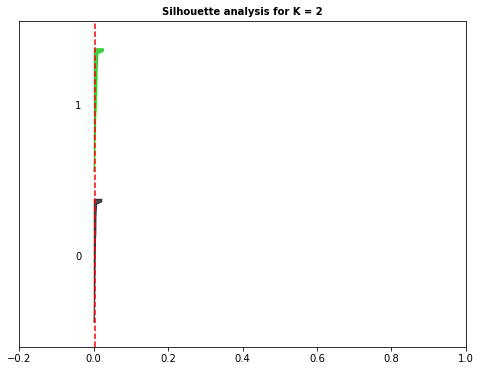

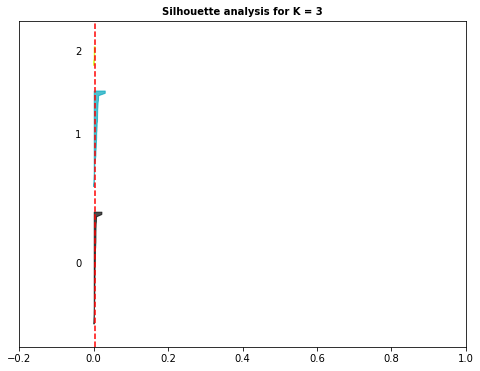

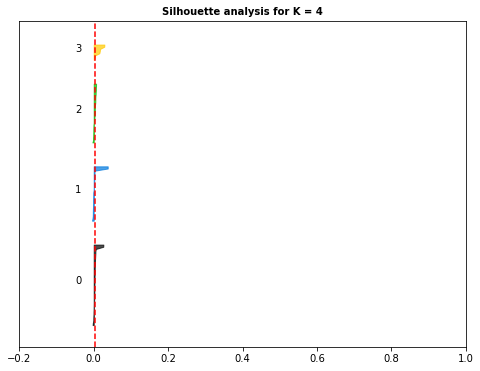

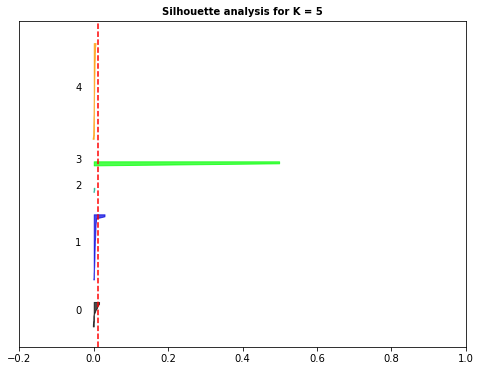

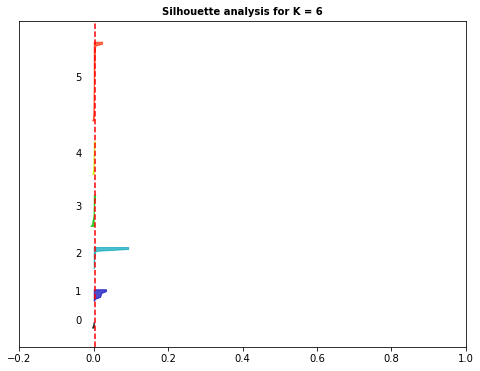

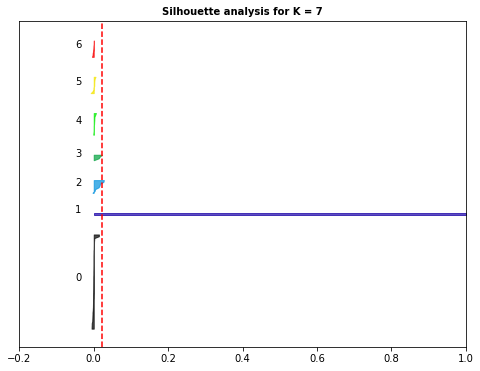

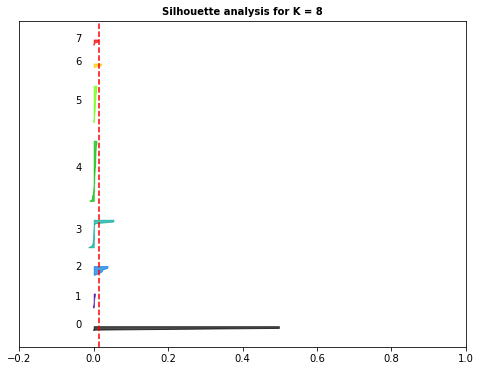

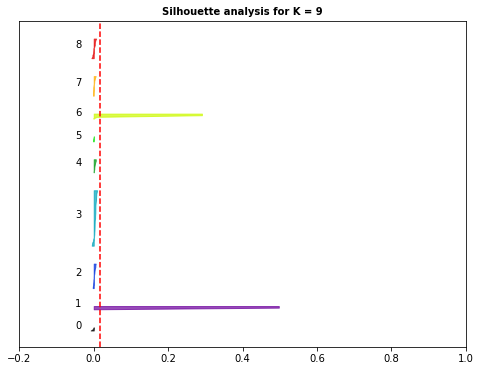

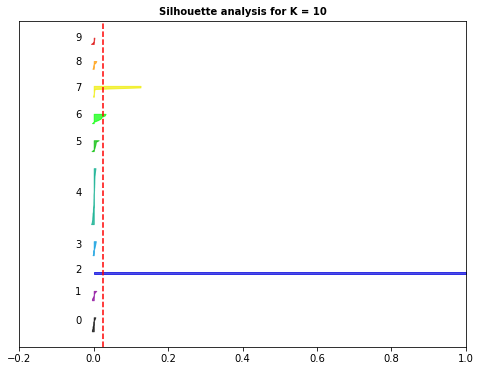

In [16]:
silhouette(kmeans_results, final_df, plot=True)

In [17]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

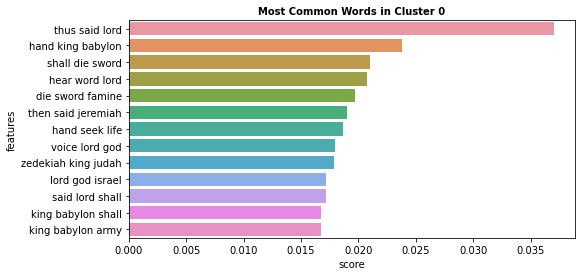

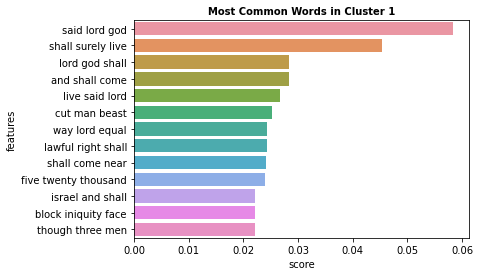

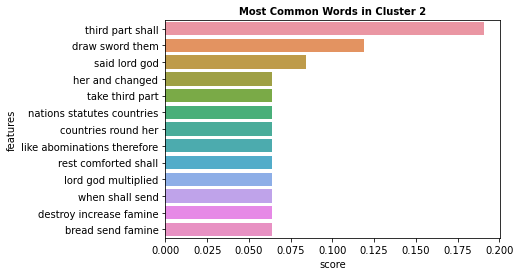

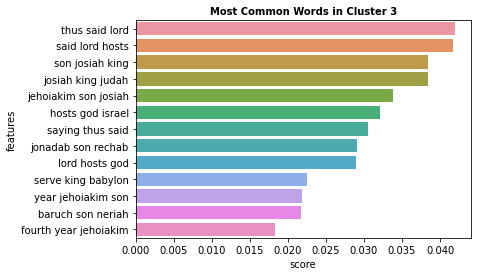

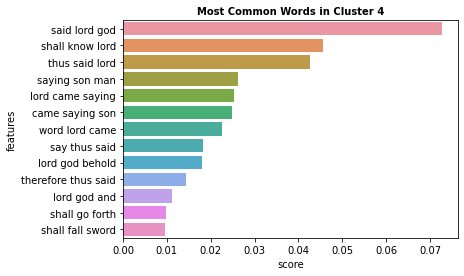

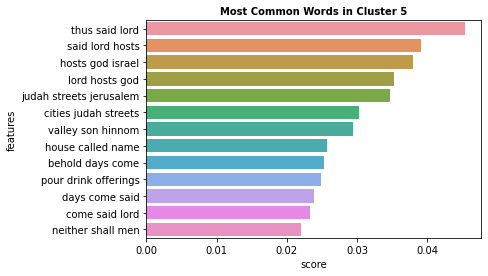

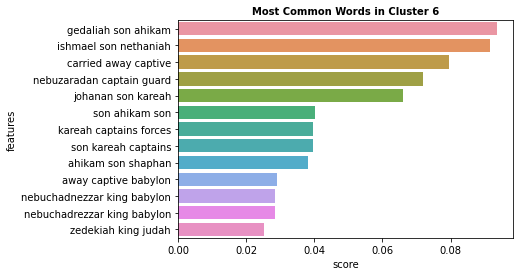

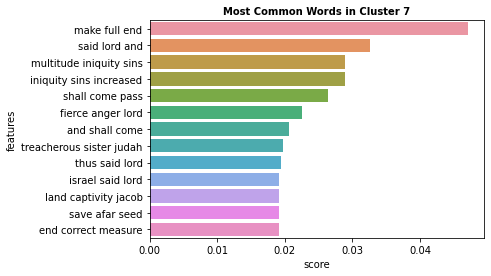

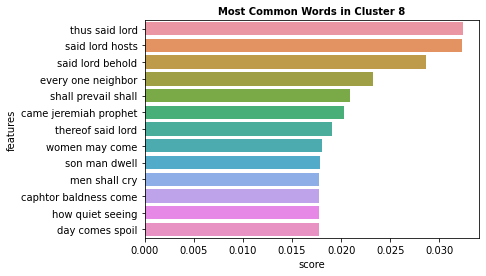

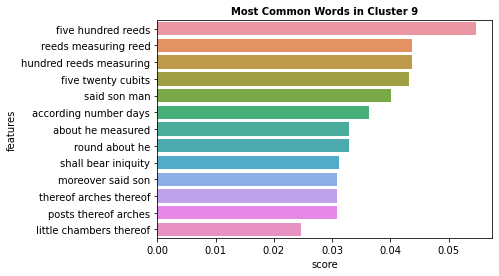

In [18]:
best_result = 10
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

In [19]:
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

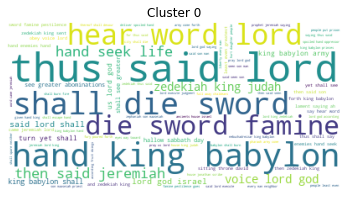

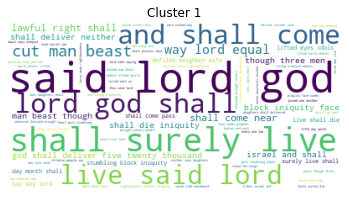

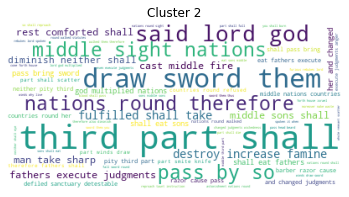

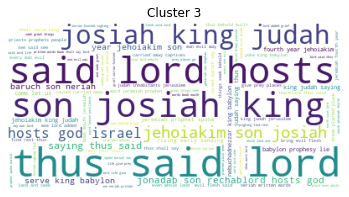

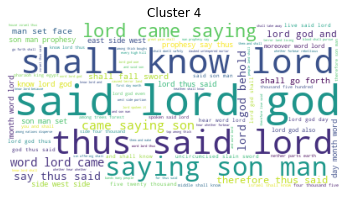

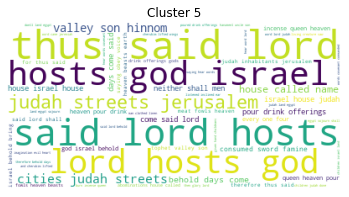

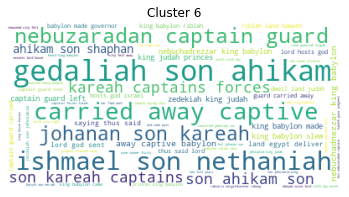

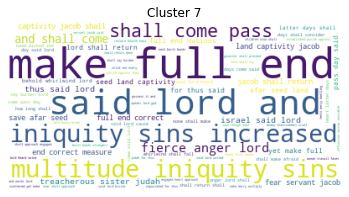

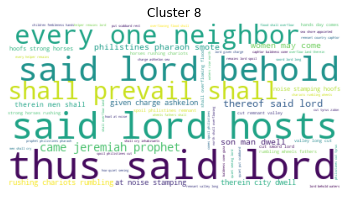

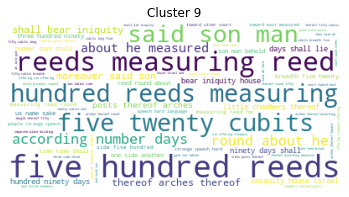

In [20]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

In [21]:
labels = kmeans.labels_ 
df['label'] = labels
df.head()

,Autor,Livro,label
100,Jeremias_1,"'words', 'jeremiah', 'son', 'hilkiah', ',', 'p...",3
101,Jeremias_2,"'moreover', 'word', 'lord', 'came', ',', 'sayi...",4
102,Jeremias_3,"'say', ',', 'man', 'put', 'away', 'wife', ',',...",7
103,Jeremias_4,"'return', ',', 'israel', ',', 'said', 'lord', ...",7
104,Jeremias_5,"'run', 'fro', 'streets', 'jerusalem', ',', 'se...",7


In [22]:
print(df)

           Autor                                              Livro  label
100   Jeremias_1  'words', 'jeremiah', 'son', 'hilkiah', ',', 'p...      3
101   Jeremias_2  'moreover', 'word', 'lord', 'came', ',', 'sayi...      4
102   Jeremias_3  'say', ',', 'man', 'put', 'away', 'wife', ',',...      7
103   Jeremias_4  'return', ',', 'israel', ',', 'said', 'lord', ...      7
104   Jeremias_5  'run', 'fro', 'streets', 'jerusalem', ',', 'se...      7
..           ...                                                ...    ...
195  Ezequiel_44  'brought', 'back', 'way', 'gate', 'outward', '...      1
196  Ezequiel_45  'moreover', ',', 'shall', 'divide', 'lot', 'la...      1
197  Ezequiel_46  'thus', 'said', 'lord', 'god', ';', 'gate', 'i...      4
198  Ezequiel_47  'afterward', 'brought', 'door', 'house', ';', ...      1
199  Ezequiel_48  'names', 'tribes', '.', 'north', 'end', 'coast...      4

[100 rows x 3 columns]
